In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os, sys

current_path = '/content/drive/My Drive/Colab Notebooks/JnQ/'

os.chdir(current_path)

strat_pkg = 'IDE'

mpl_finance_path = '/content/drive/My Drive/Colab Notebooks/JnQ/mpl_finance'
ta_lib_path = '/content/drive/My Drive/Colab Notebooks/JnQ/ta_lib'

if mpl_finance_path not in sys.path:

  try:
    sys.path.insert(0, '/content/drive/My Drive/Colab Notebooks/JnQ')
    sys.path.insert(0, '/content/drive/My Drive/Colab Notebooks/JnQ/{}'.format(strat_pkg))
    sys.path.insert(0, '/content/drive/My Drive/Colab Notebooks/JnQ/funcs')
    sys.path.insert(0, mpl_finance_path)
    sys.path.insert(0, ta_lib_path)
    
  except Exception as e:
    print(e)

Mounted at /content/drive


# requirements

In [2]:
# !pip install zigzag --target=$'/content/drive/My Drive/Colab Notebooks/JnQ/zigzag'
# !pip install talib-binary --target=$'/content/drive/My Drive/Colab Notebooks/JnQ/ta_lib'
# !pip install findiff

# import nvstrings, nvcategory, cudf
# import cuml
# import cudf

import os
import talib
from funcs.funcs_idep import *
from funcs.funcs_duration_v2 import *
from funcs.funcs_plot_check import *
from funcs.funcs_pairing import *
# from funcs.funcs_ide import *
# from funcs.funcs_indicator_candlescore import *
from funcs.funcs_indicator import *
from funcs.funcs_trader import *
from ast import literal_eval
import logging
import importlib

import mpl_finance as mf
import matplotlib.pyplot as plt
from matplotlib import gridspec
# from zigzag import *
# from tqdm.notebook import tqdm

import IPython
import IPython.display

import numpy as np
# import jax.numpy as np
import pandas as pd
# import seaborn as sns
# import tensorflow as tf
from scipy import stats, signal

import pickle
import shutil
import json
from easydict import EasyDict
import copy

import datetime
from datetime import datetime
import random
import time
# import warnings

# warnings.simplefilter("ignore", category=RuntimeWarning)

np.seterr(invalid="ignore")
np.set_printoptions(suppress=True)
np.set_printoptions(linewidth=2000) 

pd.set_option('mode.chained_assignment',  None)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# makeset - with to_htf dataframes

## sync_check_make

In [ ]:

def bb_level_v2(res_df, itv, period):

    bb_base = res_df['bb_base_{}{}'.format(itv, period)].to_numpy()

    bb_upper2 = 'bb_upper2_{}{}'.format(itv, period)
    bb_lower2 = 'bb_lower2_{}{}'.format(itv, period)
    bb_upper3 = 'bb_upper3_{}{}'.format(itv, period)
    bb_lower3 = 'bb_lower3_{}{}'.format(itv, period)

    level_gap = res_df['bb_upper_{}{}'.format(itv, period)].to_numpy() - bb_base

    res_df[bb_upper2] = bb_base + level_gap * 2
    res_df[bb_lower2] = bb_base - level_gap * 2

    res_df[bb_upper3] = bb_base + level_gap * 3
    res_df[bb_lower3] = bb_base - level_gap * 3

    return res_df

In [ ]:
def sync_check_make(df):

    make_itv_list = ['3T', '5T', '15T', '30T', 'H', '4H', 'D']
    offset_list = ['1h', '1h', '1h', '1h', '1h', '1h', '9h']

    assert len(make_itv_list) == len(offset_list), "length of itv & offset_list should be equal"
        
    htf_df_list = [to_htf(df, itv_=itv_, offset=offset_) for itv_, offset_ in zip(make_itv_list, offset_list)]

    df_3T, df_5T, df_15T, df_30T, df_H, df_4H, df_D = htf_df_list

    for htf_df in htf_df_list:
      print("{} -> ".format(pd.infer_freq(htf_df.index)), htf_df.tail(1))

    # heikinashi_v2(res_df_)
    # h_candle_v3(df, df_5T, '5T')
    # df = h_candle_v4(df, df_5T)
    # df = h_candle_v4(df, df_15T)
    # df = h_candle_v4(df, df_30T)
    # df = h_candle_v4(df, 'D')

    # df = candle_pattern_pkg(df, df_5T)
    # df = candle_pattern_pkg(df, df_30T)
    # df = candle_pattern_pkg(df, df_H)
    # df = candle_pattern_pkg(df, df_4H)

    
    # df = enough_space(df, '15T', 1)
    
    # --------------- dc --------------- #  
    dc_period = 1
    # df = donchian_channel_v4(df, dc_period)
    # df = dc_line(df, df_5T, '5T')  # join 사용시에만 return df 허용함
    # df = dc_line(df, df_15T, '15T')
    # df = dc_line_v2(df, df_H, 'H', dc_period=5)

    # df = dc_line_v4(df, df_15T, dc_period=dc_period)
    # print("dc phase done")

    # --------------- bb --------------- #  
    bb_period = 20

    # upper, base, lower = talib.BBANDS(res_df_.close, timeperiod=20, nbdevup=1, nbdevdn=1, matype=0)
    
    # df = bb_width_v3(df, period=60, multiple=1)
    # df = bb_line(df, df_5T, '5T')
    # df = bb_line_v3(df, df_15T, 60)

    # df = bb_level_v2(df, 'T', 60)
    # print("bb phase done")

    c_itv = '5T'

    # df =  wick_ratio(df, c_itv)
    df =  wick_ratio(df, c_itv)

    bb_itv= 'T'

    # df = candle_range_ratio(df, c_itv, bb_itv, bb_period)
    # # candle_pumping_ratio(df, c_itv, bb_itv, bb_period)

    dc_itv= '15T'
    dc_period = 4
    # df = candle_pumping_ratio_v2(df, c_itv, dc_itv, dc_period)
    # print("candle_pumping_ratio_v2 phase done")

    # df = dc_over_body_ratio(df, c_itv, dc_itv, dc_period)
    # print("dc_over_body_ratio phase done")

    # df = body_rel_ratio(df, c_itv)
    # print("body_rel_ratio phase done")

    # --------------- cbline --------------- #    
    # cloud_bline(df_3T, 20)
    # df = df.join(to_lower_tf_v2(df, df_3T, [-1]), how='inner')
    # # cloud_bline(df_5T, 20)
    # # df = df.join(to_lower_tf_v2(df, df_5T, [-1]), how='inner')
    # cloud_bline(df_15T, 20)
    # df = df.join(to_lower_tf_v2(df, df_15T, [-1]), how='inner')
    # cloud_bline(df_30T, 20)
    # df = df.join(to_lower_tf_v2(df, df_30T, [-1]), how='inner')
    # cloud_bline(df_H, 20)
    # df = df.join(to_lower_tf_v2(df, df_H, [-1]), how='inner')
    # cloud_bline(df_4H, 20)
    # df = df.join(to_lower_tf_v2(df, df_4H, [-1]), how='inner')

    # print("cbline phase done")



    # --------------- sd_dc --------------- #
    # df = sd_dc(df, 20, 40)
    # df = sd_dc(df, 20, 20)
    # df = sd_dc(df_5T, 20, 40, df)
    # df = sd_dc(df_H, 20, 40, df)

    # print("sd_dc phase done")

    # --------------- imb_ratio --------------- #
    # imb_ratio(df, '5T')
    # imb_ratio_v3(df, "5T")
    # imb_ratio_v4(df, "5T")

    # imb_ratio(df, 'H')
    # imb_ratio_v2(df, '5T')
    
    # print("imb_ratio phase done")

    # --------------- rel_abs_ratio --------------- #
    # rel_abs_ratio(df, '5T', norm_period=120)

    # --------------- normalize data --------------- #
    # itv = 'T'
    # lb_period = 15
    # target_col = 'close_{}{}'.format(itv, lb_period)
    # target_data = df['close'].diff(lb_period).to_numpy()
    # norm_data(df, target_data, target_col)    
    # print("normalize data phase done !")

    # --------------- lucid sar --------------- #
    # lucid_sar_v2(df)
    # lucid_sar_v2(df_3T)
    # df = df.join(to_lower_tf_v2(df, df_3T, [-2, -1]), how='inner')
    # lucid_sar_v2(df_5T)
    # df = df.join(to_lower_tf_v2(df, df_5T, [-2, -1]), how='inner')
    # lucid_sar_v2(df_15T)
    # df = df.join(to_lower_tf_v2(df, df_15T, [-2, -1]), how='inner')
    # lucid_sar_v2(df_30T)
    # df = df.join(to_lower_tf_v2(df, df_30T, [-2, -1]), how='inner')       

    # print("sar phase done")

    # --------------- supertrend --------------- #
    # df = st_price_line(df, df_3T, '3m')
    # df = st_price_line(df, df_5T, '5m')
    # df = st_price_line(df, df_15T, '15m')
    # df = st_price_line(df, df_30T, '30m')
    # df = st_price_line(df, df_H, '1h')
    # df = st_price_line(df, df_4H, '4h')

    # print("supertrend phase done")

    # --------------- rsi --------------- #  
    # df['rsi_1m'] = rsi(df, 14)    
    # df_5T['rsi_5m'] = rsi(df_5T, 14)
    # df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf_v2(df, df_5T, [-1]), columns=['rsi_5m']))
    
    # print("rsi phase done")


    # --------------- cci --------------- #  
    # df['cci_1m'] = cci(df, 20)

    # print("cci phase done")

    # --------------- ema --------------- #      
    # df_5T['ema_5m'] = ema(df_5T['close'], 195)
    # df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf_v2(df, df_5T, [-1]), columns=['ema_5m']))
    
    # print("ema phase done")
        
    # --------------- stochastic --------------- #
    # df['stoch_1m'] = stoch(df, 13, 3, 3)

    # df_5T['stoch'] = stoch(df_5T, 13, 3, 3)
    # df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf_v2(df, df_5T, [-1], backing_i=-1), columns=['stoch_5m']))

    # print("stoch phase done")


    return df


## make & save res_df (concat 생각하면, timeindex sync 맞춰야함)

### old (xlsx)

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


save_path = './candlestick_concated/res_df/'

exist_list = os.listdir(save_path)


a_day = 3600 * 24

for i in tqdm(range(len(file_list))):

  keys = [file_list[i]]

  # if 'neo'.upper() not in file_list[i]:
    # continue

  # if '2021-04-30'.upper() not in file_list[i]:
  if '2021-07-01'.upper() not in file_list[i]:
  # if '2021-10-10'.upper() not in file_list[i]:
    continue


  for key in keys:      

    # if 'eth'.upper() not in key:
    #   continue

    excel_name = key.replace(".xlsx", "_st1h_backi2.xlsx")
    excel_path = save_path + excel_name

    if excel_name in exist_list:
      print(excel_name, "already exist !")
      continue
    
    open_indexes = []
    
    df = pd.read_excel(date_path + key, index_col=0)
    second_df = pd.read_excel(date_path2 + key, index_col=0)
    third_df = pd.read_excel(date_path3 + key, index_col=0)
    fourth_df = pd.read_excel(date_path4 + key, index_col=0)
    fifth_df = pd.read_excel(date_path5 + key, index_col=0)
    
    print(df.index[[0, -1]])
    print(second_df.index[[0, -1]])
    print(third_df.index[[0, -1]])
    print(fourth_df.index[[0, -1]])
    print(fifth_df.index[[0, -1]])

    open_indexes.append(df.index[0])
    open_indexes.append(second_df.index[0])
    open_indexes.append(third_df.index[0])
    open_indexes.append(fourth_df.index[0])
    open_indexes.append(fifth_df.index[0])
    
    try:
      #     Todo    #
      #      1. 1m 마지막 timeindex 의 date 기준, 08:59:59.999000 를 last timestamp 로 설정
      #      2. 시작 timestamp 는 모든 tf 의 가장 최근 시작 index,
      #       a. 1m 의 시작 timeindex 는 최소, htf 의 시작 timeindex 보다 interval 만큼 앞서야함
      #         i. 따라서 1m open_index, latest_open_index + 1d 를 하면 댐
      #           1. timestamp 으로 변환후 1day 를 더하고 datetime 으로 변환
      sixth_df = pd.read_excel(date_path6 + key, index_col=0)
      seventh_df = pd.read_excel(date_path7 + key, index_col=0)

      print(sixth_df.index[[0, -1]])
      print(seventh_df.index[[0, -1]])
      print()

      open_indexes.append(sixth_df.index[0])
      open_indexes.append(seventh_df.index[0])

    except Exception as e:
      print(e)

    latest_open_index = sorted(open_indexes)[-1]
    
    open_ts = datetime.timestamp(latest_open_index)
    latest_open_index_1m = datetime.fromtimestamp(open_ts + a_day)

    #   str 로 만들어 접근하면 불가함  #
    end_index = pd.to_datetime(str(df.index[-1]).split(" ")[0] + " 08:59:59.999000")
    # break

    sliced_df = df.loc[latest_open_index_1m:end_index] # to_lower_tf 의 기준 ltf
    sliced_second_df = second_df.loc[latest_open_index:end_index]
    sliced_third_df = third_df.loc[latest_open_index:end_index]
    sliced_fourth_df = fourth_df.loc[latest_open_index:end_index]
    sliced_fifth_df = fifth_df.loc[latest_open_index:end_index]

    print("sliced index")
    print(sliced_df.index[[0, -1]])
    print(sliced_second_df.index[[0, -1]])
    print(sliced_third_df.index[[0, -1]])
    print(sliced_fourth_df.index[[0, -1]])
    print(sliced_fifth_df.index[[0, -1]])

    try:
      sliced_sixth_df = sixth_df.loc[latest_open_index:end_index]
      sliced_seventh_df = seventh_df.loc[latest_open_index:end_index]

      print(sliced_sixth_df.index[[0, -1]])
      print(sliced_seventh_df.index[[0, -1]])

      res_df = sync_check(sliced_df, sliced_second_df, sliced_third_df, sliced_fourth_df, sliced_fifth_df, sliced_sixth_df, sliced_seventh_df)
    
    except:
      res_df = sync_check(sliced_df, sliced_second_df, sliced_third_df, sliced_fourth_df, sliced_fifth_df)



    res_df.to_excel(excel_path)
    print(excel_name, "saved succesfully !")

### xlsx to feather

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


save_path = './candlestick_concated/res_df/'

exist_list = os.listdir(save_path)


a_day = 3600 * 24

for i in tqdm(range(len(file_list))):

  keys = [file_list[i]]

  # if 'neo'.upper() not in file_list[i]:
    # continue

  # if '2021-04-30'.upper() not in file_list[i]:
  # if '2021-07-01'.upper() not in file_list[i]:
  if '2021-10-10'.upper() not in file_list[i]:
    continue


  for key in keys:      

    # if 'eth'.upper() not in key:
    #   continue

    feather_name = key.replace(".xlsx", ".ftr")
    # feather_path = save_path + feather_name

    if feather_name in exist_list:
      print(feather_name, "already exist !")
      continue
    
    open_indexes = []
    
    df = pd.read_excel(date_path + key, index_col=0)
    second_df = pd.read_excel(date_path2 + key, index_col=0)
    third_df = pd.read_excel(date_path3 + key, index_col=0)
    fourth_df = pd.read_excel(date_path4 + key, index_col=0)
    fifth_df = pd.read_excel(date_path5 + key, index_col=0)
    
    print(df.index[[0, -1]])
    print(second_df.index[[0, -1]])
    print(third_df.index[[0, -1]])
    print(fourth_df.index[[0, -1]])
    print(fifth_df.index[[0, -1]])

    open_indexes.append(df.index[0])
    open_indexes.append(second_df.index[0])
    open_indexes.append(third_df.index[0])
    open_indexes.append(fourth_df.index[0])
    open_indexes.append(fifth_df.index[0])
    
    try:
      #     Todo    #
      #      1. 1m 마지막 timeindex 의 date 기준, 08:59:59.999000 를 last timestamp 로 설정
      #      2. 시작 timestamp 는 모든 tf 의 가장 최근 시작 index,
      #       a. 1m 의 시작 timeindex 는 최소, htf 의 시작 timeindex 보다 interval 만큼 앞서야함
      #         i. 따라서 1m open_index, latest_open_index + 1d 를 하면 댐
      #           1. timestamp 으로 변환후 1day 를 더하고 datetime 으로 변환
      sixth_df = pd.read_excel(date_path6 + key, index_col=0)
      seventh_df = pd.read_excel(date_path7 + key, index_col=0)

      print(sixth_df.index[[0, -1]])
      print(seventh_df.index[[0, -1]])
      print()

      open_indexes.append(sixth_df.index[0])
      open_indexes.append(seventh_df.index[0])

    except Exception as e:
      print(e)


    df.reset_index().to_feather(date_path + feather_name, compression='lz4')
    second_df.reset_index().to_feather(date_path2 + feather_name, compression='lz4')
    third_df.reset_index().to_feather(date_path3 + feather_name, compression='lz4')
    fourth_df.reset_index().to_feather(date_path4 + feather_name, compression='lz4')
    fifth_df.reset_index().to_feather(date_path5 + feather_name, compression='lz4')
    sixth_df.reset_index().to_feather(date_path6 + feather_name, compression='lz4')
    seventh_df.reset_index().to_feather(date_path7 + feather_name, compression='lz4')

    print("xlsx converted to feather !")
    

### add itv_name to ftr

In [ ]:
save_path = './candlestick_concated/res_df/'

# dir_path = "bbdc3m_backi2"
# date = '2021-10-10'
date = '2021-07-01'

db_path = './candlestick_concated/database_bn/non_cum/%s/' % date
os.makedirs(os.path.join(db_path), exist_ok=True)

# exist_list = os.listdir(os.path.join(save_path, dir_path))
# break


a_day = 3600 * 24

for i in tqdm(range(len(file_list))):

  keys = [file_list[i]]

  # if 'neo'.upper() not in file_list[i]:
    # continue

  if date not in file_list[i]:
    continue


  for key in keys:      

    # if 'eth'.upper() not in key:
    #   continue
    # print(key)
    
    if ".ftr" not in key:
      continue
        
    df = shutil.copy(date_path + key, db_path + key.replace(".ftr", "_%s.ftr" % interval))
    second_df = shutil.copy(date_path2 + key, db_path + key.replace(".ftr", "_%s.ftr" % interval2))
    third_df = shutil.copy(date_path3 + key, db_path + key.replace(".ftr", "_%s.ftr" % interval3))
    fourth_df = shutil.copy(date_path4 + key, db_path + key.replace(".ftr", "_%s.ftr" % interval4))
    fifth_df = shutil.copy(date_path5 + key, db_path + key.replace(".ftr", "_%s.ftr" % interval5))
    sixth_df = shutil.copy(date_path6 + key, db_path + key.replace(".ftr", "_%s.ftr" % interval6))
    seventh_df = shutil.copy(date_path7 + key, db_path + key.replace(".ftr", "_%s.ftr" % interval7))

    print("copied to" + db_path + key.replace(".ftr", "_%s.ftr" % interval))


### feather ver. (database to res_df)

In [ ]:
# db_path = './candlestick_concated/database_ub/' # upbit
db_path = './candlestick_concated/database_bn/'   # binance

save_path = './candlestick_concated/res_df/'

save_dir_path = "bb1d_backi2"
date = '2022-02-17'

# concat_path = 'noncat' # 새로운 cols 를 기존 cum/concat 에 붙이려는 경우
concat_path = 'concat'
cum_path = "cum"
# cum_path = "non_cum"  # non_cum 으로 진행하는 경우, row concat 용도이기 때문에 noncat -> concat 으로 변경 (base cols 를 모두 담고 있음)

load_path = os.path.join(db_path, cum_path, date)
save_path = os.path.join(save_path, save_dir_path, concat_path, cum_path, date)

os.makedirs(save_path, exist_ok=True)

file_list = os.listdir(load_path)
exist_list = os.listdir(save_path)
# break

a_day = 3600 * 24

for i in tqdm(range(len(file_list))):

  keys = [file_list[i]]

  # if 'neo'.upper() not in file_list[i]:
    # continue

  if date not in file_list[i]:
    continue


  for key in keys:      

    # if 'eth'.upper() not in key:
    #   continue
    # print(key)
    
    if ".ftr" not in key:
      continue

    if "_1m" not in key:
      continue

    # feather_name = key.replace(".ftr", "_%.ftr" % save_dir_path)
    feather_name = key.replace("_1m", "")
    feather_path = os.path.join(save_path, feather_name)

    if feather_name in exist_list:
      print(feather_name, "already exist !")
      continue
    
    df = pd.read_feather(os.path.join(load_path, key), columns=None, use_threads=True).set_index("index")

    res_df = sync_check_make(df)

    res_df.reset_index().to_feather(feather_path, compression='lz4')
    print(feather_path, "saved succesfully !")

#### just add col to loaded df

In [ ]:
res_df_ = sync_check_make(res_df_)  # suffix duplication 유의
res_df_.tail().iloc[:, -10:]
# res_df_.dtypes

3T ->                          open     high      low    close
index                                                  
2022-04-27 08:45:00  2803.55  2803.97  2799.26  2800.43
5T ->                          open     high      low    close
index                                                  
2022-04-27 08:45:00  2803.55  2803.97  2799.26  2800.43
15T ->                          open     high      low    close
index                                                  
2022-04-27 08:45:00  2803.55  2803.97  2799.26  2800.43
30T ->                          open     high      low    close
index                                                  
2022-04-27 08:30:00  2783.61  2806.93  2780.79  2800.43
H ->                          open     high      low    close
index                                                  
2022-04-27 08:00:00  2819.33  2822.77  2761.27  2800.43
4H ->                          open    high      low    close
index                                                 
2022-04

,bb_upper_T60,bb_lower_T60,bb_base_T60,bb_upper2_T60,bb_lower2_T60,bb_upper3_T60,bb_lower3_T60,upper_wick_ratio_5T,lower_wick_ratio_5T,candle_updown_5T
index,,,,,,,,,,
2022-04-27 08:41:59.999,2823.126867,2790.340133,2806.733500,2839.520235,2773.946765,2855.913602,2757.553398,0.354545,0.640260,0
2022-04-27 08:42:59.999,2822.498326,2790.088008,2806.293167,2838.703485,2773.882848,2854.908644,2757.677689,0.354545,0.640260,0
2022-04-27 08:43:59.999,2821.914551,2789.914116,2805.914333,2837.914768,2773.913898,2853.914986,2757.913681,0.354545,0.640260,0
2022-04-27 08:44:59.999,2821.473171,2789.742162,2805.607667,2837.338676,2773.876657,2853.204181,2758.011153,0.354545,0.640260,0
2022-04-27 08:45:59.999,2820.842501,2789.526499,2805.184500,2836.500502,2773.868498,2852.158503,2758.210497,0.089172,0.248408,0


In [ ]:
test_df_ = sync_check_make(res_df_.iloc[-4000:])  # suffix duplication 유의
test_df_.tail().iloc[:, -10:]

In [ ]:
# ------ validation ------ #
# res_df_.cppr_15T.describe()
print((res_df_.open_15T.to_numpy() - res_df_.close_15T.to_numpy())[-10:])
print((res_df_.dc_upper_15T4.to_numpy() - res_df_.dc_lower_15T4.to_numpy())[-10:])

In [ ]:
# np.where(res_df_.CDL3LINESTRIKE_15T) #.iloc[-1000:,]

# CDL3LINESTRIKE = talib.CDL3LINESTRIKE(df_15T.open, df_15T.high, df_15T.low, df_15T.close)
for col in talib.get_function_groups()['Pattern Recognition']:  
  print(np.unique(res_df_[col + '_15T'].to_numpy(), return_counts=True))

# CDLCLOSINGMARUBOZU = talib.CDLCLOSINGMARUBOZU(df_15T.open, df_15T.high, df_15T.low, df_15T.close)
# print(np.unique(CDLCLOSINGMARUBOZU.to_numpy(), return_counts=True))
# print(CDLCLOSINGMARUBOZU.tail(50))

In [ ]:
# ------------ save current res_df ------------ #
ftr_path = os.path.join(save_path.replace("res_df", "database_bn"), "cum", date)
ftr_full_path = os.path.join(ftr_path, key)

res_df_.reset_index().to_feather(ftr_full_path, compression='lz4')  # key 잘 확인하고 저장
print(ftr_full_path, 'saved !')

./candlestick_concated/database_bn/cum/2022-04-27/2022-04-27 ETHUSDT_1m.ftr saved !


### htf candle check

In [ ]:
itv_list = ['3T', '5T', '15T', '30T', '1H', '4H']
comp_df_list = [second_df, third_df, fourth_df, fifth_df, sixth_df, seventh_df]
offset_list = ['1h', '2min', '2min', '2min', '2min', '2min']
# itv_list = ['4H']
# comp_df_list = [seventh_df]

slice_len = 100
for itv_, comp_df_, offset in zip(itv_list, comp_df_list, offset_list):

  print("itv_ :", itv_)

  # df = h_candle_v2(df, '3T')
  # end_ts = 
  h_res_df = df.resample(itv_, offset=offset).agg({
          'open': 'first',
          'high': 'max',
          'low': 'min',
          'close': 'last'
      })

  #   앞은 길이가 다르고, 뒤에서부터 잘라서 비교    #
  #   last_row 빼고는 동일, 4h 제외
  # print(df.tail())
  print(h_res_df.tail())
  print(comp_df_.tail())
  # # print(h_res_df.head())
  # # print(second_df.head())

  # print(len(h_res_df))
  # print(len(second_df))

  # print(h_res_df.values[-slice_len:])
  # print(second_df.iloc[:, :4].values[-slice_len:])
  # print(np.argwhere(h_res_df.values[-slice_len:] != comp_df_.iloc[:, :4].values[-slice_len:]))
  # print()
  break

## concat & save new res_df

### old (xlsx)

In [ ]:
save_path = './candlestick_concated/res_df/'

dict_name = "2021-07-01 ETHUSDT_bb15m_backi2_res_dfs.pkl"

#     load with pickle    #
with open(save_path + dict_name, 'rb') as f:
  saved_res_df_dict = pickle.load(f)

print(dict_name, "loaded !")
res_df_files = os.listdir(save_path)
res_df_files.reverse()

print(res_df_files)

res_df_dict = {}

base_postfix = '_bb15m_backi2.xlsx'
new_postfix = '_st1h_backi2.xlsx'

max_cnt = 10
sample_cnt = max_cnt

for k_i, key in enumerate(res_df_files):

  if '2021-07-01'.upper() not in key:
  # if '2021-10-10'.upper() not in key:
    continue

  # if "link".upper() not in key:
  # if "btc".upper() not in key:
  #   continue

  if new_postfix not in key:
    continue

  # if key in 

  if sample_cnt == max_cnt:
    dict_name = "%s_res_dfs.pkl" % key.split(".")[0]
    print("dict_name :", dict_name)

  base_df = saved_res_df_dict[key.replace(new_postfix, base_postfix)]
  # base_df = pd.read_excel(save_path + key.replace(new_postfix, base_postfix), index_col=0)  
  res_df = pd.read_excel(save_path + key, index_col=0)  

  # print(base_df.head())
  # print(res_df.head())
  # break

  new_res_df = pd.concat([base_df, res_df], axis=1) # df_tot.drop_duplicates()
  # new_res_df.head()

  droped_new_res_df = new_res_df.loc[:,~new_res_df.columns.duplicated(keep='last')]
  droped_new_res_df.head()
  # break

  # res_df_dict[key] = res_df
  res_df_dict[key] = droped_new_res_df
  print(key, "saved to dict !")

  #     save with pickle    #
  with open(save_path + dict_name, 'wb') as f:
    pickle.dump(res_df_dict, f)

  sample_cnt -= 1

  if sample_cnt <= 0:
    break


### new col to latest feather (1m_indi. only)

In [ ]:
save_path = './candlestick_concated/res_df/'

cum_dir = "cum"

new_dir_path = "rsi_backi2"
base_dir_path = "bbdc3m_backi2"

new_date = '2021-11-17'



#     load ftr list    #
base_save_path = os.path.join(save_path, base_dir_path, "concat/cum", new_date)
new_save_path = base_save_path.replace(base_dir_path, new_dir_path)

#     save to (new) cum dir    #
#      1. if dir. not exists, makedir
os.makedirs(new_save_path, exist_ok=True)

ftr_list = [s for s in os.listdir(base_save_path) if "ftr" in s]
print(ftr_list)
# break


max_cnt = 10
sample_cnt = max_cnt

for key in ftr_list:

  if new_date not in key:
    continue


  #       read from base postfix's directory    #
  base_df = pd.read_feather(os.path.join(base_save_path, key), columns=None, use_threads=True).set_index("index")
  # print(base_df.head())
  # print(res_df.head())
  # break

  droped_new_res_df = sync_check(base_df)

  # new_res_df = pd.concat([base_df, res_df], axis=0) # df_tot.drop_duplicates()
  # # new_res_df.head()

  # intersection_cols = res_df.columns.intersection(base_df.columns)

  # droped_new_res_df = new_res_df.loc[~new_res_df.index.duplicated(keep='last'),intersection_cols]
  # droped_new_res_df = new_res_df.loc[:,~new_res_df.columns.duplicated(keep='last')]
  # droped_new_res_df = new_res_df.loc[:,~new_res_df.index.duplicated(keep='last')]
  # droped_new_res_df.head()
  # break

  droped_new_res_df.reset_index().to_feather(os.path.join(new_save_path, key), compression='lz4')

  print(os.path.join(new_save_path, key), "saved !")

  # sample_cnt -= 1

  # if sample_cnt <= 0:
  #   break


### feather ver. (col concat)

In [ ]:
new_dir_path = "st3m_backi2"
base_dir_path = "bb1d_backi2"

# new_date = "2021-11-17"
new_date = "2022-01-10"

#     save to (new) concat dir    #
#      1. if dir. not exists, makedir
save_path = './candlestick_concated/res_df/'
save_path = os.path.join(save_path, new_dir_path, "concat/cum", new_date)   
# save_path = os.path.join(save_path, new_dir_path, "concat/non_cum", new_date)   # row col 하려면 concat 맞음, noncum 사용
os.makedirs(save_path, exist_ok=True)


#     load ftr list    #
# ftr_list = [s for s in os.listdir(os.path.join(save_path, new_dir_path)) if "ftr" in s]

noncat_path = save_path.replace("concat/", "noncat/")
ftr_list = [s for s in os.listdir(noncat_path) if "ftr" in s]
print(ftr_list)
# break


for key in ftr_list:

  if new_date not in key:
    continue

  try:

    #       read from base postfix's directory    #
    base_df = pd.read_feather(os.path.join(save_path.replace(new_dir_path, base_dir_path), key), columns=None, use_threads=True).set_index("index")
    res_df = pd.read_feather(os.path.join(noncat_path, key), columns=None, use_threads=True).set_index("index")

    # print(base_df.head())
    # print(res_df.head())
    # break

    new_res_df = pd.concat([base_df, res_df], axis=1) # df_tot.drop_duplicates()
    # new_res_df.head()

    droped_new_res_df = new_res_df.loc[:,~new_res_df.columns.duplicated(keep='last')]
    # droped_new_res_df.head()
    # break

    droped_new_res_df.reset_index().to_feather(os.path.join(save_path, key), compression='lz4')

    # res_df_dict[key] = res_df
    # res_df_dict[key] = droped_new_res_df
    print(os.path.join(save_path, key), "saved !")
  
  except Exception as e:
    print("error occured ! :", e)
  

  # sample_cnt -= 1

  # if sample_cnt <= 0:
  #   break


### feather ver. (row concat) , database cum 도 호환가능

In [ ]:
# save_path = './candlestick_concated/res_df/'        # cols 추가된 cum db 에 new_row's cols 기준으로 합치는 경우
save_path = './candlestick_concated/database_bn/'   # ohlcv cum db 만들 경우

base_date = '2022-04-25'
# new_date = '2022-02-17'
new_date = '2022-04-27'

# ------ load ftr list ------ #
if "database" in save_path:
  base_dir_path = ""
  new_dir_path = ""
  concat_dir = ""
else:
  base_dir_path = "sar_backi2"
  new_dir_path = "bb4h_backi2"  # dir_path 가 base / new 서로 달라질 수 있어서 분할함
  concat_dir = "concat"

base_date_path = os.path.join(save_path, base_dir_path, concat_dir, "cum", base_date)      # 기존 cum db 와 new_date db 를 cum 진행
# base_date_path = os.path.join(save_path, base_dir_path, concat_dir, "non_cum", base_date)    # non_cum db 와 new_date db 를 cum 진행

# new_date_path = os.path.join(save_path, new_dir_path, concat_dir, "cum", new_date)      # 상황별로 직접 선택해야할 듯
new_date_path = os.path.join(save_path, new_dir_path, concat_dir, "non_cum", new_date)



# ------ save to (new) concat dir ------ #
#      1. if dir. not exists, makedir
save_path = new_date_path.replace("non_cum", "cum")   # non_cum 아니여도 무관
os.makedirs(save_path, exist_ok=True)   # noncat / concat 두가지 경우 존재가능할 것
# os.makedirs(os.path.join(save_path, dir_path, "noncat/cum", new_date), exist_ok=True)


ftr_list = [s for s in os.listdir(new_date_path) if "ftr" in s]
exist_list = os.listdir(save_path)
print(ftr_list)
# break


for key in ftr_list:

  if new_date not in key:   # date rejection
    continue
  if '1m' not in key:  # itv rejection
    continue

  # if key in exist_list:
  #   print(key, "already exist !")
  #   continue

  #       read from base postfix's directory    #
  base_df = pd.read_feather(os.path.join(base_date_path, key.replace(new_date, base_date)), columns=None, use_threads=True).set_index("index")   # key 에 new_date 담겨있음
  res_df = pd.read_feather(os.path.join(new_date_path, key), columns=None, use_threads=True).set_index("index")

  # print(base_df.head())
  # print(res_df.head())
  # break

  new_res_df = pd.concat([base_df, res_df], axis=0) # df_tot.drop_duplicates()
  # new_res_df.head()

  intersection_cols = res_df.columns.intersection(base_df.columns)

  droped_new_res_df = new_res_df.loc[~new_res_df.index.duplicated(keep='last'),intersection_cols]
  # droped_new_res_df = new_res_df.loc[:,~new_res_df.columns.duplicated(keep='last')]
  # droped_new_res_df = new_res_df.loc[:,~new_res_df.index.duplicated(keep='last')]
  # droped_new_res_df.head()
  # break  
  
  print(droped_new_res_df.iloc[[0, -1]])  

  # ------------- verify df continuity directly itv by itv ------------- #
  true_continue = True
  if "_" in key:

    # interval = key.split(".")[0].split("_")[-1] 
    # itv_num = to_itvnum(interval)

    # verified_df = consecutive_df(droped_new_res_df, to_itvnum(interval))
    # verified_df.reset_index().to_feather(os.path.join(save_path, key), compression='lz4')

    # res_df_dict[key] = res_df
    # res_df_dict[key] = droped_new_res_df  

    np_idx_ts = np.array(list(map(lambda x: datetime.timestamp(x), droped_new_res_df.index)))
    ideal_ts_gap = 60 # * itv_num

    for ts_i in range(len(np_idx_ts)):
      
      if ts_i != 0:
        ts_gap = np_idx_ts[ts_i] - np_idx_ts[ts_i - 1]
        if ts_gap > ideal_ts_gap or ts_gap < ideal_ts_gap:
        # if ts_gap == ideal_ts_gap:
          print(droped_new_res_df.index[ts_i - 1])
          print(droped_new_res_df.index[ts_i])
          # print(ts_gap)
          print("------------------ unideal ts_gap ------------------")
          true_continue = False

    print("continuity checked !")

  if true_continue:
    droped_new_res_df.reset_index().to_feather(os.path.join(save_path, key), compression='lz4')

  print(os.path.join(save_path, key), "saved !")
  


### check continuity

In [ ]:
droped_new_res_df = res_df_

In [ ]:
# print(droped_new_res_df.columns)

print(droped_new_res_df.iloc[[0, -1]])

np_idx_ts = np.array(list(map(lambda x: datetime.timestamp(x), droped_new_res_df.index)))

print(np_idx_ts[:10])
for ts_i in range(len(np_idx_ts)):
  
  if ts_i != 0:
    ts_gap = np_idx_ts[ts_i] - np_idx_ts[ts_i - 1]

    if ts_gap > 60 or ts_gap < 60:

      print("invalid ts_gap found !")
    # if ts_gap == 60:
      print(droped_new_res_df.index[ts_i - 1])
      print(droped_new_res_df.index[ts_i])
      # print(ts_gap)
      print()


### check length of front missing value + middle_data non_missing validity

In [ ]:
#       1. new_date 의 시작 timeidx 와 base_date end timeidx 의 최소 days' gap     #
#       2. new_date 의 시작 부분 indi. value 는 np.nan 으로 채워질 거기 때문에 계산해야함    #

df_count = droped_new_res_df.count()
len_missing = df_count.max() - df_count.min()
print(len_missing / 1440)

#       3. 
missing_sliced_df = droped_new_res_df.iloc[len_missing:]
df_count2 = missing_sliced_df.count()
# print(df_count2)
print((df_count2.max() - df_count2.min()))    # this value should be zero !


In [ ]:
# df_count2.index[df_count2.argmin()]
# missing_sliced_df.head(5)

stay_missed = np.sum(pd.isnull(missing_sliced_df), axis=0)
print(stay_missed)

In [ ]:
stay_missed_cols = stay_missed[stay_missed != 0].index

for sm_col in stay_missed_cols:
  
  row_idx = np.argwhere(pd.isnull(missing_sliced_df[sm_col].values))

  plt.figure(figsize=(3,3))
  plt.plot(row_idx)
  plt.ylim(0, len(missing_sliced_df))
  plt.title(sm_col)

  plt.show()


## legacy

### mv files

In [ ]:
df_path = './candlestick_concated/survey_df_v2'
files_ = os.listdir(df_path)

In [ ]:
dirs = [file_ for file_ in files_ if not file_.endswith('.ftr')]
files = [file_ for file_ in files_ if file_.endswith('.ftr')]

In [ ]:
dirs

In [ ]:
def move_fn(dir_, file_):
  src_path = os.path.join(df_path, file_)
  dst_path = os.path.join(df_path, dir_, file_)
  shutil.move(src_path, dst_path)
  print("moved to {}".format(dst_path))

_ = [move_fn('2022-01-10 ETHUSDT_all', file_) for file_ in files if 'eth'.upper() in file_]
# sols


### move legacy files

In [ ]:
# print()
cur_dir_list = os.listdir('.')
for f in cur_dir_list:
  if 'legacy' in f :
    # print(f)
    if os.path.isdir(current_path + f,):
      continue

    shutil.move(current_path + f, current_path + 'legacy/' + f)
    print("moved to" + current_path + 'legacy/' +  f)

# IDE platform


## load ftr_list

In [3]:
save_path = './candlestick_concated/database_bn/'

# dir_path = "bb1d_backi2"
# date = "2022-02-17"
# ftr_path = os.path.join(save_path, dir_path, "concat/cum", date)

# ------ 1T_database ------ #
# date = "2022-04-27"
# ftr_path = os.path.join(save_path, "non_cum", date)

date = "2022-04-27"
# date = "2022-02-17"
ftr_path = os.path.join(save_path, "cum", date)

# ------ load ftr list ------ #
ftr_list = [s for s in os.listdir(ftr_path) if "ftr" in s if date in s]
print(ftr_list)

start_0 = time.time()
key = ftr_list[0]  # tempoaray use single key
res_df_ = pd.read_feather(os.path.join(ftr_path, key), columns=None, use_threads=True).set_index("index")
# print(res_df_.head())
print(key, "loaded !")
print("load res_df_ elapsed time :", time.time() - start_0)

['2022-04-27 ETHUSDT_1m.ftr']
2022-04-27 ETHUSDT_1m.ftr loaded !
load res_df_ elapsed time : 2.8323919773101807


In [ ]:
res_df_.dtypes

### edit cols

In [ ]:
col_list = list(res_df_.columns)
# # [col_ for col_ in col_list if 'score' in col_]

# ------ drop ------ #
# res_df_.drop([col_ for col_ in col_list if 'open_15T' in col_], inplace=True, axis=1)
res_df_.drop([col_ for col_ in col_list if 'es' in col_], inplace=True, axis=1)
# res_df_.drop([col_ for col_ in col_list if '_T40' in col_], inplace=True, axis=1)
# res_df_.drop([col_ for col_ in col_list if 'long_base' in col_], inplace=True, axis=1)
# res_df_.drop([col_ for col_ in col_list[5:]], inplace=True, axis=1)

# ------ replace ------ #
# for c_i, col_ in enumerate(col_list):
#   if 'basis' in col_:
# #   # if col_[-1] in ['m', 'h', 'd', 'H'] and '_' in col_:eTa_5T
# #   # if col_[0] in ['h'] and '_' in col_:
# #   if 'bir_' in col_:

#     col_list[c_i] = col_.replace('basis', 'base')
# #     # col_list[c_i] = col_.replace('m', 'T').replace('h', 'H').replace('1T', 'T')
# #     # col_list[c_i] = col_.replace('1d', 'D')
# #     # col_list[c_i] = col_.replace('eTa_5T', 'ema_5T')
# #     # col_list[c_i] = col_list[c_i][1:]
# #     # print(col_list[c_i][0])
# res_df_.columns = col_list
# col_list[-2:] = ['resi_T', 'sup_T']

### lab

#### instant indi.

In [ ]:
def get_roll_wave_data(valid_prime_idx, roll_idx_arr, len_df, data, roll_hl_cnt):

    roll_data = pd.DataFrame(np.full((len_df, roll_hl_cnt), np.nan))
    roll_data.iloc[valid_prime_idx[roll_hl_cnt - 1:], :] = data[roll_idx_arr]  # 제한된 idx 를 제외한 row 에 roll_hl 입력

    return roll_data.ffill().to_numpy()

def roll_wave_hl_v4(t_df, config, roll_hl_cnt=4):
  
    wave_itv = pd.infer_freq(t_df.index)
    wave_period = config.tr_set.wave_period

    len_df = len(t_df)

    wave_high_fill_ = t_df['wave_high_fill_{}{}'.format(wave_itv, wave_period)].to_numpy()
    wave_low_fill_ = t_df['wave_low_fill_{}{}'.format(wave_itv, wave_period)].to_numpy()
    high_prime_idx = t_df['wave_high_prime_idx_{}{}'.format(wave_itv, wave_period)].to_numpy()
    low_prime_idx = t_df['wave_low_prime_idx_{}{}'.format(wave_itv, wave_period)].to_numpy()    
    high_prime_idx_fill_ = t_df['wave_high_prime_idx_fill_{}{}'.format(wave_itv, wave_period)].to_numpy()
    low_prime_idx_fill_ = t_df['wave_low_prime_idx_fill_{}{}'.format(wave_itv, wave_period)].to_numpy()

    valid_high_prime_idx = high_prime_idx[~np.isnan(high_prime_idx)].astype(int)  # roll_high 를 위한 prime_idx
    valid_low_prime_idx = low_prime_idx[~np.isnan(low_prime_idx)].astype(int)  # roll_low 를 위한 prime_idx

    roll_high_idx_arr = np.array([valid_high_prime_idx[idx_ + 1 - roll_hl_cnt:idx_ + 1] for idx_ in range(len(valid_high_prime_idx)) if idx_ + 1 >= roll_hl_cnt])  # cnt 수를 만족시키기 위해 idx 제한
    roll_low_idx_arr = np.array([valid_low_prime_idx[idx_ + 1 - roll_hl_cnt:idx_ + 1] for idx_ in range(len(valid_low_prime_idx)) if idx_ + 1 >= roll_hl_cnt])

    return valid_high_prime_idx, valid_low_prime_idx, roll_high_idx_arr, roll_low_idx_arr

def roll_wave_hl_v3(t_df, config, roll_hl_cnt=4):
  
    wave_itv = pd.infer_freq(t_df.index)
    wave_period = config.tr_set.wave_period

    len_df = len(t_df)

    wave_high_fill_ = t_df['wave_high_fill_{}{}'.format(wave_itv, wave_period)].to_numpy()
    wave_low_fill_ = t_df['wave_low_fill_{}{}'.format(wave_itv, wave_period)].to_numpy()
    high_prime_idx = t_df['wave_high_prime_idx_{}{}'.format(wave_itv, wave_period)].to_numpy()
    low_prime_idx = t_df['wave_low_prime_idx_{}{}'.format(wave_itv, wave_period)].to_numpy()    
    high_prime_idx_fill_ = t_df['wave_high_prime_idx_fill_{}{}'.format(wave_itv, wave_period)].to_numpy()
    low_prime_idx_fill_ = t_df['wave_low_prime_idx_fill_{}{}'.format(wave_itv, wave_period)].to_numpy()

    valid_high_prime_idx = high_prime_idx[~np.isnan(high_prime_idx)].astype(int)  # roll_high 를 위한 prime_idx
    valid_low_prime_idx = low_prime_idx[~np.isnan(low_prime_idx)].astype(int)  # roll_low 를 위한 prime_idx

    roll_high_idx_arr = np.array([valid_high_prime_idx[idx_ + 1 - roll_hl_cnt:idx_ + 1] for idx_ in range(len(valid_high_prime_idx)) if idx_ + 1 >= roll_hl_cnt])  # cnt 수를 만족시키기 위해 idx 제한
    roll_low_idx_arr = np.array([valid_low_prime_idx[idx_ + 1 - roll_hl_cnt:idx_ + 1] for idx_ in range(len(valid_low_prime_idx)) if idx_ + 1 >= roll_hl_cnt])

    roll_high_ = pd.DataFrame(np.full((len_df, roll_hl_cnt), np.nan))
    roll_low_ = pd.DataFrame(np.full((len_df, roll_hl_cnt), np.nan))    
    roll_high_prime_idx_ = pd.DataFrame(np.full((len_df, roll_hl_cnt), np.nan))
    roll_low_prime_idx_ = pd.DataFrame(np.full((len_df, roll_hl_cnt), np.nan))

    roll_high_.iloc[valid_high_prime_idx[roll_hl_cnt - 1:], :] = wave_high_fill_[roll_high_idx_arr]  # 제한된 idx 를 제외한 row 에 roll_hl 입력
    roll_low_.iloc[valid_low_prime_idx[roll_hl_cnt - 1:], :] = wave_low_fill_[roll_low_idx_arr]
    roll_high_prime_idx_.iloc[valid_high_prime_idx[roll_hl_cnt - 1:], :] = high_prime_idx_fill_[roll_high_idx_arr]  # 제한된 idx 를 제외한 row 에 roll_hl 입력
    roll_low_prime_idx_.iloc[valid_low_prime_idx[roll_hl_cnt - 1:], :] = low_prime_idx_fill_[roll_low_idx_arr]

    return roll_high_.ffill().to_numpy(), roll_low_.ffill().to_numpy(), roll_high_prime_idx_.ffill().to_numpy(), roll_low_prime_idx_.ffill().to_numpy()  # t_df 에 hl_cnt 만큼 col 만들어야해서 numpy 로 뽑음

def wave_range_v11_2(res_df, config, itv='T'):  # v2 for period1 only

    if itv != 'T':
      offset = '1h' if itv != 'D' else '9h'
      t_df = to_htf(res_df, itv, offset=offset)
    else:
      t_df = res_df

    period1 = config.tr_set.wave_period
    itv_num = to_itvnum(itv)
    # print(itv_num)

    t_df = donchian_channel_v4(t_df, period1)

    dc_base_ = t_df['dc_base_{}{}'.format(itv, period1)].to_numpy()
    b1_dc_base_ = t_df['dc_base_{}{}'.format(itv, period1)].shift(itv_num).to_numpy()

    len_df = len(t_df)
    len_df_range = np.arange(len_df).astype(int)
    # short_open_res = np.ones(len_df)
    # long_open_res = np.ones(len_df)

    data_cols = ['open', 'high', 'low', 'close']
    open, high, low, close = [t_df[col_].to_numpy() for col_ in data_cols]
    b1_close = t_df.close.shift(itv_num).to_numpy()

    # ============ modules ============ #
    # ------ define co, cu ------ # <- point missing 과 관련해 정교해아함
    cu_bool = ((b1_close > b1_dc_base_) & (dc_base_ > close)) | ((b1_close > dc_base_) & (dc_base_ > close))
    co_bool = (b1_close < b1_dc_base_) & (dc_base_ < close) | ((b1_close < dc_base_) & (dc_base_ < close))
    cu_idx = get_index_bybool(cu_bool, len_df_range)
    co_idx = get_index_bybool(co_bool, len_df_range)

    cu_fill_idx = fill_arr(cu_idx)
    co_fill_idx = fill_arr(co_idx)

    # ------ get co, cu terms ------ #
    high_bool = cu_fill_idx < co_fill_idx
    low_bool = co_fill_idx < cu_fill_idx

    high_terms_vec = get_index_bybool(high_bool, len_df_range)
    low_terms_vec = get_index_bybool(low_bool, len_df_range)  # -> low_terms

    high_terms_list = using_clump(high_terms_vec)
    low_terms_list = using_clump(low_terms_vec)

    high_terms = np.array([[terms.min(), terms.max() + 1] for terms in high_terms_list])
    low_terms = np.array([[terms.min(), terms.max() + 1] for terms in low_terms_list])

    high_terms_cnt = high_terms[:, 1] - high_terms[:, 0]
    low_terms_cnt = low_terms[:, 1] - low_terms[:, 0]

    wave_highs = np.array([high[iin:iout + 1].max() for iin, iout in high_terms])
    wave_lows = np.array([low[iin:iout + 1].min() for iin, iout in low_terms])

    # ------ get valid_idx range (inner len_df) ------ #
    paired_cu_idx = high_terms[:, 1]
    paired_co_idx = low_terms[:, 1]

    valid_cu_bool = paired_cu_idx < len_df
    valid_co_bool = paired_co_idx < len_df

    paired_cu_valid_idx = paired_cu_idx[valid_cu_bool]
    paired_co_valid_idx = paired_co_idx[valid_co_bool]

    # ------ get wave_hl & terms ------ #
    wave_high_ = np.full(len_df, np.nan)
    wave_low_ = np.full(len_df, np.nan)

    wave_high_[paired_cu_valid_idx] = wave_highs[valid_cu_bool]
    wave_low_[paired_co_valid_idx] = wave_lows[valid_co_bool]

    wave_high_fill_ = fill_arr(wave_high_)
    wave_low_fill_ = fill_arr(wave_low_)

    wave_high_terms_cnt_ = np.full(len_df, np.nan)
    wave_low_terms_cnt_ = np.full(len_df, np.nan)

    wave_high_terms_cnt_[paired_cu_valid_idx] = high_terms_cnt[valid_cu_bool]
    wave_low_terms_cnt_[paired_co_valid_idx] = low_terms_cnt[valid_co_bool]

    wave_high_terms_cnt_fill_ = fill_arr(wave_high_terms_cnt_)
    wave_low_terms_cnt_fill_ = fill_arr(wave_low_terms_cnt_)

    # ------ check update high & low (occurs by point missing) ------ #
    co_prime_idx = np.full(len_df, np.nan)
    co_prime_idx[paired_co_valid_idx] = paired_co_valid_idx
    co_prime_idx_fill_ = fill_arr(co_prime_idx)
    # valid_idx = co_idx > co_prime_idx_fill_
    valid_idx = cu_idx > co_prime_idx_fill_

    update_low = np.full(len_df, np.nan)
    # update_low[valid_idx] = [low[iin:iout + 1].min() for iin, iout in zip(cu_prime_idx_fill_[valid_idx].astype(int), cu_idx[valid_idx].astype(int))]  # include open low
    # 1. 잘 생각해보면, cu_idx 에는 co_prime_idx_fill_ 을 사용하는게 맞음
    #   a. cu_idx 에 달려있는 low 가 co_prime_idx_fill_ 기준이니까
    update_low[valid_idx] = [low[iin:iout + 1].min() for iin, iout in zip(co_prime_idx_fill_[valid_idx].astype(int), cu_idx[valid_idx].astype(int))]  # high_terms' update_low

    cu_prime_idx = np.full(len_df, np.nan)
    cu_prime_idx[paired_cu_valid_idx] = paired_cu_valid_idx
    cu_prime_idx_fill_ = fill_arr(cu_prime_idx)
    valid_idx = co_idx > cu_prime_idx_fill_

    update_high = np.full(len_df, np.nan)
    update_high[valid_idx] = [high[iin:iout + 1].max() for iin, iout in zip(cu_prime_idx_fill_[valid_idx].astype(int), co_idx[valid_idx].astype(int))]

    # ============ enlist to df_cols ============ #
    t_df['wave_high_fill_{}{}'.format(itv, period1)] = wave_high_fill_
    t_df['wave_low_fill_{}{}'.format(itv, period1)] = wave_low_fill_
    t_df['wave_high_terms_cnt_fill_{}{}'.format(itv, period1)] = wave_high_terms_cnt_fill_
    t_df['wave_low_terms_cnt_fill_{}{}'.format(itv, period1)] = wave_low_terms_cnt_fill_
    t_df['wave_cu_{}{}'.format(itv, period1)] = cu_bool * ~(update_low < wave_low_fill_)  # point_missing 으로 인한 low 갱신 회피
    t_df['wave_co_{}{}'.format(itv, period1)] = co_bool * ~(update_high > wave_high_fill_)
    t_df['wave_cu_bool_{}{}'.format(itv, period1)] = cu_bool  # temporary, for plot_check
    t_df['wave_co_bool_{}{}'.format(itv, period1)] = co_bool
    t_df['wave_cu_marker_{}{}'.format(itv, period1)] = get_line(cu_idx, dc_base_)
    t_df['wave_co_marker_{}{}'.format(itv, period1)] = get_line(co_idx, dc_base_)

    # ------ for roll prev_hl ------ #
    t_df['wave_high_prime_idx_{}{}'.format(itv, period1)] = cu_prime_idx
    t_df['wave_low_prime_idx_{}{}'.format(itv, period1)] = co_prime_idx

    # ------ for first_high ------ #
    t_df['wave_high_prime_idx_fill_{}{}'.format(itv, period1)] = cu_prime_idx_fill_
    t_df['wave_low_prime_idx_fill_{}{}'.format(itv, period1)] = co_prime_idx_fill_
    
    if itv != 'T':
        join_cols = np.arange(-17, 0, 1).astype(int)  # points & donchian_channels
        res_df.drop(t_df.columns[join_cols], inplace=True, axis=1, errors='ignore')
        try:
            res_df = res_df.join(to_lower_tf_v3(res_df, t_df, join_cols), how='inner')
        except Exception as e:
            print("error in wave_range()'s join() :", e)
            
        return res_df

    else:
        return t_df


def wave_range_v15(res_df, config, itv='T', term_thresh1=1, term_thresh2=3):  # v2 for period1 only
  
    # itv = pd.infer_freq(t_df.index)
    if itv != 'T':
      offset = '1h' if itv != 'D' else '9h'
      t_df = to_htf(res_df, itv, offset=offset)
    else:
      t_df = res_df

    period1 = config.tr_set.wave_period
    # print(period1)

    itv_num = to_itvnum(itv)
    # print(itv_num)

    t_df = donchian_channel_v4(t_df, period1)

    dc_base_ = t_df['dc_base_{}{}'.format(itv, period1)].to_numpy()
    b1_dc_base_ = t_df['dc_base_{}{}'.format(itv, period1)].shift(itv_num).to_numpy()

    len_df = len(t_df)
    len_df_range = np.arange(len_df).astype(int)
    # short_open_res = np.ones(len_df)
    # long_open_res = np.ones(len_df)

    data_cols = ['open', 'high', 'low', 'close']
    open, high, low, close = [t_df[col_].to_numpy() for col_ in data_cols]
    b1_close = t_df.close.shift(itv_num).to_numpy()

    # ============ modules ============ #
    # ------ define co, cu ------ # <- point missing 과 관련해 정교해아함
    cu_bool = ((b1_close > b1_dc_base_) & (dc_base_ > close)) | ((b1_close > dc_base_) & (dc_base_ > close))
    co_bool = (b1_close < b1_dc_base_) & (dc_base_ < close) | ((b1_close < dc_base_) & (dc_base_ < close))

    cu_idx = get_index_bybool(cu_bool, len_df_range)  # for marking
    co_idx = get_index_bybool(co_bool, len_df_range)

    # high_terms, low_terms, high_terms_cnt, low_terms_cnt = get_terms_info(cu_bool, co_bool, len_df_range)
    # high_terms, low_terms, high_terms_cnt, low_terms_cnt, cu_idx_term, co_idx_term = get_terms_info_v2(cu_bool, co_bool, len_df_range)
    high_terms, low_terms, high_terms_cnt, low_terms_cnt, cu_idx_term, co_idx_term = get_terms_info_v3(cu_bool, co_bool, len_df, len_df_range)

    paired_cu_idx1 = high_terms[:, 1]
    paired_co_idx1 = low_terms[:, 1]

    # ------ 생략 이전 terms' hl ------ #
    wave_high_terms_low_ = np.full(len_df, np.nan)
    wave_low_terms_high_ = np.full(len_df, np.nan)

    wave_high_terms_lows = np.array([low[iin:iout + 1].min() for iin, iout in high_terms])
    wave_low_terms_highs = np.array([high[iin:iout + 1].max() for iin, iout in low_terms])

    wave_high_terms_low_[paired_cu_idx1] = wave_high_terms_lows
    wave_low_terms_high_[paired_co_idx1] = wave_low_terms_highs

    # ------ 생략된 cu, co 에 대한 2nd pairing 진행 ------ #
    # cu_bool[high_terms[:, 1][high_terms_cnt <= term_thresh]] = False
    # co_bool[low_terms[:, 1][low_terms_cnt <= term_thresh]] = False
    cu_bool[high_terms[:, 1][(high_terms_cnt <= term_thresh1) & (cu_idx_term <= term_thresh2)]] = False
    co_bool[low_terms[:, 1][(low_terms_cnt <= term_thresh1) & (co_idx_term <= term_thresh2)]] = False

    # high_terms, low_terms, high_terms_cnt, low_terms_cnt = get_terms_info(cu_bool, co_bool, len_df_range)
    # high_terms, low_terms, high_terms_cnt, low_terms_cnt, _, _ = get_terms_info_v2(cu_bool, co_bool, len_df_range)
    high_post_terms, low_post_terms, high_prime_terms_cnt, low_prime_terms_cnt, high_prime_terms, low_prime_terms, _, _ = get_terms_info_v3(cu_bool,
                                                                                                                                          co_bool,
                                                                                                                                          len_df,
                                                                                                                                          len_df_range,
                                                                                                                                          True)

    paired_cu_idx2 = high_prime_terms[:, 1]
    paired_co_idx2 = low_prime_terms[:, 1]

    # ====== get wave_hl & terms ====== #
    wave_high_ = np.full(len_df, np.nan)
    wave_low_ = np.full(len_df, np.nan)

    wave_prime_highs = np.array([high[iin:iout + 1].max() for iin, iout in high_prime_terms])
    wave_prime_lows = np.array([low[iin:iout + 1].min() for iin, iout in low_prime_terms])

    wave_high_[paired_cu_idx2] = wave_prime_highs
    wave_low_[paired_co_idx2] = wave_prime_lows

    wave_high_fill_ = fill_arr(wave_high_)
    wave_low_fill_ = fill_arr(wave_low_)

    # ------ Todo, update_hl 에 대해서, post_terms_hl 적용 ------ #
    wave_post_highs = np.array([high[iin:iout + 1].max() for iin, iout in high_terms])  # 생략전 post_terms_hl 사용
    wave_post_lows = np.array([low[iin:iout + 1].min() for iin, iout in low_terms])

    update_low_cu_bool = wave_high_terms_low_ < wave_low_fill_
    update_high_co_bool = wave_low_terms_high_ > wave_high_fill_

    update_paired_cu_bool = (cu_bool * update_low_cu_bool)[paired_cu_idx1]
    update_paired_cu_idx = paired_cu_idx1[update_paired_cu_bool]
    wave_high_[update_paired_cu_idx] = wave_post_highs[update_paired_cu_bool]

    update_paired_co_bool = (co_bool * update_high_co_bool)[paired_co_idx1]
    update_paired_co_idx = paired_co_idx1[update_paired_co_bool]
    wave_low_[update_paired_co_idx] = wave_post_lows[update_paired_co_bool]

    # wave_high_fill2_ = fill_arr(wave_high_)
    # wave_low_fill2_ = fill_arr(wave_low_)
    wave_high_fill_ = fill_arr(wave_high_)
    wave_low_fill_ = fill_arr(wave_low_)

    # wave_high_terms_low_ = np.full(len_df, np.nan)
    # wave_low_terms_high_ = np.full(len_df, np.nan)

    # wave_high_terms_lows = np.array([low[iin:iout + 1].min() for iin, iout in high_terms])  # for point rejection, Todo, min_max 설정 항상 주의
    # wave_low_terms_highs = np.array([high[iin:iout + 1].max() for iin, iout in low_terms])

    # wave_high_terms_low_[paired_cu_idx] = wave_high_terms_lows
    # wave_low_terms_high_[paired_co_idx] = wave_low_terms_highs

    wave_high_terms_cnt_ = np.full(len_df, np.nan)
    wave_low_terms_cnt_ = np.full(len_df, np.nan)

    wave_high_terms_cnt_[paired_cu_idx2] = high_prime_terms_cnt
    wave_low_terms_cnt_[paired_co_idx2] = low_prime_terms_cnt

    wave_high_terms_cnt_fill_ = fill_arr(wave_high_terms_cnt_)
    wave_low_terms_cnt_fill_ = fill_arr(wave_low_terms_cnt_)

    # ------ hl_fill 의 prime_idx 를 찾아야함 ------ #
    b1_wave_high_fill_ = pd.Series(wave_high_fill_).shift(1).to_numpy()
    b1_wave_low_fill_ = pd.Series(wave_low_fill_).shift(1).to_numpy()
    wave_high_prime_idx = np.where((wave_high_fill_ != b1_wave_high_fill_) & ~np.isnan(wave_high_fill_), len_df_range, np.nan)
    wave_low_prime_idx = np.where((wave_low_fill_ != b1_wave_low_fill_) & ~np.isnan(wave_low_fill_), len_df_range, np.nan)

    high_prime_idx_fill_ = fill_arr(wave_high_prime_idx)
    low_prime_idx_fill_ = fill_arr(wave_low_prime_idx)

    # ============ enlist to df_cols ============ #
    t_df['wave_high_fill_{}{}'.format(itv, period1)] = wave_high_fill_
    t_df['wave_low_fill_{}{}'.format(itv, period1)] = wave_low_fill_
    # t_df['wave_high_fill2_{}{}'.format(itv, period1)] = wave_high_fill2_
    # t_df['wave_low_fill2_{}{}'.format(itv, period1)] = wave_low_fill2_

    t_df['wave_high_terms_cnt_fill_{}{}'.format(itv, period1)] = wave_high_terms_cnt_fill_
    t_df['wave_low_terms_cnt_fill_{}{}'.format(itv, period1)] = wave_low_terms_cnt_fill_
    t_df['wave_cu_{}{}'.format(itv, period1)] = cu_bool * ~update_low_cu_bool
    t_df['wave_co_{}{}'.format(itv, period1)] = co_bool * ~update_high_co_bool
    t_df['wave_cu_bool_{}{}'.format(itv, period1)] = cu_bool  # temporary, for plot_check
    t_df['wave_co_bool_{}{}'.format(itv, period1)] = co_bool
    t_df['wave_cu_marker_{}{}'.format(itv, period1)] = get_line(cu_idx, dc_base_)
    t_df['wave_co_marker_{}{}'.format(itv, period1)] = get_line(co_idx, dc_base_)

    # ------ for roll prev_hl ------ #
    t_df['wave_high_prime_idx_{}{}'.format(itv, period1)] = wave_high_prime_idx  # cu
    t_df['wave_low_prime_idx_{}{}'.format(itv, period1)] = wave_low_prime_idx

    # ------ for first_high ------ #
    t_df['wave_high_prime_idx_fill_{}{}'.format(itv, period1)] = high_prime_idx_fill_
    t_df['wave_low_prime_idx_fill_{}{}'.format(itv, period1)] = low_prime_idx_fill_
    
    if itv != 'T':
        join_cols = np.arange(-17, 0, 1).astype(int)  # points & donchian_channels
        res_df.drop(t_df.columns[join_cols], inplace=True, axis=1, errors='ignore')
        try:
            res_df = res_df.join(to_lower_tf_v3(res_df, t_df, join_cols), how='inner')
        except Exception as e:
            print("error in wave_range()'s join() :", e)
            
        return res_df

    else:
        return t_df


#### wave_range

##### plot_check

In [ ]:
i = random.randint(0, len(res_df))
# i = 235290, 512385
# i = 74470
i = 82533

plot_size = 20
t_df = res_df.iloc[i - plot_size:i + plot_size]
# t_df = res_df.iloc[i - plot_size:i - 22]
a_data = t_df.to_numpy()

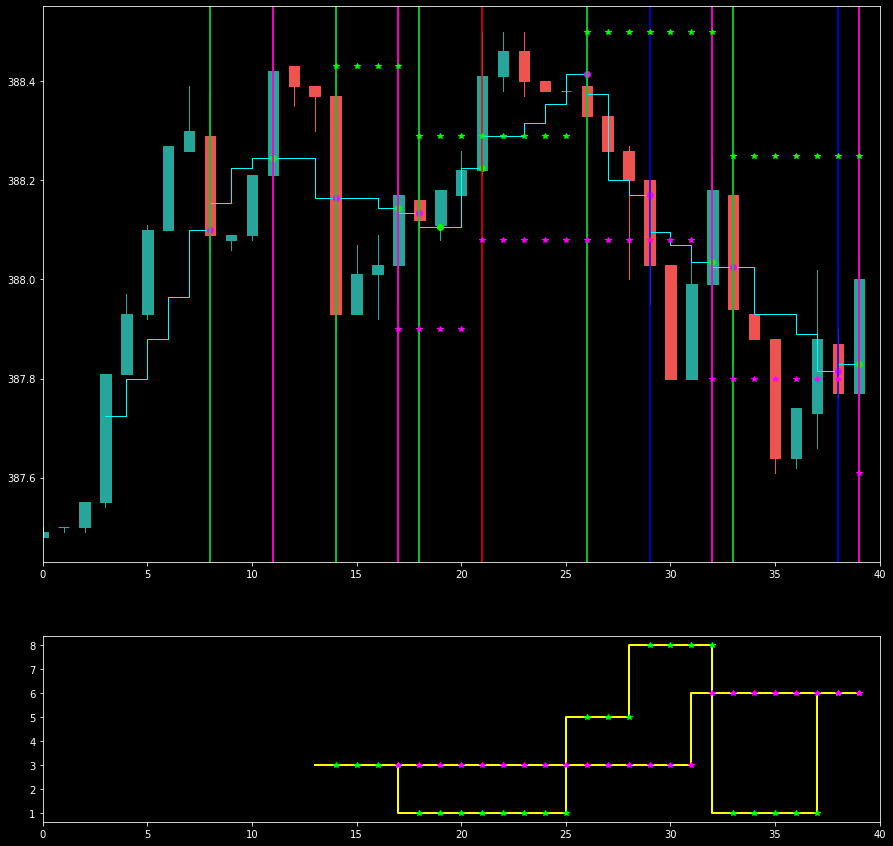

In [ ]:
plt.style.use(['dark_background', 'fast'])
fig = plt.figure(figsize=(15, 15))
nrows, ncols = 2, 1
gs = gridspec.GridSpec(nrows=nrows,  # row 부터 index 채우고 col 채우는 순서임 (gs_idx)
                        ncols=ncols,
                        height_ratios=[3, 1]
                        )

ax = fig.add_subplot(gs[0])

# ------ candles ------ #
candle_plot(a_data[:, col_idx_dict['ohlc_col_idxs']], ax, alpha=1.0, wickwidth=1.0)
# _ = [step_col_plot(a_data[:, params[0]], *params[1:]) for params in col_idx_dict['step_col_info']]

config.tr_set.wave_period = 5
wave_itv, wave_period = 'T', config.tr_set.wave_period
# t_df = wave_range_v11(t_df, config)
# t_df = wave_range_v11_2(t_df, config)
# t_df = wave_range_v12(t_df, config, ltf_df=None)
# t_df = wave_range_v13(t_df, config, ltf_df=None, term_thresh=1)
# t_df = wave_range_v14(t_df, config, ltf_df=None, term_thresh1=1, term_thresh2=3)
t_df = wave_range_v15(t_df, config, term_thresh1=2, term_thresh2=3)

len_df = len(t_df)   
len_df_range = np.arange(len_df).astype(int)

# ============ ============ ============ #
# ============ ============ ============ #

wave_high_fill_ = t_df['wave_high_fill_{}{}'.format(wave_itv, wave_period)].to_numpy()
wave_low_fill_ = t_df['wave_low_fill_{}{}'.format(wave_itv, wave_period)].to_numpy()
# wave_high_fill2_ = t_df['wave_high_fill2_{}{}'.format(wave_itv, wave_period)].to_numpy()
# wave_low_fill2_ = t_df['wave_low_fill2_{}{}'.format(wave_itv, wave_period)].to_numpy()

wave_high_terms_cnt_fill_ = t_df['wave_high_terms_cnt_fill_{}{}'.format(wave_itv, wave_period)].to_numpy()
wave_low_terms_cnt_fill_ = t_df['wave_low_terms_cnt_fill_{}{}'.format(wave_itv, wave_period)].to_numpy()
wave_cu_idx_ = get_index_bybool(t_df['wave_cu_{}{}'.format(wave_itv, wave_period)].to_numpy(), len_df_range)
wave_co_idx_ = get_index_bybool(t_df['wave_co_{}{}'.format(wave_itv, wave_period)].to_numpy(), len_df_range)
wave_cu_bool_idx_ = get_index_bybool(t_df['wave_cu_bool_{}{}'.format(wave_itv, wave_period)].to_numpy(), len_df_range)
wave_co_bool_idx_ = get_index_bybool(t_df['wave_co_bool_{}{}'.format(wave_itv, wave_period)].to_numpy(), len_df_range)
wave_cu_marker_ = t_df['wave_cu_marker_{}{}'.format(wave_itv, wave_period)].to_numpy()
wave_co_marker_ = t_df['wave_co_marker_{}{}'.format(wave_itv, wave_period)].to_numpy()
high_prime_idx = t_df['wave_high_prime_idx_{}{}'.format(wave_itv, wave_period)].to_numpy()
low_prime_idx = t_df['wave_low_prime_idx_{}{}'.format(wave_itv, wave_period)].to_numpy()
high_prime_idx_fill = t_df['wave_high_prime_idx_fill_{}{}'.format(wave_itv, wave_period)].to_numpy()
low_prime_idx_fill = t_df['wave_low_prime_idx_fill_{}{}'.format(wave_itv, wave_period)].to_numpy()

# ============ plot_check ============ #
dc_base_ = t_df['dc_base_{}{}'.format(wave_itv, wave_period)].to_numpy()
plt.step(len_df_range, dc_base_, alpha=1.0, color='cyan', linewidth=1)

plt.step(len_df_range, wave_cu_marker_, "o", alpha=1.0, color='#ff00ff', markersize=6)
plt.step(len_df_range, wave_co_marker_, "o", alpha=1.0, color='#00ff00', markersize=6)

[plt.axvline(int(idx_), color="#0000ff") for idx_ in wave_cu_bool_idx_ if not np.isnan(idx_)]
[plt.axvline(int(idx_), color="#ff0000") for idx_ in wave_co_bool_idx_ if not np.isnan(idx_)]

[plt.axvline(int(idx_), color="#00ff00") for idx_ in wave_cu_idx_ if not np.isnan(idx_)]
[plt.axvline(int(idx_), color="#ff00ff") for idx_ in wave_co_idx_ if not np.isnan(idx_)]

# [plt.axvline(int(idx_), color="#00ff00") for idx_ in wave_high_prime_idx if not np.isnan(idx_)]
# [plt.axvline(int(idx_), color="#ff00ff") for idx_ in wave_low_prime_idx if not np.isnan(idx_)]

# [plt.axvline(int(idx_), color="#00ff00") for idx_ in paired_cu_idx if not np.isnan(idx_)]

# plt.step(len_df_range, wave_high_fill_, alpha=1.0, color='yellow', linewidth=2)
# plt.step(len_df_range, wave_low_fill_, alpha=1.0, color='yellow', linewidth=2)

plt.step(len_df_range, wave_high_fill_, "*", alpha=1.0, color='#00ff00', markersize=6)
plt.step(len_df_range, wave_low_fill_, "*", alpha=1.0, color='#ff00ff', markersize=6)
# plt.step(len_df_range, wave_high_fill2_, "*", alpha=1.0, color='#0000ff', markersize=6)
# plt.step(len_df_range, wave_low_fill2_, "*", alpha=1.0, color='#ff0000', markersize=6)

plt.xlim(0, len_df)

plt.subplot(gs[1])
plt.step(len_df_range, wave_high_terms_cnt_fill_, alpha=1.0, color='yellow', linewidth=2)
plt.step(len_df_range, wave_low_terms_cnt_fill_, alpha=1.0, color='yellow', linewidth=2)
plt.step(len_df_range, wave_high_terms_cnt_fill_, "*", alpha=1.0, color='#00ff00', markersize=6)
plt.step(len_df_range, wave_low_terms_cnt_fill_, "*", alpha=1.0, color='#ff00ff', markersize=6)
plt.xlim(0, len_df)

plt.show()

###### data_window

In [ ]:
valid_high_prime_idx

array([10, 28, 37, 40, 50, 55, 57, 67, 69, 73, 75, 85, 92])

In [ ]:
# roll_high_idx_arr
# wave_high_fill_[valid_high_prime_idx]
# roll_high_.ffill().to_numpy()[60]
roll_low_.ffill().to_numpy()[60]

array([405.08, 405.  , 405.5 , 404.54])

In [ ]:
# roll_list[1][60]
roll_list[3]

In [ ]:
roll_hl_cnt = 4
wave_itv = pd.infer_freq(t_df.index)
wave_period = config.tr_set.wave_period

len_df = len(t_df)

wave_high_fill_ = t_df['wave_high_fill_{}{}'.format(wave_itv, wave_period)].to_numpy()
wave_low_fill_ = t_df['wave_low_fill_{}{}'.format(wave_itv, wave_period)].to_numpy()
high_prime_idx = t_df['wave_high_prime_idx_{}{}'.format(wave_itv, wave_period)].to_numpy()
low_prime_idx = t_df['wave_low_prime_idx_{}{}'.format(wave_itv, wave_period)].to_numpy()
high_prime_idx_fill_ = t_df['wave_high_prime_idx_fill_{}{}'.format(wave_itv, wave_period)].to_numpy()
low_prime_idx_fill_ = t_df['wave_low_prime_idx_fill_{}{}'.format(wave_itv, wave_period)].to_numpy()

valid_high_prime_idx = high_prime_idx[~np.isnan(high_prime_idx)].astype(int)  # roll_high 를 위한 prime_idx
valid_low_prime_idx = low_prime_idx[~np.isnan(low_prime_idx)].astype(int)  # roll_low 를 위한 prime_idx

roll_high_idx_arr = np.array([valid_high_prime_idx[idx_ + 1 - roll_hl_cnt:idx_ + 1] for idx_ in range(len(valid_high_prime_idx)) if idx_ + 1 >= roll_hl_cnt])  # cnt 수를 만족시키기 위해 idx 제한
roll_low_idx_arr = np.array([valid_low_prime_idx[idx_ + 1 - roll_hl_cnt:idx_ + 1] for idx_ in range(len(valid_low_prime_idx)) if idx_ + 1 >= roll_hl_cnt])

roll_high_ = pd.DataFrame(np.full((len_df, roll_hl_cnt), np.nan))
roll_low_ = pd.DataFrame(np.full((len_df, roll_hl_cnt), np.nan))
roll_high_prime_idx_ = pd.DataFrame(np.full((len_df, roll_hl_cnt), np.nan))
roll_low_prime_idx_ = pd.DataFrame(np.full((len_df, roll_hl_cnt), np.nan))

roll_high_.iloc[valid_high_prime_idx[roll_hl_cnt - 1:], :] = wave_high_fill_[roll_high_idx_arr]  # 제한된 idx 를 제외한 row 에 roll_hl 입력
roll_low_.iloc[valid_low_prime_idx[roll_hl_cnt - 1:], :] = wave_low_fill_[roll_low_idx_arr]

roll_high_prime_idx_.iloc[valid_high_prime_idx[roll_hl_cnt - 1:], :] = high_prime_idx_fill_[roll_high_idx_arr]  # 제한된 idx 를 제외한 row 에 roll_hl 입력
roll_low_prime_idx_.iloc[valid_low_prime_idx[roll_hl_cnt - 1:], :] = low_prime_idx_fill_[roll_low_idx_arr]
# roll_list[0][60]
# roll_list[1][60]

In [ ]:
i

74470

In [ ]:
%timeit -n1 -r1 wave_range_v10(res_df[-100000:], period1, ltf_df=None) # 23.7 s per loop
%timeit -n1 -r1 wave_range_v11(res_df[-100000:], period1, ltf_df=None) # 574 ms per loop

In [ ]:
# roll_wave_hl_v2(t_df, config, roll_hl_cnt=4)[0][-1]
# roll_wave_hl_v2(t_df, config, roll_hl_cnt=4)[1][50]
roll_list = roll_wave_hl_v3(t_df, config, roll_hl_cnt=4) # [0][60]
# roll_wave_hl(t_df, itv, period1)[0][150]

In [ ]:
res_df = t_df

In [ ]:
term_thresh1=1
term_thresh2=1

itv = 'T'  # '15T'

if itv != 'T':
  offset = '1h' if itv != 'D' else '9h'
  t_df = to_htf(res_df, itv, offset=offset)
else:
  t_df = res_df

period1 = config.tr_set.wave_period
# print(period1)

itv_num = to_itvnum(itv)
# print(itv_num)

t_df = donchian_channel_v4(t_df, period1)

dc_base_ = t_df['dc_base_{}{}'.format(itv, period1)].to_numpy()
b1_dc_base_ = t_df['dc_base_{}{}'.format(itv, period1)].shift(itv_num).to_numpy()

len_df = len(t_df)
len_df_range = np.arange(len_df).astype(int)
# short_open_res = np.ones(len_df)
# long_open_res = np.ones(len_df)

data_cols = ['open', 'high', 'low', 'close']
open, high, low, close = [t_df[col_].to_numpy() for col_ in data_cols]
b1_close = t_df.close.shift(itv_num).to_numpy()

# ============ modules ============ #
# ------ define co, cu ------ # <- point missing 과 관련해 정교해아함
cu_bool = ((b1_close > b1_dc_base_) & (dc_base_ > close)) | ((b1_close > dc_base_) & (dc_base_ > close))
co_bool = (b1_close < b1_dc_base_) & (dc_base_ < close) | ((b1_close < dc_base_) & (dc_base_ < close))

cu_idx = get_index_bybool(cu_bool, len_df_range)  # for marking
co_idx = get_index_bybool(co_bool, len_df_range)

# high_terms, low_terms, high_terms_cnt, low_terms_cnt = get_terms_info(cu_bool, co_bool, len_df_range)
# high_terms, low_terms, high_terms_cnt, low_terms_cnt, cu_idx_term, co_idx_term = get_terms_info_v2(cu_bool, co_bool, len_df_range)
high_terms, low_terms, high_terms_cnt, low_terms_cnt, cu_idx_term, co_idx_term = get_terms_info_v3(cu_bool, co_bool, len_df, len_df_range)

paired_cu_idx1 = high_terms[:, 1]
paired_co_idx1 = low_terms[:, 1]

# ------ 생략 이전 terms' hl ------ #
wave_high_terms_low_ = np.full(len_df, np.nan)
wave_low_terms_high_ = np.full(len_df, np.nan)

wave_high_terms_lows = np.array([low[iin:iout + 1].min() for iin, iout in high_terms])
wave_low_terms_highs = np.array([high[iin:iout + 1].max() for iin, iout in low_terms])

wave_high_terms_low_[paired_cu_idx1] = wave_high_terms_lows
wave_low_terms_high_[paired_co_idx1] = wave_low_terms_highs

# ------ 생략된 cu, co 에 대한 2nd pairing 진행 ------ #
# cu_bool[high_terms[:, 1][high_terms_cnt <= term_thresh]] = False
# co_bool[low_terms[:, 1][low_terms_cnt <= term_thresh]] = False
cu_bool[high_terms[:, 1][(high_terms_cnt <= term_thresh1) & (cu_idx_term <= term_thresh2)]] = False
co_bool[low_terms[:, 1][(low_terms_cnt <= term_thresh1) & (co_idx_term <= term_thresh2)]] = False

# high_terms, low_terms, high_terms_cnt, low_terms_cnt = get_terms_info(cu_bool, co_bool, len_df_range)
# high_terms, low_terms, high_terms_cnt, low_terms_cnt, _, _ = get_terms_info_v2(cu_bool, co_bool, len_df_range)
high_post_terms, low_post_terms, high_prime_terms_cnt, low_prime_terms_cnt, high_prime_terms, low_prime_terms, _, _ = get_terms_info_v3(cu_bool,
                                                                                                                                      co_bool,
                                                                                                                                      len_df,
                                                                                                                                      len_df_range,
                                                                                                                                      True)

paired_cu_idx2 = high_prime_terms[:, 1]
paired_co_idx2 = low_prime_terms[:, 1]

# ====== get wave_hl & terms ====== #
wave_high_ = np.full(len_df, np.nan)
wave_low_ = np.full(len_df, np.nan)

wave_prime_highs = np.array([high[iin:iout + 1].max() for iin, iout in high_prime_terms])
wave_prime_lows = np.array([low[iin:iout + 1].min() for iin, iout in low_prime_terms])

wave_high_[paired_cu_idx2] = wave_prime_highs
wave_low_[paired_co_idx2] = wave_prime_lows

wave_high_fill_ = fill_arr(wave_high_)
wave_low_fill_ = fill_arr(wave_low_)

# ------ Todo, update_hl 에 대해서, post_terms_hl 적용 ------ #
wave_post_highs = np.array([high[iin:iout + 1].max() for iin, iout in high_terms])  # 생략전 post_terms_hl 사용
wave_post_lows = np.array([low[iin:iout + 1].min() for iin, iout in low_terms])

update_low_cu_bool = wave_high_terms_low_ < wave_low_fill_
update_high_co_bool = wave_low_terms_high_ > wave_high_fill_

update_paired_cu_bool = (cu_bool * update_low_cu_bool)[paired_cu_idx1]
update_paired_cu_idx = paired_cu_idx1[update_paired_cu_bool]
wave_high_[update_paired_cu_idx] = wave_post_highs[update_paired_cu_bool]

update_paired_co_bool = (co_bool * update_high_co_bool)[paired_co_idx1]
update_paired_co_idx = paired_co_idx1[update_paired_co_bool]
wave_low_[update_paired_co_idx] = wave_post_lows[update_paired_co_bool]

# wave_high_fill2_ = fill_arr(wave_high_)
# wave_low_fill2_ = fill_arr(wave_low_)
wave_high_fill_ = fill_arr(wave_high_)
wave_low_fill_ = fill_arr(wave_low_)

# wave_high_terms_low_ = np.full(len_df, np.nan)
# wave_low_terms_high_ = np.full(len_df, np.nan)

# wave_high_terms_lows = np.array([low[iin:iout + 1].min() for iin, iout in high_terms])  # for point rejection, Todo, min_max 설정 항상 주의
# wave_low_terms_highs = np.array([high[iin:iout + 1].max() for iin, iout in low_terms])

# wave_high_terms_low_[paired_cu_idx] = wave_high_terms_lows
# wave_low_terms_high_[paired_co_idx] = wave_low_terms_highs

wave_high_terms_cnt_ = np.full(len_df, np.nan)
wave_low_terms_cnt_ = np.full(len_df, np.nan)

wave_high_terms_cnt_[paired_cu_idx2] = high_prime_terms_cnt
wave_low_terms_cnt_[paired_co_idx2] = low_prime_terms_cnt

wave_high_terms_cnt_fill_ = fill_arr(wave_high_terms_cnt_)
wave_low_terms_cnt_fill_ = fill_arr(wave_low_terms_cnt_)

# ------ hl_fill 의 prime_idx 를 찾아야함 ------ #
b1_wave_high_fill_ = pd.Series(wave_high_fill_).shift(1).to_numpy()
b1_wave_low_fill_ = pd.Series(wave_low_fill_).shift(1).to_numpy()
wave_high_prime_idx = np.where((wave_high_fill_ != b1_wave_high_fill_) & ~np.isnan(wave_high_fill_), len_df_range, np.nan)
wave_low_prime_idx = np.where((wave_low_fill_ != b1_wave_low_fill_) & ~np.isnan(wave_low_fill_), len_df_range, np.nan)

high_prime_idx_fill_ = fill_arr(wave_high_prime_idx)
low_prime_idx_fill_ = fill_arr(wave_low_prime_idx)

# ============ enlist to df_cols ============ #
t_df['wave_high_fill_{}{}'.format(itv, period1)] = wave_high_fill_
t_df['wave_low_fill_{}{}'.format(itv, period1)] = wave_low_fill_
# t_df['wave_high_fill2_{}{}'.format(itv, period1)] = wave_high_fill2_
# t_df['wave_low_fill2_{}{}'.format(itv, period1)] = wave_low_fill2_

t_df['wave_high_terms_cnt_fill_{}{}'.format(itv, period1)] = wave_high_terms_cnt_fill_
t_df['wave_low_terms_cnt_fill_{}{}'.format(itv, period1)] = wave_low_terms_cnt_fill_
t_df['wave_cu_{}{}'.format(itv, period1)] = cu_bool * ~update_low_cu_bool
t_df['wave_co_{}{}'.format(itv, period1)] = co_bool * ~update_high_co_bool
t_df['wave_cu_bool_{}{}'.format(itv, period1)] = cu_bool  # temporary, for plot_check
t_df['wave_co_bool_{}{}'.format(itv, period1)] = co_bool
t_df['wave_cu_marker_{}{}'.format(itv, period1)] = get_line(cu_idx, dc_base_)
t_df['wave_co_marker_{}{}'.format(itv, period1)] = get_line(co_idx, dc_base_)

# ------ for roll prev_hl ------ #
t_df['wave_high_prime_idx_{}{}'.format(itv, period1)] = wave_high_prime_idx  # cu
t_df['wave_low_prime_idx_{}{}'.format(itv, period1)] = wave_low_prime_idx

# ------ for first_high ------ #
t_df['wave_high_prime_idx_fill_{}{}'.format(itv, period1)] = high_prime_idx_fill_
t_df['wave_low_prime_idx_fill_{}{}'.format(itv, period1)] = low_prime_idx_fill_

if itv != 'T':
    join_cols = np.arange(-17, 0, 1).astype(int)  # points & donchian_channels
    res_df.drop(t_df.columns[join_cols], inplace=True, axis=1, errors='ignore')
    try:
        res_df = res_df.join(to_lower_tf_v3(res_df, t_df, join_cols), how='inner')
    except Exception as e:
        print("error in wave_range()'s join() :", e)
        

##### legacy

In [ ]:
  
def wave_range_ratio_v3(res_df, config):
    wave_itv = pd.infer_freq(res_df.index)
    wave_period = config.tr_set.wave_period

    roll_high_, roll_low_, _, _ = roll_wave_hl_v3(res_df, config, roll_hl_cnt=4)

    wave1_range = roll_high_[:, -2] - roll_low_[:, -2]
    cu_wave2_range = roll_high_[:, -2] - roll_low_[:, -1]  # for short, cu
    co_wave2_range = roll_high_[:, -1] - roll_low_[:, -2]  # for long, co
    wave3_range = roll_high_[:, -1] - roll_low_[:, -1]

    res_df['cu_wrr_21_{}{}'.format(wave_itv, wave_period)] = cu_wave2_range / wave1_range
    res_df['cu_wrr_32_{}{}'.format(wave_itv, wave_period)] = wave3_range / cu_wave2_range

    res_df['co_wrr_21_{}{}'.format(wave_itv, wave_period)] = co_wave2_range / wave1_range
    res_df['co_wrr_32_{}{}'.format(wave_itv, wave_period)] = wave3_range / co_wave2_range

    return res_df

def get_terms_info_v3(cu_bool, co_bool, len_df, len_df_range, prime_terms=False):
    cu_idx = get_index_bybool(cu_bool, len_df_range)
    co_idx = get_index_bybool(co_bool, len_df_range)

    cu_fill_idx = fill_arr(cu_idx)
    co_fill_idx = fill_arr(co_idx)

    notnan_cu_bool = ~np.isnan(cu_idx)
    notnan_co_bool = ~np.isnan(co_idx)

    valid_cu_bool = notnan_cu_bool * ~np.isnan(co_fill_idx)
    valid_co_bool = notnan_co_bool * ~np.isnan(cu_fill_idx)

    if prime_terms:
        # ------ 생략된 idx 에 대한 prime_idx 탐색 ------ #
        high_bool = cu_fill_idx < co_fill_idx  # 이렇게 해야 high_terms[:, 1] 이 cu_idx 가 나옴
        low_bool = co_fill_idx < cu_fill_idx

        high_terms_vec = get_index_bybool(high_bool, len_df_range)
        low_terms_vec = get_index_bybool(low_bool, len_df_range)  # -> low_terms

        high_terms_list = using_clump(high_terms_vec)
        low_terms_list = using_clump(low_terms_vec)

        valid_cu_prime_idx = np.array([terms.min() for terms in low_terms_list])
        valid_co_prime_idx = np.array([terms.min() for terms in high_terms_list])

        cu_prime_idx = np.full(len_df, np.nan)
        co_prime_idx = np.full(len_df, np.nan)

        cu_prime_idx[valid_cu_prime_idx] = valid_cu_prime_idx
        co_prime_idx[valid_co_prime_idx] = valid_co_prime_idx

        cu_prime_fill_idx = fill_arr(cu_prime_idx)
        co_prime_fill_idx = fill_arr(co_prime_idx)

        valid_cu_bool *= ~np.isnan(co_prime_fill_idx)
        valid_co_bool *= ~np.isnan(cu_prime_fill_idx)

    high_post_terms = np.vstack((co_fill_idx[valid_cu_bool], cu_idx[valid_cu_bool])).T.astype(int)
    low_post_terms = np.vstack((cu_fill_idx[valid_co_bool], co_idx[valid_co_bool])).T.astype(int)

    high_post_terms_cnt = high_post_terms[:, 1] - high_post_terms[:, 0]
    low_post_terms_cnt = low_post_terms[:, 1] - low_post_terms[:, 0]

    # ------ co, cu idx's terms ------ #
    valid_cu_idx = cu_idx[valid_cu_bool]
    valid_co_idx = co_idx[valid_co_bool]
    valid_shift_cu_idx = pd.Series(valid_cu_idx).shift(1).to_numpy()
    valid_shift_co_idx = pd.Series(valid_co_idx).shift(1).to_numpy()

    cu_idx_term = valid_cu_idx - valid_shift_cu_idx
    co_idx_term = valid_co_idx - valid_shift_co_idx

    # ------ get co, cu terms_v2 ------ # # 기본은 아래 logic 으로 수행하고, update_hl 도 해당 term 구간의 hl 이 더 작거나 클경우 적용 가능할 것
    if prime_terms:
        high_prime_terms = np.vstack((co_prime_fill_idx[valid_cu_bool], cu_idx[valid_cu_bool])).T.astype(int)
        low_prime_terms = np.vstack((cu_prime_fill_idx[valid_co_bool], co_idx[valid_co_bool])).T.astype(int)
        
        high_prime_terms_cnt = high_prime_terms[:, 1] - high_prime_terms[:, 0]
        low_prime_terms_cnt = low_prime_terms[:, 1] - low_prime_terms[:, 0]

        return high_post_terms, low_post_terms, high_prime_terms_cnt, low_prime_terms_cnt, high_prime_terms, low_prime_terms, cu_idx_term, co_idx_term

    return high_post_terms, low_post_terms, high_post_terms_cnt, low_post_terms_cnt, cu_idx_term, co_idx_term
  
def wave_range_ratio_v2(res_df, config):

    wave_itv = pd.infer_freq(res_df.index)
    wave_period = config.tr_set.wave_period

    roll_high_, roll_low_ = roll_wave_hl_v2(res_df, config, roll_hl_cnt=4)
    
    wave1_range = roll_high_[:, -2] - roll_low_[:, -2]
    cu_wave2_range = roll_high_[:, -2] - roll_low_[:, -1]  # for short, cu
    co_wave2_range = roll_high_[:, -1] - roll_low_[:, -2]  # for long, co
    wave3_range = roll_high_[:, -1] - roll_low_[:, -1]

    res_df['cu_wrr_21_{}{}'.format(wave_itv, wave_period)] = cu_wave2_range / wave1_range
    res_df['cu_wrr_32_{}{}'.format(wave_itv, wave_period)] = wave3_range / cu_wave2_range

    res_df['co_wrr_21_{}{}'.format(wave_itv, wave_period)] = co_wave2_range / wave1_range
    res_df['co_wrr_32_{}{}'.format(wave_itv, wave_period)] = wave3_range / co_wave2_range

    return res_df
    
def roll_wave_hl(t_df, config, roll_hl_cnt=4):
  
    wave_itv = pd.infer_freq(t_df.index)
    wave_period = config.tr_set.wave_period

    len_df = len(t_df)

    wave_high_fill_ = t_df['wave_high_fill_{}{}'.format(wave_itv, wave_period)].to_numpy()
    wave_low_fill_ = t_df['wave_low_fill_{}{}'.format(wave_itv, wave_period)].to_numpy()
    cu_prime_idx = t_df['wave_cu_prime_idx_{}{}'.format(wave_itv, wave_period)].to_numpy()
    co_prime_idx = t_df['wave_co_prime_idx_{}{}'.format(wave_itv, wave_period)].to_numpy()

    valid_cu_prime_idx = cu_prime_idx[~np.isnan(cu_prime_idx)].astype(int)  # -> 필요한 prev_hl 갯수만큼 각 index 기준으로 자르기
    valid_co_prime_idx = co_prime_idx[~np.isnan(co_prime_idx)].astype(int)  # -> 필요한 prev_hl 갯수만큼 각 index 기준으로 자르기

    cu_roll_hl_idx_arr = np.array(
        [valid_cu_prime_idx[idx_ + 1 - roll_hl_cnt:idx_ + 1] for idx_ in range(len(valid_cu_prime_idx)) if idx_ + 1 >= roll_hl_cnt])
    co_roll_hl_idx_arr = np.array(
        [valid_co_prime_idx[idx_ + 1 - roll_hl_cnt:idx_ + 1] for idx_ in range(len(valid_co_prime_idx)) if idx_ + 1 >= roll_hl_cnt])

    cu_roll_high_ = pd.DataFrame(np.full((len_df, roll_hl_cnt), np.nan))
    cu_roll_low_ = pd.DataFrame(np.full((len_df, roll_hl_cnt), np.nan))
    co_roll_high_ = pd.DataFrame(np.full((len_df, roll_hl_cnt), np.nan))
    co_roll_low_ = pd.DataFrame(np.full((len_df, roll_hl_cnt), np.nan))

    cu_roll_high_.iloc[valid_cu_prime_idx[roll_hl_cnt - 1:], :] = wave_high_fill_[cu_roll_hl_idx_arr]
    cu_roll_low_.iloc[valid_cu_prime_idx[roll_hl_cnt - 1:], :] = wave_low_fill_[cu_roll_hl_idx_arr]
    co_roll_high_.iloc[valid_co_prime_idx[roll_hl_cnt - 1:], :] = wave_high_fill_[co_roll_hl_idx_arr]
    co_roll_low_.iloc[valid_co_prime_idx[roll_hl_cnt - 1:], :] = wave_low_fill_[co_roll_hl_idx_arr]

    return cu_roll_high_.ffill().to_numpy(), cu_roll_low_.ffill().to_numpy(), co_roll_high_.ffill().to_numpy(), co_roll_low_.ffill().to_numpy()  # t_df 에 hl_cnt 만큼 col 만들어야해서 numpy 로 뽑음

def backing_future_data(res_df, future_cols, itv_list): # itv 자동 조사 가능 ? (future_work)
  
    for col_, itv_ in zip(future_cols, itv_list):
        back_col_ = 'b1_' + col_
        res_df[back_col_] = res_df[col_].shift(to_itvnum(itv_))

    return res_df



def wave_loc_pct_v2(res_df, config, itv, period):

    wave_itv = pd.infer_freq(res_df.index)
    wave_period = config.tr_set.wave_period

    wave_high_fill_ = res_df['wave_high_fill_{}{}'.format(wave_itv, wave_period)].to_numpy()
    wave_low_fill_ = res_df['wave_low_fill_{}{}'.format(wave_itv, wave_period)].to_numpy()

    bb_upper_ = res_df['bb_upper_{}{}'.format(itv, period)].to_numpy()
    bb_lower_ = res_df['bb_lower_{}{}'.format(itv, period)].to_numpy()

    bb_gap = bb_upper_ - bb_lower_
    
    cu_prime_idx_fill_ = res_df['wave_cu_prime_idx_fill_{}{}'.format(wave_itv, wave_period)].to_numpy()
    co_prime_idx_fill_ = res_df['wave_co_prime_idx_fill_{}{}'.format(wave_itv, wave_period)].to_numpy()
    cu_prime_bb_gap = get_line(cu_prime_idx_fill_, bb_gap)
    co_prime_bb_gap = get_line(co_prime_idx_fill_, bb_gap)

    res_df['wave_high_loc_pct_{}{}'.format(wave_itv, wave_period)] = (bb_upper_ - wave_high_fill_) / cu_prime_bb_gap
    res_df['wave_low_loc_pct_{}{}'.format(wave_itv, wave_period)] = (wave_low_fill_ - bb_lower_) / co_prime_bb_gap

    return res_df

def wave_loc_pct(res_df, config, itv, period):

    wave_itv = pd.infer_freq(res_df.index)
    wave_period = config.tr_set.wave_period

    wave_high_fill_ = res_df['wave_high_fill_{}{}'.format(wave_itv, wave_period)].to_numpy()
    wave_low_fill_ = res_df['wave_low_fill_{}{}'.format(wave_itv, wave_period)].to_numpy()

    bb_upper_ = res_df['bb_upper_{}{}'.format(itv, period)].to_numpy()
    bb_lower_ = res_df['bb_lower_{}{}'.format(itv, period)].to_numpy()

    bb_gap = bb_upper_ - bb_lower_

    res_df['wave_high_loc_pct_{}{}'.format(wave_itv, wave_period)] = (bb_upper_ - wave_high_fill_) / bb_gap
    res_df['wave_low_loc_pct_{}{}'.format(wave_itv, wave_period)] = (wave_low_fill_ - bb_lower_) / bb_gap

    return res_df


def get_terms_info_v2(cu_bool, co_bool, len_df_range):

    cu_idx = get_index_bybool(cu_bool, len_df_range)
    co_idx = get_index_bybool(co_bool, len_df_range)

    cu_fill_idx = fill_arr(cu_idx)
    co_fill_idx = fill_arr(co_idx)

    notnan_cu_bool = ~np.isnan(cu_idx)
    notnan_co_bool = ~np.isnan(co_idx)
  
    # ------ get co, cu terms_v2 ------ # # 기본은 아래 logic 으로 수행하고, update_hl 도 해당 term 구간의 hl 이 더 작거나 클경우 적용 가능할 것    
    valid_cu_bool = notnan_cu_bool * ~np.isnan(co_fill_idx)  # co 와 pair 가 가능한 cu_idx
    valid_co_bool = notnan_co_bool * ~np.isnan(cu_fill_idx)

    high_terms = np.vstack((co_fill_idx[valid_cu_bool], cu_idx[valid_cu_bool])).T.astype(int)
    low_terms = np.vstack((cu_fill_idx[valid_co_bool], co_idx[valid_co_bool])).T.astype(int)

    high_terms_cnt = high_terms[:, 1] - high_terms[:, 0] 
    low_terms_cnt = low_terms[:, 1] - low_terms[:, 0] 

    # valid_cu_idx = cu_idx[notnan_cu_bool]
    # valid_co_idx = co_idx[notnan_co_bool]
    valid_cu_idx = cu_idx[valid_cu_bool]
    valid_co_idx = co_idx[valid_co_bool]
    valid_shift_cu_idx = pd.Series(valid_cu_idx).shift(1).to_numpy()
    valid_shift_co_idx = pd.Series(valid_co_idx).shift(1).to_numpy()

    cu_idx_term = valid_cu_idx - valid_shift_cu_idx
    co_idx_term = valid_co_idx - valid_shift_co_idx

    return high_terms, low_terms, high_terms_cnt, low_terms_cnt, cu_idx_term, co_idx_term

def get_terms_info(cu_bool, co_bool, len_df_range):

    cu_idx = get_index_bybool(cu_bool, len_df_range)
    co_idx = get_index_bybool(co_bool, len_df_range)

    cu_fill_idx = fill_arr(cu_idx)
    co_fill_idx = fill_arr(co_idx)
  
    # ------ get co, cu terms_v2 ------ # # 기본은 아래 logic 으로 수행하고, update_hl 도 해당 term 구간의 hl 이 더 작거나 클경우 적용 가능할 것
    valid_cu_idx = ~np.isnan(cu_idx) * ~np.isnan(co_fill_idx)
    valid_co_idx = ~np.isnan(co_idx) * ~np.isnan(cu_fill_idx)

    high_terms = np.vstack((co_fill_idx[valid_cu_idx], cu_idx[valid_cu_idx])).T.astype(int)
    low_terms = np.vstack((cu_fill_idx[valid_co_idx], co_idx[valid_co_idx])).T.astype(int)

    high_terms_cnt = high_terms[:, 1] - high_terms[:, 0] 
    low_terms_cnt = low_terms[:, 1] - low_terms[:, 0] 

    return high_terms, low_terms, high_terms_cnt, low_terms_cnt



def wave_range_v13(t_df, config, ltf_df=None, term_thresh=2):  # v2 for period1 only

    itv = pd.infer_freq(t_df.index)
    period1 = config.tr_set.wave_period
    # print(period1)

    itv_num = to_itvnum(itv)
    # print(itv_num)

    t_df = donchian_channel_v4(t_df, period1) 

    dc_base_ = t_df['dc_base_{}{}'.format(itv, period1)].to_numpy()
    b1_dc_base_ = t_df['dc_base_{}{}'.format(itv, period1)].shift(itv_num).to_numpy()

    len_df = len(t_df)   
    len_df_range = np.arange(len_df).astype(int)
    # short_open_res = np.ones(len_df)
    # long_open_res = np.ones(len_df)

    data_cols = ['open', 'high', 'low', 'close']
    open, high, low, close = [t_df[col_].to_numpy() for col_ in data_cols]
    b1_close = t_df.close.shift(itv_num).to_numpy()
    
    # ============ modules ============ #  
    # ------ define co, cu ------ # <- point missing 과 관련해 정교해아함
    cu_bool = ((b1_close > b1_dc_base_) & (dc_base_ > close)) | ((b1_close > dc_base_) & (dc_base_ > close))
    co_bool = (b1_close < b1_dc_base_) & (dc_base_ < close) | ((b1_close < dc_base_) & (dc_base_ < close))

    cu_idx = get_index_bybool(cu_bool, len_df_range)   # for marking
    co_idx = get_index_bybool(co_bool, len_df_range)

    high_terms, low_terms, high_terms_cnt, low_terms_cnt = get_terms_info(cu_bool, co_bool, len_df_range)

    paired_cu_idx = high_terms[:, 1]
    paired_co_idx = low_terms[:, 1]

    # ------ 생략 이전 terms' hl ------ #
    wave_high_terms_low_ = np.full(len_df, np.nan)
    wave_low_terms_high_ = np.full(len_df, np.nan)

    wave_high_terms_lows = np.array([low[iin:iout + 1].min() for iin, iout in high_terms])
    wave_low_terms_highs = np.array([high[iin:iout + 1].max() for iin, iout in low_terms])  

    wave_high_terms_low_[paired_cu_idx] = wave_high_terms_lows
    wave_low_terms_high_[paired_co_idx] = wave_low_terms_highs

    # ------ 생략된 cu, co 에 대한 2nd pairing 진행 ------ #
    cu_bool[high_terms[:, 1][high_terms_cnt <= term_thresh]] = False
    co_bool[low_terms[:, 1][low_terms_cnt <= term_thresh]] = False  
    high_terms, low_terms, high_terms_cnt, low_terms_cnt = get_terms_info(cu_bool, co_bool, len_df_range)
    
    paired_cu_idx = high_terms[:, 1]
    paired_co_idx = low_terms[:, 1]

    # ====== get wave_hl & terms ====== #
    wave_high_ = np.full(len_df, np.nan)
    wave_low_ = np.full(len_df, np.nan)

    wave_highs = np.array([high[iin:iout + 1].max() for iin, iout in high_terms])
    wave_lows = np.array([low[iin:iout + 1].min() for iin, iout in low_terms])

    wave_high_[paired_cu_idx] = wave_highs
    wave_low_[paired_co_idx] = wave_lows

    wave_high_fill_ = fill_arr(wave_high_)
    wave_low_fill_ = fill_arr(wave_low_)

    # wave_high_terms_low_ = np.full(len_df, np.nan)
    # wave_low_terms_high_ = np.full(len_df, np.nan)

    # wave_high_terms_lows = np.array([low[iin:iout + 1].min() for iin, iout in high_terms])  # for point rejection, Todo, min_max 설정 항상 주의
    # wave_low_terms_highs = np.array([high[iin:iout + 1].max() for iin, iout in low_terms])

    # wave_high_terms_low_[paired_cu_idx] = wave_high_terms_lows
    # wave_low_terms_high_[paired_co_idx] = wave_low_terms_highs

    wave_high_terms_cnt_ = np.full(len_df, np.nan)
    wave_low_terms_cnt_ = np.full(len_df, np.nan)

    wave_high_terms_cnt_[paired_cu_idx] = high_terms_cnt
    wave_low_terms_cnt_[paired_co_idx] = low_terms_cnt

    wave_high_terms_cnt_fill_ = fill_arr(wave_high_terms_cnt_)
    wave_low_terms_cnt_fill_ = fill_arr(wave_low_terms_cnt_)
    
    # ------ hl_fill 의 prime_idx 를 찾아야함 ------ # 
    b1_wave_high_fill_ = pd.Series(wave_high_fill_).shift(1).to_numpy()
    b1_wave_low_fill_ = pd.Series(wave_low_fill_).shift(1).to_numpy()
    wave_high_prime_idx = np.where((wave_high_fill_ != b1_wave_high_fill_) & ~np.isnan(wave_high_fill_), len_df_range, np.nan)
    wave_low_prime_idx = np.where((wave_low_fill_ != b1_wave_low_fill_) & ~np.isnan(wave_low_fill_), len_df_range, np.nan)

    cu_prime_idx = wave_high_prime_idx
    cu_prime_idx_fill_ = fill_arr(cu_prime_idx)

    co_prime_idx = wave_low_prime_idx
    co_prime_idx_fill_ = fill_arr(wave_low_prime_idx)  

    # ============ enlist to df_cols ============ #       
    t_df['wave_high_fill_{}{}'.format(itv, period1)] = wave_high_fill_
    t_df['wave_low_fill_{}{}'.format(itv, period1)] = wave_low_fill_

    t_df['wave_high_terms_cnt_fill_{}{}'.format(itv, period1)] = wave_high_terms_cnt_fill_
    t_df['wave_low_terms_cnt_fill_{}{}'.format(itv, period1)] = wave_low_terms_cnt_fill_
    t_df['wave_cu_{}{}'.format(itv, period1)] = cu_bool * (wave_high_terms_low_ >= wave_low_fill_)   # co ~ cu’s low 가 wave_low 갱신할 경우 point 에서 제외
    t_df['wave_co_{}{}'.format(itv, period1)] = co_bool * (wave_low_terms_high_ <= wave_high_fill_)
    t_df['wave_cu_bool_{}{}'.format(itv, period1)] = cu_bool   # temporary, for plot_check
    t_df['wave_co_bool_{}{}'.format(itv, period1)] = co_bool
    t_df['wave_cu_marker_{}{}'.format(itv, period1)] = get_line(cu_idx, dc_base_)
    t_df['wave_co_marker_{}{}'.format(itv, period1)] = get_line(co_idx, dc_base_)

    # ------ for roll prev_hl ------ # 
    t_df['wave_cu_prime_idx_{}{}'.format(itv, period1)] = cu_prime_idx
    t_df['wave_co_prime_idx_{}{}'.format(itv, period1)] = co_prime_idx
    
    # ------ for first_high ------ # 
    t_df['wave_cu_prime_idx_fill_{}{}'.format(itv, period1)] = cu_prime_idx_fill_
    t_df['wave_co_prime_idx_fill_{}{}'.format(itv, period1)] = co_prime_idx_fill_
      
    if itv != 'T':
      assert ltf_df is not None, "assert ltf_df is not None"
      join_cols = np.arange(-15, 0 ,1).astype(int)  # points & donchian_channels
      ltf_df.drop(t_df.columns[join_cols], inplace=True, axis=1, errors='ignore')
      try:
        ltf_df = ltf_df.join(to_lower_tf_v2(ltf_df, t_df, join_cols), how='inner')
      except Exception as e:
        print("error in wave_range()'s join() :", e)
    else:
      ltf_df = t_df    

    return ltf_df


##### dump

In [ ]:
# t_df
to_lower_tf_v2(res_df, t_df, join_cols)

In [ ]:
wave_post_highs = np.array([high[iin:iout + 1].max() for iin, iout in high_post_terms])
wave_post_lows = np.array([low[iin:iout + 1].min() for iin, iout in low_post_terms])

# print(len(paired_cu_idx))
# print(len(wave_post_highs))
# print(len(cu_bool))

update_paired_cu_bool = (cu_bool * (wave_high_terms_low_ < wave_low_fill_))[paired_cu_idx]
update_paired_cu_idx = paired_cu_idx[update_paired_cu_bool]
wave_high_[update_paired_cu_idx] = wave_post_highs[update_paired_cu_bool]

update_paired_co_bool = (co_bool * (wave_low_terms_high_ > wave_high_fill_))[paired_co_idx]
update_paired_co_idx = paired_co_idx[update_paired_co_bool]
wave_low_[update_paired_co_idx] = wave_post_lows[update_paired_co_bool]

wave_high_fill2_ = fill_arr(wave_high_)
wave_low_fill2_ = fill_arr(wave_low_)

In [ ]:
# wave_post_highs
# update_cu_bool = (cu_bool * (wave_high_terms_low_ < wave_low_fill_))[paired_cu_idx]
# print(paired_cu_idx[update_cu_bool])
# print(paired_cu_idx)
print(len(update_paired_cu_idx))
print(len(wave_post_highs[update_paired_cu_bool]))
# print(high_prime_terms[:, 1])
# print(high_post_terms[:, 1])

11
11


In [ ]:
cu_idx = get_index_bybool(cu_bool, len_df_range)
co_idx = get_index_bybool(co_bool, len_df_range)

cu_fill_idx = fill_arr(cu_idx)
co_fill_idx = fill_arr(co_idx)

notnan_cu_bool = ~np.isnan(cu_idx)
notnan_co_bool = ~np.isnan(co_idx)

# ------ 생략된 idx 에 대한 prime_idx 탐색 ------ #
high_bool = cu_fill_idx < co_fill_idx  # 이렇게 해야 high_terms[:, 1] 이 cu_idx 가 나옴
low_bool = co_fill_idx < cu_fill_idx

high_terms_vec = get_index_bybool(high_bool, len_df_range)
low_terms_vec = get_index_bybool(low_bool, len_df_range) # -> low_terms

high_terms_list = using_clump(high_terms_vec)
low_terms_list = using_clump(low_terms_vec)

valid_cu_prime_idx = np.array([terms.min() for terms in low_terms_list])
valid_co_prime_idx = np.array([terms.min() for terms in high_terms_list])

cu_prime_idx = np.full(len_df, np.nan)
co_prime_idx = np.full(len_df, np.nan)

cu_prime_idx[valid_cu_prime_idx] = valid_cu_prime_idx
co_prime_idx[valid_co_prime_idx] = valid_co_prime_idx

cu_prime_fill_idx = fill_arr(cu_prime_idx)
co_prime_fill_idx = fill_arr(co_prime_idx)

# ------ get co, cu terms_v2 ------ # # 기본은 아래 logic 으로 수행하고, update_hl 도 해당 term 구간의 hl 이 더 작거나 클경우 적용 가능할 것
valid_cu_bool = notnan_cu_bool * ~np.isnan(co_fill_idx) * ~np.isnan(co_prime_fill_idx)
valid_co_bool = notnan_co_bool * ~np.isnan(cu_fill_idx) * ~np.isnan(cu_prime_fill_idx)

high_post_terms = np.vstack((co_fill_idx[valid_cu_bool], cu_idx[valid_cu_bool])).T.astype(int)
low_post_terms = np.vstack((cu_fill_idx[valid_co_bool], co_idx[valid_co_bool])).T.astype(int)

high_terms_cnt = high_post_terms[:, 1] - high_post_terms[:, 0] 
low_terms_cnt = low_post_terms[:, 1] - low_post_terms[:, 0] 

high_prime_terms = np.vstack((co_prime_fill_idx[valid_cu_bool], cu_idx[valid_cu_bool])).T.astype(int)
low_prime_terms = np.vstack((cu_prime_fill_idx[valid_co_bool], co_idx[valid_co_bool])).T.astype(int)

In [ ]:
# co_prime_idx
# co_prime_fill_idx
high_prime_terms

In [ ]:
#  get_index_bybool(notnan_cu_bool, len_df_range)
valid_cu_idx = cu_idx[notnan_cu_bool]
valid_shift_cu_idx = pd.Series(valid_cu_idx).shift(1).to_numpy()
valid_co_idx = co_idx[notnan_co_bool]
valid_shift_co_idx = pd.Series(valid_co_idx).shift(1).to_numpy()

valid_cu_idx - valid_shift_cu_idx
valid_co_idx - valid_shift_co_idx

array([nan,  2.,  7.,  2.,  4.,  2.,  7.,  5.,  4.,  6.,  9.,  2.,  5., 11., 14.])

In [ ]:
def wave_range_v14(t_df, config, ltf_df=None, term_thresh1=1, term_thresh2=3):  # v2 for period1 only

  itv = pd.infer_freq(t_df.index)
  period1 = config.tr_set.wave_period
  # print(period1)

  itv_num = to_itvnum(itv)
  # print(itv_num)

  t_df = donchian_channel_v4(t_df, period1) 

  dc_base_ = t_df['dc_base_{}{}'.format(itv, period1)].to_numpy()
  b1_dc_base_ = t_df['dc_base_{}{}'.format(itv, period1)].shift(itv_num).to_numpy()

  len_df = len(t_df)   
  len_df_range = np.arange(len_df).astype(int)
  # short_open_res = np.ones(len_df)
  # long_open_res = np.ones(len_df)

  data_cols = ['open', 'high', 'low', 'close']
  open, high, low, close = [t_df[col_].to_numpy() for col_ in data_cols]
  b1_close = t_df.close.shift(itv_num).to_numpy()
  
  # ============ modules ============ #  
  # ------ define co, cu ------ # <- point missing 과 관련해 정교해아함
  cu_bool = ((b1_close > b1_dc_base_) & (dc_base_ > close)) | ((b1_close > dc_base_) & (dc_base_ > close))
  co_bool = (b1_close < b1_dc_base_) & (dc_base_ < close) | ((b1_close < dc_base_) & (dc_base_ < close))

  cu_idx = get_index_bybool(cu_bool, len_df_range)   # for marking
  co_idx = get_index_bybool(co_bool, len_df_range)

  # high_terms, low_terms, high_terms_cnt, low_terms_cnt = get_terms_info(cu_bool, co_bool, len_df_range)
  # high_terms, low_terms, high_terms_cnt, low_terms_cnt, cu_idx_term, co_idx_term = get_terms_info_v2(cu_bool, co_bool, len_df_range)
  high_terms, low_terms, high_terms_cnt, low_terms_cnt, cu_idx_term, co_idx_term = get_terms_info_v3(cu_bool, co_bool, len_df_range)

  paired_cu_idx = high_terms[:, 1]
  paired_co_idx = low_terms[:, 1]

  # ------ 생략 이전 terms' hl ------ #
  wave_high_terms_low_ = np.full(len_df, np.nan)
  wave_low_terms_high_ = np.full(len_df, np.nan)

  wave_high_terms_lows = np.array([low[iin:iout + 1].min() for iin, iout in high_terms])
  wave_low_terms_highs = np.array([high[iin:iout + 1].max() for iin, iout in low_terms])  

  wave_high_terms_low_[paired_cu_idx] = wave_high_terms_lows
  wave_low_terms_high_[paired_co_idx] = wave_low_terms_highs

  # ------ 생략된 cu, co 에 대한 2nd pairing 진행 ------ #
  # cu_bool[high_terms[:, 1][high_terms_cnt <= term_thresh]] = False
  # co_bool[low_terms[:, 1][low_terms_cnt <= term_thresh]] = False  
  cu_bool[high_terms[:, 1][(high_terms_cnt <= term_thresh1) & (cu_idx_term <= term_thresh2)]] = False
  co_bool[low_terms[:, 1][(low_terms_cnt <= term_thresh1) & (co_idx_term <= term_thresh2)]] = False  

  # high_terms, low_terms, high_terms_cnt, low_terms_cnt = get_terms_info(cu_bool, co_bool, len_df_range)
  # high_terms, low_terms, high_terms_cnt, low_terms_cnt, _, _ = get_terms_info_v2(cu_bool, co_bool, len_df_range)
  high_post_terms, low_post_terms, high_terms_cnt, low_terms_cnt, high_prime_terms, low_prime_terms, cu_idx_term, co_idx_term = get_terms_info_v3(cu_bool, co_bool, len_df_range)
  
  paired_cu_idx = high_prime_terms[:, 1]
  paired_co_idx = low_prime_terms[:, 1]

  # ====== get wave_hl & terms ====== #
  wave_high_ = np.full(len_df, np.nan)
  wave_low_ = np.full(len_df, np.nan)

  wave_highs = np.array([high[iin:iout + 1].max() for iin, iout in high_terms])
  wave_lows = np.array([low[iin:iout + 1].min() for iin, iout in low_terms])

  wave_high_[paired_cu_idx] = wave_highs
  wave_low_[paired_co_idx] = wave_lows

  wave_high_fill_ = fill_arr(wave_high_)
  wave_low_fill_ = fill_arr(wave_low_)

  # wave_high_terms_low_ = np.full(len_df, np.nan)
  # wave_low_terms_high_ = np.full(len_df, np.nan)

  # wave_high_terms_lows = np.array([low[iin:iout + 1].min() for iin, iout in high_terms])  # for point rejection, Todo, min_max 설정 항상 주의
  # wave_low_terms_highs = np.array([high[iin:iout + 1].max() for iin, iout in low_terms])

  # wave_high_terms_low_[paired_cu_idx] = wave_high_terms_lows
  # wave_low_terms_high_[paired_co_idx] = wave_low_terms_highs

  wave_high_terms_cnt_ = np.full(len_df, np.nan)
  wave_low_terms_cnt_ = np.full(len_df, np.nan)

  wave_high_terms_cnt_[paired_cu_idx] = high_terms_cnt
  wave_low_terms_cnt_[paired_co_idx] = low_terms_cnt

  wave_high_terms_cnt_fill_ = fill_arr(wave_high_terms_cnt_)
  wave_low_terms_cnt_fill_ = fill_arr(wave_low_terms_cnt_)
  
  # ------ hl_fill 의 prime_idx 를 찾아야함 ------ # 
  b1_wave_high_fill_ = pd.Series(wave_high_fill_).shift(1).to_numpy()
  b1_wave_low_fill_ = pd.Series(wave_low_fill_).shift(1).to_numpy()
  wave_high_prime_idx = np.where((wave_high_fill_ != b1_wave_high_fill_) & ~np.isnan(wave_high_fill_), len_df_range, np.nan)
  wave_low_prime_idx = np.where((wave_low_fill_ != b1_wave_low_fill_) & ~np.isnan(wave_low_fill_), len_df_range, np.nan)

  cu_prime_idx = wave_high_prime_idx
  cu_prime_idx_fill_ = fill_arr(cu_prime_idx)

  co_prime_idx = wave_low_prime_idx
  co_prime_idx_fill_ = fill_arr(wave_low_prime_idx)  

  # ============ enlist to df_cols ============ #       
  t_df['wave_high_fill_{}{}'.format(itv, period1)] = wave_high_fill_
  t_df['wave_low_fill_{}{}'.format(itv, period1)] = wave_low_fill_

  t_df['wave_high_terms_cnt_fill_{}{}'.format(itv, period1)] = wave_high_terms_cnt_fill_
  t_df['wave_low_terms_cnt_fill_{}{}'.format(itv, period1)] = wave_low_terms_cnt_fill_
  t_df['wave_cu_{}{}'.format(itv, period1)] = cu_bool * (wave_high_terms_low_ >= wave_low_fill_)   # co ~ cu’s low 가 wave_low 갱신할 경우 point 에서 제외
  t_df['wave_co_{}{}'.format(itv, period1)] = co_bool * (wave_low_terms_high_ <= wave_high_fill_)
  t_df['wave_cu_bool_{}{}'.format(itv, period1)] = cu_bool   # temporary, for plot_check
  t_df['wave_co_bool_{}{}'.format(itv, period1)] = co_bool
  t_df['wave_cu_marker_{}{}'.format(itv, period1)] = get_line(cu_idx, dc_base_)
  t_df['wave_co_marker_{}{}'.format(itv, period1)] = get_line(co_idx, dc_base_)

  # ------ for roll prev_hl ------ # 
  t_df['wave_cu_prime_idx_{}{}'.format(itv, period1)] = cu_prime_idx
  t_df['wave_co_prime_idx_{}{}'.format(itv, period1)] = co_prime_idx
  
  # ------ for first_high ------ # 
  t_df['wave_cu_prime_idx_fill_{}{}'.format(itv, period1)] = cu_prime_idx_fill_
  t_df['wave_co_prime_idx_fill_{}{}'.format(itv, period1)] = co_prime_idx_fill_
    
  if itv != 'T':
    assert ltf_df is not None, "assert ltf_df is not None"
    join_cols = np.arange(-15, 0 ,1).astype(int)  # points & donchian_channels
    ltf_df.drop(t_df.columns[join_cols], inplace=True, axis=1, errors='ignore')
    try:
      ltf_df = ltf_df.join(to_lower_tf_v2(ltf_df, t_df, join_cols), how='inner')
    except Exception as e:
      print("error in wave_range()'s join() :", e)
  else:
    ltf_df = t_df    

  return ltf_df
  
def wave_range_v13(t_df, config, ltf_df=None, term_thresh=2):  # v2 for period1 only

  itv = pd.infer_freq(t_df.index)
  period1 = config.tr_set.wave_period
  # print(period1)

  itv_num = to_itvnum(itv)
  # print(itv_num)

  t_df = donchian_channel_v4(t_df, period1) 

  dc_base_ = t_df['dc_base_{}{}'.format(itv, period1)].to_numpy()
  b1_dc_base_ = t_df['dc_base_{}{}'.format(itv, period1)].shift(itv_num).to_numpy()

  len_df = len(t_df)   
  len_df_range = np.arange(len_df).astype(int)
  # short_open_res = np.ones(len_df)
  # long_open_res = np.ones(len_df)

  data_cols = ['open', 'high', 'low', 'close']
  open, high, low, close = [t_df[col_].to_numpy() for col_ in data_cols]
  b1_close = t_df.close.shift(itv_num).to_numpy()
  
  # ============ modules ============ #  
  # ------ define co, cu ------ # <- point missing 과 관련해 정교해아함
  cu_bool = ((b1_close > b1_dc_base_) & (dc_base_ > close)) | ((b1_close > dc_base_) & (dc_base_ > close))
  co_bool = (b1_close < b1_dc_base_) & (dc_base_ < close) | ((b1_close < dc_base_) & (dc_base_ < close))

  cu_idx = get_index_bybool(cu_bool, len_df_range)   # for marking
  co_idx = get_index_bybool(co_bool, len_df_range)

  high_terms, low_terms, high_terms_cnt, low_terms_cnt = get_terms_info(cu_bool, co_bool, len_df_range)

  wave_high_terms_low_ = np.full(len_df, np.nan)
  wave_low_terms_high_ = np.full(len_df, np.nan)

  wave_high_terms_lows = np.array([low[iin:iout + 1].min() for iin, iout in high_terms])  # 생략 이전 terms' hl
  wave_low_terms_highs = np.array([high[iin:iout + 1].max() for iin, iout in low_terms])  

  paired_cu_idx = high_terms[:, 1]
  paired_co_idx = low_terms[:, 1]

  wave_high_terms_low_[paired_cu_idx] = wave_high_terms_lows
  wave_low_terms_high_[paired_co_idx] = wave_low_terms_highs

  # ------ add update_hl ------ #
  wave_high_ = np.full(len_df, np.nan)
  wave_low_ = np.full(len_df, np.nan)

  wave_low_[paired_cu_idx] = wave_high_terms_lows  
  wave_high_[paired_co_idx] = wave_low_terms_highs

  # ------ 생략된 cu, co 에 대한 2nd pairing 진행 ------ #
  cu_bool[high_terms[:, 1][high_terms_cnt <= term_thresh]] = False
  co_bool[low_terms[:, 1][low_terms_cnt <= term_thresh]] = False  
  high_terms, low_terms, high_terms_cnt, low_terms_cnt = get_terms_info(cu_bool, co_bool, len_df_range)
  
  paired_cu_idx = high_terms[:, 1]
  paired_co_idx = low_terms[:, 1]

  # ====== get wave_hl & terms ====== #
  wave_highs = np.array([high[iin:iout + 1].max() for iin, iout in high_terms])
  wave_lows = np.array([low[iin:iout + 1].min() for iin, iout in low_terms])

  wave_high_[paired_cu_idx] = wave_highs
  wave_low_[paired_co_idx] = wave_lows

  wave_high_fill_ = fill_arr(wave_high_)
  wave_low_fill_ = fill_arr(wave_low_)

  # wave_high_terms_low_ = np.full(len_df, np.nan)
  # wave_low_terms_high_ = np.full(len_df, np.nan)

  # wave_high_terms_lows = np.array([low[iin:iout + 1].min() for iin, iout in high_terms])  # for point rejection, Todo, min_max 설정 항상 주의
  # wave_low_terms_highs = np.array([high[iin:iout + 1].max() for iin, iout in low_terms])

  # wave_high_terms_low_[paired_cu_idx] = wave_high_terms_lows
  # wave_low_terms_high_[paired_co_idx] = wave_low_terms_highs

  wave_high_terms_cnt_ = np.full(len_df, np.nan)
  wave_low_terms_cnt_ = np.full(len_df, np.nan)

  wave_high_terms_cnt_[paired_cu_idx] = high_terms_cnt
  wave_low_terms_cnt_[paired_co_idx] = low_terms_cnt

  wave_high_terms_cnt_fill_ = fill_arr(wave_high_terms_cnt_)
  wave_low_terms_cnt_fill_ = fill_arr(wave_low_terms_cnt_)
  
  # ------ hl_fill 의 prime_idx 를 찾아야함 ------ # 
  b1_wave_high_fill_ = pd.Series(wave_high_fill_).shift(1).to_numpy()
  b1_wave_low_fill_ = pd.Series(wave_low_fill_).shift(1).to_numpy()
  wave_high_prime_idx = np.where((wave_high_fill_ != b1_wave_high_fill_) & ~np.isnan(wave_high_fill_), len_df_range, np.nan)
  wave_low_prime_idx = np.where((wave_low_fill_ != b1_wave_low_fill_) & ~np.isnan(wave_low_fill_), len_df_range, np.nan)

  cu_prime_idx = wave_high_prime_idx
  cu_prime_idx_fill_ = fill_arr(cu_prime_idx)

  co_prime_idx = wave_low_prime_idx
  co_prime_idx_fill_ = fill_arr(wave_low_prime_idx)  

  # ============ enlist to df_cols ============ #       
  t_df['wave_high_fill_{}{}'.format(itv, period1)] = wave_high_fill_
  t_df['wave_low_fill_{}{}'.format(itv, period1)] = wave_low_fill_

  t_df['wave_high_terms_cnt_fill_{}{}'.format(itv, period1)] = wave_high_terms_cnt_fill_
  t_df['wave_low_terms_cnt_fill_{}{}'.format(itv, period1)] = wave_low_terms_cnt_fill_
  t_df['wave_cu_{}{}'.format(itv, period1)] = cu_bool * (wave_high_terms_low_ >= wave_low_fill_)   # co ~ cu’s low 가 wave_low 갱신할 경우 point 에서 제외
  t_df['wave_co_{}{}'.format(itv, period1)] = co_bool * (wave_low_terms_high_ <= wave_high_fill_)
  t_df['wave_cu_bool_{}{}'.format(itv, period1)] = cu_bool   # temporary, for plot_check
  t_df['wave_co_bool_{}{}'.format(itv, period1)] = co_bool
  t_df['wave_cu_marker_{}{}'.format(itv, period1)] = get_line(cu_idx, dc_base_)
  t_df['wave_co_marker_{}{}'.format(itv, period1)] = get_line(co_idx, dc_base_)

  # ------ for roll prev_hl ------ # 
  t_df['wave_cu_prime_idx_{}{}'.format(itv, period1)] = cu_prime_idx
  t_df['wave_co_prime_idx_{}{}'.format(itv, period1)] = co_prime_idx
  
  # ------ for first_high ------ # 
  t_df['wave_cu_prime_idx_fill_{}{}'.format(itv, period1)] = cu_prime_idx_fill_
  t_df['wave_co_prime_idx_fill_{}{}'.format(itv, period1)] = co_prime_idx_fill_
    
  if itv != 'T':
    assert ltf_df is not None, "assert ltf_df is not None"
    join_cols = np.arange(-15, 0 ,1).astype(int)  # points & donchian_channels
    ltf_df.drop(t_df.columns[join_cols], inplace=True, axis=1, errors='ignore')
    try:
      ltf_df = ltf_df.join(to_lower_tf_v2(ltf_df, t_df, join_cols), how='inner')
    except Exception as e:
      print("error in wave_range()'s join() :", e)
  else:
    ltf_df = t_df    

  return ltf_df


def wave_range_v12(t_df, config, ltf_df=None):  # v2 for period1 only

  itv = pd.infer_freq(t_df.index)
  period1 = config.tr_set.wave_period
  # print(period1)

  itv_num = to_itvnum(itv)
  # print(itv_num)

  t_df = donchian_channel_v4(t_df, period1) 

  dc_base_ = t_df['dc_base_{}{}'.format(itv, period1)].to_numpy()
  b1_dc_base_ = t_df['dc_base_{}{}'.format(itv, period1)].shift(itv_num).to_numpy()

  len_df = len(t_df)   
  len_df_range = np.arange(len_df).astype(int)
  # short_open_res = np.ones(len_df)
  # long_open_res = np.ones(len_df)

  data_cols = ['open', 'high', 'low', 'close']
  open, high, low, close = [t_df[col_].to_numpy() for col_ in data_cols]
  b1_close = t_df.close.shift(itv_num).to_numpy()
  
  # ============ modules ============ #  
  # ------ define co, cu ------ # <- point missing 과 관련해 정교해아함
  cu_bool = ((b1_close > b1_dc_base_) & (dc_base_ > close)) | ((b1_close > dc_base_) & (dc_base_ > close))
  co_bool = (b1_close < b1_dc_base_) & (dc_base_ < close) | ((b1_close < dc_base_) & (dc_base_ < close))

  # Todo, term 조정은 이 line 에서 해야할 것
  b1_cu_bool = pd.Series(cu_bool).shift(1).to_numpy()
  b1_co_bool = pd.Series(co_bool).shift(1).to_numpy()

  cu_bool *= ~b1_co_bool.astype(bool)  # short_term point 생략
  co_bool *= ~b1_cu_bool.astype(bool)

  cu_idx = get_index_bybool(cu_bool, len_df_range)
  co_idx = get_index_bybool(co_bool, len_df_range)

  cu_fill_idx = fill_arr(cu_idx)
  co_fill_idx = fill_arr(co_idx)

  # ------ get co, cu terms ------ #
  high_bool = cu_fill_idx < co_fill_idx  # 이렇게 해야 high_terms[:, 1] 이 cu_idx 가 나옴
  low_bool = co_fill_idx < cu_fill_idx

  high_terms_vec = get_index_bybool(high_bool, len_df_range)
  low_terms_vec = get_index_bybool(low_bool, len_df_range) # -> low_terms

  high_terms_list = using_clump(high_terms_vec)
  low_terms_list = using_clump(low_terms_vec)

  high_terms = np.array([[terms.min(), terms.max() + 1] for terms in high_terms_list])
  low_terms = np.array([[terms.min(), terms.max() + 1] for terms in low_terms_list])

  high_terms_cnt = high_terms[:, 1] - high_terms[:, 0] 
  low_terms_cnt = low_terms[:, 1] - low_terms[:, 0] 

  wave_highs = np.array([high[iin:iout + 1].max() for iin, iout in high_terms])
  wave_lows = np.array([low[iin:iout + 1].min() for iin, iout in low_terms])

  # ------ get valid_idx range (inner len_df) ------ #
  paired_cu_idx = high_terms[:, 1]
  paired_co_idx = low_terms[:, 1]

  valid_cu_bool = paired_cu_idx < len_df
  valid_co_bool = paired_co_idx < len_df

  paired_cu_valid_idx = paired_cu_idx[valid_cu_bool]
  paired_co_valid_idx = paired_co_idx[valid_co_bool]

  # ------ get wave_hl & terms ------ #
  wave_high_ = np.full(len_df, np.nan)
  wave_low_ = np.full(len_df, np.nan)

  wave_high_[paired_cu_valid_idx] = wave_highs[valid_cu_bool]
  wave_low_[paired_co_valid_idx] = wave_lows[valid_co_bool]

  wave_high_fill_ = fill_arr(wave_high_)
  wave_low_fill_ = fill_arr(wave_low_)

  wave_high_terms_cnt_ = np.full(len_df, np.nan)
  wave_low_terms_cnt_ = np.full(len_df, np.nan)

  wave_high_terms_cnt_[paired_cu_valid_idx] = high_terms_cnt[valid_cu_bool]
  wave_low_terms_cnt_[paired_co_valid_idx] = low_terms_cnt[valid_co_bool]

  wave_high_terms_cnt_fill_ = fill_arr(wave_high_terms_cnt_)
  wave_low_terms_cnt_fill_ = fill_arr(wave_low_terms_cnt_)

  # ------ check update high & low (occurs by point missing) ------ # 
  co_prime_idx = np.full(len_df, np.nan)
  co_prime_idx[paired_co_valid_idx] = paired_co_valid_idx
  co_prime_idx_fill_ = fill_arr(co_prime_idx)
  # valid_idx = co_idx > co_prime_idx_fill_
  valid_idx = cu_idx > co_prime_idx_fill_

  # update_low[valid_idx] = [low[iin:iout + 1].min() for iin, iout in zip(cu_prime_idx_fill_[valid_idx].astype(int), cu_idx[valid_idx].astype(int))]  # include open low
  # 1. 잘 생각해보면, cu_idx 에는 co_prime_idx_fill_ 을 사용하는게 맞음
  #   a. cu_idx 에 달려있는 low 가 co_prime_idx_fill_ 기준이니까
  # update_low = np.full(len_df, np.nan)
  # update_low[valid_idx] = [low[iin:iout + 1].min() for iin, iout in zip(co_prime_idx_fill_[valid_idx].astype(int), cu_idx[valid_idx].astype(int))]   # high 아닌가
  
  update_high = np.full(len_df, np.nan)
  update_high[valid_idx] = [high[iin:iout + 1].max() for iin, iout in zip(co_prime_idx_fill_[valid_idx].astype(int), cu_idx[valid_idx].astype(int))]   # high 아닌가 => 아님 update_low 이기 때문
  
  cu_prime_idx = np.full(len_df, np.nan)
  cu_prime_idx[paired_cu_valid_idx] = paired_cu_valid_idx
  cu_prime_idx_fill_ = fill_arr(cu_prime_idx)
  valid_idx = co_idx > cu_prime_idx_fill_

  # update_high = np.full(len_df, np.nan)
  # update_high[valid_idx] = [high[iin:iout + 1].max() for iin, iout in zip(cu_prime_idx_fill_[valid_idx].astype(int), co_idx[valid_idx].astype(int))]

  update_low = np.full(len_df, np.nan)
  update_low[valid_idx] = [low[iin:iout + 1].min() for iin, iout in zip(cu_prime_idx_fill_[valid_idx].astype(int), co_idx[valid_idx].astype(int))]

  # ============ enlist to df_cols ============ #       
  t_df['wave_high_fill_{}{}'.format(itv, period1)] = wave_high_fill_
  t_df['wave_low_fill_{}{}'.format(itv, period1)] = wave_low_fill_

  t_df['wave_update_high_fill_{}{}'.format(itv, period1)] = update_high
  t_df['wave_update_low_fill_{}{}'.format(itv, period1)] = update_low

  t_df['wave_high_terms_cnt_fill_{}{}'.format(itv, period1)] = wave_high_terms_cnt_fill_
  t_df['wave_low_terms_cnt_fill_{}{}'.format(itv, period1)] = wave_low_terms_cnt_fill_
  t_df['wave_cu_{}{}'.format(itv, period1)] = cu_bool * ~(update_low < wave_low_fill_)   # Todo, 이곳 다시 한번 확인 (old, point_missing 으로 인한 low 갱신 회피)
  t_df['wave_co_{}{}'.format(itv, period1)] = co_bool * ~(update_high > wave_high_fill_)
  t_df['wave_cu_marker_{}{}'.format(itv, period1)] = get_line(cu_idx, dc_base_)
  t_df['wave_co_marker_{}{}'.format(itv, period1)] = get_line(co_idx, dc_base_)

  # ------ for roll prev_hl ------ # 
  t_df['wave_cu_prime_idx_{}{}'.format(itv, period1)] = cu_prime_idx
  t_df['wave_co_prime_idx_{}{}'.format(itv, period1)] = co_prime_idx
  
  # ------ for first_high ------ # 
  t_df['wave_cu_prime_idx_fill_{}{}'.format(itv, period1)] = cu_prime_idx_fill_
  t_df['wave_co_prime_idx_fill_{}{}'.format(itv, period1)] = co_prime_idx_fill_
    
  if itv != 'T':
    assert ltf_df is not None, "assert ltf_df is not None"
    join_cols = np.arange(-17, 0 ,1).astype(int)  # points & donchian_channels
    ltf_df.drop(t_df.columns[join_cols], inplace=True, axis=1, errors='ignore')
    try:
      ltf_df = ltf_df.join(to_lower_tf_v2(ltf_df, t_df, join_cols), how='inner')
    except Exception as e:
      print("error in wave_range()'s join() :", e)
  else:
    ltf_df = t_df    

  return ltf_df




#### legacy

##### volume_profile

In [ ]:
session_df = res_df_.iloc[-1440:] # 0.159 -> 0.024 (14400 -> 1440)
volume = session_df['volume'].to_numpy()
close = session_df['close'].to_numpy()
# px.histogram(session_df, x='volume', y='close', nbins=150, orientation='h').show()

In [ ]:
kde_factor = 0.05
num_samples = 100

start_0 = time.time()
kde = stats.gaussian_kde(close,weights=volume,bw_method=kde_factor)
kdx = np.linspace(close.min(),close.max(),num_samples)
kdy = kde(kdx)
ticks_per_sample = (kdx.max() - kdx.min()) / num_samples
print("ticks_per_sample :", ticks_per_sample)  # sample 당 가격
print("kdy elapsed_time :", time.time() - start_0)

In [ ]:
peaks,_ = signal.find_peaks(kdy)
pkx = kdx[peaks]
pky = kdy[peaks]

plt.figure(figsize=(10,5))
# plt.hist(close, bins=num_samples, weights=volume, alpha=.8, color='#1592e6')
# plt.plot(kdx, kdy, color='white')
# plt.plot(pkx, pky, 'bo', color='yellow')
plt.plot(kdy, kdx, color='white')
plt.plot(pky, pkx, 'bo', color='yellow')
plt.show()

In [ ]:
pkx

In [ ]:
# ------ vp 의 indi. 화가 필요함 -> point 설정 ------ #
# 1. 4 level 은 미리 만들어놓는게 맞는걸로 보임 -> 추종하는 function 이 많음 (utils_tr, ep_out ...)
#   a. 4 level 에 국한하는게 아니라, 모든 peaks 에 대해 levels 설정
#   b. 각 session 별로 peak_list 가 주어질 것
#     i. prev_data 사용해야하는점 주의 (session vp 는 future_data)

###### prominence_info

In [ ]:
start_0 = time.time()
min_prom = kdy.max() * 0.0
pipsize = 0.01
max_width_pips = 20
# width_range=(1, max_width_pips * pipsize / ticks_per_sample)
width_range= max_width_pips * pipsize / ticks_per_sample
peaks, peak_props = signal.find_peaks(kdy, prominence=min_prom, width=width_range)

peak_x = kdx[peaks]
peak_y = kdy[peaks]
# ------ prominence lines ------ #
left_base = peak_props['left_bases']
right_base = peak_props['right_bases']
line_x = peak_x
line_y0 = peak_y
line_y1 = peak_y # - peak_props['prominences']
print("prom_line elapsed_time :", time.time() - start_0)


for x, y0, y1 in zip(line_x, line_y0, line_y1):
    fig.add_shape(type='line',
        xref='x', yref='y',
        # x0=x, y0=y0, x1=x, y1=y1,
        x0=x, y0=0, x1=x, y1=y1,
        line=dict(
            color='red',
            width=2,
        )
    )

# ------ width ------ #
left_ips = peak_props['left_ips']
right_ips = peak_props['right_ips']
# width_x0 = kdx.min() + (left_ips * ticks_per_sample)
# width_x1 = kdx.min() + (right_ips * ticks_per_sample)
width_x0 = kdx.min() + (left_base * ticks_per_sample)
width_x1 = kdx.min() + (right_base * ticks_per_sample)

# int_from = kdx.min() + (left_base * ticks_per_sample)
# int_to = kdx.min() + (right_base * ticks_per_sample)
# [kde.integrate_box_1d(x0, x1) for x0, x1 in zip(int_from, int_to)]

width_y = peak_props['width_heights']

for x0, x1, y in zip(width_x0, width_x1, width_y):
    fig.add_shape(type='line',
        xref='x', yref='y',
        x0=x0, y0=y, x1=x1, y1=y,
        line=dict(
            color='red',
            width=2,
        )
    )
fig.show()

In [ ]:
# peaks  # ndarray
# kdx  # ndarray
# kdy  # ndarray
# kdx.min()
left_base * ticks_per_sample
# volume

In [ ]:
print(peak_y)
print(peak_props['prominences'])
peak_props

##### imb.

In [ ]:
t_df = res_df_.iloc[-120:-100]
a_data = t_df.to_numpy()

In [ ]:
plt.style.use(['dark_background', 'fast'])
fig = plt.figure(figsize=(15, 9))
nrows, ncols = 1, 1
gs = gridspec.GridSpec(nrows=nrows,  # row 부터 index 채우고 col 채우는 순서임 (gs_idx)
                        ncols=ncols
                        # height_ratios=[3, 1]
                        )

ax = fig.add_subplot(gs[0])

# ------ candles ------ #
candle_plot(a_data[:, col_idx_dict['ohlc_col_idxs']], ax, alpha=1.0, wickwidth=1.0)
_ = [step_col_plot(a_data[:, params[0]], *params[1:]) for params in col_idx_dict['step_col_info']]

In [ ]:
def imb_ratio_v4(df, itv):

  itv_num = to_itvnum(itv)

  close = df['close_{}'.format(itv)].to_numpy()
  open = df['open_{}'.format(itv)].to_numpy()

  b1_close = df['close_{}'.format(itv)].shift(itv_num).to_numpy()
  b1_open = df['open_{}'.format(itv)].shift(itv_num).to_numpy()
  b1_high = df['high_{}'.format(itv)].shift(itv_num).to_numpy()
  b1_low = df['low_{}'.format(itv)].shift(itv_num).to_numpy()

  body_range = abs(close - open)
  b1_body_range = abs(b1_close - b1_open)

  df['body_rel_ratio_{}'.format(itv)] = body_range / b1_body_range

  short_body_range = np.where(close <= b1_low, body_range, b1_body_range)
  long_body_range = np.where(close >= b1_high, body_range, b1_body_range)

  # 추후에 통계 측정해야함 -> bir 에 따른 개별 trader 의 epout / tpep 이라던가 => short 에 양봉은 취급안함 (why use np.nan)
  df['short_ir_{}'.format(itv)] = np.where(close < open, (b1_low - close) / short_body_range, np.nan) # close < open & close < b1_low
  df['long_ir_{}'.format(itv)] = np.where(close > open, (close - b1_high) / long_body_range, np.nan) # close > open & close > b1_high

  return

In [ ]:
def imb_ratio_v3(df, itv):

  itv_num = to_itvnum(itv)

  # high = df['high_{}'.format(itv)].to_numpy()
  # low = df['low_{}'.format(itv)].to_numpy()
  # candle_range = high - low

  close = df['close_{}'.format(itv)].to_numpy()
  open = df['open_{}'.format(itv)].to_numpy()

  b1_close = df['close_{}'.format(itv)].shift(itv_num).to_numpy()
  b1_open = df['open_{}'.format(itv)].shift(itv_num).to_numpy()
  b1_high = df['high_{}'.format(itv)].shift(itv_num).to_numpy()
  b1_low = df['low_{}'.format(itv)].shift(itv_num).to_numpy()

  body_range = abs(close - open)
  b1_body_range = abs(b1_close - b1_open)

  df['body_rel_ratio_{}'.format(itv)] = body_range / b1_body_range

  short_body_ratio = np.where(close <= b1_low, body_range, b1_body_range)
  long_body_range = np.where(close >= b1_high, body_range, b1_body_range)

  # 추후에 통계 측정해야함 -> bir 에 따른 개별 trader 의 epout / tpep 이라던가 => short 에 양봉은 취급안함 (why use np.nan)
  df['short_ir_{}'.format(itv)] = np.where(close < open, (b1_low - close) / body_range, np.nan) # close < open & close < b1_low
  df['long_ir_{}'.format(itv)] = np.where(close > open, (close - b1_high) / body_range, np.nan) # close > open & close > b1_high

  return

In [ ]:
imb_ratio(t_df, "5T")
# imb_ratio_v3(t_df, "5T")
# imb_ratio_v4(t_df, "5T")

t_df.tail(100).short_ir_5T  # .461871
# t_df.iloc[:, -10:]
# t_df.dtypes

In [ ]:
# imb_ratio(t_df, "5T")
# imb_ratio_v3(t_df, "5T")
imb_ratio_v4(t_df, "5T")

t_df.tail(100).short_ir_5T  # .461871
# t_df.iloc[:, -10:]
# t_df.dtypes

In [ ]:
# ------ rtc 1, 0 개념 ------ #
# short_rtc_1 = close
# short_rtc_0 = b1_low

# long_rtc_1 = close
# long_rtc_0 = b1_high

# rtc 로 활용하려면, col 로 추가해야할 것 -> 추가할만한 col_name 은 아님
# 1. h_candle 인 경우 -> ?
#   a. h_candle_v3 먹이고, open_{}.shift(num_itv).to_numpy() 진행 -> ex. res_df['close_{}'.format(hc_itv)].shift(itv_num).to_numpy() 

In [ ]:
# 1. 현재 종가 - 이전 고가 = imb_range (long)
long_imb_range = t_df.close - t_df.high.shift(1)
# 2. 이전 저가 - 현재 종가 - imb_range (short)
short_imb_range = t_df.low.shift(1) - t_df.close

In [ ]:
from math import floor


def _calc_dev(base_price, price):
    return 100 * (price - base_price) / base_price


def zigzag(highs, lows, depth=10, dev_threshold=5):
    def pivots(src_raw, length, isHigh):
        src = list(reversed(src_raw))
        bar_index = list(range(len(src)))
        for start in range(0, len(src)):
            if start + 2 * length + 1 > len(src) - 1:
                return
            p = 0
            if length < len(src) - start:
                p = src[start + length]
            if length == 0:
                yield 0, p
            else:
                isFound = True
                for i in range(start, start + length):
                    if isHigh and src[i] > p:
                        isFound = False
                    if not isHigh and src[i] < p:
                        isFound = False
                for i in range(start + length + 1, start + 2 * length + 1):
                    if isHigh and src[i] >= p:
                        isFound = False
                    c = not isHigh and src[i] <= p
                    if c:
                        isFound = False
                if isFound:
                    yield (bar_index[start + length], p)
                else:
                    yield None, None

    data_highs = [x for x in pivots(highs, floor(depth / 2), True) if x[0]]
    data_lows = [x for x in pivots(lows, floor(depth / 2), False) if x[0]]

    raw_pairs = []

    for i, (ind, p) in enumerate(data_highs):
        lows_d = sorted([(ind_l, p_l) for ind_l, p_l in data_lows if ind > ind_l], key=lambda x: x[0])
        if lows_d:
            lows = lows_d[-1]

            if abs(_calc_dev(lows[1], p)) >= dev_threshold:
                raw_pairs.append(
                    ((ind, p),
                     (lows[0], lows[1]))
                )

    result = []

    for (i_h, p_h),(i_l, p_l) in raw_pairs:
        if not result:
            result.append(((i_h, p_h),(i_l, p_l)))
            continue

        if i_l == result[-1][1][0]:
            if p_h > result[-1][0][1]:
                result = result[:-1]
            else:
                continue

        result.append(((i_h, p_h),(i_l, p_l)))

    return result

# highs, lows = t_df.high.to_numpy(), t_df.low.to_numpy()
# zigzag(highs, lows, depth=5, dev_threshold=5)

In [ ]:
t_df = res_df_.iloc[-120:]
a_data = t_df.to_numpy()

In [ ]:
# import plotly.express as px
# import plotly.graph_objects as go

def get_dist_plot(c, v, kx, ky):
    fig = go.Figure()
    fig.add_trace(go.Histogram(name='Vol Profile', x=c, y=v, nbinsx=150, 
                               histfunc='sum', histnorm='probability density',
                               marker_color='#B0C4DE'))
    fig.add_trace(go.Scatter(name='KDE', x=kx, y=ky, mode='lines', marker_color='#D2691E'))    

    peaks,_ = signal.find_peaks(kdy)
    pkx = kdx[peaks]
    pky = kdy[peaks]
    pk_marker_args=dict(size=10, color='black')
    fig.add_trace(go.Scatter(name="Peaks", x=pkx, y=pky, mode='markers', marker=pk_marker_args))
    fig.show()

    return fig

##### instant.

In [ ]:
def wave_range_ratio(res_df, config, bb_itv, bb_period):

  wave_itv = pd.infer_freq(res_df.index)
  wave_period = config.tr_set.wave_period

  bb_upper_ = res_df['bb_upper_{}{}'.format(bb_itv, bb_period)].to_numpy()
  bb_lower_ = res_df['bb_lower_{}{}'.format(bb_itv, bb_period)].to_numpy()
  
  cu_prime_idx_fill_ = res_df['wave_cu_prime_idx_fill_{}{}'.format(wave_itv, wave_period)].to_numpy()
  co_prime_idx_fill_ = res_df['wave_co_prime_idx_fill_{}{}'.format(wave_itv, wave_period)].to_numpy()

  cu_bb_range = get_line(co_prime_idx_fill_, bb_upper_) - get_line(co_prime_idx_fill_, bb_lower_)  # cu 에서 co_prime 의 bb_range 사용
  co_bb_range = get_line(cu_prime_idx_fill_, bb_upper_) - get_line(cu_prime_idx_fill_, bb_lower_)

  wave_range = res_df['wave_high_fill_{}{}'.format(wave_itv, wave_period)].to_numpy() - res_df['wave_low_fill_{}{}'.format(wave_itv, wave_period)].to_numpy()
  
  res_df['cu_wrr_{}{}'.format(wave_itv, wave_period)] = wave_range / cu_bb_range   # for cu (currently, long)
  res_df['co_wrr_{}{}'.format(wave_itv, wave_period)] = wave_range / co_bb_range

  return res_df

In [ ]:
# Todo, future_data
def enough_space(res_df, itv, period):

  dc_upper_ = res_df['dc_upper_{}{}'.format(itv, period)].to_numpy()
  dc_base_ = res_df['dc_base_{}{}'.format(itv, period)].to_numpy()
  dc_lower_ = res_df['dc_lower_{}{}'.format(itv, period)].to_numpy()  
  high_ = res_df['high_{}'.format(config.loc_set.point.tf_entry)].to_numpy()
  low_ = res_df['low_{}'.format(config.loc_set.point.tf_entry)].to_numpy()

  half_dc_gap = dc_upper_ - dc_base_

  res_df['cu_es_{}{}'.format(itv, period)] = (low_ - dc_lower_) / half_dc_gap
  res_df['co_es_{}{}'.format(itv, period)] = (dc_upper_ - high_) / half_dc_gap

  return res_df

In [ ]:
# Todo, future_data
def candle_range_ratio(res_df, c_itv, bb_itv, bb_period):

  itv_num = to_itvnum(c_itv)

  b1_bb_upper_ = res_df['bb_upper_{}{}'.format(bb_itv, bb_period)].shift(itv_num).to_numpy()
  b1_bb_lower_ = res_df['bb_lower_{}{}'.format(bb_itv, bb_period)].shift(itv_num).to_numpy()
  bb_range = b1_bb_upper_ - b1_bb_lower_   # <-- h_candle's open_idx 의 bb_gap 사용

  high_ = res_df['high_{}'.format(c_itv)].to_numpy()
  low_ = res_df['low_{}'.format(c_itv)].to_numpy()
  candle_range = high_ - low_  # 부호로 양 / 음봉 구분 (양봉 > 0)
  
  res_df['crr_{}'.format(c_itv)] = candle_range / bb_range

  return res_df

In [ ]:
def body_rel_ratio(res_df, c_itv):

  itv_num = to_itvnum(c_itv)
  
  b1_close_ = res_df['close_{}'.format(c_itv)].shift(itv_num).to_numpy()
  b1_open_ = res_df['open_{}'.format(c_itv)].shift(itv_num).to_numpy()
  b1_body_range = abs(b1_close_ - b1_open_)

  close_ = res_df['close_{}'.format(c_itv)].to_numpy()
  open_ = res_df['open_{}'.format(c_itv)].to_numpy()
  body_range = abs(close_ - open_)
  
  res_df['body_rel_ratio_{}'.format(c_itv)] = body_range / b1_body_range

  return res_df

def dc_over_body_ratio(res_df, c_itv, dc_itv, dc_period):
  close_ = res_df['close_{}'.format(c_itv)].to_numpy()
  open_ = res_df['open_{}'.format(c_itv)].to_numpy()
  body_range = abs(close_ - open_)
  
  dc_upper_ = res_df['dc_upper_{}{}'.format(dc_itv, dc_period)].to_numpy()
  dc_lower_ = res_df['dc_lower_{}{}'.format(dc_itv, dc_period)].to_numpy() 

  res_df['dc_upper_{}{}_br'.format(dc_itv, dc_period)] = (close_ - dc_upper_) / body_range
  res_df['dc_lower_{}{}_br'.format(dc_itv, dc_period)] = (dc_lower_ - close_) / body_range

  return res_df

In [ ]:
def candle_pumping_ratio_v2(res_df, c_itv, dc_itv, period):

  res_df = dc_line_v3(res_df, dc_itv, dc_period=period)

  dc_upper_ = res_df['dc_upper_{}{}'.format(dc_itv, period)].to_numpy()
  dc_lower_ = res_df['dc_lower_{}{}'.format(dc_itv, period)].to_numpy()
  dc_range = dc_upper_ - dc_lower_
 
  open_ = res_df['open_{}'.format(c_itv)].to_numpy()
  close_ = res_df['close_{}'.format(c_itv)].to_numpy()
  body = close_ - open_  # 부호로 양 / 음봉 구분 (양봉 > 0)
  
  res_df['cppr_{}'.format(c_itv)] = body / dc_range

  return res_df


# Todo, future_data
def candle_pumping_ratio(res_df, c_itv, bb_itv, period):

  itv_num = to_itvnum(c_itv)

  # 여기에도 v2 처럼 bb_indi. 추가 (자동화)

  b1_bb_upper_ = res_df['bb_upper_{}{}'.format(bb_itv, period)].shift(itv_num).to_numpy()
  b1_bb_lower_ = res_df['bb_lower_{}{}'.format(bb_itv, period)].shift(itv_num).to_numpy()
  bb_range = b1_bb_upper_ - b1_bb_lower_

  open_ = res_df['open_{}'.format(c_itv)].to_numpy()
  close_ = res_df['close_{}'.format(c_itv)].to_numpy()
  body = close_ - open_  # 부호로 양 / 음봉 구분 (양봉 > 0)
  
  res_df['cppr_{}'.format(c_itv)] = body / bb_range

  return res_df


def pumping_ratio(res_df, config, itv, period1, period2):

  bb_lower_5T = res_df['bb_lower_5T'].to_numpy()
  bb_upper_5T = res_df['bb_upper_5T'].to_numpy()
  bb_range = bb_upper_5T - bb_lower_5T

  selection_id = config.selection_id
  
  res_df['short_ppr_{}'.format(selection_id)] = res_df['short_tp_gap_{}'.format(selection_id)].to_numpy() / get_line(res_df['short_wave_high_idx_{}{}{}'.format(itv, period1, period2)].to_numpy(), bb_range)
  res_df['long_ppr_{}'.format(selection_id)] = res_df['long_tp_gap_{}'.format(selection_id)].to_numpy() / get_line(res_df['long_wave_low_idx_{}{}{}'.format(itv, period1, period2)].to_numpy(), bb_range)


In [ ]:
def wave_body_ratio(res_df_, itv, period):
  dc_upper_ = res_df_['dc_upper_{}{}'.format(itv, period)].to_numpy()
  dc_lower_ = res_df_['dc_lower_{}{}'.format(itv, period)].to_numpy()
  close_ = res_df_['close_{}'.format(itv)].to_numpy()
  open_ = res_df_['open_{}'.format(itv)].to_numpy()

  dc_range = dc_upper_ - dc_lower_
  body_range = abs(close_ - open_)

  res_df_['wave_body_ratio'] = body_range / dc_range
  res_df_['dc_upper_body_ratio'] = (np.maximum(close_, open_) - dc_upper_) / body_range
  res_df_['dc_lower_body_ratio'] = (dc_lower_) - np.minimum(close_, open_) / body_range

  return

In [ ]:
# res_df_['wave_body_ratio'].tail(200)

itv = 'H'
period = 5
wave_body_ratio(res_df_, itv, period)

##### dump

### calc recursive indi's min_period

In [ ]:
ticker_prcn = get_precision_by_price(res_df.close.iloc[-1]) + 2

target_len = 300000
slice_len_list = list(range(50, 10000, 100))
slice_len_list.insert(0, target_len)

start_0 = time.time()
# prev_int_, prev_pnts_ = None, None
offset = 1

for sl_idx, sample_len in enumerate(slice_len_list):

  sample_df = res_df.iloc[-sample_len -offset:-offset]
  sample_len2 = sample_len

  # --------- input using indi.s --------- #
  # res = ema_v0(sample_df['close'], 190)
  res = rsi(sample_df, 14)

    #    to_htf()    #
  # df_5T = to_htf(sample_df, itv_='5T', offset='1h')
  # sample_len2 = len(df_5T)

  # # --------- input using htf_indi. --------- #
  # res = ema(df_5T['close'], 195)
  # -------------------------------------- #

  res_last_row = res.iloc[-1]
  if pd.isnull(res_last_row):
    continue

  # print(res_last_row)
  # break

  # sample_df = sample_df.join(to_lower_tf_v2(sample_df, df_5T, [-1]), how='inner')


  #   자리수 분할 계산    #
  int_, points_ = str(res_last_row).split('.')
  pnts_ = points_[:ticker_prcn]

  if sl_idx == 0:
    target_int_ = int_
    target_pnts_ = pnts_
    print("target {} ({}) -> {} {}".format(sample_len, sample_len2, int_, points_))

  else:
    if target_int_ == int_ and target_pnts_ == pnts_:
      # print(sample_len, "({})".format(sample_len2), '->', int_, pnts_, end='\n\n')
      print("{} ({}) -> {} {}\n".format(sample_len, sample_len2, int_, points_))
      break

print(time.time() - start_0)  # (1301)(1361)(1301)

## import utils & config

In [4]:
frame_ver = "0114_htf"
ID_arr = np.array(['v3', 'v5_2'])

utils_public_name = "{}.utils.{}_utils_public".format(strat_pkg, frame_ver)
utils_public_lib = importlib.import_module(utils_public_name)
utils_public = utils_public_lib   # temporary

u_name_list = ["{}.utils.{}_utils_{}".format(strat_pkg, frame_ver, id_) for id_ in ID_arr]
utils_arr = np.array([importlib.import_module(u_name) for u_name in u_name_list])

config_name_list = ["{}_config_{}.json".format(frame_ver, id_) for id_ in ID_arr]
cfg_path_list = [os.path.join(current_path, strat_pkg, "config", name_) for name_ in config_name_list]
cfg_file_list = [open(cfg_path) for cfg_path in cfg_path_list]
config_arr = np.array([EasyDict(json.load(cfg_)) for cfg_ in cfg_file_list])

# ------ opened files should be closed --> 닫지 않으면 reopen 시 error occurs ------ #
_ = [cfg_.close() for cfg_ in cfg_file_list]
show_plot = 1   # idep's var - do not touch

### utils_

In [26]:
# import pandas as pd
# import numpy as np
# import logging

# def get_line(touch_idx, rtc_):
#     touch_idx_copy = touch_idx.copy()

#     nan_idx = np.isnan(touch_idx_copy)
#     touch_idx_copy[nan_idx] = 0  # for indexing array
#     touch_line = rtc_[touch_idx_copy.astype(int)].copy()
#     touch_line[nan_idx] = np.nan  # for true comp.

#     return touch_line

def enlist_tr(res_df, config, np_timeidx, mode='OPEN', show_detail=True):

    # ================== enlist wave_unit ================== #
    selection_id = config.selection_id
    
    short_tp_1_, long_tp_1_ = 'short_tp_1_{}'.format(selection_id), 'long_tp_1_{}'.format(selection_id)
    short_tp_0_, long_tp_0_ = 'short_tp_0_{}'.format(selection_id), 'long_tp_0_{}'.format(selection_id)
    short_tp_gap_, long_tp_gap_ = 'short_tp_gap_{}'.format(selection_id), 'long_tp_gap_{}'.format(selection_id)

    short_epout_1_, long_epout_1_ = 'short_epout_1_{}'.format(selection_id), 'long_epout_1_{}'.format(selection_id)
    short_epout_0_, long_epout_0_ = 'short_epout_0_{}'.format(selection_id), 'long_epout_0_{}'.format(selection_id)
    short_epout_gap_, long_epout_gap_ = 'short_epout_gap_{}'.format(selection_id), 'long_epout_gap_{}'.format(selection_id)

    p1_itv1 = config.tr_set.p1_itv1
    p1_period1 = config.tr_set.p1_period1
    p1_period2 = config.tr_set.p1_period2
    p2_itv1 = config.tr_set.p2_itv1
    p2_period1 = config.tr_set.p2_period1
    p2_period2 = config.tr_set.p2_period2
    
    len_df = len(res_df)
    len_df_range = np.arange(len_df)
      
    # ------ get candle_lastidx ------ #        
    # tf_entry = to_itvnum(config.loc_set.point.tf_entry)
    # b1_shift = np_timeidx % tf_entry + 1  # dynamic
    # b1_candle_lastidx = (len_df_range - b1_shift).astype(float)
    # b2_candle_lastidx = (len_df_range - (b1_shift + tf_entry)).astype(float)
    # b3_candle_lastidx = (len_df_range - (b1_shift + 2 * tf_entry)).astype(float)
    # b1_candle_lastidx[b1_candle_lastidx < 0] = np.nan
    # b2_candle_lastidx[b2_candle_lastidx < 0] = np.nan
    # b3_candle_lastidx[b3_candle_lastidx < 0] = np.nan

    wave_itv = 'T'
    wave_period = config.tr_set.wave_period
    roll_hl_cnt = 4

    valid_high_prime_idx, valid_low_prime_idx, roll_high_idx_arr, roll_low_idx_arr = roll_wave_hl_v4(res_df, config, roll_hl_cnt=roll_hl_cnt)   # Todo, df 저장할 방법 고민

    wave_high_fill_ = res_df['wave_high_fill_{}{}'.format(wave_itv, wave_period)].to_numpy()
    wave_low_fill_ = res_df['wave_low_fill_{}{}'.format(wave_itv, wave_period)].to_numpy()
    roll_high_ = get_roll_wave_data(valid_high_prime_idx, roll_high_idx_arr, len_df, wave_high_fill_, roll_hl_cnt)
    roll_low_ = get_roll_wave_data(valid_low_prime_idx, roll_low_idx_arr, len_df, wave_low_fill_, roll_hl_cnt)

    # high_5T = res_df['high_5T'].to_numpy()
    # low_5T = res_df['low_5T'].to_numpy()

    # b2_high_5T = get_line(b2_candle_lastidx, high_5T)
    # b2_low_5T = get_line(b2_candle_lastidx, low_5T)

    res_df[short_tp_1_] = wave_low_fill_           # wave_low_fill_ b2_low_5T
    res_df[short_tp_0_] = roll_high_[:, -2]   # wave_high_fill_
    res_df[long_tp_1_] = wave_high_fill_           # wave_high_fill_ b2_high_5T
    res_df[long_tp_0_] = roll_low_[:, -2]     # wave_low_fill_

    if config.tr_set.p2_itv1 != "None":
        p2_period1 = config.tr_set.p2_period1
        p2_period2 = config.tr_set.p2_period2
        res_df[short_epout_1_] = res_df['dc_lower_{}{}'.format(config.tr_set.p2_itv1, p2_period1)]
        res_df[short_epout_0_] = res_df['dc_upper_{}{}'.format(config.tr_set.p2_itv0, p2_period2)]
        res_df[long_epout_1_] = res_df['dc_upper_{}{}'.format(config.tr_set.p2_itv1, p2_period1)]
        res_df[long_epout_0_] = res_df['dc_lower_{}{}'.format(config.tr_set.p2_itv0, p2_period2)]
    else:
        res_df[short_epout_1_] = wave_low_fill_   # b2_low_5T
        res_df[short_epout_0_] = wave_high_fill_  # roll_high_[:, -2]
        res_df[long_epout_1_] = wave_high_fill_   # b2_high_5T
        res_df[long_epout_0_] = wave_low_fill_    # roll_low_[:, -2]

    # ------ inversion ------ #
    if config.pos_set.short_inversion or config.pos_set.long_inversion:
        res_df.rename({short_tp_1_: long_tp_1_, long_tp_1_: short_tp_1_}, axis=1, inplace=True)
        res_df.rename({short_tp_0_: long_tp_0_, long_tp_0_: short_tp_0_}, axis=1, inplace=True)
        res_df.rename({short_epout_1_: long_epout_1_, long_epout_1_: short_epout_1_}, axis=1, inplace=True)
        res_df.rename({short_epout_0_: long_epout_0_, long_epout_0_: short_epout_0_}, axis=1, inplace=True)

    res_df[short_tp_gap_] = abs(res_df[short_tp_1_] - res_df[short_tp_0_])
    res_df[long_tp_gap_] = abs(res_df[long_tp_1_] - res_df[long_tp_0_])
    res_df[short_epout_gap_] = abs(res_df[short_epout_1_] - res_df[short_epout_0_])
    res_df[long_epout_gap_] = abs(res_df[long_epout_1_] - res_df[long_epout_0_])

    # ================== enlist tr_set ================== #    
    short_open_res = np.ones(len_df)
    long_open_res = np.ones(len_df)

    tp_cols = [short_tp_1_, short_tp_0_, short_tp_gap_, long_tp_1_, long_tp_0_, long_tp_gap_]
    epout_cols = [short_epout_1_, short_epout_0_, short_epout_gap_, long_epout_1_, long_epout_0_, long_epout_gap_]
    data_cols = ['open', 'high', 'low', 'close']  # Todo - public_indi 이전에 해야할지도 모름 # 'close', 'haopen', 'hahigh', 'halow', 'haclose'

    short_tp_1, short_tp_0, short_tp_gap, long_tp_1, long_tp_0, long_tp_gap = [res_df[col_].to_numpy() for col_ in tp_cols]
    short_epout_1, short_epout_0, short_epout_gap, long_epout_1, long_epout_0, long_epout_gap = [res_df[col_].to_numpy() for col_ in epout_cols]
    open, high, low, close = [res_df[col_].to_numpy() for col_ in data_cols]

    # ---------------- point ---------------- #
    if p2_itv1 != "None":
        short_point1_on2_idx = pd.Series(
            np.where(res_df['short_wave_point_{}{}{}'.format(p1_itv1, p1_period1, p1_period2)], len_df_range, np.nan)).rolling(point1_to2_period,
                                                                                                                                    min_periods=1).max().to_numpy()  # period 내의 max_point1_idx
        long_point1_on2_idx = pd.Series(
            np.where(res_df['long_wave_point_{}{}{}'.format(p1_itv1, p1_period1, p1_period2)], len_df_range, np.nan)).rolling(point1_to2_period,
                                                                                                                                   min_periods=1).max().to_numpy()

        short_point2_idx = pd.Series(
            np.where(res_df['short_wave_point_{}{}{}'.format(p2_itv1, p2_period1, p2_period2)], len_df_range, np.nan)).to_numpy()
        long_point2_idx = pd.Series(
            np.where(res_df['long_wave_point_{}{}{}'.format(p2_itv1, p2_period1, p2_period2)], len_df_range, np.nan)).to_numpy()

        res_df['short_point_idxgap_{}'.format(selection_id)] = short_point2_idx - short_point1_on2_idx
        res_df['long_point_idxgap_{}'.format(selection_id)] = long_point2_idx - long_point1_on2_idx

        # ------ p1 & p2 ------ #
        short_open_res *= ~np.isnan(res_df['short_point_idxgap_{}'.format(selection_id)].to_numpy())
        long_open_res *= ~np.isnan(res_df['long_point_idxgap_{}'.format(selection_id)].to_numpy())

        if show_detail:
          sys_log.warning("np.sum(short_open_res == 1) : {}".format(np.sum(short_open_res == 1)))
          sys_log.warning("np.sum(long_open_res == 1) : {}".format(np.sum(long_open_res == 1)))

        # ------ p2 amax > p1_idx (long) ------ #
        short_open_res *= res_df['short_upper_touch_idx_{}{}{}'.format(p2_itv1, p2_period1, p2_period2)].to_numpy() > short_point1_on2_idx
        long_open_res *= res_df['long_lower_touch_idx_{}{}{}'.format(p2_itv1, p2_period1, p2_period2)].to_numpy() > long_point1_on2_idx

        if show_detail:
          sys_log.warning("np.sum(short_open_res == 1) : {}".format(np.sum(short_open_res == 1)))
          sys_log.warning("np.sum(long_open_res == 1) : {}".format(np.sum(long_open_res == 1)))

        # ------ higher low (long) ------ #
        # short_a_line1_on2_ = get_line(short_point1_on2_idx, res_df['short_a_line_{}{}{}'.format(p1_itv1, p1_period1, p1_period2)].to_numpy())
        # long_a_line1_on2_ = get_line(long_point1_on2_idx, res_df['long_a_line_{}{}{}'.format(p1_itv1, p1_period1, p1_period2)].to_numpy())

        # short_a_line2_ = res_df['short_a_line_{}{}{}'.format(p2_itv1, p2_period1, p2_period2)].to_numpy()
        # long_a_line2_ = res_df['long_a_line_{}{}{}'.format(p2_itv1, p2_period1, p2_period2)].to_numpy()

        # short_open_res *= short_a_line1_on2_ >= short_a_line2_
        # long_open_res *= long_a_line1_on2_ <= long_a_line2_

        # print(np.sum(long_open_res == 1))

    else:  
        # ------ p1 only ------ #
        res_df['short_point_idxgap_{}'.format(selection_id)] = 0  # default
        res_df['long_point_idxgap_{}'.format(selection_id)] = 0 
        
        # ============ wave_point ============ #
        short_open_res *= res_df['wave_cu_{}{}'.format(wave_itv, wave_period)].to_numpy()
        long_open_res *= res_df['wave_co_{}{}'.format(wave_itv, wave_period)].to_numpy()

        if show_detail:
          sys_log.warning("wave_point")
          sys_log.warning("np.sum(short_open_res == 1) : {}".format(np.sum(short_open_res == 1)))
          sys_log.warning("np.sum(long_open_res == 1) : {}".format(np.sum(long_open_res == 1)))

        # ------ wave_mm ------ #
        wave_high_terms_cnt_fill_ = res_df['wave_high_terms_cnt_fill_{}{}'.format(wave_itv, wave_period)].to_numpy()
        wave_low_terms_cnt_fill_ = res_df['wave_low_terms_cnt_fill_{}{}'.format(wave_itv, wave_period)].to_numpy()

        short_open_res *= (wave_high_terms_cnt_fill_ > config.tr_set.wave_greater2) & (wave_low_terms_cnt_fill_ > config.tr_set.wave_greater1)
        long_open_res *= (wave_low_terms_cnt_fill_ > config.tr_set.wave_greater2) & (wave_high_terms_cnt_fill_ > config.tr_set.wave_greater1)

        if show_detail:
          sys_log.warning("wave_mm")
          sys_log.warning("np.sum(short_open_res == 1) : {}".format(np.sum(short_open_res == 1)))
          sys_log.warning("np.sum(long_open_res == 1) : {}".format(np.sum(long_open_res == 1)))

        # ================== pattern depiction ================== #  
        bb_upper_ = res_df['bb_upper_{}{}'.format('T', 60)].to_numpy()
        bb_lower_ = res_df['bb_lower_{}{}'.format('T', 60)].to_numpy()
        bb_upper2_ = res_df['bb_upper2_{}{}'.format('T', 60)].to_numpy()
        bb_lower2_ = res_df['bb_lower2_{}{}'.format('T', 60)].to_numpy()
        # bb_upper3_ = res_df['bb_upper3_{}{}'.format('T', 60)].to_numpy()
        # bb_lower3_ = res_df['bb_lower3_{}{}'.format('T', 60)].to_numpy()

        # ------ bb_stream ------ #        
        roll_high_bb_upper_ = get_roll_wave_data(valid_high_prime_idx, roll_high_idx_arr, len_df, bb_upper_, roll_hl_cnt)
        roll_low_bb_upper_ = get_roll_wave_data(valid_low_prime_idx, roll_low_idx_arr, len_df, bb_upper_, roll_hl_cnt)
        roll_high_bb_upper2_ = get_roll_wave_data(valid_high_prime_idx, roll_high_idx_arr, len_df, bb_upper2_, roll_hl_cnt)
        roll_low_bb_upper2_ = get_roll_wave_data(valid_low_prime_idx, roll_low_idx_arr, len_df, bb_upper2_, roll_hl_cnt)

        roll_high_bb_lower_ = get_roll_wave_data(valid_high_prime_idx, roll_high_idx_arr, len_df, bb_lower_, roll_hl_cnt)
        roll_low_bb_lower_ = get_roll_wave_data(valid_low_prime_idx, roll_low_idx_arr, len_df, bb_lower_, roll_hl_cnt)
        roll_high_bb_lower2_ = get_roll_wave_data(valid_high_prime_idx, roll_high_idx_arr, len_df, bb_lower2_, roll_hl_cnt)
        roll_low_bb_lower2_ = get_roll_wave_data(valid_low_prime_idx, roll_low_idx_arr, len_df, bb_lower2_, roll_hl_cnt)

        wave_base_ = res_df['dc_base_{}{}'.format(wave_itv, wave_period)].to_numpy()

        roll_high_wave_base_ = get_roll_wave_data(valid_high_prime_idx, roll_high_idx_arr, len_df, wave_base_, roll_hl_cnt)
        roll_low_wave_base_ = get_roll_wave_data(valid_low_prime_idx, roll_low_idx_arr, len_df, wave_base_, roll_hl_cnt)

        short_open_res *= (roll_high_bb_lower_[:, -2] > roll_high_wave_base_[:, -2]) & (roll_high_wave_base_[:, -2] > roll_high_bb_lower2_[:, -2])
        short_open_res *= (roll_low_bb_lower_[:, -1] > roll_low_wave_base_[:, -1]) & (roll_low_wave_base_[:, -1] > roll_low_bb_lower2_[:, -1])
        short_open_res *= (roll_high_bb_lower_[:, -1] > roll_high_wave_base_[:, -1]) & (roll_high_wave_base_[:, -1] > roll_high_bb_lower2_[:, -1])

        long_open_res *= (roll_low_bb_upper_[:, -2] < roll_low_wave_base_[:, -2]) & (roll_low_wave_base_[:, -2] < roll_low_bb_upper2_[:, -2])
        long_open_res *= (roll_high_bb_upper_[:, -1] < roll_high_wave_base_[:, -1]) & (roll_high_wave_base_[:, -1] < roll_high_bb_upper2_[:, -1])
        long_open_res *= (roll_low_bb_upper_[:, -1] < roll_low_wave_base_[:, -1]) & (roll_low_wave_base_[:, -1] < roll_low_bb_upper2_[:, -1])

        if show_detail:
          sys_log.warning("bb_stream")
          sys_log.warning("np.sum(short_open_res == 1) : {}".format(np.sum(short_open_res == 1)))
          sys_log.warning("np.sum(long_open_res == 1) : {}".format(np.sum(long_open_res == 1)))  
        
        # ------ hhhl (long) ------ #
        short_open_res *= (roll_high_[:, -2] > roll_high_[:, -1]) # & (roll_low_[:, -2] > roll_low_[:, -1])
        long_open_res *= (roll_low_[:, -2] < roll_low_[:, -1]) # & (roll_high_[:, -2] < roll_high_[:, -1])

        if show_detail:
          sys_log.warning("hhhl")
          sys_log.warning("np.sum(short_open_res == 1) : {}".format(np.sum(short_open_res == 1)))
          sys_log.warning("np.sum(long_open_res == 1) : {}".format(np.sum(long_open_res == 1)))

        # ------ roll_high < bb_upper2 (long) ------ #
        short_open_res *= (roll_low_[:, -4] > roll_low_bb_lower2_[:, -4])
        short_open_res *= (roll_low_[:, -3] > roll_low_bb_lower2_[:, -3])
        short_open_res *= (roll_low_[:, -2] > roll_low_bb_lower2_[:, -2])
        short_open_res *= (roll_low_[:, -1] > roll_low_bb_lower2_[:, -1])

        long_open_res *= (roll_high_[:, -4] < roll_high_bb_upper2_[:, -4])
        long_open_res *= (roll_high_[:, -3] < roll_high_bb_upper2_[:, -3])
        long_open_res *= (roll_high_[:, -2] < roll_high_bb_upper2_[:, -2])
        long_open_res *= (roll_high_[:, -1] < roll_high_bb_upper2_[:, -1])
        
        if show_detail:
          sys_log.warning("roll_high < bb_upper2")
          sys_log.warning("np.sum(short_open_res == 1) : {}".format(np.sum(short_open_res == 1)))
          sys_log.warning("np.sum(long_open_res == 1) : {}".format(np.sum(long_open_res == 1)))

        # ------ base_15T < wave_base ------ #
        # dc_base_ = res_df['dc_base_{}{}'.format(p1_itv1, p1_period1)].to_numpy()
        # wave_base_ = res_df['dc_base_{}{}'.format(wave_itv, wave_period)].to_numpy()

        # short_open_res *= (dc_base_ > wave_base_) & (dc_base_ > close)
        # long_open_res *= (dc_base_ < wave_base_) & (dc_base_ < close)

        # if show_detail:
        #   sys_log.warning("np.sum(short_open_res == 1) : {}".format(np.sum(short_open_res == 1)))
        #   sys_log.warning("np.sum(long_open_res == 1) : {}".format(np.sum(long_open_res == 1)))     
        

    res_df['short_open_{}'.format(selection_id)] = short_open_res
    res_df['long_open_{}'.format(selection_id)] = long_open_res

    # ================== tr_set ================== #
    # ------------ tp ------------ #
    tpg = config.tr_set.tp_gap
    # res_df['short_tp_{}'.format(selection_id)] = short_tp_1 - short_tp_gap * tpg
    # res_df['long_tp_{}'.format(selection_id)] = long_tp_1 + long_tp_gap * tpg
    res_df['short_tp_{}'.format(selection_id)] = short_tp_1 - short_epout_gap * tpg
    res_df['long_tp_{}'.format(selection_id)] = long_tp_1 + long_epout_gap * tpg

    # ------ limit_ep ------ #
    if config.ep_set.entry_type == "LIMIT":
        epg = config.tr_set.ep_gap
        res_df['short_ep_{}'.format(selection_id)] = short_epout_0 + short_epout_gap * epg
        res_df['long_ep_{}'.format(selection_id)] = long_epout_0 - long_epout_gap * epg
        
        # res_df['short_ep_{}'.format(selection_id)] = short_tp_0 + short_tp_gap * epg
        # res_df['long_ep_{}'.format(selection_id)] = long_tp_0 - long_tp_gap * epg
        
        # wave_cu_marker_ = res_df['wave_cu_marker_{}{}'.format(wave_itv, wave_period)].to_numpy()
        # wave_co_marker_ = res_df['wave_co_marker_{}{}'.format(wave_itv, wave_period)].to_numpy()
        # res_df['short_ep_{}'.format(selection_id)] = wave_cu_marker_ + short_epout_gap * epg
        # res_df['long_ep_{}'.format(selection_id)] = wave_co_marker_ - long_epout_gap * epg

    # ------ market_ep ------ #
    else:
        res_df['short_ep_{}'.format(selection_id)] = close
        res_df['long_ep_{}'.format(selection_id)] = close

    # ------------ out ------------ #
    outg = config.tr_set.out_gap
    res_df['short_out_{}'.format(selection_id)] = short_epout_0 + short_epout_gap * outg
    res_df['long_out_{}'.format(selection_id)] = long_epout_0 - long_epout_gap * outg
    # res_df['short_out_{}'.format(selection_id)] = short_tp_0 + short_tp_gap * outg
    # res_df['long_out_{}'.format(selection_id)] = long_tp_0 - long_tp_gap * outg

    # ------------ point validation ------------ #
    short_tp_ = res_df['short_tp_{}'.format(selection_id)].to_numpy()
    short_ep_ = res_df['short_ep_{}'.format(selection_id)].to_numpy()
    short_out_ = res_df['short_out_{}'.format(selection_id)].to_numpy()
    short_open_res *= (short_tp_ < short_ep_) & (short_ep_ < short_out_)
    # short_open_res *= close < short_ep_   # reject open_execution
    short_open_res *= close < short_out_    # reject open_execution
    res_df['short_open_{}'.format(selection_id)] = short_open_res * (not config.pos_set.short_ban)

    long_tp_ = res_df['long_tp_{}'.format(selection_id)].to_numpy()
    long_ep_ = res_df['long_ep_{}'.format(selection_id)].to_numpy()
    long_out_ = res_df['long_out_{}'.format(selection_id)].to_numpy()
    long_open_res *= (long_tp_ > long_ep_) & (long_ep_ > long_out_)
    # long_open_res *= close > long_ep_   # reject open_execution
    long_open_res *= close > long_out_    # reject open_execution
    res_df['long_open_{}'.format(selection_id)] = long_open_res * (not config.pos_set.long_ban)

    if show_detail:
      sys_log.warning("point validation")
      sys_log.warning("np.sum(short_open_res == 1) : {}".format(np.sum(short_open_res == 1)))
      sys_log.warning("np.sum(long_open_res == 1) : {}".format(np.sum(long_open_res == 1)))
    
    # ------------ wave_bias ------------ #
    wb_tpg = config.tr_set.wb_tp_gap
    wb_outg = config.tr_set.wb_out_gap
    res_df['short_wave_1_{}'.format(selection_id)] = short_tp_1 - short_tp_gap * wb_tpg
    res_df['long_wave_1_{}'.format(selection_id)] = long_tp_1 + long_tp_gap * wb_tpg
    
    res_df['short_wave_0_{}'.format(selection_id)] = short_tp_0 + short_tp_gap * wb_outg   # hhc
    res_df['long_wave_0_{}'.format(selection_id)] = long_tp_0 - long_tp_gap * wb_outg
    # res_df['short_wave_0_{}'.format(selection_id)] = short_epout_0 + short_epout_gap * wb_outg    # hlc
    # res_df['long_wave_0_{}'.format(selection_id)] = long_epout_0 - long_epout_gap * wb_outg

    # ------ tr ------ #
    res_df['short_tr_{}'.format(selection_id)] = abs(
        (short_ep_ / short_tp_ - config.trader_set.limit_fee - 1) / (short_ep_ / short_out_ - config.trader_set.market_fee - 1))
    res_df['long_tr_{}'.format(selection_id)] = abs(
        (long_tp_ / long_ep_ - config.trader_set.limit_fee - 1) / (long_out_ / long_ep_ - config.trader_set.market_fee - 1))

    # ------ zoned_ep ------ #
    if config.tr_set.c_ep_gap != "None":
        # res_df['short_ep_org_{}'.format(selection_id)] = res_df['short_ep_{}'.format(selection_id)].copy()
        # res_df['long_ep_org_{}'.format(selection_id)] = res_df['long_ep_{}'.format(selection_id)].copy()
        res_df['short_ep2_{}'.format(selection_id)] = short_epout_1 + short_epout_gap * config.tr_set.c_ep_gap
        res_df['long_ep2_{}'.format(selection_id)] = long_epout_1 - long_epout_gap * config.tr_set.c_ep_gap

    # ------ zoned_out ------ #
    if config.tr_set.t_out_gap != "None":
        # res_df['short_out_org_{}'.format(selection_id)] = res_df['short_out_{}'.format(selection_id)].copy()
        # res_df['long_out_org_{}'.format(selection_id)] = res_df['long_out_{}'.format(selection_id)].copy()
        res_df['short_out2_{}'.format(selection_id)] = short_epout_0 + short_epout_gap * config.tr_set.t_out_gap
        res_df['long_out2_{}'.format(selection_id)] = long_epout_0 - long_epout_gap * config.tr_set.t_out_gap

    return res_df


#### legacy

In [ ]:
# # ------ compare by back_idx  ------ #   
        # b3_bb_upper_ = get_line(b3_candle_lastidx, bb_upper_)
        # b3_bb_lower_ = get_line(b3_candle_lastidx, bb_lower_)
        # b3_bb_upper2_ = get_line(b3_candle_lastidx, bb_upper2_)
        # b3_bb_lower2_ = get_line(b3_candle_lastidx, bb_lower2_)
        # b3_close = get_line(b3_candle_lastidx, close)

        # b2_bb_upper2_ = get_line(b2_candle_lastidx, bb_upper2_)
        # b2_bb_lower2_ = get_line(b2_candle_lastidx, bb_lower2_)
        # b2_bb_upper3_ = get_line(b2_candle_lastidx, bb_upper3_)
        # b2_bb_lower3_ = get_line(b2_candle_lastidx, bb_lower3_)
        # b2_close = get_line(b2_candle_lastidx, close)

        # b1_bb_upper_ = get_line(b1_candle_lastidx, bb_upper_)
        # b1_bb_lower_ = get_line(b1_candle_lastidx, bb_lower_)
        # b1_bb_upper2_ = get_line(b1_candle_lastidx, bb_upper2_)
        # b1_bb_lower2_ = get_line(b1_candle_lastidx, bb_lower2_)
        # b1_close = get_line(b1_candle_lastidx, close)
        # b1_high_5T = get_line(b1_candle_lastidx, high_5T)
        # b1_low_5T = get_line(b1_candle_lastidx, low_5T)

        # short_open_res *= (b3_bb_lower_ > b3_close) & (b3_close > b3_bb_lower2_)
        # short_open_res *= (b2_bb_lower2_ > b2_close) & (b2_close > b2_bb_lower3_)
        # short_open_res *= (b1_bb_lower_ > b1_close) & (b1_close > b1_bb_lower2_)

        # long_open_res *= (b3_bb_upper_ < b3_close) & (b3_close < b3_bb_upper2_)
        # long_open_res *= (b2_bb_upper2_ < b2_close) & (b2_close < b2_bb_upper3_)
        # long_open_res *= (b1_bb_upper_ < b1_close) & (b1_close < b1_bb_upper2_)

        # # short_open_res *= (b2_low_5T < b1_low_5T) & (b2_close < b1_close)
        # # long_open_res *= (b2_high_5T > b1_high_5T) & (b2_close > b1_close)

        # if show_detail:
        #   sys_log.warning("compare by back_idx")
        #   sys_log.warning("np.sum(short_open_res == 1) : {}".format(np.sum(short_open_res == 1)))
        #   sys_log.warning("np.sum(long_open_res == 1) : {}".format(np.sum(long_open_res == 1))) 

        # ------ low_confirm ------ #
        # short_open_res *= b1_high_5T > wave_high_fill_
        # long_open_res *= b1_low_5T < wave_low_fill_

        # if show_detail:
        #   sys_log.warning("low_confirm")
        #   sys_log.warning("np.sum(short_open_res == 1) : {}".format(np.sum(short_open_res == 1)))
        #   sys_log.warning("np.sum(long_open_res == 1) : {}".format(np.sum(long_open_res == 1))) 
        
        # ------ candle_ratio ------ #
        # b2_candle_range_5T = b2_high_5T - b2_low_5T
        # b1_candle_range_5T = b1_high_5T - b1_low_5T
        
        # short_open_res *= b1_candle_range_5T / b2_candle_range_5T < config.loc_set.point.crr
        # long_open_res *= b1_candle_range_5T / b2_candle_range_5T < config.loc_set.point.crr

        # if show_detail:
        #   sys_log.warning("candle_ratio")
        #   sys_log.warning("np.sum(short_open_res == 1) : {}".format(np.sum(short_open_res == 1)))
        #   sys_log.warning("np.sum(long_open_res == 1) : {}".format(np.sum(long_open_res == 1))) 

        # ------ wick_ratio ------ #
        # upper_wick_ratio_ = res_df['upper_wick_ratio_{}'.format(config.loc_set.point.wick_itv)].to_numpy()
        # lower_wick_ratio_ = res_df['lower_wick_ratio_{}'.format(config.loc_set.point.wick_itv)].to_numpy()
        # b2_upper_wick_ratio_ = get_line(b2_candle_lastidx, upper_wick_ratio_)
        # b2_lower_wick_ratio_ = get_line(b2_candle_lastidx, lower_wick_ratio_)

        # short_open_res *= b2_upper_wick_ratio_ < config.loc_set.point.short_wick_ratio
        # long_open_res *= b2_upper_wick_ratio_ < config.loc_set.point.long_wick_ratio

        # if show_detail:
        #   sys_log.warning("wick_ratio")
        #   sys_log.warning("np.sum(short_open_res == 1) : {}".format(np.sum(short_open_res == 1)))
        #   sys_log.warning("np.sum(long_open_res == 1) : {}".format(np.sum(long_open_res == 1))) 

        # ------ large wave1_range ------ #          
        # roll_bb_upper_ = get_roll_wave_data(valid_high_prime_idx, roll_high_idx_arr, len_df, bb_upper_, roll_hl_cnt)
        # roll_bb_lower_ = get_roll_wave_data(valid_low_prime_idx, roll_low_idx_arr, len_df, bb_lower_, roll_hl_cnt)
        # roll_bb_upper3_ = get_roll_wave_data(valid_high_prime_idx, roll_high_idx_arr, len_df, bb_upper3_, roll_hl_cnt)
        # roll_bb_lower3_ = get_roll_wave_data(valid_low_prime_idx, roll_low_idx_arr, len_df, bb_lower3_, roll_hl_cnt)

        # short_open_res *= (roll_bb_upper_[:, -2] < roll_high_[:, -2]) & (roll_low_[:, -1] < roll_bb_lower_[:, -1]) & (roll_low_[:, -1] > roll_bb_lower3_[:, -1])
        # long_open_res *= (roll_bb_upper_[:, -1] < roll_high_[:, -1]) & (roll_low_[:, -2] < roll_bb_lower_[:, -2]) & (roll_high_[:, -1] < roll_bb_upper3_[:, -1])

        # if show_detail:
        #   sys_log.warning("np.sum(short_open_res == 1) : {}".format(np.sum(short_open_res == 1)))
        #   sys_log.warning("np.sum(long_open_res == 1) : {}".format(np.sum(long_open_res == 1)))
        
        # ------ low in bb_level3 ------ #  Todo, idx sync 맞춰야할 것
        # short_open_res *= (bb_upper2_ < wave_high_fill_) & (wave_high_fill_ < bb_upper3_)
        # long_open_res *= (bb_lower3_ < wave_low_fill_) & (wave_low_fill_ < bb_lower2_)

        # if show_detail:
        #   sys_log.warning("np.sum(short_open_res == 1) : {}".format(np.sum(short_open_res == 1)))
        #   sys_log.warning("np.sum(long_open_res == 1) : {}".format(np.sum(long_open_res == 1)))

        # ------ first_high ------ #        
        # wave_high_prime_idx_fill_= res_df['wave_high_prime_idx_fill_{}{}'.format(itv, period1)].to_numpy()
        # wave_low_prime_idx_fill_= res_df['wave_low_prime_idx_fill_{}{}'.format(itv, period1)].to_numpy()
        # cu_prime_wave_base = get_line(cu_prime_idx_fill_, wave_base_)
        # co_prime_wave_base = get_line(co_prime_idx_fill_, wave_base_)

        # # short_open_res *= (co_roll_high_[:, -1] > dc_base_) & (dc_base_ > co_roll_low_[:, -1])
        # # long_open_res *= (cu_roll_low_[:, -1] < dc_base_) & (dc_base_ < cu_roll_high_[:, -1])

        # short_open_res *= (cu_prime_wave_base > dc_base_) & (dc_base_ > co_prime_wave_base)
        # long_open_res *= (co_prime_wave_base < dc_base_) & (dc_base_ < cu_prime_wave_base)

        # if show_detail:
        #   sys_log.warning("np.sum(short_open_res == 1) : {}".format(np.sum(short_open_res == 1)))
        #   sys_log.warning("np.sum(long_open_res == 1) : {}".format(np.sum(long_open_res == 1)))

        # cu_prime_dc_base = get_line(cu_prime_idx_fill_, dc_base_)        
        # co_prime_dc_base = get_line(co_prime_idx_fill_, dc_base_)
        
        # shift_size = to_itvnum(p1_itv1)
        # b1_dc_base_ = res_df['dc_base_{}{}'.format(p1_itv1, p1_period1)].shift(shift_size).to_numpy()

        # short_open_res *= (b1_dc_base_ < dc_base_)
        # long_open_res *= (b1_dc_base_ > dc_base_)

        # if show_detail:
        #   sys_log.warning("np.sum(short_open_res == 1) : {}".format(np.sum(short_open_res == 1)))
        #   sys_log.warning("np.sum(long_open_res == 1) : {}".format(np.sum(long_open_res == 1)))

        # ------ b1_base_15T < wave_high ------ #
        # short_open_res *= (b1_dc_base_ > co_roll_low_[:, -1])
        # long_open_res *= (b1_dc_base_ < cu_roll_high_[:, -1])

        # if show_detail:
        #   sys_log.warning("np.sum(short_open_res == 1) : {}".format(np.sum(short_open_res == 1)))
        #   sys_log.warning("np.sum(long_open_res == 1) : {}".format(np.sum(long_open_res == 1)))   
        
        # ------ higher high (long) ------ #
        # short_open_res *= co_roll_low_[:, -2] > co_roll_low_[:, -1]
        # long_open_res *= cu_roll_high_[:, -2] < cu_roll_high_[:, -1]

        # short_open_res *= co_roll_low_[:, -3] > co_roll_low_[:, -2]
        # long_open_res *= cu_roll_high_[:, -3] < cu_roll_high_[:, -2]

        # if show_detail:
        #   sys_log.warning("np.sum(short_open_res == 1) : {}".format(np.sum(short_open_res == 1)))
        #   sys_log.warning("np.sum(long_open_res == 1) : {}".format(np.sum(long_open_res == 1)))

        # ------ higher low (long) ------ # 
        # short_open_res *= co_roll_high_[:, -2] > co_roll_high_[:, -1]
        # long_open_res *= cu_roll_low_[:, -2] < cu_roll_low_[:, -1]

        # if show_detail:
        #   sys_log.warning("np.sum(short_open_res == 1) : {}".format(np.sum(short_open_res == 1)))
        #   sys_log.warning("np.sum(long_open_res == 1) : {}".format(np.sum(long_open_res == 1)))  

        # ------ tf2_base < wave_low ------ #
        # short_open_res *= (dc_base_ > co_roll_high_[:, -1])
        # long_open_res *= (dc_base_ < cu_roll_low_[:, -1])

        # if show_detail:
        #   sys_log.warning("np.sum(short_open_res == 1) : {}".format(np.sum(short_open_res == 1)))
        #   sys_log.warning("np.sum(long_open_res == 1) : {}".format(np.sum(long_open_res == 1)))  

        # short_open_res *= (cu_prime_wave_base > cu_prime_dc_base) & (dc_base_ > co_prime_wave_base)
        # long_open_res *= (co_prime_wave_base < co_prime_dc_base) & (dc_base_ < cu_prime_wave_base)

        short_open_res *= (co_prime_dc_base < co_roll_low_[:, -2])
        long_open_res *= (cu_prime_dc_base > cu_roll_high_[:, -2])  #  b1_cu_prime_idx’s tf2_base > b1_high -> b1 이 아님 (error)


        res_df[short_epout_1_] = res_df['short_wave_low_{}{}{}'.format(itv, period1, period2)]
        res_df[short_epout_0_] = res_df['short_new_wave_high_{}{}{}'.format(itv, period1, period2)]
        res_df[long_epout_1_] = res_df['long_wave_high_{}{}{}'.format(itv, period1, period2)]
        res_df[long_epout_0_] = res_df['long_new_wave_low_{}{}{}'.format(itv, period1, period2)]
        
    # b1_itv_num = to_itvnum(config.tr_set.p2_itv0)
    # b2_itv_num = to_itvnum(config.tr_set.p2_itv0) * 2  # multi 2 for imb_v2

    # res_df[short_tp_1_] = res_df['dc_lower_{}{}'.format(itv, period1)]
    # res_df[short_tp_0_] = res_df['dc_upper_{}{}'.format(itv, period2)]
    # # res_df[short_tp_0_] = res_df['dc_upper_15T4']
    # res_df[long_tp_1_] = res_df['dc_upper_{}{}'.format(itv, period1)]
    # res_df[long_tp_0_] = res_df['dc_lower_{}{}'.format(itv, period2)]
    # # res_df[long_tp_0_] = res_df['dc_lower_15T4']
    
        # ------ base_cc ------ #
        dc_base_ = res_df['dc_base_{}{}'.format(p1_itv1, p1_period1)].to_numpy()

        # close_ = res_df['close_{}'.format(config.loc_set.point.tf_entry)].to_numpy()
        # b1_dc_base_ = res_df['dc_base_{}{}'.format(p1_itv1, p1_period1)].shift(tf_entry).to_numpy()
        # b1_close_ = res_df['close_{}'.format(config.loc_set.point.tf_entry)].shift(tf_entry).to_numpy()

        # short_open_res *= ((b1_close_ > dc_base_) & (dc_base_ > close_)) | ((b1_close_ > b1_dc_base_) & (dc_base_ > close_))
        # long_open_res *= ((b1_close_ < dc_base_) & (dc_base_ < close_)) | ((b1_close_ < b1_dc_base_) & (dc_base_ < close_))

        # if show_detail:
        #   sys_log.warning("np.sum(short_open_res == 1) : {}".format(np.sum(short_open_res == 1)))
        #   sys_log.warning("np.sum(long_open_res == 1) : {}".format(np.sum(long_open_res == 1)))
        
        # ------ tf_entry ------ #
        # tf_entry = to_itvnum(config.loc_set.point.tf_entry)
        
        # short_open_res *= np_timeidx % tf_entry == (tf_entry - 1)
        # long_open_res *= np_timeidx % tf_entry == (tf_entry - 1) 

        # if show_detail:
        #   sys_log.warning("np.sum(short_open_res == 1) : {}".format(np.sum(short_open_res == 1)))
        #   sys_log.warning("np.sum(long_open_res == 1) : {}".format(np.sum(long_open_res == 1)))

    
        # ------ cppr 로 양음봉 check ------ # 
        # tf_entry = to_itvnum(config.loc_set.point.tf_entry)

        # res_df['b1_cppr_{}'.format(config.loc_set.point.tf_entry)] = res_df['cppr_{}'.format(config.loc_set.point.tf_entry)].shift(tf_entry)
        # b1_cppr_ = res_df['b1_cppr_{}'.format(config.loc_set.point.tf_entry)].to_numpy()  # check b1's cppr in ep_loc
        # cppr_ = res_df['cppr_{}'.format(config.loc_set.point.tf_entry)].to_numpy()
        # short_open_res *= (b1_cppr_ > 0) & (cppr_ < 0)
        # long_open_res *= (b1_cppr_ < 0) & (cppr_ > 0)

        # res_df['b1_updbr'] = res_df['dc_upper_15T4_br'].shift(tf_entry).to_numpy()
        # res_df['b1_lwdbr'] = res_df['dc_lower_15T4_br'].shift(tf_entry).to_numpy()
        
        # res_df['b1_updbr_cppr'] = b1_cppr_ * res_df['b1_updbr'].to_numpy()
        # res_df['b1_lwdbr_cppr'] = b1_cppr_ * res_df['b1_lwdbr'].to_numpy()

        # if show_detail:
        #   sys_log.warning("np.sum(short_open_res == 1) : {}".format(np.sum(short_open_res == 1)))
        #   sys_log.warning("np.sum(long_open_res == 1) : {}".format(np.sum(long_open_res == 1)))

        # ------ dc_cross ------ #
        # b1_dc_upper_15T4 = res_df['dc_upper_15T4'].shift(tf_entry).to_numpy()
        # b1_dc_lower_15T4 = res_df['dc_lower_15T4'].shift(tf_entry).to_numpy()
        # b1_high_ = res_df['high_{}'.format(config.loc_set.point.tf_entry)].shift(tf_entry).to_numpy()
        # b1_low_ = res_df['low_{}'.format(config.loc_set.point.tf_entry)].shift(tf_entry).to_numpy()
        # short_open_res *= b1_high_ > b1_dc_upper_15T4
        # long_open_res *= b1_low_ < b1_dc_lower_15T4
        
        # ------ dc_cc ------ #
        # b1_close_ = res_df['close_{}'.format(config.loc_set.point.tf_entry)].shift(tf_entry).to_numpy()
        # short_open_res *= b1_close_ > b1_dc_upper_15T4
        # long_open_res *= b1_close_ < b1_dc_lower_15T4

        # if show_detail:
        #   sys_log.warning("np.sum(short_open_res == 1) : {}".format(np.sum(short_open_res == 1)))
        #   sys_log.warning("np.sum(long_open_res == 1) : {}".format(np.sum(long_open_res == 1)))

        # ------ empty_space ------ #       
        # dc_upper_15T4 = res_df['dc_upper_15T4'].to_numpy()
        # dc_lower_15T4 = res_df['dc_lower_15T4'].to_numpy() 
        # high_ = res_df['high_{}'.format(config.loc_set.point.tf_entry)].to_numpy()
        # low_ = res_df['low_{}'.format(config.loc_set.point.tf_entry)].to_numpy()
        # short_open_res *= high_ < dc_upper_15T4
        # long_open_res *= low_ > dc_lower_15T4
        
        # ------ candle_pattern ------ #  
        # pattern_column = "{}_{}".format(config.loc_set.point.candle_pattern, config.loc_set.point.tf_entry)
        # short_open_res *= res_df[pattern_column].to_numpy() < 0
        # long_open_res *= res_df[pattern_column].to_numpy() > 0

        # if show_detail:
        #   sys_log.warning("np.sum(short_open_res == 1) : {}".format(np.sum(short_open_res == 1)))
        #   sys_log.warning("np.sum(long_open_res == 1) : {}".format(np.sum(long_open_res == 1)))


        # ------ lower_touch > upper_touch (long) ------ #
        # short_open_res *= res_df['short_upper_touch_idx_{}{}{}'.format(p1_itv1, p1_period1, p1_period2)].to_numpy() > res_df['short_lower_touch_idx_{}{}{}'.format(p1_itv1, p1_period1, p1_period2)].to_numpy()
        # long_open_res *= res_df['long_lower_touch_idx_{}{}{}'.format(p1_itv1, p1_period1, p1_period2)].to_numpy() > res_df['long_upper_touch_idx_{}{}{}'.format(p1_itv1, p1_period1, p1_period2)].to_numpy()

        # ------ base_3T cross ------ #
        # dc_base_3T = res_df['dc_base_3T'].to_numpy()
        # b1_close = res_df['close'].shift(1).to_numpy()
        # short_open_res *= (b1_close > dc_base_3T) & (dc_base_3T > close)
        # long_open_res *= (b1_close < dc_base_3T) & (dc_base_3T < close)

        # ------ wave_low < base_5T (long) ------ #
        # dc_base_5T = res_df['dc_base_5T'].to_numpy()        
        # short_open_res *= res_df['short_upper_touch_line_{}{}{}'.format(p1_itv1, p1_period1, p1_period2)].to_numpy() > dc_base_5T
        # long_open_res *= res_df['long_lower_touch_line_{}{}{}'.format(p1_itv1, p1_period1, p1_period2)].to_numpy() < dc_base_5T      

        # ------ ppr ------ #
        # pumping_ratio(res_df, config, p1_itv1, p1_period1, p1_period2)  

#### dump

In [ ]:
# ------ get candle_lastidx ------ #        
        tf_entry = to_itvnum(config.loc_set.point.tf_entry)
        b1_candle_shift = np_timeidx % tf_entry + 1
        b2_candle_shift = b1_candle_shift + tf_entry
        b3_candle_shift = b1_candle_shift + 2 * tf_entry

        print(b3_candle_shift)

        # bb_upper_ = res_df['bb_upper_{}{}'.format('T', 60)].to_numpy()
        # bb_lower_ = res_df['bb_lower_{}{}'.format('T', 60)].to_numpy()
        # bb_upper2_ = res_df['bb_upper2_{}{}'.format('T', 60)].to_numpy()
        # bb_lower2_ = res_df['bb_lower2_{}{}'.format('T', 60)].to_numpy()
        # bb_upper3_ = res_df['bb_upper3_{}{}'.format('T', 60)].to_numpy()
        # bb_lower3_ = res_df['bb_lower3_{}{}'.format('T', 60)].to_numpy()

        # ------ compare by back_idx  ------ #   
        b3_bb_upper_ = res_df['bb_upper_{}{}'.format('T', 60)].shift(b3_candle_shift).to_numpy()
        b3_bb_lower_ = res_df['bb_lower_{}{}'.format('T', 60)].shift(b3_candle_shift).to_numpy()
        b3_bb_upper2_ = res_df['bb_upper2_{}{}'.format('T', 60)].shift(b3_candle_shift).to_numpy()
        b3_bb_lower2_ = res_df['bb_lower2_{}{}'.format('T', 60)].shift(b3_candle_shift).to_numpy()
        b3_close = res_df['close'].shift(b3_candle_shift).to_numpy()

        b2_bb_upper2_ = res_df['bb_upper2_{}{}'.format('T', 60)].shift(b2_candle_shift).to_numpy()
        b2_bb_lower2_ = res_df['bb_lower2_{}{}'.format('T', 60)].shift(b2_candle_shift).to_numpy()
        b2_bb_upper3_ = res_df['bb_upper3_{}{}'.format('T', 60)].shift(b2_candle_shift).to_numpy()
        b2_bb_lower3_ = res_df['bb_lower3_{}{}'.format('T', 60)].shift(b2_candle_shift).to_numpy()
        b2_close = res_df['close'].shift(b2_candle_shift).to_numpy()

        b1_bb_upper_ = res_df['bb_upper_{}{}'.format('T', 60)].shift(b1_candle_shift).to_numpy()
        b1_bb_lower_ = res_df['bb_lower_{}{}'.format('T', 60)].shift(b1_candle_shift).to_numpy()
        b1_bb_upper2_ = res_df['bb_upper2_{}{}'.format('T', 60)].shift(b1_candle_shift).to_numpy()
        b1_bb_lower2_ = res_df['bb_lower2_{}{}'.format('T', 60)].shift(b1_candle_shift).to_numpy()
        b1_close = res_df['close'].shift(b1_candle_shift).to_numpy()


### utils_public

In [6]:
from funcs.funcs_indicator import *
from funcs.funcs_trader import *
import logging
from ast import literal_eval

pd.set_option('mode.chained_assignment',  None)
sys_log = logging.getLogger()


class OrderSide:
    BUY = "BUY"
    SELL = "SELL"
    INVALID = None


def lvrg_set(res_df, config, open_side, ep_, out_, fee, limit_leverage=50):
    selection_id = config.selection_id
    if not pd.isnull(out_) and not config.lvrg_set.static_lvrg:
        if selection_id in ['v3']:
            if open_side == OrderSide.SELL:
                loss = out_ / ep_
            else:
                loss = ep_ / out_
        else:  # 이 phase 가 정석, 윗 phase 는 결과가 수익 극대화라 사용함
            if open_side == OrderSide.SELL:
                loss = ep_ / out_
            else:
                loss = out_ / ep_

        config.lvrg_set.leverage = config.lvrg_set.target_pct / abs(loss - 1 - (fee + config.trader_set.market_fee))

    # ------------ leverage rejection ------------ #
    # 감당하기 힘든 fluc. 의 경우 진입하지 않음 - dynamic_lvrg 사용 경우
    if config.lvrg_set.leverage < 1 and config.lvrg_set.lvrg_rejection:
        # if config.lvrg_set.leverage >= 1 and config.lvrg_set.lvrg_rejection:
        return None

    if not config.lvrg_set.allow_float:
        config.lvrg_set.leverage = int(config.lvrg_set.leverage)

    config.lvrg_set.leverage = min(limit_leverage, max(config.lvrg_set.leverage, 1))

    return config.lvrg_set.leverage


def sync_check(df_, config, order_side="OPEN", row_slice=True):
    try:
        make_itv_list = [m_itv.replace('m', 'T') for m_itv in literal_eval(config.trader_set.itv_list)]
        row_list = literal_eval(config.trader_set.row_list)
        rec_row_list = literal_eval(config.trader_set.rec_row_list)
        offset_list = literal_eval(config.trader_set.offset_list)

        assert len(make_itv_list) == len(offset_list), "length of itv & offset_list should be equal"
        htf_df_list = [to_htf(df_, itv_=itv_, offset=offset_) for itv_idx, (itv_, offset_)
                       in enumerate(zip(make_itv_list, offset_list)) if itv_idx != 0]  #
        htf_df_list.insert(0, df_)

        # for htf_df_ in htf_df_list:
        #     print(htf_df_.tail())

        #       Todo        #
        #        1. row_list calc.
        #           a. indi. 를 만들기 위한 최소 period 가 존재하고, 그 indi. 를 사용한 lb_period 가 존재함
        #           b. => default_period + lb_period
        #               i. from sync_check, public_indi, ep_point2, ep_dur 의 tf 별 max lb_period check
        #                   1. default_period + max lb_period check
        #                       a. 현재까지 lb_period_list
        #                           h_prev_idx (open / close) 60
        #                           dc_period 135
        #                           zone_dc_period 135

        # --------- slicing (in trader phase only) --------- #
        #               --> latency 영향도가 높은 곳은 이곳
        if row_slice:  # recursive 가 아닌 indi. 의 latency 를 고려한 slicing
            df, df_3T, df_5T, df_15T, df_30T, df_H, df_4H = [df_s.iloc[-row_list[row_idx]:].copy() for row_idx, df_s in enumerate(htf_df_list)]
            rec_df, rec_df_3T, rec_df_5T, rec_df_15T, rec_df_30T, rec_df_H, rec_df_4H = [df_s.iloc[-rec_row_list[row_idx]:].copy() for row_idx, df_s
                                                                                         in
                                                                                         enumerate(htf_df_list)]
        else:
            df, df_3T, df_5T, df_15T, df_30T, df_H, df_4H = htf_df_list
            rec_df, rec_df_3T, rec_df_5T, rec_df_15T, rec_df_30T, rec_df_H, rec_df_4H = htf_df_list

        # --------- add indi. --------- #

        #        1. 필요한 indi. 는 enlist_epouttp & mr_check 보면서 삽입
        #        2. min use_rows 계산을 위해서, tf 별로 gathering 함        #
        # start_0 = time.time()

        # ------ T ------ #
        # df = dc_line(df, None, 'T', dc_period=20)
        # df = bb_line(df, None, 'T')
        #
        # ------ 3T ------ #
        # df = dc_line(df, df_3T, '3T')

        # ------ 5T ------ #
        h_candle_v3(res_df, '5T')
        df = dc_line(df, df_5T, '5T')
        df = bb_line(df, df_5T, '5T')
        #
        # ------ 15T ------ #
        h_candle_v3(res_df, '15T')
        df = dc_line(df, df_15T, '15T')
        df = bb_line(df, df_15T, '15T')
        #
        # ------ 30T ------ #
        # df = bb_line(df, df_30T, '30T')
        #
        # ------ H ------ #
        h_candle_v3(res_df, 'H')
        # df = dc_line(df, df_H, 'H')

        # ------ 4H ------ #
        # df = bb_line(df, df_4H, '4H')

        # rec_df['rsi_1m'] = rsi(rec_df, 14)  # Todo - recursive, 250 period
        # df = df.join(to_lower_tf_v2(df, rec_df.iloc[:, [-1]], [-1], backing_i=0), how='inner')  # <-- join same_tf manual
        #
        # if order_side in ["OPEN"]:
        #     rec_df_5T['ema_5T'] = ema(rec_df_5T['close'], 195)  # Todo - recursive, 1100 period (5T)
        #     df = df.join(to_lower_tf_v2(df, rec_df_5T, [-1]), how='inner')

    except Exception as e:
        sys_log.error("error in sync_check :", e)
    else:
        return df


def public_indi(res_df, config, np_timeidx, order_side="OPEN"):

    selection_id = config.selection_id

    # ====== public ====== #
    res_df = wave_range_v11_2(res_df, config) 
    # res_df = wave_range_v15(res_df, config, term_thresh1=2, term_thresh2=3)
    # res_df = wave_range_v15(res_df, config, itv='15T', term_thresh1=2, term_thresh2=3)

    # ------ wrr ------ #
    # res_df = wave_range_ratio(res_df, config, 'T', 60)
    # res_df = wave_range_ratio_v2(res_df, config)
    res_df = wave_range_ratio_v3(res_df, config)

    # ------ wave_loc_pct (bb) ------ #
    # res_df = wave_loc_pct_v2(res_df, config, 'T', 60)
    # res_df = wave_loc_pct(res_df, config, 'T', 60)

    future_cols = ['cu_es_15T1', 'co_es_15T1', 'upper_wick_ratio_15T', 'lower_wick_ratio_15T']
    itv_list = ['15T', '15T', '15T', '15T']
    res_df = backing_future_data(res_df, future_cols, itv_list)

    # ====== intervaly ====== #    
    # ------ 5T ------ #
    # res_df = dc_level(res_df, '5T', 1)
    # res_df = bb_level(res_df, '5T', 1)

    # res_df = st_level(res_df, '5T', 1)

    # ------ 15T ------ #
    # res_df = dc_level(res_df, '15T', 1)
    # res_df = bb_level(res_df, '15T', 1)
    # res_df = dtk_plot(res_df, dtk_itv2='15T', hhtf_entry=15, use_dtk_line=config.loc_set.zone.use_dtk_line, np_timeidx=np_timeidx)

    # res_df = st_level(res_df, '15T', 1)

    # ------ 30T ------ #
    # res_df = dc_level(res_df, '30T', 1)
    # res_df = bb_level(res_df, '30T', 1)
    # res_df = st_level(res_df, '30T', 1)

    # ------ H ------ #
    # res_df = bb_level(res_df, 'H', 1)

    # ------ 4H ------ #
    # res_df = bb_level(res_df, '4H', 1)

    # res_df['dc_upper_v2'.format(selection_id)] = res_df['high'].rolling(config.loc_set.zone.dc_period).max()   # Todo, consider dc_period
    # res_df['dc_lower_v2'.format(selection_id)] = res_df['low'].rolling(config.loc_set.zone.dc_period).min()

    # res_df['zone_dc_upper_v2'.format(selection_id)] = res_df['high'].rolling(config.loc_set.zone.zone_dc_period).max()   # Todo, consider zone_dc_period
    # res_df['zone_dc_lower_v2'.format(selection_id)] = res_df['low'].rolling(config.loc_set.zone.zone_dc_period).min()

    # if order_side in ["OPEN"]:
        # candle_score_v3(res_df, 'T', unsigned=False)
        # candle_score_v3(res_df, config.loc_set.point.exp_itv, unsigned=False)

    #     temp indi.    #
    # res_df["ma30_1m"] = res_df['close'].rolling(30).mean()
    # res_df["ma60_1m"] = res_df['close'].rolling(60).mean()
    # res_df = dtk_plot(res_df, dtk_itv2='15T', hhtf_entry=15, use_dtk_line=config.loc_set.zone.use_dtk_line, np_timeidx=np_timeidx)

    return res_df


def expire_v0(res_df, config, op_idx, e_j, tp_j, np_datas, open_side):
    h, l = np_datas
    selection_id = config.selection_id
    expire = 0

    if config.tr_set.expire_tick != "None":
        if e_j - op_idx >= config.tr_set.expire_tick:
            expire = 1

    if config.tr_set.ei_k != "None":
        if open_side == OrderSide.SELL:
            short_tp_1_ = res_df['short_tp_1_{}'.format(selection_id)].to_numpy()  # id 에 따라 dynamic 변수라 이곳에서 numpy 화 진행
            short_tp_gap_ = res_df['short_tp_gap_{}'.format(selection_id)].to_numpy()
            if l[e_j] <= short_tp_1_[tp_j] - short_tp_gap_[tp_j] * config.tr_set.ei_k:
                expire = 1
        else:
            long_tp_1_ = res_df['long_tp_1_{}'.format(selection_id)].to_numpy()  # iloc 이 빠를까, to_numpy() 가 빠를까  # 3.94 ms --> 5.34 ms (iloc)
            long_tp_gap_ = res_df['long_tp_gap_{}'.format(selection_id)].to_numpy()
            if h[e_j] >= long_tp_1_[tp_j] + long_tp_gap_[tp_j] * config.tr_set.ei_k:
                expire = 1

    return expire


def expire(res_df, config, op_idx, e_j, tp_j, np_datas, open_side):
    h, l = np_datas
    selection_id = config.selection_id
    expire = 0

    if config.tr_set.expire_tick != "None":
        if e_j - op_idx >= config.tr_set.expire_tick:
            expire = 1

    if config.tr_set.ei_k != "None":
        if open_side == OrderSide.SELL:
            short_tp_ = res_df['short_tp_{}'.format(selection_id)].to_numpy()  # id 에 따라 dynamic 변수라 이곳에서 numpy 화 진행
            short_tp_gap_ = res_df['short_tp_gap_{}'.format(selection_id)].to_numpy()
            if l[e_j] <= short_tp_[tp_j] + short_tp_gap_[tp_j] * config.tr_set.ei_k:
                expire = 1
        else:
            long_tp_ = res_df['long_tp_{}'.format(selection_id)].to_numpy()  # iloc 이 빠를까, to_numpy() 가 빠를까  # 3.94 ms --> 5.34 ms (iloc)
            long_tp_gap_ = res_df['long_tp_gap_{}'.format(selection_id)].to_numpy()
            if h[e_j] >= long_tp_[tp_j] - long_tp_gap_[tp_j] * config.tr_set.ei_k:
                expire = 1

    return expire


def expire_v2(res_df, config, op_idx, e_j, tp_j, np_datas, open_side):
    h, l = np_datas
    selection_id = config.selection_id
    expire = 0

    if config.tr_set.expire_tick != "None":
        if e_j - op_idx >= config.tr_set.expire_tick:
            expire = 1

    if config.tr_set.ei_k != "None":
        if open_side == OrderSide.SELL:
            short_tp_1_ = res_df['short_tp_1_{}'.format(selection_id)].to_numpy()  # id 에 따라 dynamic 변수라 이곳에서 numpy 화 진행
            short_tp_0_ = res_df['short_tp_0_{}'.format(selection_id)].to_numpy()
            short_tp_gap_ = res_df['short_tp_gap_{}'.format(selection_id)].to_numpy()
            if l[e_j] <= short_tp_1_[tp_j] + short_tp_gap_[tp_j] * config.tr_set.ei_k or h[e_j] >= short_tp_0_[tp_j] - short_tp_gap_[
                tp_j] * config.tr_set.ei_k:
                expire = 1
        else:
            long_tp_1_ = res_df['long_tp_1_{}'.format(selection_id)].to_numpy()
            long_tp_0_ = res_df['long_tp_0_{}'.format(selection_id)].to_numpy()
            long_tp_gap_ = res_df['long_tp_gap_{}'.format(selection_id)].to_numpy()
            if h[e_j] >= long_tp_1_[tp_j] - long_tp_gap_[tp_j] * config.tr_set.ei_k or l[e_j] <= long_tp_0_[tp_j] + long_tp_gap_[
                tp_j] * config.tr_set.ei_k:
                expire = 1

    return expire


def ep_loc_point2_v2(res_df, config, i, out_j, side=OrderSide.SELL):
    allow_ep_in = 1
    if config.selection_id in ['v5_2']:
        if side == OrderSide.SELL:
            dc_upper_T = res_df['dc_upper_T'].to_numpy()
            dc_upper_15T = res_df['dc_upper_15T'].to_numpy()
            allow_ep_in *= (dc_upper_T[i - 1] <= dc_upper_15T[i]) & \
                           (dc_upper_15T[i - 1] != dc_upper_15T[i])
        else:
            dc_lower_T = res_df['dc_lower_T'].to_numpy()
            dc_lower_15T = res_df['dc_lower_15T'].to_numpy()
            allow_ep_in *= (dc_lower_T[i - 1] >= dc_lower_15T[i]) & \
                           (dc_lower_15T[i - 1] != dc_lower_15T[i])

    if config.selection_id in ['v3_4']:
        wick_score_list = literal_eval(config.ep_set.point2.wick_score_list)
        wick_scores = [res_df['wick_score_{}'.format(s_itv)].to_numpy() for s_itv in literal_eval(config.ep_set.point2.score_itv_list)]
        close = res_df['close'].to_numpy()
        if side == OrderSide.SELL:
            sup_T = res_df['sup_T'].to_numpy()
            allow_ep_in *= close[i] < sup_T[i - 1]
            if len(wick_score_list) != 0:
                allow_ep_in *= wick_scores[0][i] < -wick_score_list[0]
        else:
            resi_T = res_df['resi_T'].to_numpy()
            allow_ep_in *= close[i] > resi_T[i - 1]
            if len(wick_score_list) != 0:
                allow_ep_in *= wick_scores[0][i] > wick_score_list[0]

    if allow_ep_in:
        out_j = i
    return allow_ep_in, out_j


# vectorized calc.
# multi-stem 에 따라 dynamic vars.가 입력되기 때문에 class 내부 vars. 로 종속시키지 않음
def ep_loc_v3(res_df, config, np_timeidx, show_detail=True, ep_loc_side=OrderSide.SELL):
    # ------- param init ------- #
    selection_id = config.selection_id
    c_i = config.trader_set.complete_index
    len_df = len(res_df)
    mr_res = np.ones(len_df)
    zone_arr = np.full(len_df, 'n')

    # ------ process 한번에 처리해서 param_check 만 ver. 별로 하면 될 것 ------ #
    #     => public_indi() 가 될 것
    #     1. 사용한 param 정보와 matching 된 data 병렬로 나열 logging 될 것
    tp_fee, out_fee = calc_tp_out_fee_v2(config)

    # ============ tr_thresh ============ #
    if config.loc_set.point.short_tr_thresh != "None":
        if ep_loc_side == OrderSide.SELL:
            short_tr_ = res_df['short_tr_{}'.format(selection_id)].to_numpy()
            mr_res *= short_tr_ >= config.loc_set.point.short_tr_thresh
            # mr_res *= short_tr_ <= config.loc_set.point.short_tr_thresh + 0.1
            if show_detail:
                sys_log.warning(
                    "short_tr_ >= short_tr_thresh : {:.5f} {:.5f} ({})".format(short_tr_[c_i], config.loc_set.point.short_tr_thresh, mr_res[c_i]))
        else:
            long_tr_ = res_df['long_tr_{}'.format(selection_id)].to_numpy()
            mr_res *= long_tr_ >= config.loc_set.point.long_tr_thresh
            # mr_res *= long_tr_ <= config.loc_set.point.long_tr_thresh + 0.1
            if show_detail:
                sys_log.warning(
                    "long_tr_ >= long_tr_thresh : {:.5f} {:.5f} ({})".format(long_tr_[c_i], config.loc_set.point.long_tr_thresh, mr_res[c_i]))

    # ============ spread - independent to tr_set ============ #  --> Todo, 사용 안하고 싶은 wave_point
    if config.loc_set.point.short_spread != "None":
        if selection_id in ['v3']:
            if ep_loc_side == OrderSide.SELL:
                bb_base_5T = res_df['bb_base_5T'].to_numpy()  # to_numpy() 는 ep_loc 에서 진행됨
                bb_lower_5T = res_df['bb_lower_5T'].to_numpy()
                short_spread = (bb_base_5T - bb_lower_5T - tp_fee * bb_base_5T) / (bb_base_5T - bb_lower_5T + out_fee * bb_base_5T)
                mr_res *= short_spread >= config.loc_set.point.short_spread
                if show_detail:
                    sys_log.warning(
                        "short_spread >= config.loc_set.point.short_spread : {:.5f} {:.5f} ({})".format(short_spread[c_i], config.loc_set.point.short_spread, mr_res[c_i]))
            else:
                bb_upper_5T = res_df['bb_upper_5T'].to_numpy()
                dc_lower_5T = res_df['dc_lower_5T'].to_numpy()
                # mr_res *= (bb_base_5T - dc_lower_5T - tp_fee * bb_upper_5T) / (bb_base_5T - dc_lower_5T + out_fee * bb_base_5T) >= config.loc_set.point.long_spread
                long_spread = (bb_upper_5T - dc_lower_5T - tp_fee * bb_upper_5T) / (bb_upper_5T - dc_lower_5T + out_fee * bb_upper_5T)
                mr_res *= long_spread >= config.loc_set.point.long_spread
                if show_detail:
                    sys_log.warning(
                        "long_spread >= config.loc_set.point.long_spread : {:.5f} {:.5f} ({})".format(long_spread[c_i], config.loc_set.point.long_spread, mr_res[c_i]))                  

    # ============ point ratios ============ #
    # ------ wave_range_ratio ------ #
    if config.loc_set.point.cu_wrr_21 != "None":   # for excessive range rejection         
      wave_itv = 'T'
      wave_period = config.tr_set.wave_period
      co_wrr_21_ = res_df['co_wrr_21_{}{}'.format(wave_itv, wave_period)].to_numpy()
      cu_wrr_21_ = res_df['cu_wrr_21_{}{}'.format(wave_itv, wave_period)].to_numpy()
      if ep_loc_side == OrderSide.SELL:
        mr_res *= cu_wrr_21_ <= config.loc_set.point.cu_wrr_21
        mr_res *= cu_wrr_21_ >= config.loc_set.point.cu_wrr_21 - 0.2
        if show_detail:
            sys_log.warning("cu_wrr_21_ <= config.loc_set.point.cu_wrr_21 : {:.5f} {:.5f} ({})".format(cu_wrr_21_[c_i], config.loc_set.point.cu_wrr_21, mr_res[c_i]))
      else:
        mr_res *= co_wrr_21_ <= config.loc_set.point.co_wrr_21
        mr_res *= co_wrr_21_ >= config.loc_set.point.co_wrr_21 - 0.2
        if show_detail:
            sys_log.warning("co_wrr_21_ <= config.loc_set.point.co_wrr_21 : {:.5f} {:.5f} ({})".format(co_wrr_21_[c_i], config.loc_set.point.co_wrr_21, mr_res[c_i]))

    if config.loc_set.point.wrr_32 != "None":            
      wave_itv = 'T'
      wave_period = config.tr_set.wave_period
      co_wrr_32_ = res_df['co_wrr_32_{}{}'.format(wave_itv, wave_period)].to_numpy()
      cu_wrr_32_ = res_df['cu_wrr_32_{}{}'.format(wave_itv, wave_period)].to_numpy()
      if ep_loc_side == OrderSide.SELL:
        mr_res *= cu_wrr_32_ <= config.loc_set.point.wrr_32 + 0.1
        mr_res *= cu_wrr_32_ >= config.loc_set.point.wrr_32
        if show_detail:
            sys_log.warning("cu_wrr_32_ <= config.loc_set.point.wrr_32 : {:.5f} {:.5f} ({})".format(cu_wrr_32_[c_i], config.loc_set.point.wrr_32, mr_res[c_i]))
      else:
        mr_res *= co_wrr_32_ <= config.loc_set.point.wrr_32 + 0.1
        mr_res *= co_wrr_32_ >= config.loc_set.point.wrr_32
        if show_detail:
            sys_log.warning("co_wrr_32_ <= config.loc_set.point.wrr_32 : {:.5f} {:.5f} ({})".format(co_wrr_32_[c_i], config.loc_set.point.wrr_32, mr_res[c_i]))

    # ------ enough_space - Todo, future_data ------ #
    if config.loc_set.point.co_es != "None":      
      itv, period1 = config.tr_set.p1_itv1, config.tr_set.p1_period1 
      b1_cu_es_ = res_df['b1_cu_es_{}{}'.format(itv, period1)].to_numpy()
      b1_co_es_ = res_df['b1_co_es_{}{}'.format(itv, period1)].to_numpy()
      if ep_loc_side == OrderSide.SELL:
        mr_res *= b1_co_es_ >= config.loc_set.point.co_es
        mr_res *= b1_co_es_ <= config.loc_set.point.co_es + 2
        if show_detail:
            sys_log.warning("b1_co_es_ >= config.loc_set.point.co_es : {:.5f} {:.5f} ({})".format(b1_co_es_[c_i], config.loc_set.point.co_es, mr_res[c_i]))
      else:
        mr_res *= b1_cu_es_ >= config.loc_set.point.cu_es
        mr_res *= b1_cu_es_ <= config.loc_set.point.cu_es + 1
        if show_detail:
            sys_log.warning("b1_cu_es_ >= config.loc_set.point.cu_es : {:.5f} {:.5f} ({})".format(b1_cu_es_[c_i], config.loc_set.point.cu_es, mr_res[c_i]))

    # ------------ wick_ratio - Todo, future_data ------------ #
    # if config.loc_set.point.short_wick_ratio != "None":
    #   b1_upper_wick_ratio_ = res_df['b1_upper_wick_ratio_{}'.format(config.loc_set.point.wick_itv)].to_numpy()
    #   b1_lower_wick_ratio_ = res_df['b1_lower_wick_ratio_{}'.format(config.loc_set.point.wick_itv)].to_numpy()      
    #   if ep_loc_side == OrderSide.SELL:
    #       # mr_res *= b1_upper_wick_ratio_ >= config.loc_set.point.short_wick_ratio
    #       mr_res *= b1_lower_wick_ratio_ >= config.loc_set.point.short_wick_ratio
    #       if show_detail:
    #           sys_log.warning("b1_lower_wick_ratio_ >= config.loc_set.point.short_wick_ratio : {:.5f} {:.5f} ({})".format(b1_lower_wick_ratio_[c_i], config.loc_set.point.short_wick_ratio, mr_res[c_i]))
    #   else:
    #       # mr_res *= b1_lower_wick_ratio_ >= config.loc_set.point.long_wick_ratio
    #       mr_res *= b1_upper_wick_ratio_ >= config.loc_set.point.long_wick_ratio
    #       if show_detail:
    #           sys_log.warning("b1_upper_wick_ratio_ >= config.loc_set.point.long_wick_ratio : {:.5f} {:.5f} ({})".format(b1_upper_wick_ratio_[c_i], config.loc_set.point.long_wick_ratio, mr_res[c_i]))

    # ------ candle_range_ratio - Todo, future_data ------ #
    # if config.loc_set.point.crr != "None":   
    #   tf_entry = to_itvnum(config.loc_set.point.tf_entry)
    #   b1_crr_ = res_df['crr_{}'.format(config.loc_set.point.tf_entry)].shift(tf_entry).to_numpy()
    #   mr_res *= b1_crr_ >= config.loc_set.point.crr
    #   if show_detail:
    #       sys_log.warning("b1_crr_ >= config.loc_set.point.crr : {:.5f} {:.5f} ({})".format(b1_crr_[c_i], config.loc_set.point.crr, mr_res[c_i]))
    
    # ------ dc_over_body_ratio ------ #
    if config.loc_set.point.dbr != "None":
      b1_lwdbr = res_df['b1_lwdbr'].to_numpy()
      b1_updbr = res_df['b1_updbr'].to_numpy()
      if ep_loc_side == OrderSide.SELL:        
        mr_res *= b1_lwdbr >= config.loc_set.point.dbr
        if show_detail:
            sys_log.warning(
                "b1_lwdbr >= config.loc_set.point.dbr : {:.5f} {:.5f} ({})".format(b1_lwdbr[c_i], config.loc_set.point.dbr, mr_res[c_i]))
      else:
        mr_res *= b1_updbr >= config.loc_set.point.dbr
        if show_detail:
            sys_log.warning(
                "b1_updbr >= config.loc_set.point.dbr : {:.5f} {:.5f} ({})".format(b1_updbr[c_i], config.loc_set.point.dbr, mr_res[c_i]))
            
    if config.loc_set.point.dbr2 != "None":
      b1_lwdbr = res_df['b1_lwdbr'].to_numpy()
      b1_updbr = res_df['b1_updbr'].to_numpy()
      if ep_loc_side == OrderSide.SELL:    
        mr_res *= b1_updbr >= config.loc_set.point.dbr2
        if show_detail:
            sys_log.warning(
                "b1_updbr >= config.loc_set.point.dbr2 : {:.5f} {:.5f} ({})".format(b1_updbr[c_i], config.loc_set.point.dbr2, mr_res[c_i]))
      else:
        mr_res *= b1_lwdbr >= config.loc_set.point.dbr2
        if show_detail:
            sys_log.warning(
                "b1_lwdbr >= config.loc_set.point.dbr2 : {:.5f} {:.5f} ({})".format(b1_lwdbr[c_i], config.loc_set.point.dbr2, mr_res[c_i]))

    # ------ wick_body_ratio ------ #
    if config.loc_set.point.wbr != "None":
        wave_body_ratio = res_df['wave_body_ratio'].to_numpy()
        mr_res *= wave_body_ratio >= config.loc_set.point.wbr
        if show_detail:
            sys_log.warning(
                "wave_body_ratio >= config.loc_set.point.wbr : {:.5f} {:.5f} ({})".format(wave_body_ratio[c_i], config.loc_set.point.wbr, mr_res[c_i]))
            
    # ------ body_rel_ratio ------ #
    if config.loc_set.point.brr != "None":
        body_rel_ratio_ = res_df['body_rel_ratio_{}'.format(config.loc_set.point.tf_entry)].to_numpy()
        mr_res *= body_rel_ratio_ <= config.loc_set.point.brr
        if show_detail:
            sys_log.warning(
                "body_rel_ratio_ <= config.loc_set.point.brr : {:.5f} {:.5f} ({})".format(body_rel_ratio_[c_i], config.loc_set.point.brr, mr_res[c_i]))

    # ------ pumping_ratio ------ #
    if config.loc_set.point.ppr != "None":
      if ep_loc_side == OrderSide.SELL:
        short_ppr_ = res_df['short_ppr_{}'.format(selection_id)].to_numpy()
        mr_res *= short_ppr_ >= config.loc_set.point.ppr
        if show_detail:
            sys_log.warning("short_ppr_ >= config.loc_set.point.ppr : {:.5f} {:.5f} ({})".format(short_ppr_[c_i], config.loc_set.point.ppr, mr_res[c_i]))
      else:
        long_ppr_ = res_df['long_ppr_{}'.format(selection_id)].to_numpy()
        mr_res *= long_ppr_ >= config.loc_set.point.ppr
        if show_detail:
            sys_log.warning("long_ppr_ >= config.loc_set.point.ppr : {:.5f} {:.5f} ({})".format(long_ppr_[c_i], config.loc_set.point.ppr, mr_res[c_i]))
 
    # ============ rtc_zone  ============ #  --> Todo, 사용 안하고 싶은 wave_dur., 추후 zone 으로 옮길 것
    # ------ dtk ------ #
    if config.loc_set.zone.dt_k != "None":
        # ------ dc_v2 ------ #
        dc_lower_v2 = res_df['dc_lower_v2'.format(selection_id)].to_numpy()
        short_dtk_1_ = res_df['short_dtk_1_{}'.format(selection_id)].to_numpy() - \
                       res_df['short_dtk_gap_{}'.format(selection_id)].to_numpy() * config.loc_set.zone.dt_k
        dc_upper_v2 = res_df['dc_upper_v2'.format(selection_id)].to_numpy()
        long_dtk_1_ = res_df['long_dtk_1_{}'.format(selection_id)].to_numpy() + \
                      res_df['long_dtk_gap_{}'.format(selection_id)].to_numpy() * config.loc_set.zone.dt_k
        if ep_loc_side == OrderSide.SELL:
            mr_res *= dc_lower_v2 >= short_dtk_1_
            if show_detail:
                sys_log.warning(
                    "dc_lower_v2 >= short_dtk_1_ : {:.5f} {:.5f} ({})".format(dc_lower_v2[c_i], short_dtk_1_[c_i], mr_res[c_i]))
        else:
            mr_res *= dc_upper_v2 <= long_dtk_1_
            if show_detail:
                sys_log.warning(
                    "dc_upper_v2 <= long_dtk_1_ : {:.5f} {:.5f} ({})".format(dc_upper_v2[c_i], long_dtk_1_[c_i], mr_res[c_i]))
                
    # ============ zone ============ #
    # ------ hl_loc_pct ------ #
    if config.loc_set.zone.hl_loc_pct != "None":      
      wave_high_loc_pct_ = res_df['wave_high_loc_pct_{}{}'.format(wave_itv, wave_period)].to_numpy()
      wave_low_loc_pct_ = res_df['wave_low_loc_pct_{}{}'.format(wave_itv, wave_period)].to_numpy()

      if ep_loc_side == OrderSide.SELL:
        mr_res *= wave_high_loc_pct_ >= config.loc_set.zone.hl_loc_pct
        mr_res *= wave_high_loc_pct_ <= config.loc_set.zone.hl_loc_pct + 0.5
        if show_detail:
            sys_log.warning("wave_high_loc_pct_ >= config.loc_set.zone.hl_loc_pct : {:.5f} {:.5f} ({})".format(wave_high_loc_pct_[c_i], config.loc_set.zone.hl_loc_pct, mr_res[c_i]))
      else:
        mr_res *= wave_low_loc_pct_ >= config.loc_set.zone.hl_loc_pct
        mr_res *= wave_low_loc_pct_ <= config.loc_set.zone.hl_loc_pct + 0.5
        if show_detail:
            sys_log.warning("wave_low_loc_pct_ >= config.loc_set.zone.hl_loc_pct : {:.5f} {:.5f} ({})".format(wave_low_loc_pct_[c_i], config.loc_set.zone.hl_loc_pct, mr_res[c_i]))


    # ------ config var. 이 등록되지 않은 dur. 은 selection_id 으로 조건문을 나눔 (lvrg_set 과 동일) ------ #
    if config.loc_set.zone.use_zone:

        # ------------------ wave_biaser (sr_confirmer) ------------------ #
        if selection_id in ['3_9']:     
          itv, period1, period2 = config.tr_set.p1_itv1, config.tr_set.p1_period1, config.tr_set.p1_period2          

          if ep_loc_side == OrderSide.SELL:
            short_wave_high_ = res_df['short_wave_high_{}{}{}'.format(itv, period1, period2)]
            bb_lower_5T_amax = get_line(res_df['short_wave_high_idx_{}{}{}'.format(itv, period1, period2)].to_numpy(), res_df['bb_lower_5T'].to_numpy())
            mr_res *= short_wave_high_ <= bb_lower_5T_amax
            if show_detail:
                sys_log.warning("short_wave_high_ <= bb_lower_5T_amax : {:.5f} {:.5f} ({})".format(short_wave_high_[c_i], bb_lower_5T_amax[c_i], mr_res[c_i]))
          else:
            long_wave_low_ = res_df['long_wave_low_{}{}{}'.format(itv, period1, period2)]
            bb_upper_5T_amax = get_line(res_df['long_wave_low_idx_{}{}{}'.format(itv, period1, period2)].to_numpy(), res_df['bb_upper_5T'].to_numpy())
            mr_res *= long_wave_low_ >= bb_upper_5T_amax
            if show_detail:
                sys_log.warning("long_wave_low_ >= bb_upper_5T_amax : {:.5f} {:.5f} ({})".format(long_wave_low_[c_i], bb_upper_5T_amax[c_i], mr_res[c_i]))


        if selection_id in ['4_3', '3_5', '3_51']:
            dc_base_T20 = res_df['dc_base_T20'].to_numpy()
            dc_base_3T20 = res_df['dc_base_3T20'].to_numpy()
            # b1_dc_base_3T20 = res_df['dc_base_3T20'].shift(3).to_numpy()
            # dc_base_5T = res_df['dc_base_5T'].to_numpy()
            # dc_base_15T = res_df['dc_base_15T'].to_numpy()
            # dc_base_30T = res_df['dc_base_30T'].to_numpy()
            dc_base_H20 = res_df['dc_base_H20'].to_numpy()
            # dc_base_4H = res_df['dc_base_4H'].to_numpy()
            # dc_base_D = res_df['dc_base_D'].to_numpy()

            itv, period1, period2 = config.tr_set.p1_itv1, config.tr_set.p1_period1, config.tr_set.p1_period2
            if ep_loc_side == OrderSide.SELL:
                # ------ short_base_ <= dc_base_3T20 ------ #
                short_base_ = res_df['short_base_{}{}{}'.format(itv, period1, period2)].to_numpy()
                mr_res *= short_base_ <= dc_base_3T20
                if show_detail:
                    sys_log.warning("short_base_ <= dc_base_3T20 : {:.5f} {:.5f} ({})".format(short_base_[c_i], dc_base_3T20[c_i], mr_res[c_i]))

                # mr_res *= short_base_ <= dc_base_T20
                # if show_detail:
                #     sys_log.warning("short_base_ <= dc_base_T20 : {:.5f} {:.5f} ({})".format(short_base_[c_i], dc_base_T20[c_i], mr_res[c_i]))

                # ------ reject csd ------ #
                # dc_upper_ = res_df['dc_upper_{}{}'.format(itv, period1)].to_numpy()
                # mr_res *= dc_upper_ <= dc_base_3T
                # if show_detail:
                #     sys_log.warning("dc_upper_ <= dc_base_3T20 : {:.5f} {:.5f} ({})".format(dc_upper_[c_i], dc_base_3T[c_i], mr_res[c_i]))

                # Todo, 부호 조심
                # dc_upper2_ = res_df['dc_upper_{}{}'.format(itv, period2)].to_numpy()
                # mr_res *= dc_upper2_ >= dc_base_H
                # if show_detail:
                #     sys_log.warning("dc_upper2_ >= dc_base_H20 : {:.5f} {:.5f} ({})".format(dc_upper2_[c_i], dc_base_H[c_i], mr_res[c_i]))  

                # long 과 동일한 dur.
                dc_lower2_ = res_df['dc_lower_{}{}'.format(itv, period2)].to_numpy()
                mr_res *= dc_lower2_ >= dc_base_H20
                if show_detail:
                    sys_log.warning("dc_lower2_ >= dc_base_H20 : {:.5f} {:.5f} ({})".format(dc_lower2_[c_i], dc_base_H20[c_i], mr_res[c_i]))  

                # ------ consecutive base ascender ------ #
                # ------ 1. roll_min ------ #
                dc_base_3T20_rollmin = res_df['dc_base_3T20'].rolling(config.loc_set.zone.base_roll_period).min().to_numpy()
                mr_res *= dc_base_3T20_rollmin == dc_base_3T20
                if show_detail:
                    sys_log.warning(
                        "dc_base_3T20_rollmin == dc_base_3T2020 : {:.5f} {:.5f} ({})".format(dc_base_3T20_rollmin[c_i], dc_base_3T20[c_i], mr_res[c_i]))
            else:
                # ------ long_base >= dc_base_3T20 ------ #
                long_base_ = res_df['long_base_{}{}{}'.format(itv, period1, period2)].to_numpy()
                mr_res *= long_base_ >= dc_base_3T20
                if show_detail:
                    sys_log.warning("long_base_ >= dc_base_3T20 : {:.5f} {:.5f} ({})".format(long_base_[c_i], dc_base_3T20[c_i], mr_res[c_i]))

                # mr_res *= long_base_ >= dc_base_T20
                # if show_detail:
                #     sys_log.warning("long_base_ >= dc_base_T20 : {:.5f} {:.5f} ({})".format(long_base_[c_i], dc_base_T20[c_i], mr_res[c_i]))

                # ------ reject csd ------ #
                # dc_lower_ = res_df['dc_lower_{}{}'.format(itv, period1)].to_numpy()
                # mr_res *= dc_lower_ >= dc_base_3T
                # if show_detail:
                #     sys_log.warning("dc_lower_ >= dc_base_3T20 : {:.5f} {:.5f} ({})".format(dc_lower_[c_i], dc_base_3T[c_i], mr_res[c_i]))

                dc_lower2_ = res_df['dc_lower_{}{}'.format(itv, period2)].to_numpy()
                mr_res *= dc_lower2_ >= dc_base_H20
                if show_detail:
                    sys_log.warning("dc_lower2_ >= dc_base_H20 : {:.5f} {:.5f} ({})".format(dc_lower2_[c_i], dc_base_H20[c_i], mr_res[c_i]))

                # bb_lower_5T = res_df['bb_lower_5T'].to_numpy()
                # mr_res *= dc_lower2_ >= bb_lower_5T
                # if show_detail:
                #     sys_log.warning("dc_lower2_ >= bb_lower_5T : {:.5f} {:.5f} ({})".format(dc_lower2_[c_i], bb_lower_5T[c_i], mr_res[c_i]))

                # ------ alignment ------ #
                # mr_res *= (dc_base_3T20 > dc_base_5T) & (dc_base_5T > dc_base_15T) & (dc_base_15T > dc_base_30T)

                # ------ consecutive base ascender ------ #
                # ------ 1. roll_max ------ #
                dc_base_3T20_rollmax = res_df['dc_base_3T20'].rolling(config.loc_set.zone.base_roll_period).max().to_numpy()
                mr_res *= dc_base_3T20_rollmax == dc_base_3T20
                if show_detail:
                    sys_log.warning(
                        "dc_base_3T20_rollmax == dc_base_3T2020 : {:.5f} {:.5f} ({})".format(dc_base_3T20_rollmax[c_i], dc_base_3T20[c_i], mr_res[c_i]))

                # ------ 2. roll_max_v2 - ascender  ------ #
                # dc_base_3T_ascend = (res_df['dc_base_3T'] >= res_df['dc_base_3T'].shift(3)).rolling(config.loc_set.zone.base_roll_period).sum().to_numpy()
                # # mr_res *= dc_base_3T_ascend == config.loc_set.zone.base_roll_period
                # mr_res *= dc_base_3T_ascend != config.loc_set.zone.base_roll_period
                # if show_detail:
                #     sys_log.warning("dc_base_3T_ascend == config.loc_set.zone.base_roll_period : {:.5f} {:.5f} ({})".format(dc_base_3T_ascend[c_i], config.loc_set.zone.base_roll_period, mr_res[c_i]))



    # -------------- zoned tr_set - post_work -------------- #
    if config.tr_set.c_ep_gap != "None" or config.tr_set.t_out_gap != "None":
        #       by zone_dtk       #
        #         c_zone        #
        zone_dc_upper_v2_ = res_df['zone_dc_upper_v2'.format(selection_id)].to_numpy()
        long_dtk_plot_1 = res_df['long_dtk_plot_1'].to_numpy() + res_df['long_dtk_plot_gap'].to_numpy() * config.loc_set.zone.zone_dt_k
        zone_dc_lower_v2_ = res_df['zone_dc_lower_v2'.format(selection_id)].to_numpy()
        short_dtk_plot_1 = res_df['short_dtk_plot_1'].to_numpy() - res_df['short_dtk_plot_gap'].to_numpy() * config.loc_set.zone.zone_dt_k
        if ep_loc_side == OrderSide.SELL:
            zone_res = zone_dc_upper_v2_ > long_dtk_plot_1  # mr_res 와는 별개임
            pos = 'short'
        else:
            zone_res = zone_dc_lower_v2_ < short_dtk_plot_1
            pos = 'long'

        # static 여부에 따른 vectorized adj. - dynamic 은 vectorize 불가
        if config.ep_set.static_ep and config.tr_set.c_ep_gap != "None":
            res_df['{}_ep_{}'.format(pos, selection_id)][zone_res] = res_df['{}_ep2_{}'.format(pos, selection_id)][zone_res]
        if config.out_set.static_out and config.tr_set.t_out_gap != "None":
            res_df['{}_out_{}'.format(pos, selection_id)][~zone_res] = res_df['{}_out2_{}'.format(pos, selection_id)][
                ~zone_res]  # t_zone 에 대한 out2 setting
        zone_arr = np.where(zone_res == 1, 'c', 't')

    return mr_res, zone_arr  # mr_res 의 True idx 가 open signal

#### legacy

In [ ]:
      
    if config.loc_set.point.wrr != "None":            
      wave_itv = 'T'
      wave_period = config.tr_set.wave_period
      co_wrr_ = res_df['co_wrr_{}{}'.format(wave_itv, wave_period)].to_numpy()
      cu_wrr_ = res_df['cu_wrr_{}{}'.format(wave_itv, wave_period)].to_numpy()
      if ep_loc_side == OrderSide.SELL:
        mr_res *= co_wrr_ <= config.loc_set.point.wrr
        if show_detail:
            sys_log.warning("co_wrr_ <= config.loc_set.point.wrr : {:.5f} {:.5f} ({})".format(co_wrr_[c_i], config.loc_set.point.wrr, mr_res[c_i]))
      else:
        mr_res *= cu_wrr_ <= config.loc_set.point.wrr
        if show_detail:
            sys_log.warning("cu_wrr_ <= config.loc_set.point.wrr : {:.5f} {:.5f} ({})".format(cu_wrr_[c_i], config.loc_set.point.wrr, mr_res[c_i]))
            
      # if ep_loc_side == OrderSide.SELL:
      #   mr_res *= cu_es_ >= config.loc_set.point.cu_es
      #   mr_res *= cu_es_ <= config.loc_set.point.cu_es + 2
      #   if show_detail:
      #       sys_log.warning("cu_es_ >= config.loc_set.point.cu_es : {:.5f} {:.5f} ({})".format(cu_es_[c_i], config.loc_set.point.cu_es, mr_res[c_i]))
      # else:
      #   mr_res *= co_es_ >= config.loc_set.point.co_es
      #   mr_res *= co_es_ <= config.loc_set.point.co_es + 1
      #   if show_detail:
      #       sys_log.warning("co_es_ >= config.loc_set.point.co_es : {:.5f} {:.5f} ({})".format(co_es_[c_i], config.loc_set.point.co_es, mr_res[c_i]))


      if ep_loc_side == OrderSide.SELL:
          mr_res *= lower_wick_ratio_ >= config.loc_set.point.wick_ratio
          # mr_res *= upper_wick_ratio_ >= config.loc_set.point.wick_ratio
          if show_detail:
              sys_log.warning("upper_wick_ratio_ >= config.loc_set.point.wick_ratio : {:.5f} {:.5f} ({})".format(upper_wick_ratio_[c_i], config.loc_set.point.wick_ratio, mr_res[c_i]))
      else:
          mr_res *= upper_wick_ratio_ >= config.loc_set.point.wick_ratio
          mr_res *= upper_wick_ratio_ <= config.loc_set.point.wick_ratio + 0.1
          # mr_res *= lower_wick_ratio_ >= config.loc_set.point.wick_ratio
          if show_detail:
              sys_log.warning("lower_wick_ratio_ >= config.loc_set.point.wick_ratio : {:.5f} {:.5f} ({})".format(lower_wick_ratio_[c_i], config.loc_set.point.wick_ratio, mr_res[c_i]))
              
      crr_ = res_df['crr_{}'.format(config.loc_set.point.tf_entry)].to_numpy()
      mr_res *= crr_ >= config.loc_set.point.crr
     
      if show_detail:
          sys_log.warning("crr_ >= config.loc_set.point.crr : {:.5f} {:.5f} ({})".format(crr_[c_i], config.loc_set.point.crr, mr_res[c_i]))

      b1_upper_wick_ratio_ = res_df['upper_wick_ratio_{}'.format(config.loc_set.point.wick_itv)].shift(itv_num).to_numpy()
      b1_lower_wick_ratio_ = res_df['lower_wick_ratio_{}'.format(config.loc_set.point.wick_itv)].shift(itv_num).to_numpy()

      if ep_loc_side == OrderSide.SELL:
          upper_wick_ratio_ = res_df['upper_wick_ratio_{}'.format(config.loc_set.point.wick_itv)].to_numpy()
          mr_res *= upper_wick_ratio_ >= config.loc_set.point.wick_ratio
          if show_detail:
              sys_log.warning("upper_wick_ratio_ >= config.loc_set.point.wick_ratio : {:.5f} {:.5f} ({})".format(upper_wick_ratio_[c_i], config.loc_set.point.wick_ratio, mr_res[c_i]))
      else:
          lower_wick_ratio_ = res_df['lower_wick_ratio_{}'.format(config.loc_set.point.wick_itv)].to_numpy()
          mr_res *= lower_wick_ratio_ >= config.loc_set.point.wick_ratio
          if show_detail:
              sys_log.warning("lower_wick_ratio_ >= config.loc_set.point.wick_ratio : {:.5f} {:.5f} ({})".format(lower_wick_ratio_[c_i], config.loc_set.point.wick_ratio, mr_res[c_i]))

    if config.loc_set.point.cppr != "None":   
      tf_entry = to_itvnum(config.loc_set.point.tf_entry)
      b1_cppr_ = res_df['b1_cppr_{}'.format(config.loc_set.point.tf_entry)].to_numpy()  # check b1's cppr in ep_loc
      if ep_loc_side == OrderSide.SELL:
        mr_res *= b1_cppr_ >= config.loc_set.point.cppr
        if show_detail:
            sys_log.warning("b1_cppr_ >= config.loc_set.point.cppr : {:.5f} {:.5f} ({})".format(b1_cppr_[c_i], config.loc_set.point.cppr, mr_res[c_i]))
      else:
        mr_res *= b1_cppr_ <= -config.loc_set.point.cppr
        if show_detail:
            sys_log.warning("b1_cppr_ <= -config.loc_set.point.cppr : {:.5f} {:.5f} ({})".format(b1_cppr_[c_i], config.loc_set.point.cppr, mr_res[c_i]))
            
    # ------------ candle_score ------------ #
    wick_score_list = literal_eval(config.loc_set.point.wick_score_list)
    if len(wick_score_list) != 0:
        score_itv_list = literal_eval(config.loc_set.point.score_itv_list)
        # ------ candle_score_v0 (1m initial tick 기준임) ------ #  Todo - higher timeframe 경우 back_data 사용해야함
        for wick_score_, score_itv_ in zip(wick_score_list, score_itv_list):
            wick_score = res_df['wick_score_{}'.format(score_itv_)].to_numpy()
            if ep_loc_side == OrderSide.SELL:
                mr_res *= wick_score <= -wick_score_
                if show_detail:
                    sys_log.warning("wick_score <= -wick_score_ : {:.5f} {:.5f} ({})".format(wick_score[c_i], -wick_score_, mr_res[c_i]))
            else:
                mr_res *= wick_score >= wick_score_
                if show_detail:
                    sys_log.warning("wick_score >= wick_score_ : {:.5f} {:.5f} ({})".format(wick_score[c_i], wick_score_, mr_res[c_i]))
            

        # ------------------ swing_middle ------------------ #
        # ------------ 1. envelope ------------ #

        # ------ a. dc ------ #
        # ep_loc check 기준 idx 가 entry 기준이라는 걸 명심
        if selection_id in ['v3_2']:
            hc_itv = '15T'
            dc_itv = '15T'
            shift_num = [0, to_itvnum(hc_itv)]
            div_res = [1, 0]
            for itv_num, res in zip(shift_num, div_res):
                close_ = res_df['close_{}'.format(hc_itv)].shift(itv_num).to_numpy()  # close_bar timein 사용하는 경우, 특수로 shift(0) 사용가능
                if ep_loc_side == OrderSide.SELL:
                    dc_lower_ = res_df['dc_lower_%s' % dc_itv].shift(itv_num).to_numpy()
                    mr_res *= (close_ < dc_lower_) == res
                else:
                    dc_upper_ = res_df['dc_upper_%s' % dc_itv].shift(itv_num).to_numpy()
                    mr_res *= (close_ > dc_upper_) == res

        # ------------ 2. degree ------------ #
        # ------ a. norm_body_ratio ------ #
        if config.loc_set.zone.abs_ratio != "None":
            itv = config.loc_set.point.tf_entry
            abs_ratio_ = res_df['abs_ratio_{}'.format(itv)].to_numpy()
            mr_res *= abs_ratio_ >= config.loc_set.zone.abs_ratio
            # mr_res *= abs_ratio_ <= config.loc_set.zone.abs_ratio

    # ------------ 2. imbalance_ratio ------------ #
    if config.loc_set.zone.ir != "None":
        itv = config.loc_set.point.tf_entry
        itv_num = to_itvnum(itv)
        if ep_loc_side == OrderSide.SELL:
            short_ir_ = res_df['short_ir_{}'.format(itv)].to_numpy()
            # short_ir_ = res_df['short_ir_{}'.format(itv)].shift(itv_num).to_numpy()

            # mr_res *= short_ir_ >= config.loc_set.zone.ir     # greater
            mr_res *= short_ir_ <= config.loc_set.zone.ir  # lesser
            if show_detail:
                sys_log.warning(
                    "short_ir_ <= config.loc_set.zone.ir : {:.5f} {:.5f} ({})".format(short_ir_[c_i], config.loc_set.zone.ir, mr_res[c_i]))
        else:
            long_ir_ = res_df['long_ir_{}'.format(itv)].to_numpy()
            # long_ir_ = res_df['long_ir_{}'.format(itv)].shift(itv_num).to_numpy()

            # mr_res *= long_ir_ >= config.loc_set.zone.ir
            mr_res *= long_ir_ <= config.loc_set.zone.ir
            if show_detail:
                sys_log.warning(
                    "long_ir_ <= config.loc_set.zone.ir : {:.5f} {:.5f} ({})".format(long_ir_[c_i], config.loc_set.zone.ir, mr_res[c_i]))
                
        # if selection_id in ['3_6']:
        #   itv, period1, period2 = config.loc_set.point.p1_itv0, config.loc_set.point.p1_period1, config.loc_set.point.p1_period2          

        #   if ep_loc_side == OrderSide.SELL:
        #     high_5T = res_df['high_5T'].to_numpy()  # Todo, tf_entry - 1 open 기준이라 future_data 사용 가능
        #     short_base_ = res_df['short_base_{}{}{}'.format(itv, period1, period2)]
        #     mr_res *= high_5T < short_base_
        #     if show_detail:
        #         sys_log.warning(
        #             "high_5T < short_base_ : {:.5f} {:.5f} ({})".format(high_5T[c_i], short_base_[c_i], mr_res[c_i]))
        #   else:
        #     low_5T = res_df['low_5T'].to_numpy()  # Todo, tf_entry - 1 open 기준이라 future_data 사용 가능
        #     long_base_ = res_df['long_base_{}{}{}'.format(itv, period1, period2)]
        #     mr_res *= low_5T > long_base_
        #     if show_detail:
        #         sys_log.warning(
        #             "low_5T > long_base_ : {:.5f} {:.5f} ({})".format(low_5T[c_i], long_base_[c_i], mr_res[c_i]))'
        
        # ------ dc_base ------ #
        # if selection_id in ['4']:  # 'v3_3', 'v3_4',
        #   hc_itv = '5T'
        #   dc_itv = '5T'
        #   itv_num = to_itvnum(hc_itv)
        #   close_ = res_df['close_{}'.format(hc_itv)].shift(itv_num).to_numpy()   # 따라서 future_data 사용시, shifting 필요함
        #   if ep_loc_side == OrderSide.SELL:
        #     dc_lower_ = res_df['dc_lower_%s' % dc_itv].shift(itv_num).to_numpy()
        #     mr_res *= close_ < dc_lower_
        #   else:
        #     dc_upper_ = res_df['dc_upper_%s' % dc_itv].shift(itv_num).to_numpy()
        #     mr_res *= close_ > dc_upper_

        # ------ ema ------ #
        # if selection_id in ['v5_2']: # 'v3'
        #   ema_5T = res_df['ema_5T'].to_numpy()
        #   if ep_loc_side == OrderSide.SELL:
        #     mr_res *= close < ema_5T
        #   else:
        #     mr_res *= close > ema_5T
        
        # ------ b. bb ------ #
        # close = res_df['close'].to_numpy()

        # if selection_id in ['v3_3']:
        #   open = res_df['open'].to_numpy()
        #   if ep_loc_side == OrderSide.SELL:
        #     bb_lower_1m = res_df['bb_lower_1m'].to_numpy()
        #     # mr_res *= close <= bb_lower_1m
        #     mr_res *= open <= bb_lower_1m
        #   else:
        #     bb_upper_1m = res_df['bb_upper_1m'].to_numpy()
        #     # mr_res *= close >= bb_upper_1m
        #     mr_res *= open >= bb_upper_1m

        if selection_id in ['4_1']:
            if ep_loc_side == OrderSide.SELL:
                bb_lower_15T = res_df['bb_lower_15T'].to_numpy()
                short_ep_ = res_df['short_ep_{}'.format(selection_id)].to_numpy()
                mr_res *= bb_lower_15T >= short_ep_
            else:
                bb_upper_15T = res_df['bb_upper_15T'].to_numpy()
                long_ep_ = res_df['long_ep_{}'.format(selection_id)].to_numpy()
                mr_res *= bb_upper_15T <= long_ep_

        # if selection_id in ['v5_2']:
        #   bb_upper2_ = res_df['bb_upper2_%s' % config.loc_set.zone.bbz_itv].to_numpy()
        #   bb_lower2_ = res_df['bb_lower2_%s' % config.loc_set.zone.bbz_itv].to_numpy()
        #   if ep_loc_side == OrderSide.SELL:
        #     mr_res *= bb_upper2_ < close
        #   else:
        #     mr_res *= bb_lower2_ > close

        # degree_list = literal_eval(config.loc_set.zone.degree_list)
        # if len(degree_list) != 0:
        # # if selection_id in ['v3_3', 'v3_4']:
        #   norm_close_15 = res_df['norm_close_15'].to_numpy()   # -> 이거 뭘로 만들었는지 불분명함,,
        #   b1_norm_close_15 = res_df['norm_close_15'].shift(15).to_numpy()

        #   if ep_loc_side == OrderSide.SELL:
        #     mr_res *= norm_close_15 <= -degree_list[0]
        #     # mr_res *= b1_norm_close_15 <= -degree_list[1]
        #   else:
        #     mr_res *= norm_close_15 >= degree_list[0]
        #     # mr_res *= b1_norm_close_15 >= degree_list[1]

        # ------ b. dc ------ #
        # if selection_id in ['v3_3']:
        #   if ep_loc_side == OrderSide.SELL:
        #     dc_lower_ = res_df['dc_lower_1m'].to_numpy()
        #     b1_dc_lower_ = res_df['dc_lower_1m'].shift(1).to_numpy()
        #     mr_res *= dc_lower_ < b1_dc_lower_
        #   else:
        #     dc_upper_ = res_df['dc_upper_1m'].to_numpy()
        #     b1_dc_upper_ = res_df['dc_upper_1m'].shift(1).to_numpy()
        #     mr_res *= dc_upper_ > b1_dc_upper_

        # ------ c. sar ------ #
        # if selection_id in ['v3_3']:
        # sar_uptrend_3T = res_df['sar_uptrend_3T'].to_numpy()
        # if ep_loc_side == OrderSide.SELL:
        #   mr_res *= sar_uptrend_3T == 0
        # else:
        #   mr_res *= sar_uptrend_3T == 1

### set config (override available)

In [10]:
#     caution : MARKET / LIMIT spelling   #
#      json doesn't support single quotes     #

param_dict = {
  "selection_id": "5_42",
  "trader_set": {
    "backtrade": 0,
    "back_data_path": "C:\\Users\\Lenovo\\PycharmProjects\\System_Trading\\JnQ\\candlestick_concated\\database_bn\\2022-04-08\\2022-04-08 ETHUSDT_1m.ftr",
    "start_datetime": "2020-09-05 00:00:59.999",
    "run": 1,
    "df_log": 0,
    "latest_index": -1,
    "complete_index": -2,
    "limit_fee": 0.0002,
    "market_fee": 0.0004,
    "initial_asset": 10,
    "asset_changed": 0,
    "symbol": "ETHUSDT",
    "symbol_changed": 0,
    "itv_list": "['T', '3T', '5T', '15T', '30T', '4H']",
    "row_list": "[100, 50, 1, 1, 1, 1]",
    "rec_row_list": "[1, 1, 1, 1, 1, 1]",
    "offset_list": "['1h', '1h', '1h', '1h', '1h', '1h']",
    "bar_close_second": 59,
    "realtime_term": 0.01,
    "api_retry_term": 3,
    "check_entry_sec": 10,
    "entry_execution_wait": 60,
    "breakout_qty_ratio": 0.97,
    "qty_check_term": 30,
    "exit_execution_wait": 60,
    "close_complete_term": 5,
    "save_stacked_df": 0,
    "stacked_df_exist": 1
  },
  "pos_set": {
    "short_inversion": 0,
    "long_inversion": 0,
    "short_ban": 0,
    "long_ban": 0
  },
  "loc_set": {      
    "point": {
      "exp_itv": "5T",
      "tf_entry": "5T",
      "candle_pattern": "CDLMARUBOZU",
      "short_spread": "None",
      "long_spread": "None",
      "short_tr_thresh": "None",
      "long_tr_thresh": "None",
      "short_wick_ratio": "None",
      "long_wick_ratio": "None",
      "wick_itv": "5T",
      "co_es": "None",
      "cu_es": "None",
      "crr": "None",
      "cppr": "None",
      "ppr": "None",
      "wbr": "None",
      "dbr": "None",
      "dbr2": "None",
      "brr": "None",
      "ir": "None",
      "abs_ratio": "None"
    },
    "zone": {
      "use_zone": 0,
      "base_roll_period": 50,
      "degree_list": "[]",
      "dtk_itv": "5T",
      "dt_k": "None",
      "dc_period": 135,
      "use_dtk_line": 0,
      "zone_dt_k": 0.4,
      "zone_dc_period": 135
    }
  },
  "tr_set": {
    "wave_period": 5,
    "wave_greater1": 2,
    "wave_greater2": 2,
    "wave_lesser1": 2,
    "wave_lesser2": 2,
    "p1_itv1": "15T",
    "p1_itv0": "T",
    "p1_period1": 1,
    "p1_period2": 5,
    "p2_itv1": "None",
    "p2_itv0": "T",
    "p2_period1": 20,
    "p2_period2": 40,
    "ei_k": 0.0,
    "expire_tick": 10,
    "tp_gap": 0.0,
    "ep_gap": -0.618,
    "out_gap": 0,
    "decay_gap": "None",
    "c_ep_gap": "None",
    "t_out_gap": "None",
    "wb_tp_gap": 0,
    "wb_out_gap": 0,
    "bias_info_tick": 240
  },
  "ep_set": {
    "entry_type": "LIMIT",
    "static_ep": 1,
    "point2": {
      "use_point2": 0,
      "entry_type": "MARKET"
    }
  },
  "tp_set": {
    "non_tp": 0,
    "static_tp": 1,
    "tp_onexec": 0,
    "decay_term": 60,
    "p_ranges": "[1]",
    "p_qty_ratio": "[1]"
  },
  "out_set": {
    "hl_out": 1,
    "static_out": 1,
    "out_onexec": 0,
    "tf_exit": "None",
    "rsi_exit": 0
  },
  "lvrg_set": {
    "leverage": 2,
    "static_lvrg": 0,
    "allow_float": 0,
    "target_pct": 0.03,
    "lvrg_rejection": 0
  }
}

config = EasyDict(param_dict)

#### legacy

In [ ]:
,
      "hc_itv": 60,
      "osc_band": 20
      
      "wick_score_list": "[]",
      "body_score_list": "[]",
      "score_itv_list": "[]",,

      "wick_score_list": "[]",
      "body_score_list": "[]",
      "score_itv_list": "['T']"

## run

In [11]:
# funcs = [expire_v2, ep_loc_point2_v2, lvrg_set]  # expire for p1 & p2
funcs = [expire, ep_loc_point2_v2, lvrg_set]     # expire for p1-only
# funcs = [expire_v0, ep_loc_point2_v2, lvrg_set]  # expire for v3

id_idx_list = [0]  # ID_arr 에서 import 할 id_idx 선택
public_override = 1
utils_override = 1
config_override = 1

# ------ config_list 와 같은 org_var 에 override 하는거 다시 생각하기 ------ #
ID_list = ID_arr[id_idx_list]
utils_list = utils_arr[id_idx_list]
config_list = config_arr[id_idx_list]

if config_override or utils_override:
  assert len(config_list) == 1
  if config_override:    
    config_list[0] = config
    ID_list[0] = config.selection_id
  
config = config_list[0]  # base config = config_list[0]
tp_fee, out_fee = calc_tp_out_fee_v2(config)   # -> rev_pr 때문에 일단 이곳에도 선언함

# ------- inversion set ------- #
inversion = 0
fdist_thresh = 1
# ------- plot param ------- #
show_detail = 0
# ------- temp param ------- #
allow_osc_touch = 0
rsi_gap = 5

# ------- just printing config ------- #
_ = [print(json.dumps(config[key_], indent=1), end=' ') for key_ in ['selection_id', 'loc_set', 'tr_set', 'ep_set', 'tp_set', 'out_set', 'lvrg_set']] #  'trader_set',

"5_42" {
 "point": {
  "exp_itv": "5T",
  "tf_entry": "5T",
  "candle_pattern": "CDLMARUBOZU",
  "short_spread": "None",
  "long_spread": "None",
  "short_tr_thresh": "None",
  "long_tr_thresh": "None",
  "short_wick_ratio": "None",
  "long_wick_ratio": "None",
  "wick_itv": "5T",
  "co_es": "None",
  "cu_es": "None",
  "crr": "None",
  "cppr": "None",
  "ppr": "None",
  "wbr": "None",
  "dbr": "None",
  "dbr2": "None",
  "brr": "None",
  "ir": "None",
  "abs_ratio": "None"
 },
 "zone": {
  "use_zone": 0,
  "base_roll_period": 50,
  "degree_list": "[]",
  "dtk_itv": "5T",
  "dt_k": "None",
  "dc_period": 135,
  "use_dtk_line": 0,
  "zone_dt_k": 0.4,
  "zone_dc_period": 135
 }
} {
 "wave_period": 5,
 "wave_greater1": 2,
 "wave_greater2": 2,
 "wave_lesser1": 2,
 "wave_lesser2": 2,
 "p1_itv1": "15T",
 "p1_itv0": "T",
 "p1_period1": 1,
 "p1_period2": 5,
 "p2_itv1": "None",
 "p2_itv0": "T",
 "p2_period1": 20,
 "p2_period2": 40,
 "ei_k": 0.0,
 "expire_tick": 10,
 "tp_gap": 0.0,
 "ep_gap": -0

In [ ]:
# config.trader_set.start_datetime = "2020-09-05 00:00:59.999" #  "2020-09-05 00:00:59.999" # 2022-02-01 16:34:59.999000 2022-01-14 16:34:59.999000  "2020-09-05 00:00:59.999" "2022-01-10 00:00:59.999" "2021-10-04 02:39:59.999000"
# config_list[0].tr_set.wave_period = 5

In [9]:
# ------ slicing res_df ------ #
res_df = res_df_.loc[pd.to_datetime(config.trader_set.start_datetime):]

np_timeidx = np.array([intmin_np(date_) for date_ in res_df.index.to_numpy()])

# ------------ public_indi ------------ # - 딱히 반복될 이유가 없는 phase - annot. 달때, why 까지 적어주면 좋음
start_0 = time.time()
if public_override:
    res_df = public_indi(res_df, config_list[0], np_timeidx)  # 현재 대부분의 시간은 h_candle 에서 소비되고 있음
else:
    res_df = utils_public.public_indi(res_df, config_list[0], np_timeidx)
print("public_indi elapsed time :", time.time() - start_0)

# ------------ make data_list ------------ # - 반복될 이유가 없는 phase - public_indo 에 종속
start_0 = time.time()
ohlc_cols = ['open', 'high', 'low', 'close']
ohlc_list = [res_df[col_].to_numpy() for col_ in ohlc_cols]
print("make data_list elapsed time :", time.time() - start_0)

public_indi elapsed time : 3.076754093170166
make data_list elapsed time : 0.00017404556274414062


### idep_plot

In [12]:
# ------ edit utils config ------ #
# config_list[0].loc_set.point.candle_pattern = talib.get_function_groups()['Pattern Recognition'][51]   # "None" # 0.5 0.7
# config_list[0].pos_set.short_ban = 0
# config_list[0].tr_set.wave_lesser = 3
# config_list[0].tr_set.wave_greater1 = 2
# config_list[0].tr_set.wave_greater2 = 2
# config_list[0].tr_set.p1_period1 = 5
# config_list[0].tr_set.p1_period2 = 5
# # config_list[0].tr_set.p2_period1 = 20
# # config_list[0].tr_set.p2_period2 = 20
# config_list[0].ep_set.entry_type = "LIMIT" # "LIMIT" # "MARKET"
config_list[0].tr_set.tp_gap = 0.5
config_list[0].tr_set.ep_gap = -0.382 # -0.618 -0.23
# config_list[0].tr_set.out_gap = 0
# config_list[0].tr_set.wb_tp_gap = 0.5
# config_list[0].tr_set.wb_out_gap = -0.5
# config_list[0].tr_set.bias_info_tick = 500
# config_list[0].trader_set.limit_fee = 1e-10 # 1e-10  0.0002
# config_list[0].trader_set.market_fee = 1e-10 # 1e-10  0.0004

# config_list[0].loc_set.point.short_wick_ratio = 0.2 # "None" # 2.5
# config_list[0].loc_set.point.long_wick_ratio = 0.2 # "None" # 2.5
# config_list[0].loc_set.point.crr = 0.5

In [27]:
if utils_override:   # 현재, utils_override 하는 경우 1개의 ID 만 허용함 
  # start_0 = time.time()
  # res_df = enlist_rtc(res_df, config_list[0], np_timeidx)
  # print("enlist_rtc elapsed time :", time.time() - start_0)
  start_0 = time.time()
  res_df = enlist_tr(res_df, config_list[0], np_timeidx)    # 36995.0 -> 152766.0 # 4044 np.sum(long_open_res == 1) : 4325
  print("enlist_tr elapsed time :", time.time() - start_0)
else:
    start_0 = time.time()
    for utils_, config_ in zip(utils_list, config_list):
        # res_df = utils_.enlist_rtc(res_df, config_, np_timeidx)
        res_df = utils_.enlist_tr(res_df, config_, np_timeidx)
    print("elapsed time :", time.time() - start_0)

wave_point
np.sum(short_open_res == 1) : 100681
np.sum(long_open_res == 1) : 99012
wave_mm
np.sum(short_open_res == 1) : 38849
np.sum(long_open_res == 1) : 38720
bb_stream
np.sum(short_open_res == 1) : 1701
np.sum(long_open_res == 1) : 2035
hhhl
np.sum(short_open_res == 1) : 1372
np.sum(long_open_res == 1) : 1680
roll_high < bb_upper2
np.sum(short_open_res == 1) : 65
np.sum(long_open_res == 1) : 106
point validation
np.sum(short_open_res == 1) : 65
np.sum(long_open_res == 1) : 106


enlist_tr elapsed time : 0.8151681423187256


In [32]:
# ------ edit loc_set config ------ #
config_list[0].loc_set.point.cu_wrr_21 = "None" # "None" 5 2.5
config_list[0].loc_set.point.co_wrr_21 = "None" # "None" 5 2.5
config_list[0].loc_set.point.wrr_32 = 0.382 # "None" 1 0.5 0.382
config_list[0].loc_set.zone.hl_loc_pct = "None" # "None" 1 0.5
config_list[0].loc_set.point.cu_es = "None" # "None" # -2
config_list[0].loc_set.point.co_es = "None" # "None" # -3
# config_list[0].loc_set.point.cppr = 0.5   # "None" # 0.5 0.7
# config_list[0].loc_set.point.wbr = "None" # 0.7
# config_list[0].loc_set.point.dbr = "None"   # 0.7
# config_list[0].loc_set.point.dbr2 = "None"  # 0.7
# config_list[0].loc_set.point.brr = "None"   # 0.8
# config_list[0].loc_set.point.ir = "None" # "None" 0.8
# config_list[0].loc_set.point.wick_score_list = "[]"
# config_list[0].loc_set.point.score_itv_list = "['H']"
# # config_list[0].loc_set.point.abs_ratio = "None"  # 0.7
config_list[0].loc_set.point.short_tr_thresh = 1  #  "None" 2 0.8 # # 0.7 # tr_thresh 엄청 민감함
config_list[0].loc_set.point.long_tr_thresh = 1  #  "None" 2 0.8 ## 0.7
# config_list[0].loc_set.zone.use_zone = 0
# # config_list[0].loc_set.zone.base_roll_period = 60

In [33]:
open_info_df = get_open_info_df(ep_loc_v3, res_df, np_timeidx, ID_list, config_list, id_idx_list)  # --> point * dur. 관련 (loc_set) param 에 종속 (open_info 가 변경되는게 아니라면, 재실행할 필요없음)

short_tr_ >= short_tr_thresh : 2.04020 1.00000 (1.0)
cu_wrr_32_ <= config.loc_set.point.wrr_32 : 1.18911 0.38200 (0.0)
long_tr_ >= long_tr_thresh : 2.03178 1.00000 (1.0)
co_wrr_32_ <= config.loc_set.point.wrr_32 : 0.56386 0.38200 (0.0)


get_open_info_df elapsed time : 1.1043989658355713


In [ ]:
# ------ edit entry & exit (ep, tp, out, ..) config ------ #
# config_list[0].tr_set.ei_k = -0.5
# config_list[0].tr_set.expire_tick = 10
# # # config_list[0].ep_set.point2.use_point2 = 1
# # # config_list[0].ep_set.point2.entry_type = "LIMIT"
# # # config_list[0].ep_set.point2.wick_score_list = str([])
# # # config_list[0].tp_set.static_tp = 1
# # # config_list[0].tp_set.non_tp = 0 # 0 1
config_list[0].tp_set.p_ranges = "[1]"
config_list[0].tp_set.p_qty_ratio = "[1]"
# config_list[0].tp_set.p_ranges = "[0.2, 0.66, 1]"
# config_list[0].tp_set.p_qty_ratio = "[0.25, 0.25, 0.5]"
# config_list[0].tp_set.p_ranges = "[0.66, 1]"
# config_list[0].tp_set.p_qty_ratio = "[0.3, 0.7]"
# # # config_list[0].out_set.hl_out = 1
# # # config_list[0].out_set.tf_exit = "None" # 15 "None"
config_list[0].lvrg_set.leverage = 1
config_list[0].lvrg_set.static_lvrg = 0
config_list[0].lvrg_set.target_pct = 0.03
# # config_list[0].lvrg_set.allow_float = 0
# config_list[0].lvrg_set.lvrg_rejection = 0

en_ex_pairing elapsed time : 0.003306865692138672
short_obj.shape : (0, 5)
long_obj.shape : (12, 5)
idep_plot elapsed time : 0.3592367172241211


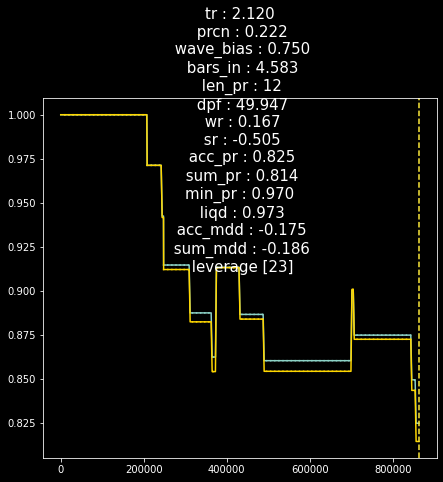

In [34]:
test_ratio = 0.0
short_pr, short_obj, short_lvrg_arr, short_fee_arr, short_tpout_arr, short_bias_arr, short_false_bias_arr, short_point1_arr, short_en_tp1, short_en_out0, \
      long_pr, long_obj, long_lvrg_arr, long_fee_arr, long_tpout_arr, long_bias_arr, long_false_bias_arr, long_point1_arr, long_en_tp1, long_en_out0 = \
get_res_v5(res_df, open_info_df, ohlc_list, config_list, np_timeidx, funcs, test_ratio=test_ratio, plot_is=1, signi=False)   # open 이 많을 수록 en_ex_pairing elapsed time : 11.58370590209961

In [ ]:
# ------ inversion ------ #
_ = get_res_v5(res_df, open_info_df, ohlc_list, config_list, np_timeidx, funcs, inversion=True, test_ratio=test_ratio, plot_is=1, signi=False)

### statistics (stem 별로 진행)

In [ ]:
selection_id = config.selection_id

short_open_i = short_obj[-1].astype(int)
long_open_i = long_obj[-1].astype(int)

short_open_tp_1 = res_df['short_tp_1_{}'.format(selection_id)].to_numpy()[short_open_i]
long_open_tp_1 = res_df['long_tp_1_{}'.format(selection_id)].to_numpy()[long_open_i]

short_open_tp_gap = res_df['short_tp_gap_{}'.format(selection_id)].to_numpy()[short_open_i]  # use open_i
long_open_tp_gap = res_df['long_tp_gap_{}'.format(selection_id)].to_numpy()[long_open_i]

short_open_epout_0 = res_df['short_epout_0_{}'.format(selection_id)].to_numpy()[short_open_i]
long_open_epout_0 = res_df['long_epout_0_{}'.format(selection_id)].to_numpy()[long_open_i]

short_open_epout_gap = res_df['short_epout_gap_{}'.format(selection_id)].to_numpy()[short_open_i]  # use open_i
long_open_epout_gap = res_df['long_epout_gap_{}'.format(selection_id)].to_numpy()[long_open_i]

# ------ pairing 된 en, ex_idx 기준으로 survey 진행 ------ #
# 0. high, low (exit_done 까지의) -> partial (tpg) 과 outg survey 목표
#   a. short -> tpg - low, outg - high
#   b. long -> tpg - high, outg - low
short_max_tpg = get_max_tpg_v2("SELL", ohlc_list, short_pr, short_obj[:4], short_open_tp_1, short_open_tp_gap)
long_max_tpg = get_max_tpg_v2("BUY", ohlc_list, long_pr, long_obj[:4], long_open_tp_1, long_open_tp_gap)
# short_max_tpg = get_max_tpg_v2("SELL", ohlc_list, short_pr, short_obj[:4], short_open_tp_1, short_open_epout_gap)
# long_max_tpg = get_max_tpg_v2("BUY", ohlc_list, long_pr, long_obj[:4], long_open_tp_1, long_open_epout_gap)

# ------ 0. tp 까지 도달하는 최소 idx 도출, en_idx 부터 ------ #
#   a. bias_info_tick 의 limit 을 정해주지 않으면 굉장히 길어질 수 있다고 봄
# short_max_outg, short_outg_open_idx = get_max_outg_v2("SELL", config, ohlc_list, short_obj, short_tpout_arr, short_open_epout_0, short_open_epout_gap)
# long_max_outg, long_outg_open_idx = get_max_outg_v2("BUY", config, ohlc_list, long_obj, long_tpout_arr, long_open_epout_0, long_open_epout_gap)
short_max_outg, short_open_idx, short_true_open_idxth = get_max_outg_v3("SELL", config, ohlc_list, short_obj, short_tpout_arr, short_open_epout_0, short_open_epout_gap)
long_max_outg, long_open_idx, long_true_open_idxth = get_max_outg_v3("BUY", config, ohlc_list, long_obj, long_tpout_arr, long_open_epout_0, long_open_epout_gap)

current_tpg= config.tr_set.tp_gap
current_outg = config.tr_set.out_gap

#### consecutive dur. value survey on bias

In [ ]:
res_df.dtypes

In [ ]:
# ------------ dependent vars. ------------ #
# res_df 에 존재하는 col 는 모두 사용가능함

# ------ 1. 도출한 outg 와 vars. pairing 진행 (by valid_idx) ------ #
devided_cols, public_cols = [], []

devided_cols.append('tr_{}'.format(selection_id))

wave_tf = 'T'
wave_period = config.tr_set.wave_period

# public_cols.append('cu_wrr_21_{}{}'.format(wave_tf, wave_period))
public_cols.append('cu_wrr_32_{}{}'.format(wave_tf, wave_period))
# public_cols.append('co_wrr_21_{}{}'.format(wave_tf, wave_period))
public_cols.append('co_wrr_32_{}{}'.format(wave_tf, wave_period))

# public_cols.append('wave_high_terms_cnt_fill_T5')
# public_cols.append('wave_low_terms_cnt_fill_T5')
# public_cols.append('wave_high_loc_pct_T5')
# public_cols.append('wave_low_loc_pct_T5')

# public_cols.append('b1_co_es_15T1')
# public_cols.append('b1_cu_es_15T1')
# public_cols.append('b1_upper_wick_ratio_15T')
# public_cols.append('b1_lower_wick_ratio_15T')

#  'co_wrr_T5', 'cu_wrr_T5', 'b1_cppr_15T', 'b1_updbr', 'b1_lwdbr', 'b1_updbr_cppr', 'b1_lwdbr_cppr' 'abs_ratio_5T', 'rel_ratio_5T', 'body_rel_ratio_5T'

# devided_cols = ['tr_{}'.format(selection_id)]  # , 'ir_5T'
# public_cols = ['wave_high_terms_cnt_fill_T5', 'wave_low_terms_cnt_fill_T5', 'wave_high_loc_pct_T5', 'wave_low_loc_pct_T5', 
#                'b1_co_es_15T1', 'b1_cu_es_15T1', 'b1_upper_wick_ratio_15T', 'b1_lower_wick_ratio_15T']

short_datas = [res_df['short_' + col].to_numpy() for col in devided_cols] + [res_df[col].to_numpy() for col in public_cols]
long_datas = [res_df['long_' + col].to_numpy() for col in devided_cols] + [res_df[col].to_numpy() for col in public_cols]

titles = devided_cols + public_cols

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


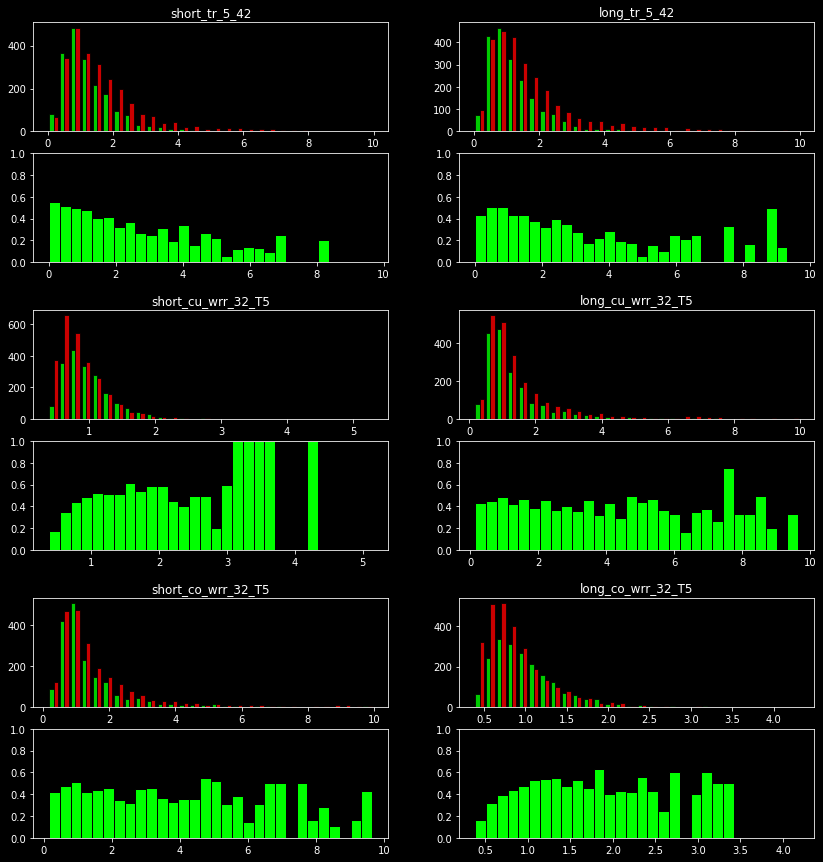

In [ ]:
plt.style.use(['dark_background', 'fast'])
fig = plt.figure(figsize=(14, len(titles) * 5))
nrows, ncols = len(short_datas), 1
gs = gridspec.GridSpec(nrows=nrows,  # row 부터 index 채우고 col 채우는 순서임 (gs_idx)
                        ncols=ncols
                        )

num_samples = 30
alpha = 0.8
xmin = 0
xmax = 10

for ings_idx, (title, short_data, long_data) in enumerate(zip(titles, short_datas, long_datas)):
  inner_gs = gs[ings_idx].subgridspec(nrows=2, ncols=2)

  short_open_data = short_data[short_open_idx]
  long_open_data = long_data[long_open_idx]

  short_true_data = short_open_data[short_bias_arr.ravel()]
  short_false_data = short_open_data[short_false_bias_arr.ravel()]
  long_true_data = long_open_data[long_bias_arr.ravel()]
  long_false_data = long_open_data[long_false_bias_arr.ravel()]
  
  short_true_valid_idx = np.ones_like(short_true_data).astype(bool)
  short_false_valid_idx = np.ones_like(short_false_data).astype(bool)
  long_true_valid_idx = np.ones_like(long_true_data).astype(bool)
  long_false_valid_idx = np.ones_like(long_false_data).astype(bool)

  short_true_valid_idx *= ~np.isinf(short_true_data)
  short_false_valid_idx *= ~np.isinf(short_false_data)
  long_true_valid_idx *= ~np.isinf(long_true_data)
  long_false_valid_idx *= ~np.isinf(long_false_data)

  try:
    short_true_valid_idx *= short_true_data > xmin
    short_false_valid_idx *= short_false_data > xmin
    long_true_valid_idx *= long_true_data > xmin
    long_false_valid_idx *= long_false_data > xmin

  except:
    pass

  try:
    short_true_valid_idx *= short_true_data < xmax
    short_false_valid_idx *= short_false_data < xmax
    long_true_valid_idx *= long_true_data < xmax
    long_false_valid_idx *= long_false_data < xmax
    
  except:
    pass
    
  plt.subplot(inner_gs[0])
  ns, bins, patches = plt.hist([short_true_data[short_true_valid_idx], short_false_data[short_false_valid_idx]], 
           bins=num_samples, alpha=alpha, color=['#00ff00', '#ff0000'], edgecolor='black')  
  plt.title('short_' + title)  

  plt.subplot(inner_gs[2])
  total_ns = np.sum(ns, axis=0)
  hist_ratio = ns[0] / total_ns
  # valid_idx = total_ns > 1
  valid_idx = np.full(len(hist_ratio), True)
  valid_hist_ratio = hist_ratio[valid_idx]
  plt.hist(bins[:-1][valid_idx], weights=valid_hist_ratio, bins=num_samples, color='#00ff00', edgecolor='black')
  plt.ylim(0, 1)
  

  plt.subplot(inner_gs[1])
  ns, bins, patches = plt.hist([long_true_data[long_true_valid_idx], long_false_data[long_false_valid_idx]], 
           bins=num_samples, alpha=alpha, color=['#00ff00', '#ff0000'], edgecolor='black')
  plt.title('long_' + title)
  
  plt.subplot(inner_gs[3])
  total_ns = np.sum(ns, axis=0)
  hist_ratio = ns[0] / total_ns
  # valid_idx = total_ns > 1
  valid_idx = np.full(len(hist_ratio), True)
  valid_hist_ratio = hist_ratio[valid_idx]
  plt.hist(bins[:-1][valid_idx], weights=valid_hist_ratio, bins=num_samples, color='#00ff00', edgecolor='black')
  plt.ylim(0, 1)

  
# plt.suptitle(title)
plt.show()

#### tpg survey for partial

52
52
52
52
pkx : [0.03997647 2.0167238  2.73054922]
pkx : [-0.03767855  0.18363707  0.58602909  0.7268663   0.88782311  1.39081314]

74
74
65
65
pkx : [-5.71029994 -5.09579043 -3.40588927 -1.25510598]
pkx : [-3.72574064 -3.42625567 -2.45292953 -1.18011842]



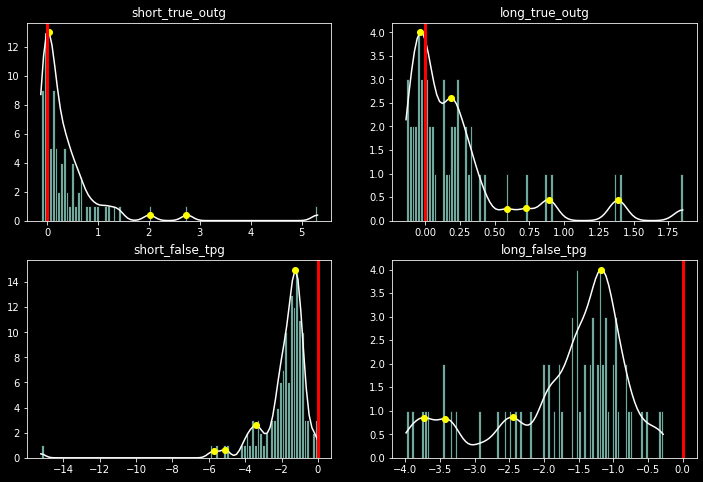

In [ ]:
# 1. outg 는 partial 을 위한 histogram 작성 진행
# 현재, outg 내부에는 tp 한것과 out 한것이 공존하는 상태
titles = ['outg', 'tpg']
short_max_datas = [short_max_outg[short_true_open_idxth], short_max_tpg]
long_max_datas = [long_max_outg[long_true_open_idxth], long_max_tpg]

# titles = ['tpg']
# short_max_datas = [short_max_tpg]
# long_max_datas = [long_max_tpg]

plt.style.use(['dark_background', 'fast'])
fig = plt.figure(figsize=(12, 8))
nrows, ncols = 2, 1
gs = gridspec.GridSpec(nrows=nrows,  # row 부터 index 채우고 col 채우는 순서임 (gs_idx)
                        ncols=ncols
                        )
  
for ings_idx, (title, short_max_data, long_max_data) in enumerate(zip(titles, short_max_datas, long_max_datas)):

  inner_gs = gs[ings_idx].subgridspec(nrows=1, ncols=2)
  if ings_idx == 0:
    axvline = current_outg
    title_add = 'true_' + title
  else:
    axvline = current_tpg
    title_add = 'false_' + title

  print(len(long_max_data))

  short_plot_idx = np.ones_like(short_max_data).astype(bool)
  long_plot_idx = np.ones_like(long_max_data).astype(bool)
  # short_plot_idx = short_max_data <= axvline
  # long_plot_idx = long_max_data <= axvline

  print(np.sum(long_plot_idx))    

  short_plot_idx *= ~np.isnan(short_max_data)
  long_plot_idx *= ~np.isnan(long_max_data)  # nan 과 inf 때문에 이 방식 채택

  print(np.sum(long_plot_idx))

  short_plot_idx *= ~np.isinf(short_max_data)
  long_plot_idx *= ~np.isinf(long_max_data)  # nan 과 inf 때문에 이 방식 채택
  
  print(np.sum(long_plot_idx))
    
  plt.subplot(inner_gs[0])
  kde_plot_v2(*np.unique(short_max_data[short_plot_idx], return_counts=True))
  plt.title('short_' + title_add)  
  plt.axvline(axvline, color='red', linewidth=3)

  plt.subplot(inner_gs[1])
  kde_plot_v2(*np.unique(long_max_data[long_plot_idx], return_counts=True))
  plt.title('long_' + title_add)
  plt.axvline(axvline, color='red', linewidth=3)

  print()

# plt.suptitle(title)
plt.show()

#### legacy

##### outg survey for precision (eploc vars. dependency)

In [ ]:
# ------------ dependent vars. ------------ #
# res_df 에 존재하는 col 는 모두 사용가능함
# ------ 1. 도출한 outg 와 vars. pairing 진행 (by valid_idx) ------ #
devided_cols = ['tr_{}'.format(strat_version)]  # , 'ir_5T'
public_cols = ['wave_body_ratio']  # 'abs_ratio_5T', 'rel_ratio_5T', 'body_rel_ratio_5T'

short_datas = [res_df['short_' + col].to_numpy() for col in devided_cols] + [res_df[col].to_numpy() for col in public_cols]
long_datas = [res_df['long_' + col].to_numpy() for col in devided_cols] + [res_df[col].to_numpy() for col in public_cols]

titles = devided_cols + public_cols

In [ ]:
plot_outg_range = (-1, 10)
plot_data_range = (-10, 100)

plt.style.use(['dark_background', 'fast'])
fig = plt.figure(figsize=(12, 18))
nrows, ncols = len(short_datas), 1
gs = gridspec.GridSpec(nrows=nrows,  # row 부터 index 채우고 col 채우는 순서임 (gs_idx)
                        ncols=ncols
                        )

for ings_idx, (title, short_data, long_data) in enumerate(zip(titles, short_datas, long_datas)):
  inner_gs = gs[ings_idx].subgridspec(nrows=1, ncols=2)

  print(len(long_max_outg))

  short_plot_idx = (plot_outg_range[0] <= short_max_outg) & (short_max_outg <= plot_outg_range[1])
  long_plot_idx = (plot_outg_range[0] <= long_max_outg) & (long_max_outg <= plot_outg_range[1])  # nan 과 inf 때문에 이 방식 채택

  print(np.sum(long_plot_idx))

  short_open_data = short_data[short_open_idx]
  long_open_data = long_data[long_open_idx]
  
  short_plot_idx *= (plot_data_range[0] <= short_open_data) * (short_open_data <= plot_data_range[1])
  long_plot_idx *= (plot_data_range[0] <= long_open_data) * (long_open_data <= plot_data_range[1]) # nan 과 inf 때문에 이 방식 채택

  short_plot_idx *= ~np.isnan(short_open_data)
  long_plot_idx *= ~np.isnan(long_open_data)  # nan 과 inf 때문에 이 방식 채택

  print(np.sum(long_plot_idx))

  short_plot_idx *= ~np.isinf(short_open_data)
  long_plot_idx *= ~np.isinf(long_open_data)  # nan 과 inf 때문에 이 방식 채택

  print(np.sum(long_plot_idx))

  short_true_idx = short_plot_idx * short_true_open_idxth
  long_true_idx = long_plot_idx * long_true_open_idxth
  
  short_false_idx = short_plot_idx * ~short_true_open_idxth
  long_false_idx = long_plot_idx * ~long_true_open_idxth

  plt.subplot(inner_gs[0])
  # ------ true_bias ------ #
  x, y = short_max_outg[short_true_idx].ravel(), short_open_data[short_true_idx].ravel()  
  plt.scatter(x, y, color='white', alpha=0.5)
  # ------ false_bias ------ #
  x, y = short_max_outg[short_false_idx].ravel(), short_open_data[short_false_idx].ravel()
  plt.scatter(x, y, color='fuchsia', alpha=0.3)
  plt.axvline(current_outg, color='red', linewidth=3)
  plt.title("{} coef : {:0.3f}".format(title, np.corrcoef(-x, y)[0, 1]))

  plt.subplot(inner_gs[1])    
  # ------ true_bias ------ #
  x, y = long_max_outg[long_true_idx].ravel(), long_open_data[long_true_idx].ravel()  
  plt.scatter(x, y, color='white', alpha=0.5)
  # ------ false_bias ------ #
  x, y = long_max_outg[long_false_idx].ravel(), long_open_data[long_false_idx].ravel()
  plt.scatter(x, y, color='fuchsia', alpha=0.3)
  plt.axvline(current_outg, color='red', linewidth=3)
  plt.title("{} coef : {:0.3f}".format(title, np.corrcoef(-x, y)[0, 1]))

  print()  

# plt.suptitle(title)
plt.show()
# print()

### significance_v3

np.sum(short_open_res == 1) : 100681
np.sum(long_open_res == 1) : 99012
np.sum(short_open_res == 1) : 17353
np.sum(long_open_res == 1) : 18310
np.sum(short_open_res == 1) : 3585
np.sum(long_open_res == 1) : 3639
np.sum(short_open_res == 1) : 3316
np.sum(long_open_res == 1) : 3399
short_tr_ >= short_tr_thresh : 0.38851 1.50000 (0.0)
cu_wrr_32_ <= config.loc_set.point.wrr_32 : 1.18911 0.38200 (0.0)
long_tr_ >= long_tr_thresh : 0.49550 1.50000 (0.0)
co_wrr_32_ <= config.loc_set.point.wrr_32 : 0.56386 0.38200 (0.0)


get_open_info_df elapsed time : 0.9807298183441162
en_ex_pairing elapsed time : 2.3126602172851562e-05


np.sum(short_open_res == 1) : 100681
np.sum(long_open_res == 1) : 99012
np.sum(short_open_res == 1) : 17353
np.sum(long_open_res == 1) : 18310
np.sum(short_open_res == 1) : 3585
np.sum(long_open_res == 1) : 3639
np.sum(short_open_res == 1) : 3316
np.sum(long_open_res == 1) : 3399
short_tr_ >= short_tr_thresh : 0.44424 1.50000 (0.0)
cu_wrr_32_ <= config.loc_set.point.wrr_32 : 1.18911 0.38200 (0.0)
long_tr_ >= long_tr_thresh : 0.56308 1.50000 (0.0)
co_wrr_32_ <= config.loc_set.point.wrr_32 : 0.56386 0.38200 (0.0)


get_open_info_df elapsed time : 0.9913737773895264
en_ex_pairing elapsed time : 2.0265579223632812e-05


np.sum(short_open_res == 1) : 100681
np.sum(long_open_res == 1) : 99012
np.sum(short_open_res == 1) : 17353
np.sum(long_open_res == 1) : 18310
np.sum(short_open_res == 1) : 3585
np.sum(long_open_res == 1) : 3639
np.sum(short_open_res == 1) : 3316
np.sum(long_open_res == 1) : 3399
short_tr_ >= short_tr_thresh : 0.50462 1.50000 (0.0)
cu_wrr_32_ <= config.loc_set.point.wrr_32 : 1.18911 0.38200 (0.0)
long_tr_ >= long_tr_thresh : 0.63705 1.50000 (0.0)
co_wrr_32_ <= config.loc_set.point.wrr_32 : 0.56386 0.38200 (0.0)


get_open_info_df elapsed time : 0.9546339511871338
en_ex_pairing elapsed time : 1.9788742065429688e-05


np.sum(short_open_res == 1) : 100681
np.sum(long_open_res == 1) : 99012
np.sum(short_open_res == 1) : 17353
np.sum(long_open_res == 1) : 18310
np.sum(short_open_res == 1) : 3585
np.sum(long_open_res == 1) : 3639
np.sum(short_open_res == 1) : 3316
np.sum(long_open_res == 1) : 3399
short_tr_ >= short_tr_thresh : 0.57027 1.50000 (0.0)
cu_wrr_32_ <= config.loc_set.point.wrr_32 : 1.18911 0.38200 (0.0)
long_tr_ >= long_tr_thresh : 0.71837 1.50000 (0.0)
co_wrr_32_ <= config.loc_set.point.wrr_32 : 0.56386 0.38200 (0.0)


get_open_info_df elapsed time : 0.9440712928771973
en_ex_pairing elapsed time : 3.314018249511719e-05


np.sum(short_open_res == 1) : 100681
np.sum(long_open_res == 1) : 99012
np.sum(short_open_res == 1) : 17353
np.sum(long_open_res == 1) : 18310
np.sum(short_open_res == 1) : 3585
np.sum(long_open_res == 1) : 3639
np.sum(short_open_res == 1) : 3316
np.sum(long_open_res == 1) : 3399
short_tr_ >= short_tr_thresh : 0.64189 1.50000 (0.0)
cu_wrr_32_ <= config.loc_set.point.wrr_32 : 1.18911 0.38200 (0.0)
long_tr_ >= long_tr_thresh : 0.80819 1.50000 (0.0)
co_wrr_32_ <= config.loc_set.point.wrr_32 : 0.56386 0.38200 (0.0)


get_open_info_df elapsed time : 0.9565095901489258
en_ex_pairing elapsed time : 3.2901763916015625e-05


np.sum(short_open_res == 1) : 100681
np.sum(long_open_res == 1) : 99012
np.sum(short_open_res == 1) : 17353
np.sum(long_open_res == 1) : 18310
np.sum(short_open_res == 1) : 3585
np.sum(long_open_res == 1) : 3639
np.sum(short_open_res == 1) : 3316
np.sum(long_open_res == 1) : 3399
short_tr_ >= short_tr_thresh : 0.72034 1.50000 (0.0)
cu_wrr_32_ <= config.loc_set.point.wrr_32 : 1.18911 0.38200 (0.0)
long_tr_ >= long_tr_thresh : 0.90793 1.50000 (0.0)
co_wrr_32_ <= config.loc_set.point.wrr_32 : 0.56386 0.38200 (0.0)


get_open_info_df elapsed time : 0.9605214595794678
en_ex_pairing elapsed time : 2.0265579223632812e-05


np.sum(short_open_res == 1) : 100681
np.sum(long_open_res == 1) : 99012
np.sum(short_open_res == 1) : 17353
np.sum(long_open_res == 1) : 18310
np.sum(short_open_res == 1) : 3585
np.sum(long_open_res == 1) : 3639
np.sum(short_open_res == 1) : 3316
np.sum(long_open_res == 1) : 3399
short_tr_ >= short_tr_thresh : 0.80666 1.50000 (0.0)
cu_wrr_32_ <= config.loc_set.point.wrr_32 : 1.18911 0.38200 (0.0)
long_tr_ >= long_tr_thresh : 1.01931 1.50000 (0.0)
co_wrr_32_ <= config.loc_set.point.wrr_32 : 0.56386 0.38200 (0.0)


get_open_info_df elapsed time : 0.9555275440216064
en_ex_pairing elapsed time : 2.0742416381835938e-05


np.sum(short_open_res == 1) : 100681
np.sum(long_open_res == 1) : 99012
np.sum(short_open_res == 1) : 17353
np.sum(long_open_res == 1) : 18310
np.sum(short_open_res == 1) : 3585
np.sum(long_open_res == 1) : 3639
np.sum(short_open_res == 1) : 3316
np.sum(long_open_res == 1) : 3399
short_tr_ >= short_tr_thresh : 0.90208 1.50000 (0.0)
cu_wrr_32_ <= config.loc_set.point.wrr_32 : 1.18911 0.38200 (0.0)
long_tr_ >= long_tr_thresh : 1.14450 1.50000 (0.0)
co_wrr_32_ <= config.loc_set.point.wrr_32 : 0.56386 0.38200 (0.0)


get_open_info_df elapsed time : 0.9757254123687744
en_ex_pairing elapsed time : 0.0003631114959716797


np.sum(short_open_res == 1) : 100681
np.sum(long_open_res == 1) : 99012
np.sum(short_open_res == 1) : 17353
np.sum(long_open_res == 1) : 18310
np.sum(short_open_res == 1) : 3585
np.sum(long_open_res == 1) : 3639
np.sum(short_open_res == 1) : 3316
np.sum(long_open_res == 1) : 3399
short_tr_ >= short_tr_thresh : 1.00813 1.50000 (0.0)
cu_wrr_32_ <= config.loc_set.point.wrr_32 : 1.18911 0.38200 (0.0)
long_tr_ >= long_tr_thresh : 1.28624 1.50000 (0.0)
co_wrr_32_ <= config.loc_set.point.wrr_32 : 0.56386 0.38200 (0.0)


get_open_info_df elapsed time : 0.9527420997619629
en_ex_pairing elapsed time : 0.03867626190185547
short_obj.shape : (6, 5)
long_obj.shape : (7, 5)
idep_plot elapsed time : 0.18383359909057617


np.sum(short_open_res == 1) : 100681
np.sum(long_open_res == 1) : 99012
np.sum(short_open_res == 1) : 17353
np.sum(long_open_res == 1) : 18310
np.sum(short_open_res == 1) : 3585
np.sum(long_open_res == 1) : 3639
np.sum(short_open_res == 1) : 3316
np.sum(long_open_res == 1) : 3399
short_tr_ >= short_tr_thresh : 1.12669 1.50000 (0.0)
cu_wrr_32_ <= config.loc_set.point.wrr_32 : 1.18911 0.38200 (0.0)
long_tr_ >= long_tr_thresh : 1.44805 1.50000 (0.0)
co_wrr_32_ <= config.loc_set.point.wrr_32 : 0.56386 0.38200 (0.0)


get_open_info_df elapsed time : 0.9894115924835205
en_ex_pairing elapsed time : 0.09476852416992188
short_obj.shape : (29, 5)
long_obj.shape : (29, 5)
idep_plot elapsed time : 0.18039441108703613


np.sum(short_open_res == 1) : 100681
np.sum(long_open_res == 1) : 99012
np.sum(short_open_res == 1) : 17353
np.sum(long_open_res == 1) : 18310
np.sum(short_open_res == 1) : 3585
np.sum(long_open_res == 1) : 3639
np.sum(short_open_res == 1) : 3316
np.sum(long_open_res == 1) : 3399
short_tr_ >= short_tr_thresh : 1.26010 1.50000 (0.0)
cu_wrr_32_ <= config.loc_set.point.wrr_32 : 1.18911 0.38200 (0.0)
long_tr_ >= long_tr_thresh : 1.63450 1.50000 (1.0)
co_wrr_32_ <= config.loc_set.point.wrr_32 : 0.56386 0.38200 (0.0)


get_open_info_df elapsed time : 0.9756312370300293
en_ex_pairing elapsed time : 0.10975503921508789
short_obj.shape : (35, 5)
long_obj.shape : (41, 5)
idep_plot elapsed time : 0.17609763145446777


np.sum(short_open_res == 1) : 100681
np.sum(long_open_res == 1) : 99012
np.sum(short_open_res == 1) : 17353
np.sum(long_open_res == 1) : 18310
np.sum(short_open_res == 1) : 3585
np.sum(long_open_res == 1) : 3639
np.sum(short_open_res == 1) : 3316
np.sum(long_open_res == 1) : 3399
short_tr_ >= short_tr_thresh : 1.41135 1.50000 (0.0)
cu_wrr_32_ <= config.loc_set.point.wrr_32 : 1.18911 0.38200 (0.0)
long_tr_ >= long_tr_thresh : 1.85171 1.50000 (1.0)
co_wrr_32_ <= config.loc_set.point.wrr_32 : 0.56386 0.38200 (0.0)


get_open_info_df elapsed time : 0.9471287727355957
en_ex_pairing elapsed time : 0.11713647842407227
short_obj.shape : (34, 5)
long_obj.shape : (39, 5)
idep_plot elapsed time : 0.17952752113342285


np.sum(short_open_res == 1) : 100681
np.sum(long_open_res == 1) : 99012
np.sum(short_open_res == 1) : 17353
np.sum(long_open_res == 1) : 18310
np.sum(short_open_res == 1) : 3585
np.sum(long_open_res == 1) : 3639
np.sum(short_open_res == 1) : 3316
np.sum(long_open_res == 1) : 3399
short_tr_ >= short_tr_thresh : 1.58427 1.50000 (1.0)
cu_wrr_32_ <= config.loc_set.point.wrr_32 : 1.18911 0.38200 (0.0)
long_tr_ >= long_tr_thresh : 2.10795 1.50000 (1.0)
co_wrr_32_ <= config.loc_set.point.wrr_32 : 0.56386 0.38200 (0.0)


get_open_info_df elapsed time : 0.9508082866668701
en_ex_pairing elapsed time : 0.10934638977050781
short_obj.shape : (27, 5)
long_obj.shape : (35, 5)
idep_plot elapsed time : 0.1864941120147705


np.sum(short_open_res == 1) : 100681
np.sum(long_open_res == 1) : 99012
np.sum(short_open_res == 1) : 17353
np.sum(long_open_res == 1) : 18310
np.sum(short_open_res == 1) : 3585
np.sum(long_open_res == 1) : 3639
np.sum(short_open_res == 1) : 3316
np.sum(long_open_res == 1) : 3399
short_tr_ >= short_tr_thresh : 1.78388 1.50000 (1.0)
cu_wrr_32_ <= config.loc_set.point.wrr_32 : 1.18911 0.38200 (0.0)
long_tr_ >= long_tr_thresh : 2.41480 1.50000 (1.0)
co_wrr_32_ <= config.loc_set.point.wrr_32 : 0.56386 0.38200 (0.0)


get_open_info_df elapsed time : 0.9507145881652832
en_ex_pairing elapsed time : 0.1045694351196289
short_obj.shape : (24, 5)
long_obj.shape : (27, 5)
idep_plot elapsed time : 0.17401957511901855


np.sum(short_open_res == 1) : 100681
np.sum(long_open_res == 1) : 99012
np.sum(short_open_res == 1) : 17353
np.sum(long_open_res == 1) : 18310
np.sum(short_open_res == 1) : 3585
np.sum(long_open_res == 1) : 3639
np.sum(short_open_res == 1) : 3316
np.sum(long_open_res == 1) : 3399
short_tr_ >= short_tr_thresh : 2.01686 1.50000 (1.0)
cu_wrr_32_ <= config.loc_set.point.wrr_32 : 1.18911 0.38200 (0.0)
long_tr_ >= long_tr_thresh : 2.78887 1.50000 (1.0)
co_wrr_32_ <= config.loc_set.point.wrr_32 : 0.56386 0.38200 (0.0)


get_open_info_df elapsed time : 0.9854590892791748
en_ex_pairing elapsed time : 0.10498929023742676
short_obj.shape : (19, 5)
long_obj.shape : (22, 5)
idep_plot elapsed time : 0.18281316757202148


np.sum(short_open_res == 1) : 100681
np.sum(long_open_res == 1) : 99012
np.sum(short_open_res == 1) : 17353
np.sum(long_open_res == 1) : 18310
np.sum(short_open_res == 1) : 3585
np.sum(long_open_res == 1) : 3639
np.sum(short_open_res == 1) : 3316
np.sum(long_open_res == 1) : 3399
short_tr_ >= short_tr_thresh : 2.29237 1.50000 (1.0)
cu_wrr_32_ <= config.loc_set.point.wrr_32 : 1.18911 0.38200 (0.0)
long_tr_ >= long_tr_thresh : 3.25498 1.50000 (1.0)
co_wrr_32_ <= config.loc_set.point.wrr_32 : 0.56386 0.38200 (0.0)


get_open_info_df elapsed time : 0.9487180709838867
en_ex_pairing elapsed time : 0.10362505912780762
short_obj.shape : (16, 5)
long_obj.shape : (21, 5)
idep_plot elapsed time : 0.18153905868530273


np.sum(short_open_res == 1) : 100681
np.sum(long_open_res == 1) : 99012
np.sum(short_open_res == 1) : 17353
np.sum(long_open_res == 1) : 18310
np.sum(short_open_res == 1) : 3585
np.sum(long_open_res == 1) : 3639
np.sum(short_open_res == 1) : 3316
np.sum(long_open_res == 1) : 3399
short_tr_ >= short_tr_thresh : 2.62320 1.50000 (1.0)
cu_wrr_32_ <= config.loc_set.point.wrr_32 : 1.18911 0.38200 (0.0)
long_tr_ >= long_tr_thresh : 3.85188 1.50000 (1.0)
co_wrr_32_ <= config.loc_set.point.wrr_32 : 0.56386 0.38200 (0.0)


get_open_info_df elapsed time : 0.9677538871765137
en_ex_pairing elapsed time : 0.10491585731506348
short_obj.shape : (13, 5)
long_obj.shape : (18, 5)
idep_plot elapsed time : 0.17593693733215332


np.sum(short_open_res == 1) : 100681
np.sum(long_open_res == 1) : 99012
np.sum(short_open_res == 1) : 17353
np.sum(long_open_res == 1) : 18310
np.sum(short_open_res == 1) : 3585
np.sum(long_open_res == 1) : 3639
np.sum(short_open_res == 1) : 3316
np.sum(long_open_res == 1) : 3399
short_tr_ >= short_tr_thresh : 3.02788 1.50000 (1.0)
cu_wrr_32_ <= config.loc_set.point.wrr_32 : 1.18911 0.38200 (0.0)
long_tr_ >= long_tr_thresh : 4.64358 1.50000 (1.0)
co_wrr_32_ <= config.loc_set.point.wrr_32 : 0.56386 0.38200 (0.0)


get_open_info_df elapsed time : 0.9419829845428467
en_ex_pairing elapsed time : 0.09939146041870117
short_obj.shape : (10, 5)
long_obj.shape : (17, 5)
idep_plot elapsed time : 0.17580723762512207


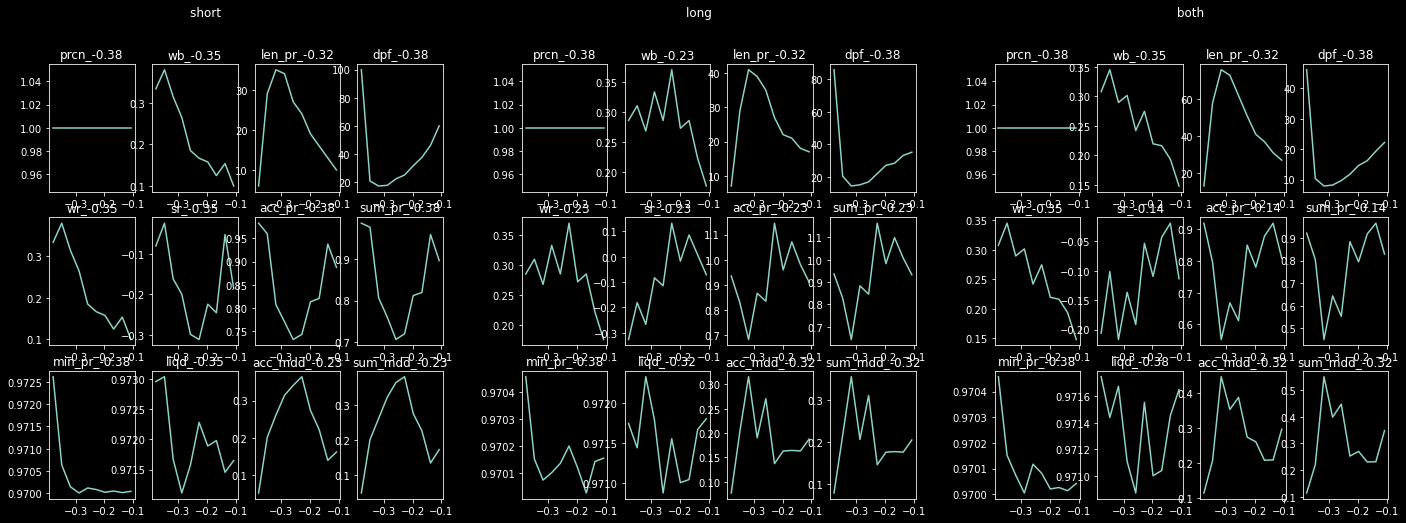

In [ ]:
# from google.colab import output
# ------------ survey param ------------ #
# itv_num_list = [1, 3, 5, 15]
# itv_list = ['15m', '30m', '1h', '4h']
# itv_list = ['3m', '5m', '15m', '30m', '1h', '4h']
# val_list = np.arange(-0.5, -0.9, -0.1)     # prcn 1
val_list = np.arange(-0.618, -0.1, 0.03)  # prcn 2
# val_list = np.arange(-0.5, -0.6, -0.005)    # prcn 3
# val_list = np.arange(0.944, 0.945, 0.0001)    # prcn 4
# val_list = np.arange(70, 80, 1)   # prcn -1
# val_list = np.arange(200, 180, -5)   # prcn -2
# val_list = talib.get_function_groups()['Pattern Recognition']

# ------------ get survey_res ------------ #
result = []
res_shape = (3, 12)  # short, long, both x data
config_list_copy = copy.deepcopy(config_list)
for set_val in val_list:
  # ------------ open 결정 이전의 인자값 ------------ #
  # ------ point * dur. ------ #
  # config_list_copy[0].loc_set.point.candle_pattern = set_val
  # config_list_copy[0].loc_set.zone.degree_list = set_val
  # config_list_copy[0].loc_set.point2.wick_score_list = str([set_val])
  # config_list_copy[0].loc_set.zone.ir = set_val  
  # config_list_copy[0].loc_set.zone.abs_ratio = set_val  

  # ------------ open 결정 이후의 인자값 ------------ #
  # ------ utils ------ #
  # config_list_copy[0].tr_set.tp_gap = set_val  
  config_list_copy[0].tr_set.ep_gap = set_val 
  # config_list_copy[0].tr_set.out_gap = set_val  

  # config_list_copy[0].tr_set.tp_gap = abs(set_val) - 0.5
  # config_list_copy[0].tr_set.out_gap = set_val + 0.5
  # config_list_copy[0].tr_set.wb_tp_gap = config_list_copy[0].tr_set.tp_gap
  # config_list_copy[0].tr_set.wb_out_gap = config_list_copy[0].tr_set.out_gap

  # ------ entry, exit (ep, tp, out vars.) ------ #
  # config_list_copy[0].tr_set.ei_k = set_val
  # config_list_copy[0].ep_set.expire_tick = set_val  
 
  for utils_, config_ in zip(utils_list, config_list_copy):
    # enlist_rtc(res_df, config_, np_timeidx)
    enlist_tr(res_df, config_, np_timeidx)
  open_info_df = get_open_info_df(ep_loc_v3, res_df, np_timeidx, ID_list, config_list_copy, id_idx_list)   # point * mr_res 이기 때문에 utils_tr & rtc 의 영향을 충분히 받음

  try:
    result.append(get_res_v5(res_df, open_info_df, ohlc_list, config_list_copy, np_timeidx, funcs, test_ratio=test_ratio, plot_is=1, signi=True))    
  except:
    result.append(np.full(res_shape, np.nan))
    # pass

survey_res_list = [np.array(result)[:, s_i::3] for s_i in range(3)]   # 3 for s, l, b
# short_res, long_res, both_res = survey_res_list

# ------------ plot survey_res ------------ #
title_list = ["short", "long", "both"]
sub_title_list = ['prcn', 'wb', 'len_pr', 'dpf', 'wr', 'sr', 'acc_pr', 'sum_pr', 'min_pr', 'liqd', 'acc_mdd', 'sum_mdd']
space_ = " " * 120

fig = plt.figure(figsize=(24, 8))
plt.style.use('dark_background')
gs = gridspec.GridSpec(nrows=1,
                        ncols=3,
                        # height_ratios=[1, 1, 1]
                      )
# nrows, ncols, h_r = 3, 3, [1, 1, 1]
nrows, ncols, h_r = 3, 4, [1, 1, 1]
# nrows, ncols, h_r = 4, 3, [1, 1, 1, 1]
# if d_idx == 0:
# else:
  # nrows, ncols, h_r = 2, 2, [1, 1]

for d_idx, (title_name, survey_res) in enumerate(zip(title_list, survey_res_list)):  
  inner_gs = gs[d_idx].subgridspec(nrows=nrows,
                        ncols=ncols,
                        height_ratios=h_r
                      )
  for in_idx, (data_, sub_title) in enumerate(zip(survey_res.T, sub_title_list)):
    plt.subplot(inner_gs[in_idx])
    data = data_.ravel()
    valid_idx = ~np.isnan(data)
    if np.sum(valid_idx) > 0:
      if type(val_list[0]) == str:
        x, y = np.arange(len(val_list))[valid_idx], data[valid_idx]
      else:
        x, y = val_list[valid_idx], data[valid_idx]
      plt.plot(x, y)  # 앞에서부터 len(result) 만큼만    
      plt.title(sub_title + '_{:.2f}'.format(x[np.argmax(y)]))
    else:
      plt.title(sub_title)

plt.suptitle(space_.join(title_list))
plt.show()
# print("\n")

In [ ]:

# ------------ plot survey_res ------------ #
title_list = ["short", "long", "both"]
sub_title_list = ['prcn', 'wb', 'len_pr', 'dpf', 'wr', 'sr', 'acc_pr', 'sum_pr', 'min_pr', 'liqd', 'acc_mdd', 'sum_mdd']
space_ = " " * 120

fig = plt.figure(figsize=(24, 8))
plt.style.use('dark_background')
gs = gridspec.GridSpec(nrows=1,
                        ncols=3,
                        # height_ratios=[1, 1, 1]
                      )
# nrows, ncols, h_r = 3, 3, [1, 1, 1]
nrows, ncols, h_r = 3, 4, [1, 1, 1]
# nrows, ncols, h_r = 4, 3, [1, 1, 1, 1]
# if d_idx == 0:
# else:
  # nrows, ncols, h_r = 2, 2, [1, 1]

for d_idx, (title_name, survey_res) in enumerate(zip(title_list, survey_res_list)):  
  inner_gs = gs[d_idx].subgridspec(nrows=nrows,
                        ncols=ncols,
                        height_ratios=h_r
                      )
  for in_idx, (data_, sub_title) in enumerate(zip(survey_res.T, sub_title_list)):
    plt.subplot(inner_gs[in_idx])
    data = data_.ravel()
    valid_idx = ~np.isnan(data)
    if np.sum(valid_idx) > 0:
      if type(val_list[0]) == str:
        x, y = np.arange(len(val_list))[valid_idx], data[valid_idx]
      else:
        x, y = val_list[valid_idx], data[valid_idx]
      plt.plot(x, y)  # 앞에서부터 len(result) 만큼만    
      plt.title(sub_title + '_{:.2f}'.format(x[np.argmax(y)]))
    else:
      plt.title(sub_title)

plt.suptitle(space_.join(title_list))
plt.show()

### backtrader validation

In [ ]:
# ------ open validation ------ #
long_open_ = res_df['long_open_{}'.format(config.selection_id)].to_numpy()
long_open_ts = list(map(lambda x : str(x), res_df.index[long_open_ == 1]))  

In [ ]:
long_index = open_info_df.side == 'BUY'

for ts in res_df.index[open_info_df.index[long_index]]:
  print(ts)

In [ ]:
trade_log_name = "ETHUSDT_1650120909.pkl"
trade_log_dir_path = "./trade_log/0405_wave_trader_realterm"

with open(os.path.join(trade_log_dir_path, trade_log_name), 'rb') as f:
  trade_log = pickle.load(f)

In [ ]:
trade_log

In [ ]:
# 1. ts 에 pair 된 en_p, ex_p 만 비교하면 될 것
#   -> open_idx, en_idx, ex_idx 조회하면 될 것

pos_side = "BUY" # SELL BUY
val_obj = short_obj if pos_side == "SELL" else long_obj

# ------ get idep trade_info ------ #
en_ts = list(map(lambda x : str(x), res_df.index[val_obj[2].astype(int).ravel()])) 
ex_ts = list(map(lambda x : str(x), res_df.index[val_obj[3].astype(int).ravel()])) 
en_p = val_obj[0].ravel()
ex_p = val_obj[1].ravel()

# ------ execute ts comparison ------ #
logged_en_ts = [k for k, v in trade_log.items() if 'entry' in v if pos_side in v]

lacked_ts = [ts for ts in en_ts if not ts in logged_en_ts]   # trade_log 에 없는 거래
added_ts = [ts for ts in logged_en_ts if not ts in en_ts]    # trade_log 에만 있는 거래

print(lacked_ts)
print(added_ts)

In [ ]:
# ------ check added_ts ------ #
keys = list(trade_log.keys())

for k_i in range(len(keys)):
  if keys[k_i] in added_ts:
    # print(trade_log[keys[k_i]])
    # print(trade_log[keys[k_i + 1]])
    print(keys[k_i], trade_log[keys[k_i]])
    print(keys[k_i + 1], trade_log[keys[k_i + 1]])

In [ ]:
# ------ price sync_check ------ #
accept_price_gap = 0.1
for i in range(len(en_ts)):
  try:
    print(en_ts[i], trade_log[en_ts[i]][0] - en_p[i])
    # print(trade_log[str(ex_ts[i])])
    # print(ex_ts[i], trade_log[ex_ts[i]][0] - ex_p[i])
    print(ex_ts[i])
    print()

  except Exception as e:
    print(e)


### legacy

#### main_functions

In [ ]:
def get_open_info_df(ep_loc_v2, res_df, np_timeidx, ID_list, config_list, id_idx_list):
  start_0 = time.time()
  # ------ get mr_res, zone_arr ------ #
  short_mr_res_obj = np.array([ep_loc_v2(res_df, config_, np_timeidx, show_detail=True, ep_loc_side=OrderSide.SELL) for config_ in config_list])
  long_mr_res_obj = np.array([ep_loc_v2(res_df, config_, np_timeidx, show_detail=True, ep_loc_side=OrderSide.BUY) for config_ in config_list])
  short_open_idx_list = [np.where(res_df['short_open_{}'.format(id)].to_numpy() * mr_res)[0] for id, mr_res in zip(ID_list, short_mr_res_obj[:, 0].astype(np.float64))]   # "point * mr_Res"
  long_open_idx_list = [np.where(res_df['long_open_{}'.format(id)].to_numpy() * mr_res)[0] for id, mr_res in zip(ID_list, long_mr_res_obj[:, 0].astype(np.float64))]  # zip 으로 zone (str) 과 묶어서 dtype 변경됨

  # ------ open_info_arr ------ #
  short_side_list = [np.full(len(list_), OrderSide.SELL) for list_ in short_open_idx_list]
  long_side_list = [np.full(len(list_), OrderSide.BUY) for list_ in long_open_idx_list]

  short_zone_list = [zone_res[short_open_idx] for zone_res, short_open_idx in zip(short_mr_res_obj[:, 1], short_open_idx_list)]
  long_zone_list = [zone_res[long_open_idx] for zone_res, long_open_idx in zip(long_mr_res_obj[:, 1], long_open_idx_list)]

  short_id_list = [np.full(len(list_), id) for id, list_ in zip(ID_list, short_open_idx_list)]
  long_id_list = [np.full(len(list_), id) for id, list_ in zip(ID_list, long_open_idx_list)]

  selected_id_idx = np.arange(len(id_idx_list))
  short_id_idx_list = [np.full(len(list_), id) for id, list_ in zip(selected_id_idx, short_open_idx_list)]
  long_id_idx_list = [np.full(len(list_), id) for id, list_ in zip(selected_id_idx, long_open_idx_list)]

  # ------ get open_info_df ------ #
  #   series 만들어서 short / long 끼리 합치고 둘이 합치고, 중복은 우선 순위 정해서 제거
  short_open_df_list = [pd.DataFrame(index=index_, data=np.vstack((data_)).T, columns=['side', 'zone', 'id', 'id_idx']) for index_, data_ in zip(short_open_idx_list, zip(short_side_list, short_zone_list, short_id_list, short_id_idx_list))]
  long_open_df_list = [pd.DataFrame(index=index_, data=np.vstack((data_)).T, columns=['side', 'zone', 'id', 'id_idx']) for index_, data_ in zip(long_open_idx_list, zip(long_side_list, long_zone_list, long_id_list, long_id_idx_list))]

  open_info_df = pd.concat(short_open_df_list + long_open_df_list)
  # ------ sorting + unique ------ #
  open_info_df.sort_index(inplace=True)
  # print(len(open_info_df))
  # print(len(open_info_df))
  # open_info_df.head()
  print("get_open_info_df elapsed time :", time.time() - start_0)
  return open_info_df[~open_info_df.index.duplicated(keep='first')]  # 먼저 순서를 우선으로 지정  

In [ ]:
def get_res_v5(res_df, open_info_df, ohlc_list, config_list, np_timeidx, funcs, inversion=False, test_ratio=0.3, plot_is=True, signi=False):
  # ------------ make open_info_list ------------ #
  open_idx = open_info_df.index.to_numpy()
  len_df = len(res_df)
  s_idx = (open_idx < int(len_df * (1 - test_ratio))) == plot_is
  s_open_info_df = open_info_df[s_idx]
  s_open_idx = open_idx[s_idx]

  open_info_list = [s_open_info_df[col_].to_numpy() for col_ in s_open_info_df.columns]
  side_arr, zone_arr, id_arr, id_idx_arr = open_info_list

  # ------------ get paired_res ------------ #
  start_0 = time.time()
  paired_res = en_ex_pairing_v5(res_df, s_open_idx, open_info_list, ohlc_list, config_list, np_timeidx, funcs)
  # valid_openi_arr, pair_idx_arr, pair_price_arr, lvrg_arr, fee_arr, tpout_arr = paired_res
  print("en_ex_pairing elapsed time :", time.time() - start_0)  #  0.37 --> 0.3660471439361572 --> 0.21(lesser if)

  # ------------ idep_plot ------------ #
  start_0 = time.time()
  high, low = ohlc_list[1:3]
  res = idep_plot_v13(res_df, len_df, config_list[0], high, low, s_open_idx, side_arr, paired_res, inversion=inversion, sample_ratio=1 - test_ratio, signi=signi)
  print("idep_plot elapsed time :", time.time() - start_0)   # 1.40452 (v6) 1.4311 (v5)

  return res

In [ ]:
def plot_info_v6(gs, gs_idx, sample_len, tr, prcn, rc, bars_in, pr, total_pr, cum_pr, liqd, leverage, title_position, fontsize):
  try:
    plt.subplot(gs[gs_idx])
    idep_res_obj = get_res_info_nb_v2(sample_len, pr, total_pr, cum_pr, liqd)
    plt.plot(cum_pr)
    plt.plot(idep_res_obj[-1], color='gold')
    if sample_len is not None:
      plt.axvline(sample_len, alpha=1., linestyle='--', color='#ffeb3b')
    # title_str = "prcn : {:.3f} rc : {:.3f}\n len_pr : {} dpf : {:.3f}\n wr : {:.3f} sr : {:.3f}\n acc_pr : {:.3f} sum_pr : {:.3f}\n" +\
    #           "min_pr : {:.3f} liqd : {:.3f}\n acc_mdd : -{:.3f} sum_mdd : -{:.3f}\n leverage {}"
    # title_str = "tr : {:.3f}\n prcn : {:.3f}\n rc : {:.3f}\n len_pr : {}\n dpf : {:.3f}\n wr : {:.3f}\n sr : {:.3f}\n acc_pr : {:.3f}\n sum_pr : {:.3f}\n" +\
    #           "min_pr : {:.3f}\n liqd : {:.3f}\n acc_mdd : -{:.3f}\n sum_mdd : -{:.3f}\n leverage {}"
    title_str = "tr : {:.3f}\n prcn : {:.3f}\n wave_bias : {:.3f}\n bars_in : {:.3f}\n len_pr : {}\n dpf : {:.3f}\n wr : {:.3f}\n sr : {:.3f}\n acc_pr : {:.3f}\n sum_pr : {:.3f}\n" +\
              "min_pr : {:.3f}\n liqd : {:.3f}\n acc_mdd : -{:.3f}\n sum_mdd : -{:.3f}\n leverage {}"
    plt.title(title_str.format(tr, prcn, rc, bars_in, *idep_res_obj[:-1], leverage), position=title_position, fontsize=fontsize)
  except Exception as e:
    print("error in plot_info :", e)

  return gs_idx + 1

In [ ]:
def ffill_line(line_, idx_):
  len_line = len(line_)
  total_en_idx = np.zeros(len_line)
  total_en_idx[idx_] = 1
  idx_line_ = np.where(total_en_idx, line_, np.nan)
  idx_line = pd.Series(idx_line_).ffill().to_numpy()

  return idx_line

def get_wave_bias_v2(res_df, config, high, low, len_df, short_obj, long_obj):
  
  short_op_idx = short_obj[-1].astype(int)
  short_en_idx = short_obj[2].astype(int)
  short_en_tp1 = ffill_line(res_df['short_wave_1_{}'.format(config.selection_id)].to_numpy(), short_op_idx)   # en_idx 에 sync 된 open_idx 를 사용해야함
  short_en_out0 = ffill_line(res_df['short_wave_0_{}'.format(config.selection_id)].to_numpy(), short_op_idx)

  long_op_idx = long_obj[-1].astype(int)
  long_en_idx = long_obj[2].astype(int)
  long_en_tp1 = ffill_line(res_df['long_wave_1_{}'.format(config.selection_id)].to_numpy(), long_op_idx)
  long_en_out0 = ffill_line(res_df['long_wave_0_{}'.format(config.selection_id)].to_numpy(), long_op_idx)

  bias_info_tick = config.tr_set.bias_info_tick

  # 1. min 에 초점을 맞추는 거니까, touch 없을시 len_df 로 설정
  # 2. future_data 사용이니까, shift(-bias_info_tick) 설정
  # 3. entry 다음 idx 부터 -> tp & out 체결 logic 이 현재 entry_idx 부터 되어있어서 취소
  len_df_range = np.arange(len_df)
  last_idx = len_df - 1
  shift_range = bias_info_tick - 1  # entry_idx 까지 포함해서 wave_bias check
  short_en_tp1_touch_idx = pd.Series(np.where(low <= short_en_tp1, len_df_range, last_idx)).rolling(bias_info_tick, min_periods=1).min().shift(-shift_range).to_numpy()[short_en_idx]  
  short_en_out0_touch_idx = pd.Series(np.where(high >= short_en_out0, len_df_range, last_idx)).rolling(bias_info_tick, min_periods=1).min().shift(-shift_range).to_numpy()[short_en_idx]

  long_en_tp1_touch_idx = pd.Series(np.where(high >= long_en_tp1, len_df_range, last_idx)).rolling(bias_info_tick, min_periods=1).min().shift(-shift_range).to_numpy()[long_en_idx]
  long_en_out0_touch_idx = pd.Series(np.where(low <= long_en_out0, len_df_range, last_idx)).rolling(bias_info_tick, min_periods=1).min().shift(-shift_range).to_numpy()[long_en_idx]

  short_true_bias_idx = short_en_tp1_touch_idx < short_en_out0_touch_idx  # true_bias 의 조건
  long_true_bias_idx = long_en_tp1_touch_idx < long_en_out0_touch_idx

  short_false_bias_idx = short_en_tp1_touch_idx >= short_en_out0_touch_idx  # false_bias 의 조건
  long_false_bias_idx = long_en_tp1_touch_idx >= long_en_out0_touch_idx

  # return short_true_bias_idx.ravel(), short_false_bias_idx.ravel(), long_true_bias_idx.ravel(), long_false_bias_idx.ravel()
  return short_true_bias_idx, short_false_bias_idx, long_true_bias_idx, long_false_bias_idx, short_en_tp1[short_en_idx], short_en_out0[short_en_idx], long_en_tp1[long_en_idx], long_en_out0[long_en_idx]

  
def wave_bias(true_idx, false_idx):  # 정확하게 하려고, true & false 로 기준함
    true_sum = np.sum(true_idx)
    false_sum = np.sum(false_idx)
    return true_sum / (true_sum + false_sum)

In [ ]:
def get_pr_v4(open_side, h, l, obj, tpout, lvrg, fee, p_ranges, p_qty_ratio, inversion=False):  # --> 여기서 사용하는 ex_p = ex_p

    en_p = obj[0]
    # ex_p = obj[1]
    tp, out = np.split(tpout, 2, axis=1)
    len_p = len(p_ranges)
    en_ps, tps, outs, lvrgs, fees = [np.tile(arr_, (1, len_p)) for arr_ in [en_p, tp, out, lvrg, fee]]

    np_obj = np.array(obj).T[0]
    assert len(np_obj.shape) == 2

    # iin == iout 인 경우 분리
    en_idx = np_obj[:, 2]
    ex_idx = np_obj[:, 3]
    equal_idx = en_idx == ex_idx

    min_low = np.full_like(en_p, np.nan)
    min_low[~equal_idx] = np.array([np.min(l[int(iin + 1):int(iout + 1)]) for _, _, iin, iout in np_obj[~equal_idx, :4]]).reshape(-1, 1)  # start from iin + 1 (tp 체결을 entry_idx 부터 보지 않음)
    max_high = np.full_like(en_p, np.nan)
    max_high[~equal_idx] = np.array([np.max(h[int(iin + 1):int(iout + 1)]) for _, _, iin, iout in np_obj[~equal_idx, :4]]).reshape(-1, 1)

    if open_side == "SELL":
        p_tps = en_ps - (en_ps - tps) * p_ranges
        # min_low = np.full_like(en_p, np.nan)
        # min_low[~equal_idx] = np.array([np.min(l[int(iin + 1):int(iout + 1)]) for _, _, iin, iout in np_obj[~equal_idx, :4]]).reshape(-1, 1)  # start from iin + 1 (tp 체결을 entry_idx 부터 보지 않음)
        tp_idx = (np.tile(min_low, (1, len_p)) <= p_tps) * (np.tile(max_high, (1, len_p)) <= outs)  # entry_idx 포함해서 out touch 금지 (보수적 검증)
    else:
        p_tps = en_ps + (tps - en_ps) * p_ranges
        # max_high = np.full_like(en_p, np.nan)
        # max_high[~equal_idx] = np.array([np.max(h[int(iin + 1):int(iout + 1)]) for _, _, iin, iout in np_obj[~equal_idx, :4]]).reshape(-1, 1)
        tp_idx = (np.tile(max_high, (1, len_p)) >= p_tps) * (np.tile(min_low, (1, len_p)) >= outs)

    ex_ps = outs.copy()
    ex_ps[tp_idx] = p_tps[tp_idx]

    if open_side == "SELL":
        if not inversion:
            pr = ((en_ps / ex_ps - fees - 1) * lvrgs * p_qty_ratio).sum(axis=1) + 1
            # ------ liquidation ------ #
            max_high = np.full_like(en_p, np.nan)
            max_high[~equal_idx] = np.array([np.max(h[int(iin):int(iout)]) for _, _, iin, iout in np_obj[~equal_idx, :4]]).reshape(-1, 1)
            liqd = np.nanmin((en_p / max_high - fee - 1) * lvrg + 1)
        else:
            pr = ((ex_ps / en_ps - fees - 1) * lvrgs * p_qty_ratio).sum(axis=1) + 1
            # ------ liquidation ------ #
            min_low = np.full_like(en_p, np.nan)
            min_low[~equal_idx] = np.array([np.min(l[int(iin):int(iout)]) for _, _, iin, iout in np_obj[~equal_idx, :4]]).reshape(-1, 1)
            liqd = np.nanmin((min_low / en_p - fee - 1) * lvrg + 1)
    else:
        if not inversion:
            pr = ((ex_ps / en_ps - fees - 1) * lvrgs * p_qty_ratio).sum(axis=1) + 1
            # ------ liquidation ------ #
            min_low = np.full_like(en_p, np.nan)
            min_low[~equal_idx] = np.array([np.min(l[int(iin):int(iout)]) for _, _, iin, iout in np_obj[~equal_idx, :4]]).reshape(-1, 1)
            liqd = np.nanmin((min_low / en_p - fee - 1) * lvrg + 1)
        else:
            pr = ((en_ps / ex_ps - fees - 1) * lvrgs * p_qty_ratio).sum(axis=1) + 1
            # ------ liquidation ------ #
            max_high = np.full_like(en_p, np.nan)
            max_high[~equal_idx] = np.array([np.max(h[int(iin):int(iout)]) for _, _, iin, iout in np_obj[~equal_idx, :4]]).reshape(-1, 1)
            liqd = np.nanmin((en_p / max_high - fee - 1) * lvrg + 1)

    return pr.reshape(-1, 1), liqd

In [ ]:
def idep_plot_v13(res_df, len_df, config, high, low, open_idx, side_arr, paired_res, inversion=False, sample_ratio=0.7, title_position=(0.5, 0.5), fontsize=15, signi=False):
    if not signi:
        plt.style.use(['dark_background', 'fast'])
        fig = plt.figure(figsize=(24, 8))
        gs = gridspec.GridSpec(nrows=2,  # row 몇 개
                               ncols=3,  # col 몇 개
                               height_ratios=[10, 1]
                               # height_ratios=[10, 10, 1]
                               )
    gs_idx = 0
    # plt.suptitle(key)
    
    p_ranges, p_qty_ratio = literal_eval(config.tp_set.p_ranges), literal_eval(config.tp_set.p_qty_ratio)
    assert np.sum(p_qty_ratio) == 1.0
    assert len(p_ranges) == len(p_qty_ratio)

    if sample_ratio is not None:
      sample_len = int(len_df * sample_ratio)
    else:
      sample_len = len_df

    # ------ short & long data preparation ------ #
    # start_0 = time.time()
    point1_arr, valid_openi_arr, pair_idx_arr, pair_price_arr, lvrg_arr, fee_arr, tpout_arr, tr_arr = paired_res    
    assert len(valid_openi_arr) != 0, "assert len(valid_openi_arr) != 0"    
    short_valid_openi_idx = np.where(side_arr[valid_openi_arr] == OrderSide.SELL)[0]  # valid_openi_arr 에 대한 idx, # side_arr,
    long_valid_openi_idx = np.where(side_arr[valid_openi_arr] == OrderSide.BUY)[0]

    valid_open_idx = open_idx[valid_openi_arr].reshape(-1, 1)

    short_obj = np.hstack((pair_price_arr, pair_idx_arr, valid_open_idx))[short_valid_openi_idx]
    long_obj = np.hstack((pair_price_arr, pair_idx_arr, valid_open_idx))[long_valid_openi_idx]
    both_obj = np.vstack((short_obj, long_obj))
    print("short_obj.shape :", short_obj.shape)
    print("long_obj.shape :", long_obj.shape)

    short_obj, long_obj, both_obj = [np.split(obj_, 5, axis=1) for obj_ in [short_obj, long_obj, both_obj]]

    short_point1_arr, long_point1_arr = [point1_arr[openi_idx_].reshape(-1, 1) for openi_idx_ in [short_valid_openi_idx, long_valid_openi_idx]]
    short_lvrg_arr, long_lvrg_arr = [lvrg_arr[openi_idx_].reshape(-1, 1) for openi_idx_ in [short_valid_openi_idx, long_valid_openi_idx]]
    short_fee_arr, long_fee_arr = [fee_arr[openi_idx_].reshape(-1, 1) for openi_idx_ in [short_valid_openi_idx, long_valid_openi_idx]]
    short_tpout_arr, long_tpout_arr = [tpout_arr[openi_idx_] for openi_idx_ in [short_valid_openi_idx, long_valid_openi_idx]]
    # short_bias_arr, long_bias_arr = [bias_arr[openi_idx_] for openi_idx_ in [short_valid_openi_idx, long_valid_openi_idx]]
    short_tr_arr, long_tr_arr = [tr_arr[openi_idx_] for openi_idx_ in [short_valid_openi_idx, long_valid_openi_idx]]
    # print("long_bias_arr.shape :", long_bias_arr.shape)    
    # print("elapsed time :", time.time() - start_0)

    short_true_bias_idx, short_false_bias_idx, long_true_bias_idx, long_false_bias_idx, short_en_tp1, short_en_out0, long_en_tp1, long_en_out0 = \
    get_wave_bias_v2(res_df, config, high, low, len_df, short_obj, long_obj)

    len_short, len_long = len(short_valid_openi_idx), len(long_valid_openi_idx)

    # ------ plot_data ------ #
    try:
      # start_0 = time.time()      
      if len_short == 0:
        short_pr = []
        gs_idx += 1
      else:
        short_tr = short_tr_arr.mean()
        short_pr, short_liqd = get_pr_v4(OrderSide.SELL, high, low, short_obj, short_tpout_arr, short_lvrg_arr, short_fee_arr, p_ranges, p_qty_ratio, inversion)
        short_total_pr = to_total_pr(len_df, short_pr, short_obj[-2])
        short_cum_pr = np.cumprod(short_total_pr)
        # short_liqd = liquidation_v2(OrderSide.SELL, h, short_obj[:4], short_lvrg_arr, short_fee_arr)
        short_prcn, short_rc = precision(short_pr, short_true_bias_idx), wave_bias(short_true_bias_idx, short_false_bias_idx)
        short_trade_ticks = np.mean(short_obj[-2] - short_obj[-1])
        if signi:
          short_idep_res_obj = (short_prcn, short_rc) + get_res_info_nb_v2(sample_len, short_pr, short_total_pr, short_cum_pr, short_liqd)
        else:
          gs_idx = plot_info_v6(gs, gs_idx, sample_len, short_tr, short_prcn, short_rc, short_trade_ticks, short_pr, short_total_pr, short_cum_pr, short_liqd, short_lvrg_arr[-1], title_position, fontsize)
      # print("elapsed time :", time.time() - start_0)

    except Exception as e:
      gs_idx += 1
      print("error in short plot_data :", e)

    try:
      # start_0 = time.time()   
      if len_long == 0:
        long_pr = []
        gs_idx += 1
      else:
        long_tr = long_tr_arr.mean()
        long_pr, long_liqd = get_pr_v4(OrderSide.BUY, high, low, long_obj, long_tpout_arr, long_lvrg_arr, long_fee_arr, p_ranges, p_qty_ratio, inversion)
        long_total_pr = to_total_pr(len_df, long_pr, long_obj[-2])
        long_cum_pr = np.cumprod(long_total_pr)
        # long_liqd = liquidation_v2(OrderSide.BUY, l, long_obj[:4], long_lvrg_arr, long_fee_arr)
        long_prcn, long_rc = precision(long_pr, long_true_bias_idx), wave_bias(long_true_bias_idx, long_false_bias_idx)
        long_trade_ticks = np.mean(long_obj[-2] - long_obj[-1])
        if signi:
          long_idep_res_obj = (long_prcn, long_rc) + get_res_info_nb_v2(sample_len, long_pr, long_total_pr, long_cum_pr, long_liqd)
        else:
          gs_idx = plot_info_v6(gs, gs_idx, sample_len, long_tr, long_prcn, long_rc, long_trade_ticks, long_pr, long_total_pr, long_cum_pr, long_liqd, long_lvrg_arr[-1], title_position, fontsize)
      # print("elapsed time :", time.time() - start_0)
    except Exception as e:
      gs_idx += 1
      print("error in long plot_data :", e)

    
    try:
      # start_0 = time.time()
      if len_short * len_long == 0:
        both_pr = []
        gs_idx += 1
      else:
        both_tr = (short_tr + long_tr) / 2
        both_pr = np.vstack((short_pr, long_pr))  # for 2d arr, obj 를 1d 로 만들지 않는 이상, pr 은 2d 유지될 것
        both_total_pr = to_total_pr(len_df, both_pr, both_obj[-2])
        both_cum_pr = np.cumprod(both_total_pr)
        both_liqd = min(short_liqd, long_liqd)
        both_true_bias_idx = np.vstack((short_true_bias_idx, long_true_bias_idx))  # vstack for 2d arr
        both_false_bias_idx = np.vstack((short_false_bias_idx, long_false_bias_idx))
        both_prcn, both_rc = precision(both_pr, both_true_bias_idx), wave_bias(both_true_bias_idx, both_false_bias_idx)
        both_trade_ticks = np.mean(both_obj[-2] - both_obj[-1])
        if signi:
          both_idep_res_obj = (both_prcn, both_rc) + get_res_info_nb_v2(sample_len, both_pr, both_total_pr, both_cum_pr, both_liqd)
        else:
          gs_idx = plot_info_v6(gs, gs_idx, sample_len, both_tr, both_prcn, both_rc, both_trade_ticks, both_pr, both_total_pr, both_cum_pr, both_liqd, lvrg_arr[-1], title_position, fontsize)
      # print("elapsed time :", time.time() - start_0)
    except Exception as e:
      gs_idx += 1
      print("error in both plot_data :", e)

    if not signi:
      if len_short * len_long > 0:
        for obj, cum_pr in zip([short_obj, long_obj, both_obj], [short_cum_pr, long_cum_pr, both_cum_pr]):
          try:
            # start_0 = time.time()
            gs_idx = frq_dev_plot_v3(gs, gs_idx, len_df, sample_len, obj[-2], cum_pr[-1], fontsize)
            # print("elapsed time :", time.time() - start_0)          
          except Exception as e:
            gs_idx += 1
            print("error in frq_dev_plot_v3 :", e)
        plt.show()
        plt.close()

      return short_pr, short_obj, short_lvrg_arr, short_fee_arr, short_tpout_arr, short_true_bias_idx, short_false_bias_idx, short_point1_arr, short_en_tp1, short_en_out0, \
      long_pr, long_obj, long_lvrg_arr, long_fee_arr, long_tpout_arr, long_true_bias_idx, long_false_bias_idx, long_point1_arr, long_en_tp1, long_en_out0
        
    else:
        return [short_idep_res_obj[:-1], long_idep_res_obj[:-1], both_idep_res_obj[:-1]]

#### get paired_res function

In [ ]:
def en_ex_pairing_v5(res_df, open_idx, open_info_list, ohlc_list, config_list, np_timeidx, funcs):  # 이미 충분히 줄여놓은 idx 임
    side_arr, zone_arr, id_arr, id_idx_arr = open_info_list
    id_idx_arr = id_idx_arr.astype(int)

    ep_out, ep_loc_point2, lvrg_set = funcs

    point1_list, valid_openi_list, pair_idx_list, pair_price_list, lvrg_list, fee_list, tpout_list, tr_list = [[] for li in range(8)]
    len_df = len(res_df)
    len_open_idx = len(open_idx)
    i, open_i = 0, -1  # i for total_res_df indexing

    while 1:
        # ------------ entry phase ------------ #
        open_i += 1  # 확인 끝났으면 조기 이탈(+1), 다음 open_idx 조사 진행
        if open_i >= len_open_idx:
            break

        # ------ ep_loc ------ #
        op_idx = open_idx[open_i]  # open_i 는 i 와 별개로 운영
        if op_idx < i:  # i = 이전 거래 끝난후의 res_df index - "거래 종료후 거래 시작", '<' : 거래 종료시점 진입 가능하다는 의미
            continue

        # ------ dynamic data by ID ------ #
        #     1. 해당 id 로 config 재할당해야함
        id_idx = id_idx_arr[open_i]
        config = config_list[id_idx]
        selection_id = config.selection_id
        open_side = side_arr[open_i]

        side_pos = 'short' if open_side == OrderSide.SELL else 'long'
        tp_arr = res_df['{}_tp_{}'.format(side_pos, selection_id)].to_numpy()  # => eptpout arr_list 만들어서 꺼내 사용하면 될 것
        point_idxgap_arr = res_df['{}_point_idxgap_{}'.format(side_pos, selection_id)].to_numpy()

        ep_arr = res_df['{}_ep_{}'.format(side_pos, selection_id)].to_numpy()  # Todo - while loop 내에서 to_numpy() 반복하느니, pd_indexing 이 낫지 않을까
        out_arr = res_df['{}_out_{}'.format(side_pos, selection_id)].to_numpy()
        # bias_info_arr = res_df['{}_bias_info_{}'.format(side_pos, selection_id)].to_numpy()  # ex. rolling(entry ~ end)'s high
        # bias_thresh_arr = res_df['{}_bias_thresh_{}'.format(side_pos, selection_id)].to_numpy()  # ex. close + dc_T20 * 0.5
        tr_arr = res_df['{}_tr_{}'.format(side_pos, selection_id)].to_numpy()

        # ------ ei_k & point2 ------ #
        i = op_idx + 1  # open_signal 이 close_bar.shift(1) 이라고 가정하고 다음 bar 부터 체결확인한다는 의미
        if i >= len_df:  # res_df 의 last_index 까지 돌아야함
            break

        # ------ point1 & 2's tp_j ------ #
        point_idxgap = point_idxgap_arr[op_idx]
        if np.isnan(point_idxgap):
            continue
        else:
            # ------ allow point2 only next to point1 ------ #
            open_arr = res_df['{}_open_{}'.format(side_pos, selection_id)].to_numpy()
            tp_j = int(op_idx - point_idxgap)
            if np.sum(open_arr[tp_j:op_idx]) != 0:
                continue

        exec_j, ep_j, tp_j, out_j, entry_done, en_p, fee = check_eik_point2_exec_v3(res_df, config, op_idx, tp_j, len_df, open_side,
                                                                                 [*ohlc_list, ep_arr], ep_out, ep_loc_point2)
        i = exec_j

        if not entry_done:
            continue

        # ------ leverage ------ #
        out = out_arr[out_j]  # lvrg_set use out on out_j
        leverage = lvrg_set(res_df, config, open_side, en_p, out, fee)  # res_df 변수 사용됨 - 주석 처리 된 상태일뿐
        if leverage is None:
            continue

        exit_done, cross_on = 0, 0
        # ------ check tpout_onexec ------ #
        # if not config.ep_set.static_ep and config.ep_set.entry_type == "LIMIT" and config.ep_set.tpout_onexec:
        if config.ep_set.entry_type == "LIMIT":
            if config.tp_set.tp_onexec:  # dynamic 은 tp_onexec 사용하는 의미가 없음
                tp_j = exec_j
            if config.out_set.out_onexec:  # dynamic 은 out_onexec 사용하는 의미가 없음
                out_j = exec_j

        while 1:
            # ------------ exit phase ------------ #
            if not config.tp_set.static_tp:  # 앞으로 왠만하면 static 만 사용할 예정
                tp_j = i
            if not config.out_set.static_out:
                out_j = i

            # ------------ out ------------ #  # out 우선 (보수적 검증)
            # ------ signal_out ------ #
            if not exit_done:
                exit_done, cross_on, ex_p, fee = check_market_out_exec_v2(config, res_df, np_timeidx, open_i, i, len_df, fee, open_side, cross_on, exit_done)
            # ------ hl_out ------ #
            if config.out_set.hl_out != "None":
                if not exit_done:  # and i != len_df - 1:
                    exit_done, ex_p, fee = check_out(config, open_i, i, out_j, len_df, fee, open_side, exit_done, [*ohlc_list, out_arr])

            # ------------ tp ------------ #
            if not config.tp_set.non_tp and i != exec_j:
              if not exit_done:
                exit_done, ex_p, fee = check_limit_tp_exec(res_df, config, open_i, i, tp_j, len_df, fee, open_side, exit_done,
                                                           [*ohlc_list, [tp_arr]])  # 여기서는 j -> i 로 변경해야함
                # if config.tp_set.tp_type in ['LIMIT']:  # 'BOTH' -> 앞으로는, LIMIT 밖에 없을거라 주석처리함
                # if not exit_done and config.tp_set.tp_type in ['MARKET', 'BOTH']:

            if exit_done:  # 이 phase 는 exit_phase 뒤에도 있어야할 것 - entry_done var. 사용은 안하겠지만
                # ------ append dynamic vars. ------ #
                point1_list.append(tp_j)
                valid_openi_list.append(open_i)  # side, zone, start_ver arr 모두 openi_list 로 접근하기 위해 open_i 를 담음
                pair_idx_list.append([exec_j, i])  # entry & exit (체결 기준임)
                pair_price_list.append([en_p, ex_p])
                lvrg_list.append(leverage)
                fee_list.append(fee)
                tpout_list.append([tp_arr[tp_j], out_arr[out_j]])  # for tpout_line plot_check
                # bias_list.append([bias_info_arr[exec_j], bias_thresh_arr[exec_j]])  # backtest 에서만 가능한 future_data 사용
                # bias_list.append([bias_info_arr[exec_j], tp_arr[tp_j]])  # bias_info 는 entry_idx 부터 & tp = bias_thresh
                tr_list.append(tr_arr[op_idx])

                # open_i += 1  # 다음 open_idx 조사 진행
                break

            # 1. 아래있으면, 체결 기준부터 tp, out 허용 -> tp 가 entry_idx 에 체결되는게 다소 염려되기는 함, 일단 진행 (그런 case 가 많지 않았으므로)
            # 2. 위에있으면, entry 다음 tick 부터 exit 허용
            i += 1
            if i >= len_df:  # res_df 의 last_index 까지 돌아야함
                break

        if i >= len_df:  # or open_i >= len_open_idx:  # res_df 의 last_index 까지 돌아야함
            break
        else:
            continue

    return np.array(point1_list), np.array(valid_openi_list), np.array(pair_idx_list), np.array(pair_price_list), np.array(lvrg_list), np.array(
        fee_list), np.array(tpout_list), np.array(tr_list)


def check_eik_point2_exec_v3(res_df, config, op_idx, tp_j, len_df, open_side, np_datas, ep_out, ep_loc_point2):
    o, h, l, c, ep_arr = np_datas
    ep_j = op_idx
    # tp_j = op_idx
    out_j = op_idx

    selection_id = config.selection_id    
    allow_ep_in = 0 if config.ep_set.point2.use_point2 else 1
    entry_done = 0
    ep = None

    if config.ep_set.entry_type == "LIMIT":
        fee = config.trader_set.limit_fee

        for e_j in range(op_idx + 1, len_df):
            # ------ index setting for dynamic options ------ #
            if not config.ep_set.static_ep:
                ep_j = e_j  # dynamic_ep 를 위한 ep_index var.
                out_j = e_j  # dynamic_out 를 위한 out_index var. - 조건식이 static_ep 와 같이 있는 이유 모름 => dynamic_lvrg 로 사료됨

            if not config.tp_set.static_tp:
                tp_j = e_j

            # ------ ei_k ------ # - limit 사용하면 default 로 ei_k 가 존재해야함
            if ep_out(res_df, config, op_idx, e_j, tp_j, [h, l], open_side):
              break

            # ------ point2 ------ #
            if not allow_ep_in:
                allow_ep_in, out_j = ep_loc_point2(res_df, config, e_j, out_j, side=OrderSide.SELL)
                if allow_ep_in:
                  if config.ep_set.point2.entry_type == "LIMIT":
                    ep_j = e_j
                    # print("e_j in point2 :", e_j)
                    continue

            # ------ check ep_exec ------ #
            if allow_ep_in:
              if config.ep_set.point2.use_point2 and config.ep_set.point2.entry_type == 'MARKET':
                entry_done = 1
                ep = c[e_j]
                break
              else:
                if open_side == OrderSide.SELL:
                    if h[e_j] >= ep_arr[ep_j]:
                        entry_done = 1
                        ep = ep_arr[ep_j]
                        if o[e_j] >= ep_arr[ep_j]:  # open comp 는 결국, 수익률에 얹어주는 logic (반보수) -> 사용 보류
                            ep = o[e_j]
                        break
                else:
                    if l[e_j] <= ep_arr[ep_j]:
                        entry_done = 1
                        ep = ep_arr[ep_j]
                        if o[e_j] <= ep_arr[ep_j]:
                            ep = o[e_j]
                        break

    else:  # market entry
        e_j = op_idx + 1
        entry_done = 1
        ep = c[op_idx]
        fee = config.trader_set.market_fee

    return e_j, ep_j, tp_j, out_j, entry_done, ep, fee  # 다음 start_i <-- e_j 로 변경
    #   e_j => 다음 phase 의 시작 index <-> ep_j : ep 의 기준 index
    #   ep_j, tp_j, out_j 가 return 되어야함 - exit phase 에서 이어가기 위함


def check_limit_tp_exec(res_df, config, open_i, j, tp_j, len_df, fee, open_side, exit_done, np_datas):
    o, h, l, c, tps = np_datas
    tp = None
    selection_id = config.selection_id
    len_tps = len(tps)

    for tp_i, tp_arr in enumerate(tps):
        #     decay adjustment    #
        #     tp_j includes dynamic_j - functionalize  #
        try:
            if config.tr_set.decay_gap != "None":
                decay_share = (j - open_i) // config.tp_set.decay_term
                decay_remain = (j - open_i) % config.tp_set.decay_term
                if j != open_i and decay_remain == 0:
                    if open_side == OrderSide.SELL:
                        tp_arr[tp_j] += res_df['short_tp_gap_{}'.format(selection_id)].iloc[open_i] * config.tr_set.decay_gap * decay_share
                    else:
                        tp_arr[tp_j] -= res_df['long_tp_gap_{}'.format(selection_id)].iloc[open_i] * config.tr_set.decay_gap * decay_share
        except:
            pass

        if open_side == OrderSide.SELL:
            if l[j] <= tp_arr[tp_j]:  # and partial_tp_cnt == tp_i:  # we use static tp now
                # if l[j] <= tp_arr[j] <= h[j]: --> 이건 잘못되었음
                # partial_tp_cnt += 1 --> partial_tp 보류

                # ------ dynamic tp ------ #
                if tp_arr[j] != tp_arr[j - 1] and not config.tp_set.static_tp:
                    # tp limit 이 불가한 경우 - open 이 이미, tp 를 넘은 경우
                    if o[j] < tp_arr[j]:
                        tp = o[j]
                    # tp limit 이 가능한 경우 - open 이 아직, tp 를 넘지 않은 경우
                    else:
                        tp = tp_arr[j]
                # ------ static tp ------ #
                else:
                    #   tp limit 이 불가한 경우 - open 이 이미, tp 를 넘은 경우
                    if o[j] < tp_arr[tp_j]:  # static 해놓고 decay 사용하면 dynamic 이니까
                        if config.tr_set.decay_gap != "None" and decay_remain == 0:
                            tp = o[j]  # tp_j -> open_i 를 가리키기 때문에 decay 는 한번만 진행되는게 맞음
                        else:
                            tp = tp_arr[tp_j]
                    else:
                        tp = tp_arr[tp_j]

                if tp_i == len_tps - 1:
                    exit_done = 1  # partial 을 고려해 exit_done = 1 상태는 tp_i 가 last_index 로 체결된 경우만 해당

        else:
            if h[j] >= tp_arr[tp_j]:
                # ------ dynamic tp ------ #
                if tp_arr[j] != tp_arr[j - 1] and not config.tp_set.static_tp:
                    if o[j] > tp_arr[j]:
                        tp = o[j]
                    else:
                        tp = tp_arr[j]

                # ------ static tp ------ #
                else:
                    if o[j] > tp_arr[tp_j]:
                        if config.tr_set.decay_gap != "None" and decay_remain == 0:
                            tp = o[j]
                        else:
                            tp = tp_arr[tp_j]
                    else:
                        tp = tp_arr[tp_j]

                if tp_i == len_tps - 1:
                    exit_done = 1  # partial 을 고려해 exit_done = 1 상태는 tp_i 가 last_index 로 체결된 경우만 해당

    if exit_done:
        fee += config.trader_set.limit_fee

    return exit_done, tp, fee


def check_market_out_exec_v2(config, res_df, np_timeidx, open_i, j, len_df, fee, open_side, cross_on, exit_done):    
    close = res_df['close'].to_numpy()
    ex_p = None
    selection_id = config.selection_id

    # ------ timestamp ------ #
    if config.out_set.tf_exit != "None":
        if np_timeidx[j] % config.out_set.tf_exit == config.out_set.tf_exit - 1 and j != open_i:
            exit_done = 1

    # ------ rsi ------ # -> vectorize 가능함 => 추후 적용
    if config.out_set.rsi_exit:
        rsi_T = res_df['rsi_T'].to_numpy()

        if open_side == OrderSide.SELL:
            if (rsi_T[j - 1] >= 50 - config.loc_set.point.osc_band) & (rsi_T[j] < 50 - config.loc_set.point.osc_band):
                exit_done = 1
        else:
            if (rsi_T[j - 1] <= 50 + config.loc_set.point.osc_band) & (rsi_T[j] > 50 + config.loc_set.point.osc_band):
                exit_done = 1

    # ------ heikin_ashi ------ #
    # if selection_id in ['v3_3']:
    #     if open_side == OrderSide.SELL:
    #       if (ha_o[j] < ha_c[j]):# & (ha_o[j] == ha_l[j]):   # 양봉 출현
    #           exit_done = 1
    #     else:
    #       if (ha_o[j] > ha_c[j]):# & (ha_o[j] == ha_h[j]):  # 음봉 출현
    #           exit_done = 1

    # ------------ early out ------------ #
    # ------ bb ------ # --> cross_on 기능은 ide latency 개선 여부에 해당되지 않음
    if selection_id in ['v5_2']:
        bb_upper_5T = res_df['bb_upper_5T'].to_numpy()
        bb_lower_5T = res_df['bb_lower_5T'].to_numpy()

        if open_side == OrderSide.SELL:
            if close[j] < bb_lower_5T[j] < close[j - 1]:
                cross_on = 1
            if cross_on == 1 and close[j] > bb_upper_5T[j] > close[j - 1]:
                exit_done = 1
        else:
            if close[j] > bb_upper_5T[j] > close[j - 1]:
                cross_on = 1
            if cross_on == 1 and close[j] < bb_lower_5T[j] < close[j - 1]:
                exit_done = 1

    if exit_done:
        ex_p = close[j]
        fee += config.trader_set.market_fee

    return exit_done, cross_on, ex_p, fee


def check_out(config, open_i, j, out_j, len_df, fee, open_side, exit_done, np_datas):
    o, h, l, c, out_arr = np_datas
    ex_p = None

    if config.out_set.hl_out:
        if open_side == OrderSide.SELL:
            if h[j] >= out_arr[out_j]:  # check out only once
                exit_done = 1
        else:
            if l[j] <= out_arr[out_j]:  # check out only once
                exit_done = 1
    else:  # close_out
        if open_side == OrderSide.SELL:
            if c[j] >= out_arr[out_j]:  # check out only once
                exit_done = 1
        else:
            if c[j] <= out_arr[out_j]:  # check out only once
                ex_p = c[j]
                exit_done = 1

    if exit_done:
        if config.out_set.hl_out:
            ex_p = out_arr[out_j]
        else:
            ex_p = c[j]

        if open_side == OrderSide.SELL:
            if o[j] >= out_arr[out_j]:
                ex_p = o[j]
        else:
            if o[j] <= out_arr[out_j]:
                ex_p = o[j]

        fee += config.trader_set.market_fee

    return exit_done, ex_p, fee

#### ep_loc.point & zone legacy

In [ ]:

    # res_df['entry_{}'.format(selection_id)] = np.where((res_df['open'] >= res_df['cloud_bline_%s' % cb_itv]) &
    #                 # (res_df['close'].shift(config.loc_set.point.tf_entry * 1) <= res_df['cloud_bline_%s' % cb_itv]) &
    #                 (res_df['close'] < res_df['cloud_bline_%s' % cb_itv])
    #                 , res_df['entry_{}'.format(selection_id)] - 1, res_df['entry_{}'.format(selection_id)])

    # res_df['entry_{}'.format(selection_id)] = np.where((res_df['open'] >= res_df['bb_lower_1m']) &
    #                 # (res_df['close'].shift(config.loc_set.point.tf_entry * 1) <= res_df['bb_lower_1m']) &
    #                 (res_df['close'] < res_df['bb_lower_1m'])
    #                 , res_df['entry_{}'.format(selection_id)] - 1, res_df['entry_{}'.format(selection_id)])

    # res_df['entry_{}'.format(selection_id)] = np.where((res_df['open'] <= res_df['cloud_bline_%s' % cb_itv]) &
    #                   # (res_df['close'].shift(config.loc_set.point.tf_entry * 1) >= res_df['cloud_bline_%s' % cb_itv]) &
    #                   (res_df['close'] > res_df['cloud_bline_%s' % cb_itv])
    #                 , res_df['entry_{}'.format(selection_id)] + 1, res_df['entry_{}'.format(selection_id)])

    # res_df['entry_{}'.format(selection_id)] = np.where((res_df['open'] <= res_df['bb_upper_1m']) &
    #                   # (res_df['close'].shift(config.loc_set.point.tf_entry * 1) >= res_df['bb_upper_1m']) &
    #                   (res_df['close'] > res_df['bb_upper_1m'])
    #                 , res_df['entry_{}'.format(selection_id)] + 1, res_df['entry_{}'.format(selection_id)])


    
   # --------------- ema --------------- #   
  # res_df['ema5_1m'] = ema(res_df['close'], 5).shift(1)

  #   # --------------- cloud bline --------------- #   
  # res_df['cloud_bline_1m'] = cloud_bline(res_df, 26).shift(1)
  
    #       stochastic      #
  # res_df['stoch'] = stoch(res_df, 5, 3, 3)

    #       fisher      #
  # res_df['fisher30'] = fisher(res_df, 30)
  # res_df['fisher60'] = fisher(res_df, 60)
  # res_df['fisher120'] = fisher(res_df, 120)

    #       cctbbo      #
  # res_df['cctbbo'], _ = cct_bbo(res_df, 21, 13)

    #       ema_roc      #
  # res_df['ema_roc'] = ema_roc(res_df['close'], 13, 9)


   # ------------------------------ htf data ------------------------------ #    

  #             Todo              #
  # htf_df = pd.read_excel(date_path2 + key.replace("_st1h_backi2", ""), index_col=0)
  # htf_df = pd.read_excel(date_path3 + key.replace("_st1h_backi2", ""), index_col=0)
  # # htf_df = pd.read_excel(date_path4 + key.replace("_st1h_backi2", ""), index_col=0)
  # # # htf_df = pd.read_excel(date_path5 + key.replace("_st1h_backi2", ""), index_col=0)
  # # # # # # htf_df = pd.read_excel(date_path6 + key.replace("_st1h_backi2", ""), index_col=0)

  # # ---- htf index slicing ---- #
  # htf_df = htf_df.loc[:res_df.index[-1]]
  
  # print("res_df.index[-1] :", res_df.index[-1])
  # print("htf_df.index[-1] :", htf_df.index[-1])

  # res_df = dc_line(res_df, htf_df, '5m')
  # res_df = dc_level(res_df, '5m', 1)


  # # # if "sma4" in res_df.columns:
  # # #   res_df.drop("sma4", axis=1, inplace=1)

  # # htf_df['sma'] = htf_df['close'].rolling(60).mean()
  # # res_df = res_df.join(pd.DataFrame(index=res_df.index, data=to_lower_tf_v2(res_df, htf_df, [-1]), columns=['sma_30m']))
  
  # htf_df['stoch'] = stoch(htf_df, 13, 3, 3)
  # res_df = res_df.join(pd.DataFrame(index=res_df.index, data=to_lower_tf_v2(res_df, htf_df, [-1], backing_i=-1), columns=['stoch_5m']))

   
  # fifth_df['ema'] = ema(fifth_df['close'], 5)
  # res_df = res_df.join(pd.DataFrame(index=res_df.index, data=to_lower_tf_v2(res_df, fifth_df, [-1]), columns=['ema5']))

        # ------------------------------------ short ------------------------------------ # 

        # --------- by sar --------- # 
        # mr_const_cnt += 1
        # if res_df['sar_uptrend_3m'].iloc[i] == 0:
        #   mr_score += 1

        # mr_const_cnt += 1
        # if res_df['sar_uptrend_5m'].iloc[i] == 0:
        #   mr_score += 1          

        # mr_const_cnt += 1
        # if res_df['sar_uptrend_15m'].iloc[i] == 0:
        #   mr_score += 1

          #      dc & sar      # 
        # mr_const_cnt += 1
        # # if res_df['dc_upper_1m'].iloc[i] <= res_df['sar_15m'].iloc[i]:
        # if res_df['dc_upper_3m'].iloc[i] <= res_df['sar_5m'].iloc[i]:
        # # if res_df['dc_upper_5m'].iloc[i] <= res_df['sar_15m'].iloc[i]:
        #   mr_score += 1

        # -------------- dr scheduling -------------- #
        # if config.ep_set.entry_type == 'MARKET':
        #   mr_const_cnt += 1
        #   if (res_df['close'].iloc[i] - res_df['short_tp'].iloc[i]) / (res_df['short_out'].iloc[i] - res_df['close'].iloc[i]) <= config.ep_set.tr_thresh * (1 + config.ep_set.dr_error):  
        #     mr_score += 1

           
        # ------- entry once ------- #   
        # prev_entry_cnt = 0
        # for back_i in range(i - 1, 0, -1):
        #   if res_df['entry'][back_i] == 1:
        #     break

        #   elif res_df['entry'][back_i] == -1:
        #     prev_entry_cnt += 1          
        # # # print("prev_entry_cnt :", prev_entry_cnt)

        # mr_const_cnt += 1
        # # if prev_entry_cnt <= config.ep_set.entry_incycle:
        # # if prev_entry_cnt == config.ep_set.entry_incycle:
        # if prev_entry_cnt >= config.ep_set.entry_incycle:
        #   mr_score += 1

        # ------- htf zoning ------- #   
        # mr_const_cnt += 1
        #   #       bb zone     #
        # if res_df['close'].iloc[i] < res_df['bb_lower_%s' % bbz_interval].iloc[i]:
        # # if res_df['close'].iloc[i] < res_df['bb_lower2_1h'].iloc[i]:
        # # if res_df['close'].iloc[i] < res_df['bb_base_1h'].iloc[i]:

        #   #       cbline zone     #
        # # if res_df['close'].iloc[i] < res_df['cloud_bline_%s' % cb_interval].iloc[i]:

        #   mr_score += 1

  
        # ------- ben ep_in's tp done ------- #   
        # mr_const_cnt += 1
        # if res_df['low'].iloc[i] > res_df['short_tp'].iloc[i]:
        #   mr_score += 1


        # -------------- feature dist const. -------------- #
        # if initial_i < input_size:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue

        # entry_input_x = min_max_scale(res_df[selected_price_colname].iloc[initial_i - input_size:initial_i].values)
       
        # re_entry_input_x = expand_dims(entry_input_x)

        # entry_vector = model.predict(re_entry_input_x, verbose=0)
        # # print(test_result.shape)

        # f_dist = vector_dist(entry_vector, selected_vector)
        # print("f_dist :", f_dist)

        # if f_dist < fdist_thresh:
          # mr_score += 1



        # ------------------------------------ long ------------------------------------ # 
          

        # --------- by sar --------- # 
        # mr_const_cnt += 1
        # if res_df['sar_uptrend_3m'].iloc[i] == 1:
        #   mr_score += 1   

        # mr_const_cnt += 1
        # if res_df['sar_uptrend_5m'].iloc[i] == 1:
        #   mr_score += 1     

        # mr_const_cnt += 1
        # if res_df['sar_uptrend_15m'].iloc[i] == 1:
          # mr_score += 1

          #      dc & sar      # 
        # mr_const_cnt += 1
        # # if res_df['dc_lower_1m'].iloc[i] >= res_df['sar_15m'].iloc[i]:
        # if res_df['dc_lower_3m'].iloc[i] >= res_df['sar_5m'].iloc[i]:
        # # if res_df['dc_lower_5m'].iloc[i] >= res_df['sar_15m'].iloc[i]:
        #   mr_score += 1

        # -------------- dr scheduling -------------- #
        # if config.ep_set.entry_type == "MARKET":
          # mr_const_cnt += 1        
          # if (res_df['long_tp'].iloc[i] - res_df['close'].iloc[i]) / (res_df['close'].iloc[i] - res_df['long_out'].iloc[i]) <= config.ep_set.tr_thresh * (1 + config.ep_set.dr_error): # 일반적으로 dr 상에서 tp 비율이 더 커짐 (tr 보다)
          #   mr_score += 1

        # -------------- ep limit -------------- #    
        # mr_const_cnt += 1
        # # if (res_df['open'].iloc[i] - res_df['long_ep'].iloc[i]) / res_df['open'].iloc[i] < config.ep_set.max_eplim_pct:
        # if config.ep_set.min_eplim_pct < (res_df['open'].iloc[i] - res_df['long_ep'].iloc[i]) / res_df['open'].iloc[i] < config.ep_set.max_eplim_pct:
        # # if 0 < (res_df['open'].iloc[i] - res_df['long_ep'].iloc[i]) / res_df['open'].iloc[i] < config.ep_set.max_eplim_pct:
        #   # if res_df['st_gap_15m'].iloc[i] / res_df['open'].iloc[i] < 0:
        #   #   print("i, res_df['st_gap_15m'].iloc[i] :", i, res_df['st_gap_15m'].iloc[i])
        #   mr_score += 1


        # -------------- entry once -------------- #    
        # prev_entry_cnt = 0
        # for back_i in range(i - 1, 0, -1):
        #   if res_df['entry'][back_i] == -1:
        #     break

        #   elif res_df['entry'][back_i] == 1:
        #     prev_entry_cnt += 1
          
        # mr_const_cnt += 1
        # # if prev_entry_cnt <= config.ep_set.entry_incycle:
        # # if prev_entry_cnt == config.ep_set.entry_incycle:
        # if prev_entry_cnt >= config.ep_set.entry_incycle:
        #   mr_score += 1


        # ------- htf zoning ------- #   
        # mr_const_cnt += 1
          
        #   #       bb zone     #
        # if res_df['close'].iloc[i] > res_df['bb_upper_%s' % bbz_interval].iloc[i]:
        # # if res_df['close'].iloc[i] > res_df['bb_upper2_1h'].iloc[i]:
        # # if res_df['close'].iloc[i] > res_df['bb_base_1h'].iloc[i]:
        
        #   #       cbline zone     #
        # # if res_df['close'].iloc[i] > res_df['cloud_bline_%s' % cb_interval].iloc[i]:

        #   mr_score += 1


        # ------- ben ep_in's tp done ------- #   
        # mr_const_cnt += 1
        # if res_df['high'].iloc[i] < res_df['long_tp'].iloc[i]:
        #   mr_score += 1


        # -------------- feature dist const. -------------- #
        # if initial_i < input_size:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue
          
        # entry_input_x = min_max_scale(res_df[selected_price_colname].iloc[initial_i - input_size:initial_i].values)
       
        # re_entry_input_x = expand_dims(entry_input_x)

        # entry_vector = model.predict(re_entry_input_x, verbose=0)
        # # print(test_result.shape)

        # f_dist = vector_dist(entry_vector, selected_vector)
        # print("f_dist :", f_dist)

        # if f_dist < fdist_thresh:
          # mr_score += 1

#### dump

## plot_check_v2

In [ ]:
# res_df = wave_range_v4(res_df, 20, ltf_df=None, touch_lbperiod=50)
# res_df = h_candle_v4(res_df, 20, ltf_df=None, touch_lbperiod=50)
del np_df
del np_plot_params

In [30]:
# ------------------ plot_config ------------------ #
save_mode = 0
front_plot = 3    # 0 : whole, 1 : open, 2 : ep_tick, 3 : tp_tick, 4 : bias_tick
bias_plot = -1     # 1 : true_bias only, -1 : false_bias only, 0 : both
pr_descend = 1    # 1 : 큰 pr 부터, 0 : 작은 pr 부터
position = 1      # -1 : short 1 : long

x_max = 500
x_margin_mult = 1/30
y_margin_mult = 1/30  # 0 

prev_plotsize = 50 #  150 100 20
# post_plotsize = 60
post_plotsize = config.tr_set.bias_info_tick

inversion = 0
hedge = 0

# ------ show or save ------ #
if save_mode:
  plot_check_dir = current_path + "plot_check/" +  key.replace(".ftr", "")
  shutil.rmtree(plot_check_dir, ignore_errors=True)  # remove existing dir
  os.makedirs(plot_check_dir)
  print(plot_check_dir)
else:
  plot_check_dir = None

# ------------ 한 방향에 대해 plot_check 함 (by position var.) ------------ #
#   obj by position  
if position == -1:
  pos_str = "SELL"
  pr_, obj_ = short_pr, short_obj
  arr_list = [short_point1_arr, short_lvrg_arr, short_fee_arr, short_tpout_arr, short_bias_arr, short_false_bias_arr, short_en_tp1, short_en_out0]
else:   # both option currently not supported
  pos_str = "BUY"
  pr_, obj_ = long_pr, long_obj
  arr_list = [long_point1_arr, long_lvrg_arr, long_fee_arr, long_tpout_arr, long_bias_arr, long_false_bias_arr, long_en_tp1, long_en_out0]
pr, obj, [point1_arr, lvrg_arr, fee_arr, tpout_arr, bias_arr, false_bias_arr, en_tp1, en_out0] = sort_bypr_v4(pr_, obj_, arr_list, descending=pr_descend)  # --> pr_descend 의 의미가 사라짐.. (false -> true plot 으로 이동한 것뿐)

pr_msg = "%s\n {} ~ {} -> {:.5f}\n lvrg : {}\n fee : {:.4f}" % (pos_str)  # = data_window, pos_str 으로 이곳에서 정의함

# ------------------ data chunknize ------------------ #
np_df = res_df.to_numpy()

# left_end_idx = obj[2] - prev_plotsize  # left_margin 기준 - entry_idx
left_end_idx = obj[4] - prev_plotsize  # left_margin 기준 - open_idx
right_end_idx = obj[3] + post_plotsize
invalid_left_end = np.sum(left_end_idx < 0)

np_plot_params = np.hstack((left_end_idx, right_end_idx, pr, *obj, point1_arr, lvrg_arr, fee_arr, tpout_arr, en_tp1, en_out0))[invalid_left_end:]  # all arr should have same dimension
if bias_plot:
  if bias_plot == 1:
    bias_idx = bias_arr[invalid_left_end:].ravel()  # true_bias 만 plot
  else:
    bias_idx = false_bias_arr[invalid_left_end:].ravel()  # false_bias 만 plot
  np_plot_params = np_plot_params[bias_idx]

### session_plot

In [18]:
selection_id = config.selection_id

# ============ make col_idx_dict config ============ #
nonstep_col_list = []
step_col_list = []
stepmark_col_list = []
data_window_col_list = []

# ============ nonstep_col_list - add info(col, alpha, color, linewidth) ============ #
# nonstep_col_list.append([['close'], 1, '#ffffff', 2])

# ============ step_col_list - add info(col, alpha, color, linewidth) ============ #
# ------ htf_candle ------ #
hc_tf1 = '5T'
hc_tf2 = '15T'

# step_col_list.append([['open_{}'.format(hc_tf1), 'close_{}'.format(hc_tf1)], 1, '#ffffff', 2])
# step_col_list.append([['open_{}'.format(hc_tf2), 'close_{}'.format(hc_tf2)], 1, '#ffffff', 4])

# ------ resi_sup ------ #
# rs_tf = 'T'
# step_col_list.append([['resi_{}'.format(rs_tf), 'sup_{}'.format(rs_tf)], 1, '#ffeb3b', 1])
# step_col_list.append([['resi_out_{}'.format(rs_tf), 'sup_out_{}'.format(rs_tf)], 1, 'dodgerblue', 2])

# ------ wave_base ------ #
wave_tf1 = 'T'
wave_period1 = 5
wave_tf2 = '15T'
wave_period2 = 5

step_col_list.append([['dc_base_{}{}'.format(wave_tf1, wave_period1)], 1, '#5b9cf6', 1])
# step_col_list.append([['dc_base_{}{}'.format(wave_tf2, wave_period2)], 1, '#5b9cf6', 5])

# step_col_list.append([['wave_low_fill_{}{}'.format(wave_tf, wave_period)], 1, '#ffeb3b', 1])
# step_col_list.append([['wave_high_fill_{}{}'.format(wave_tf, wave_period)], 1, '#ffeb3b', 1])
# step_col_list.append([['dc_upper_{}{}'.format(wave_tf, wave_period), 'dc_lower_{}{}'.format(wave_tf, wave_period)], 1, '#ffeb3b', 1])

# ------ dc ------ #
dc_tf1 = '5T'
dc_period1 = 1
dc_tf2 = '15T'
dc_period2 = 1

# step_col_list.append([['dc_upper_{}{}'.format(dc_tf2, dc_period2), 'dc_lower_{}{}'.format(dc_tf2, dc_period2)], 1, '#ff00ff', 4]),  # inner #ffeb3b
# step_col_list.append([['dc_base_{}{}'.format(dc_tf2, dc_period2)], 1, '#ffee58', 3]) # ffee58 5b9cf6

# ------ bb ------ #
bb_tf1 = 'T'
bb_period1 = 60

step_col_list.append([['bb_upper_{}{}'.format(bb_tf1, bb_period1), 'bb_lower_{}{}'.format(bb_tf1, bb_period1)], 1, '#ffffff', 1])
step_col_list.append([['bb_upper2_{}{}'.format(bb_tf1, bb_period1), 'bb_lower2_{}{}'.format(bb_tf1, bb_period1)], 1, '#ffffff', 1])
step_col_list.append([['bb_upper3_{}{}'.format(bb_tf1, bb_period1), 'bb_lower3_{}{}'.format(bb_tf1, bb_period1)], 1, '#ffffff', 1])
step_col_list.append([['bb_base_{}{}'.format(bb_tf1, bb_period1)], 1, '#00ff00', 1])


# ------ ema ------ #
# step_col_list.append([['ema_5T'], 1, '#03ed30', 2])

# ============ stepmark_col_list - add info(col, alpha, color, linewidth, marker_style) ============ #
# stepmark_col_list.append([['sar_T'], 1, 'dodgerblue', 7])

# ------ wave_range ------ #
stepmark_col_list.append([['wave_low_fill_{}{}'.format(wave_tf1, wave_period1)], 1, '#ff00ff', 7, '*'])
stepmark_col_list.append([['wave_high_fill_{}{}'.format(wave_tf1, wave_period1)], 1, '#00ff00', 7, '*'])

# stepmark_col_list.append([['wave_low_fill_{}{}'.format(wave_tf2, wave_period2)], 1, '#e91e63', 10, '*'])
# stepmark_col_list.append([['wave_high_fill_{}{}'.format(wave_tf2, wave_period2)], 1, '#2962ff', 10, '*'])
  
stepmark_col_list.append([['wave_co_marker_{}{}'.format(wave_tf1, wave_period1)], 1, '#00ff00', 5, 'o'])
stepmark_col_list.append([['wave_cu_marker_{}{}'.format(wave_tf1, wave_period1)], 1, '#ff00ff', 5, 'o'])

# ============ data_window_col_list ============ #
# ------ wrr ------ #
# data_window_col_list.append([['cu_wrr_{}{}'.format(wave_tf1, wave_period1)], 'cu_wrr_{}{}'.format(wave_tf1, wave_period1)])
# data_window_col_list.append([['co_wrr_{}{}'.format(wave_tf1, wave_period1)], 'co_wrr_{}{}'.format(wave_tf1, wave_period1)])
data_window_col_list.append([['cu_wrr_21_{}{}'.format(wave_tf1, wave_period1)], 'cu_wrr_21_{}{}'.format(wave_tf1, wave_period1)])
data_window_col_list.append([['cu_wrr_32_{}{}'.format(wave_tf1, wave_period1)], 'cu_wrr_32_{}{}'.format(wave_tf1, wave_period1)])
data_window_col_list.append([['co_wrr_21_{}{}'.format(wave_tf1, wave_period1)], 'co_wrr_21_{}{}'.format(wave_tf1, wave_period1)])
data_window_col_list.append([['co_wrr_32_{}{}'.format(wave_tf1, wave_period1)], 'co_wrr_32_{}{}'.format(wave_tf1, wave_period1)])
data_window_col_list.append([['short_tr_{}'.format(selection_id)], 'short_tr_{}'.format(selection_id)])
data_window_col_list.append([['long_tr_{}'.format(selection_id)], 'long_tr_{}'.format(selection_id)])


# ====== str to numbcol ====== #
nonstep_col_arr = strcol_tonumb(res_df, nonstep_col_list)
step_col_arr = strcol_tonumb(res_df, step_col_list)
stepmark_col_arr = strcol_tonumb(res_df, stepmark_col_list)
data_window_col_arr = strcol_tonumb(res_df, data_window_col_list)

col_idx_dict = \
{
  "ohlc_col_idxs": get_col_idxs(res_df, ['open', 'high', 'low', 'close']),
  "vp_col_idxs": get_col_idxs(res_df, ['close', 'volume']),
  # "ohlc_col_idxs": get_col_idxs(res_df, ['haopen', 'hahigh', 'halow', 'haclose']),  # heikin-ashi ver.
  "nonstep_col_info": nonstep_col_arr,
  "step_col_info": step_col_arr,
  "stepmark_col_info": stepmark_col_arr,
  "data_window_col_info": data_window_col_arr,
  "ylim_col_idxs": get_col_idxs(res_df, ['open', 'high', 'low', 'close'])  
}   
#   'wave_low_fill_{}{}'.format(wave_tf2, wave_period2), 'wave_high_fill_{}{}'.format(wave_tf2, wave_period2)
#   'dc_upper_H', 'dc_lower_H', 'dc_upper_15T', 'dc_lower_15T', 'short_out_{}'.format(selection_id), 'long_out_{}'.format(selection_id)
#   'wave_1_{}'.format(wave_tf2), 'wave_0_{}'.format(wave_tf2), 'dc_upper_15T', 'dc_lower_15T'

/content/drive/My Drive/Colab Notebooks/JnQ/funcs/funcs_plot_check.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  step_col_arr = np.array(col_list)


#### session_plot main

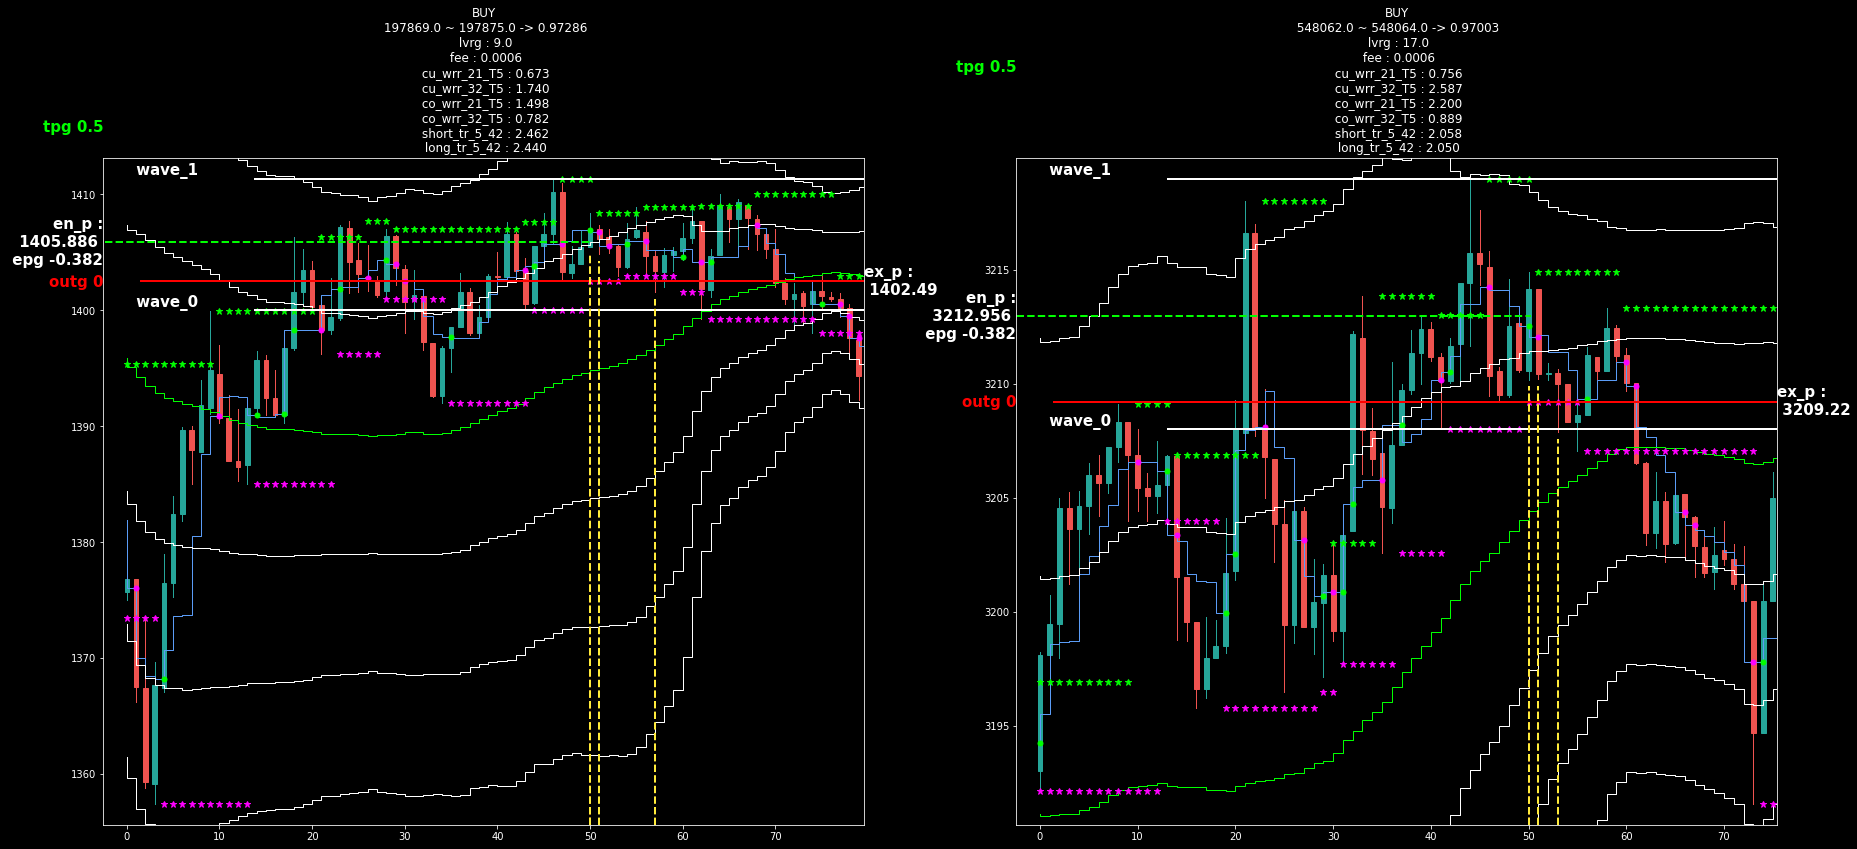

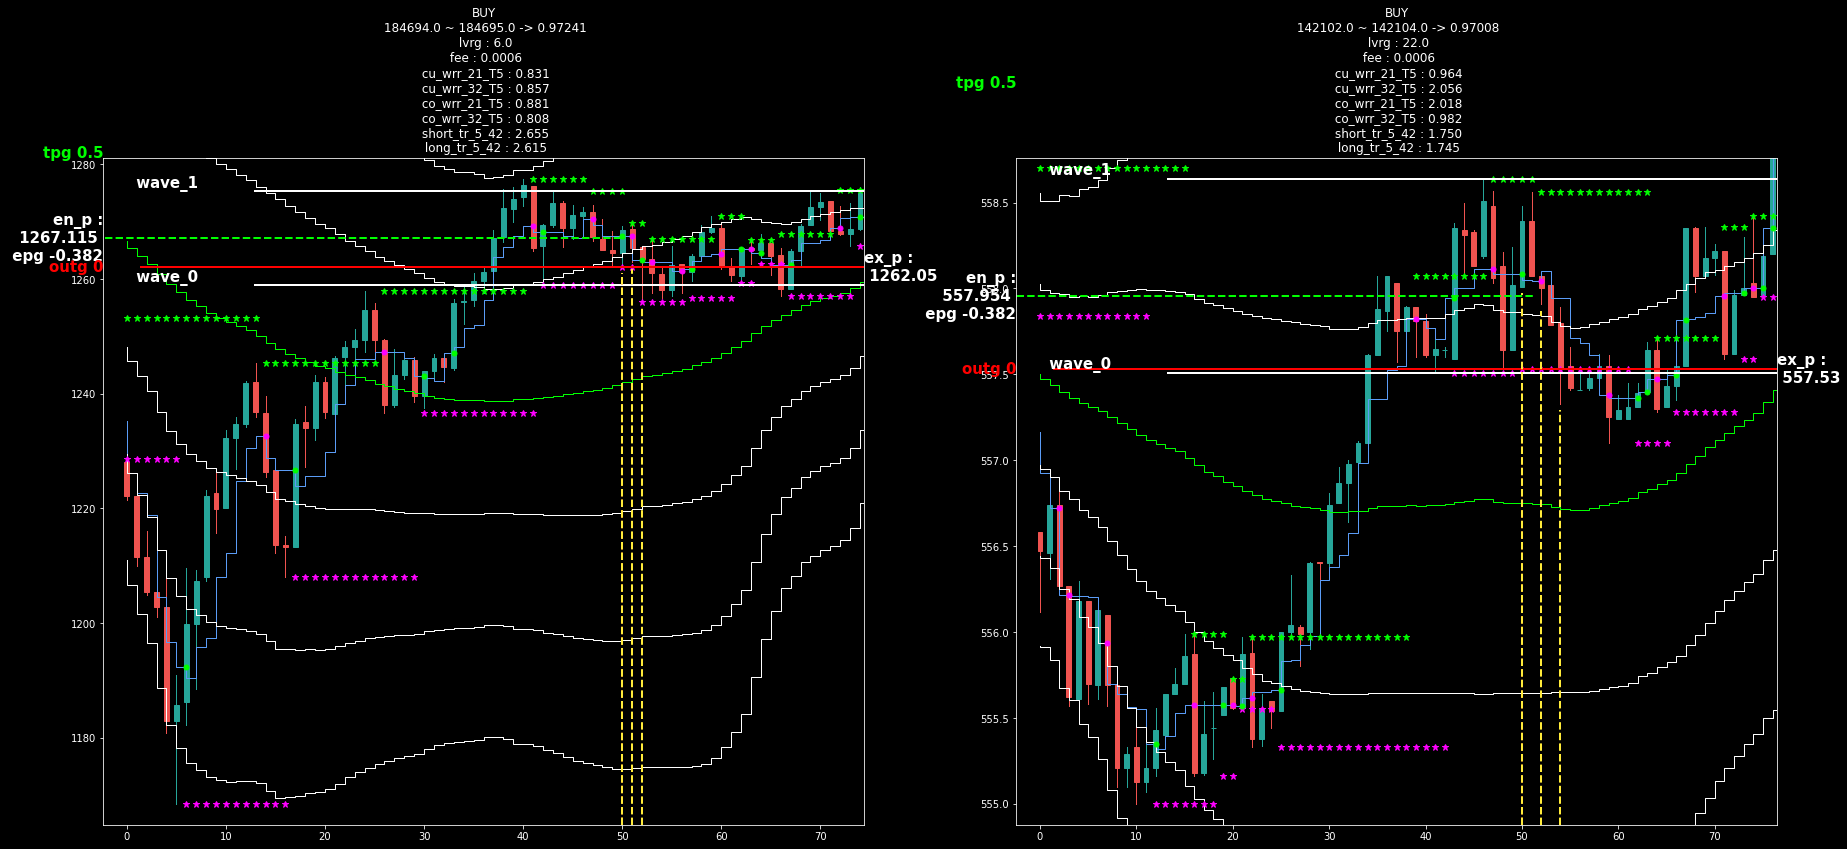

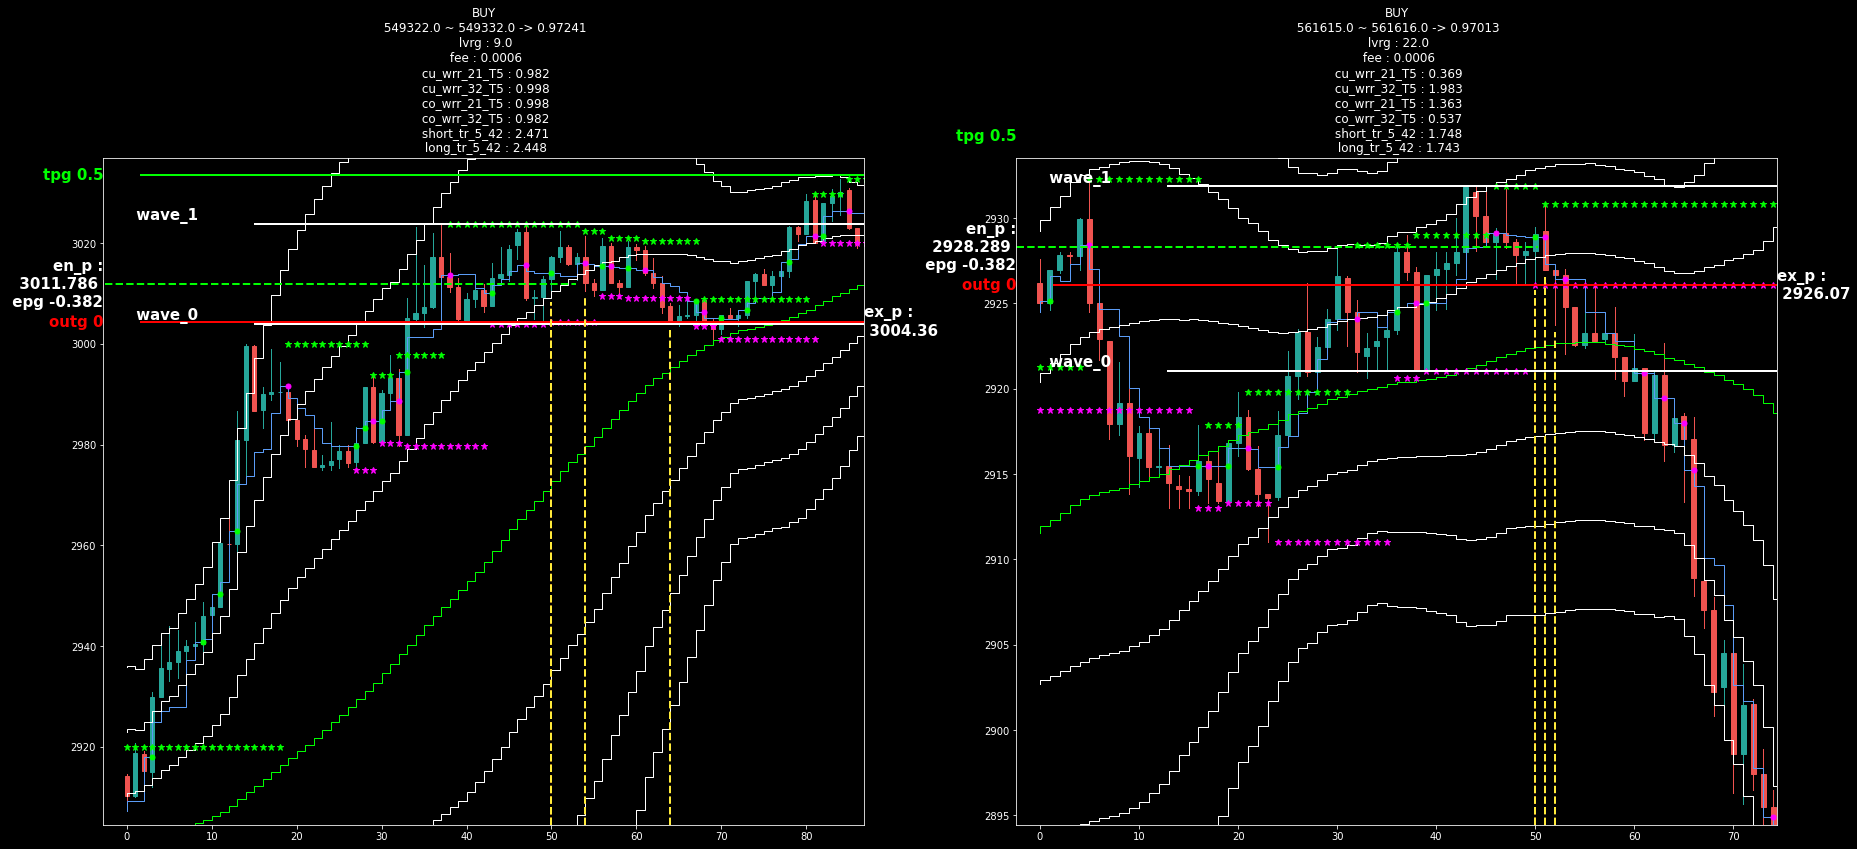

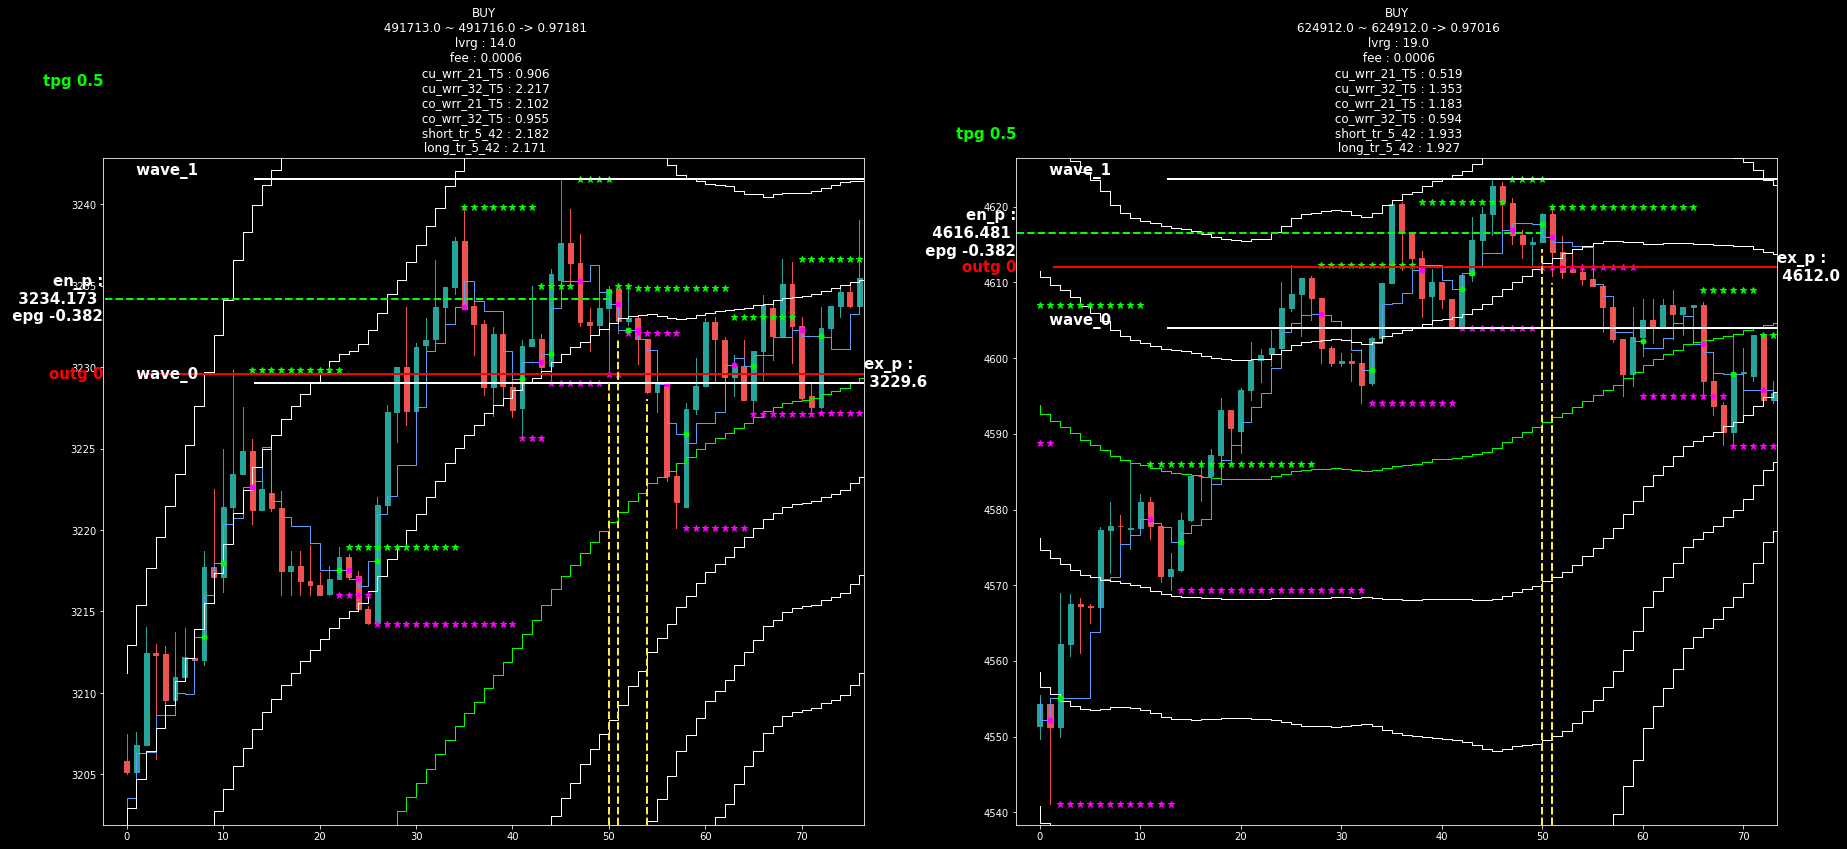

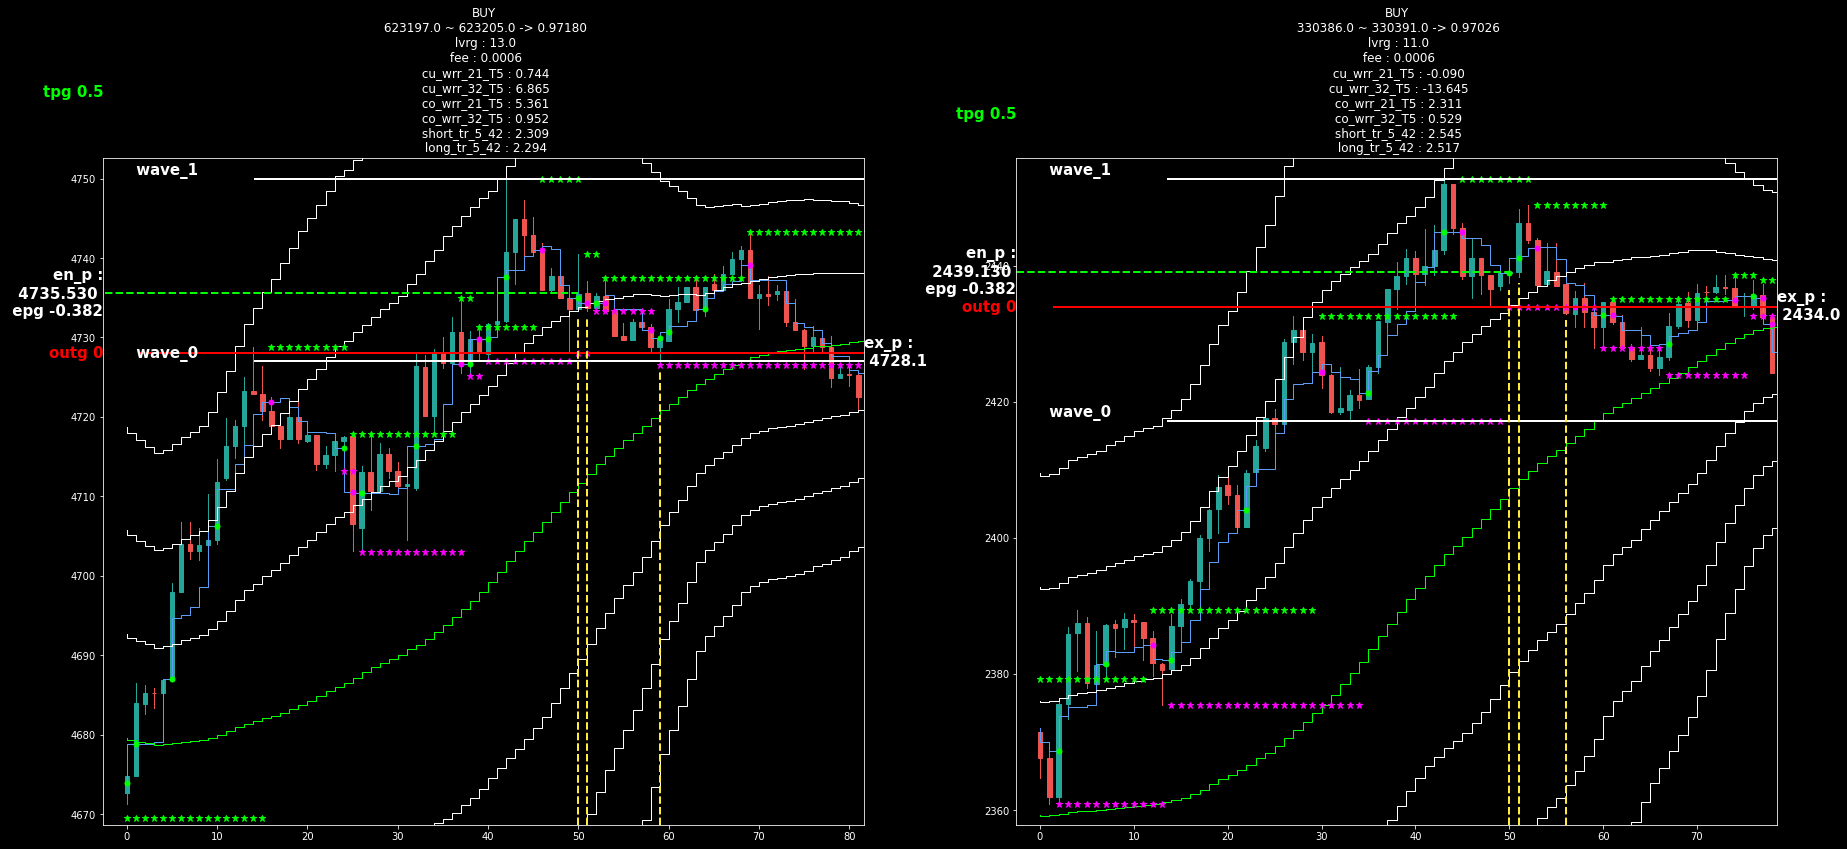

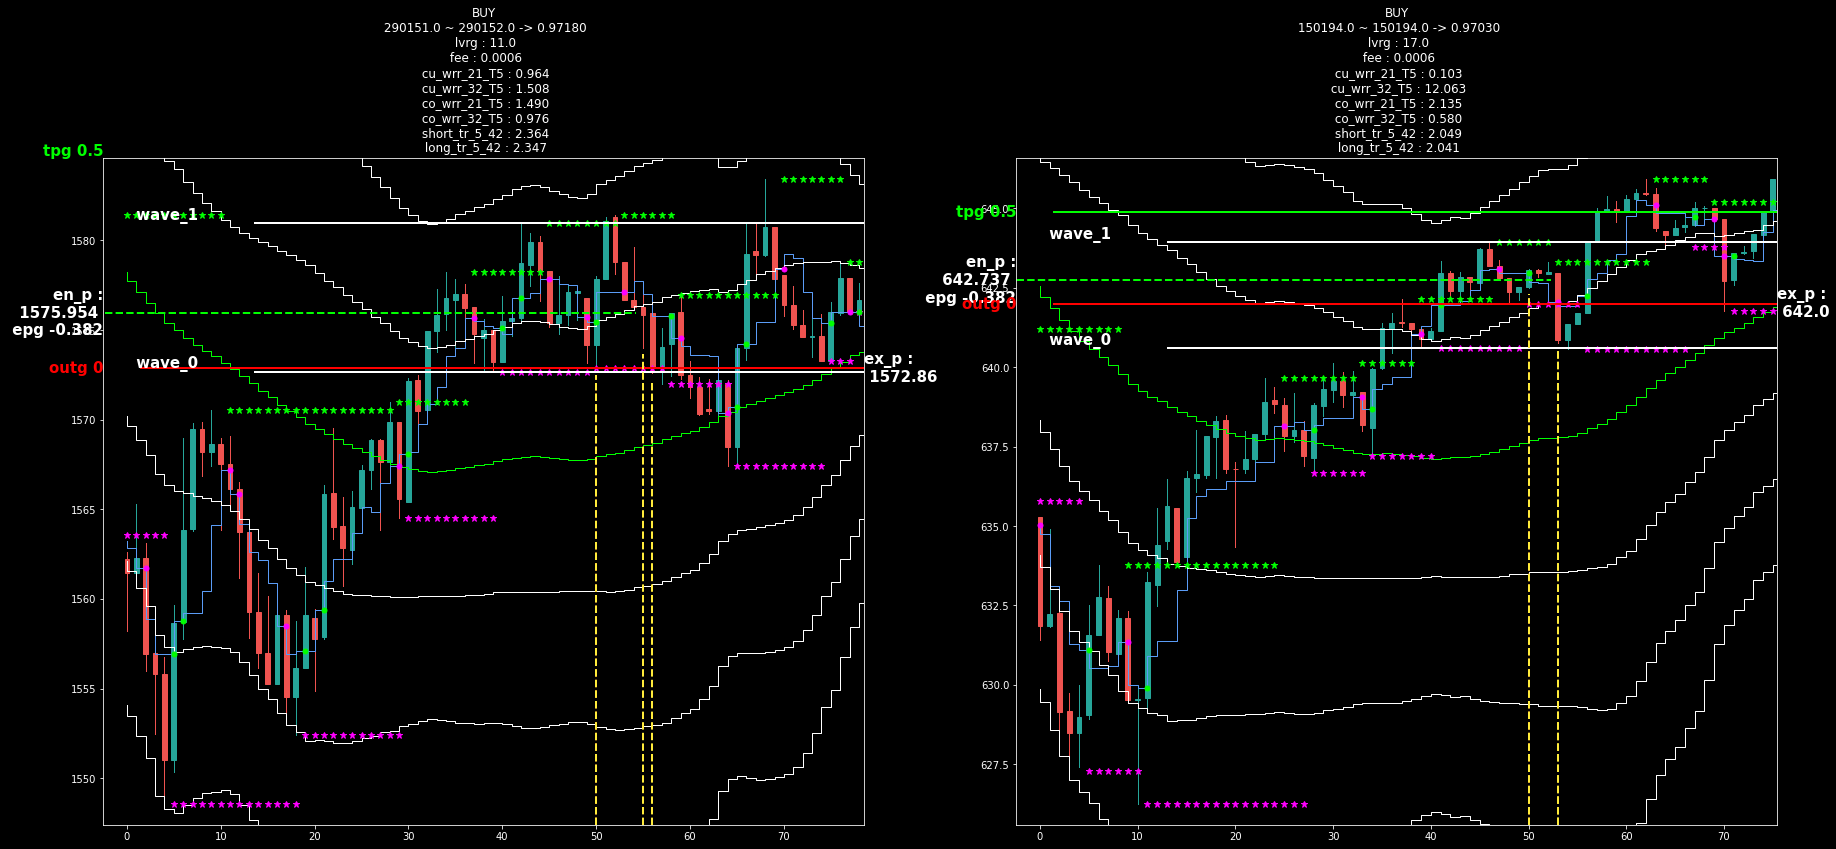

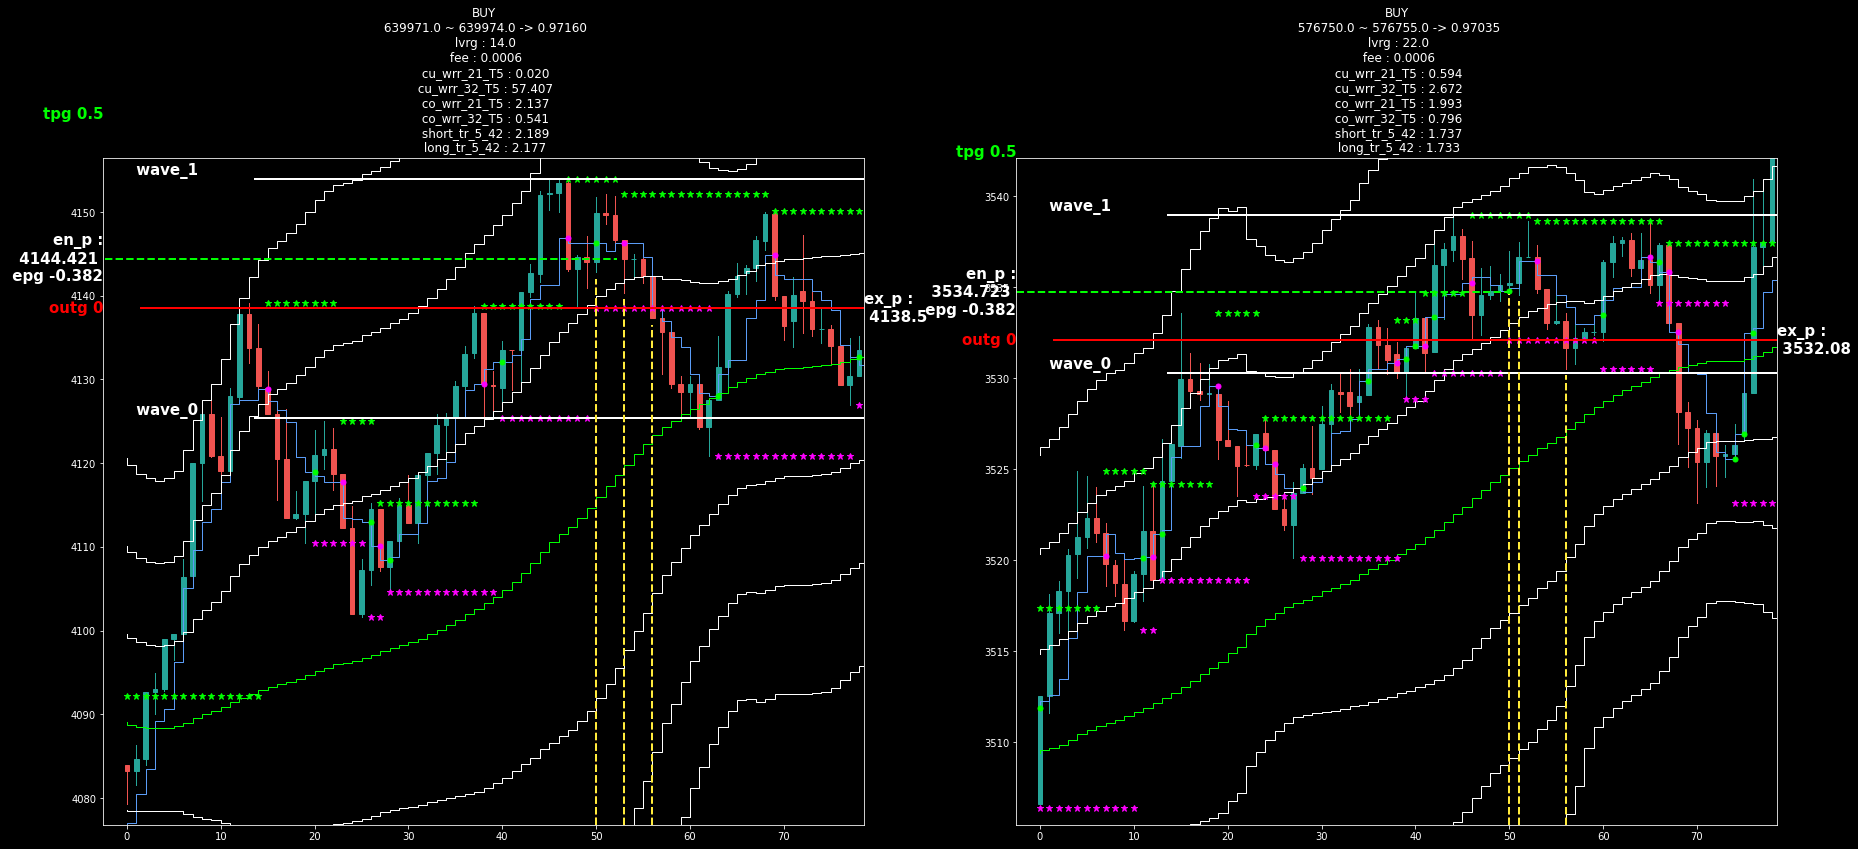

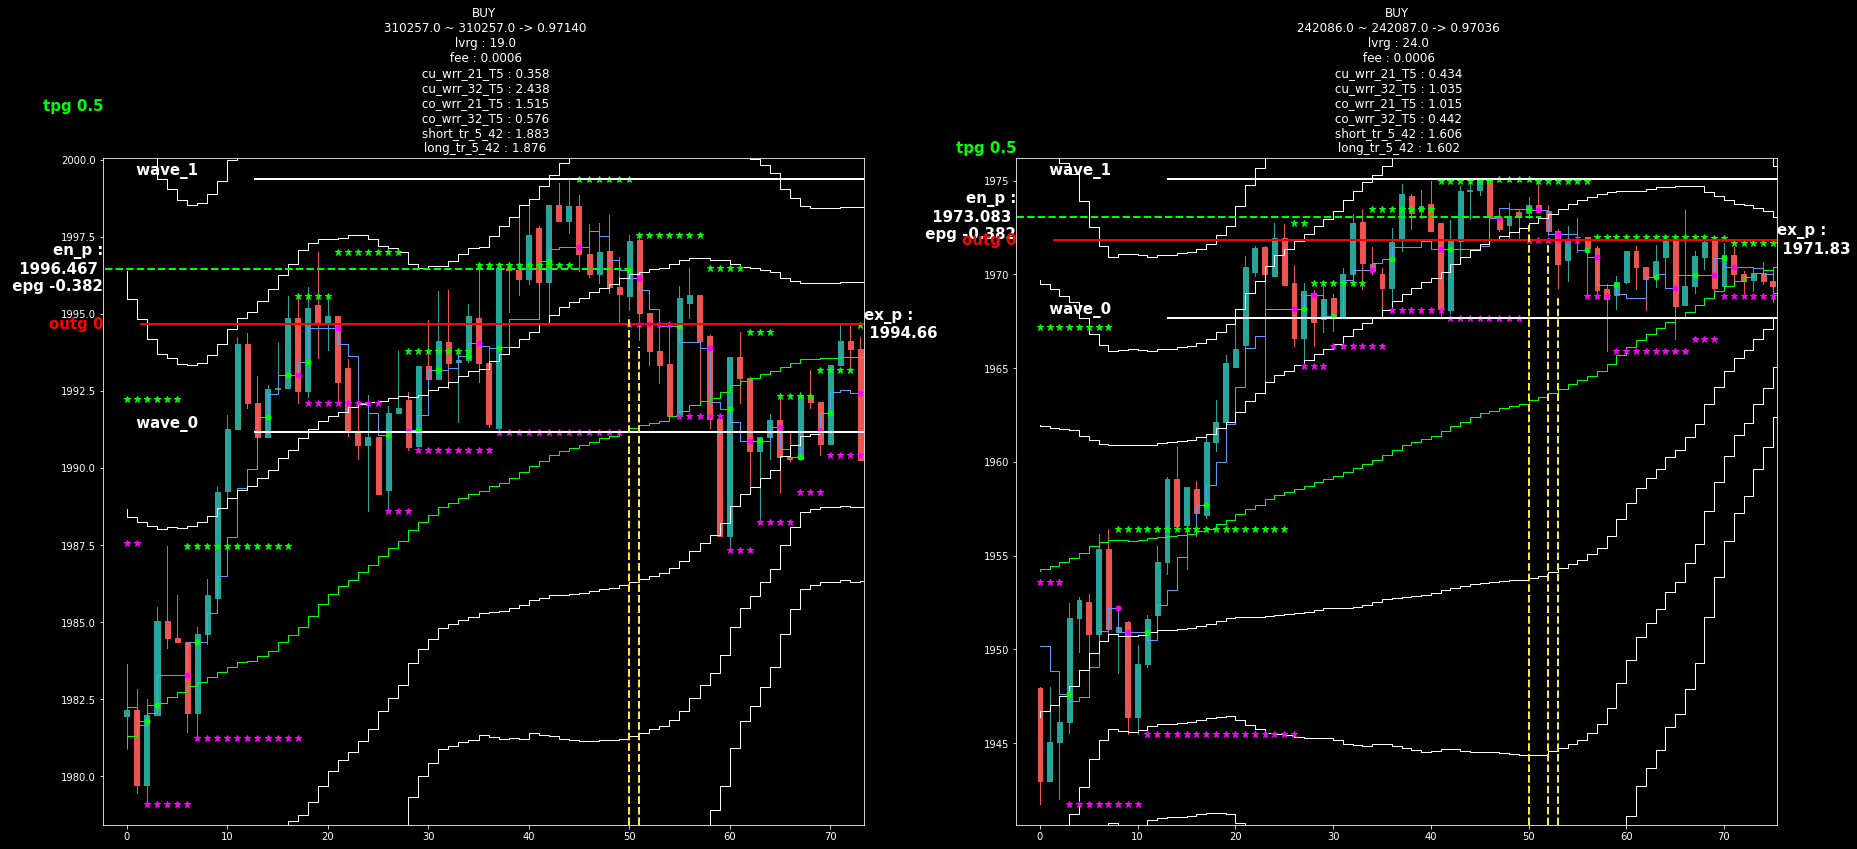

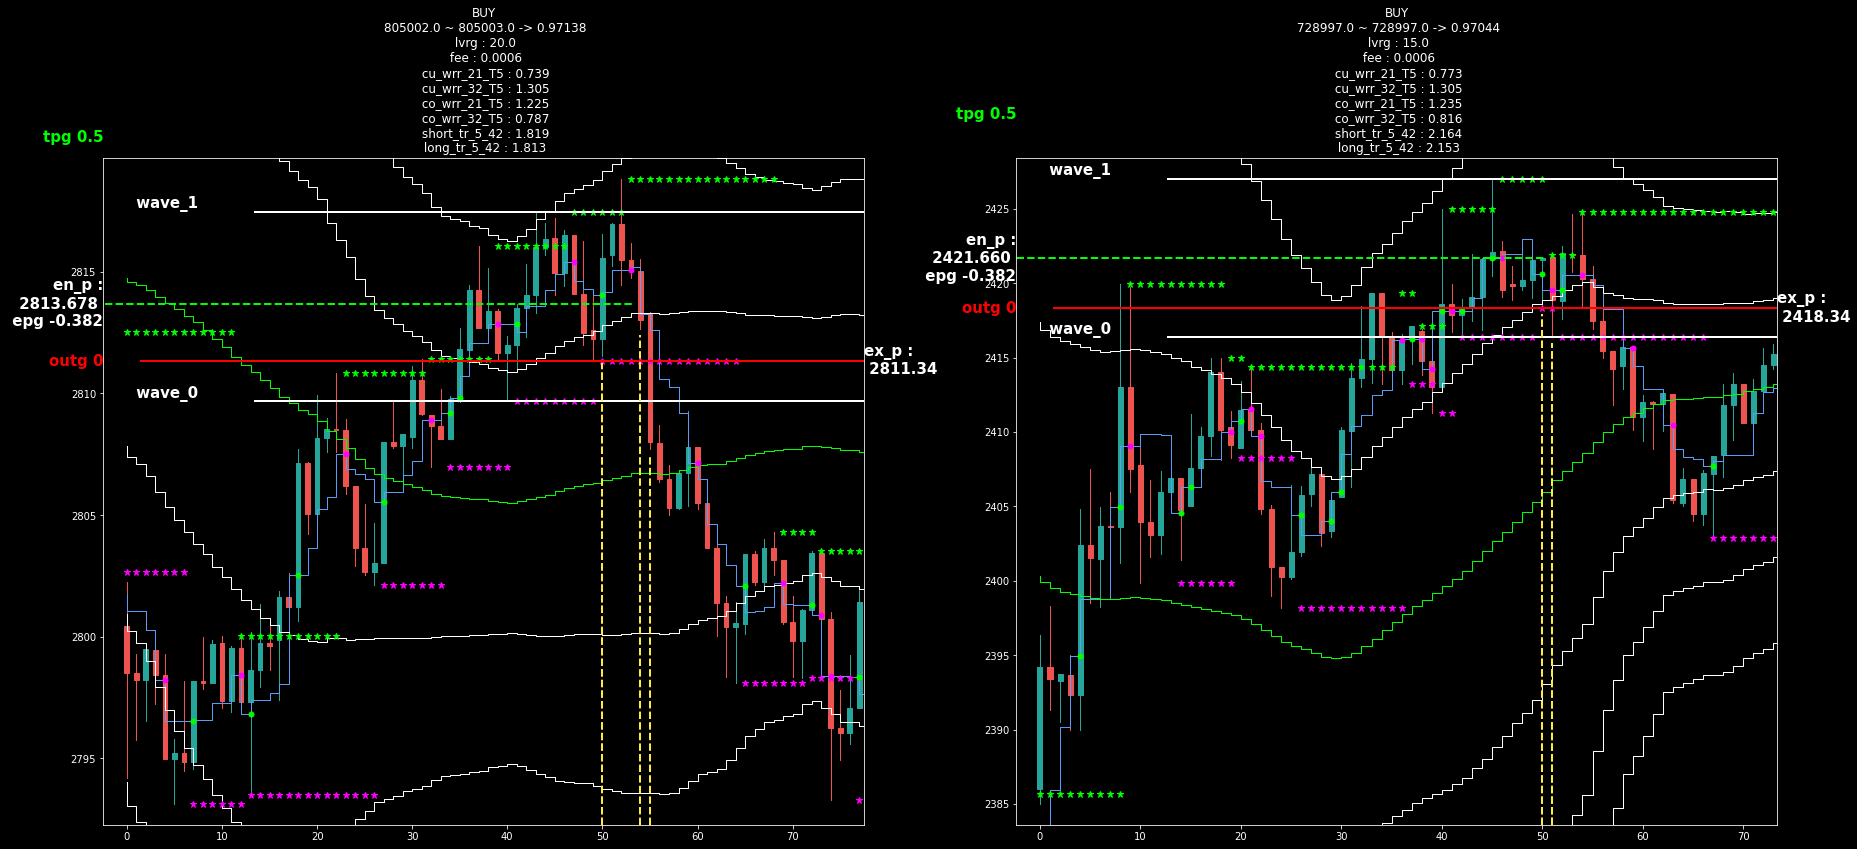

KeyboardInterrupt: ignored

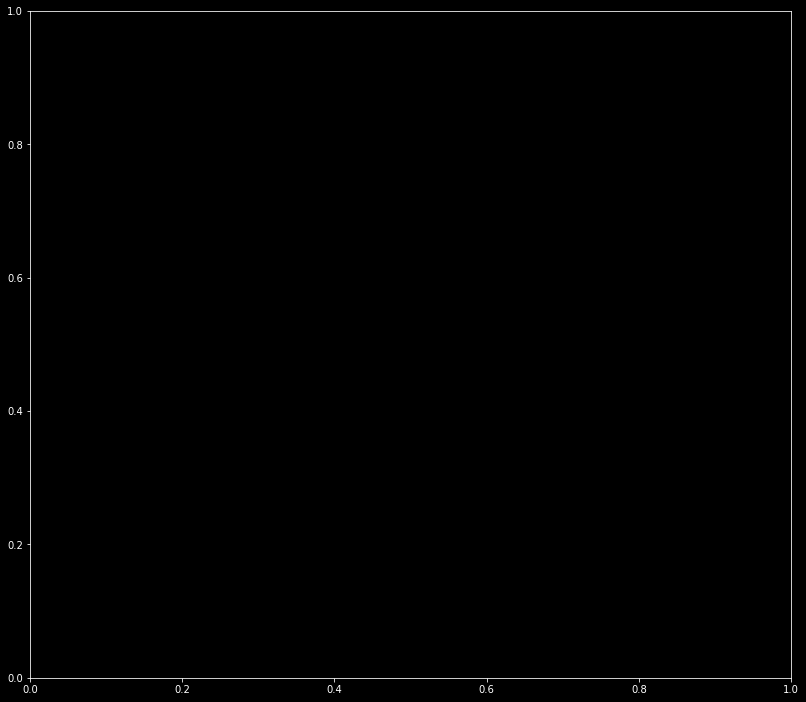

In [31]:
_ = [plot_check_v6(np_df, config, param_zip, pr_msg, x_max, x_margin_mult, y_margin_mult, front_plot, plot_check_dir, **col_idx_dict) for param_zip in zip(np_plot_params, np_plot_params[::-1])]

### whole_plot

In [ ]:
s_id = config.selection_id

# ------------ make col_idx_dict config ------------ #
nonstep_col_list = []
step_col_list = []
stepmark_col_list = []

# ============ nonstep_col_list - add info(col, alpha, color, linewidth) ============ #
# nonstep_col_list.append([['close'], 1, '#ffffff', 2])

# ============ step_col_list - add info(col, alpha, color, linewidth) ============ #
# ------ htf_candle ------ #
hc_tf1 = '15T'
hc_tf2 = 'H'
hc_tf3 = '4H'

step_col_list.append([['open_{}'.format(hc_tf1), 'close_{}'.format(hc_tf1)], 1, '#ffffff', 1])
step_col_list.append([['open_{}'.format(hc_tf2), 'close_{}'.format(hc_tf2)], 1, '#ffffff', 2])
# step_col_list.append([['open_{}'.format(hc_tf3), 'close_{}'.format(hc_tf3)], 1, '#ffffff', 4])

# ------ resi_sup ------ #
# rs_tf = 'T'
# step_col_list.append([['resi_{}'.format(rs_tf), 'sup_{}'.format(rs_tf)], 1, '#ffeb3b', 1])
# step_col_list.append([['resi_out_{}'.format(rs_tf), 'sup_out_{}'.format(rs_tf)], 1, 'dodgerblue', 2])

# ------ wave_range ------ #
wave_tf1 = config_list[0].tr_set.p1_itv1
wave_period1, wave_period2 = config_list[0].tr_set.p1_period1, config_list[0].tr_set.p1_period2

# step_col_list.append([['dc_upper_{}{}'.format(wave_tf1, wave_period1), 'dc_lower_{}{}'.format(wave_tf1, wave_period1)], 1, '#ffeb3b', 1])
# step_col_list.append([['dc_upper_{}{}'.format(wave_tf1, wave_period2), 'dc_lower_{}{}'.format(wave_tf1, wave_period2)], 1, '#ffeb3b', 1])

# step_col_list.append([['dc_upper_{}{}'.format(wave_tf2, wave_period2), 'dc_lower_{}{}'.format(wave_tf2, wave_period2)], 1, '#e65100', 2])

# ------ dc ------ #
dc_tf1 = '5T'
dc_period1 = 20
dc_tf2 = 'H'
dc_period2 = 20
# step_col_list.append([['dc_upper_{}{}'.format(dc_tf1, dc_period1), 'dc_lower_{}{}'.format(dc_tf1, dc_period1)], 1, '#ffeb3b', 1]),  # inner
# step_col_list.append([['dc_base_{}{}'.format(dc_tf1, dc_period1)], 1, '#5b9cf6', 1])
step_col_list.append([['dc_upper_{}{}'.format(dc_tf2, dc_period2), 'dc_lower_{}{}'.format(dc_tf2, dc_period2)], 1, '#ff00ff', 4]),  # inner
step_col_list.append([['dc_base_{}{}'.format(dc_tf2, dc_period2)], 1, '#5b9cf6', 4])

# ------ bb ------ #
bb_tf1 = 'T'
bb_period1 = 20

# step_col_list.append([['bb_upper_{}{}'.format(bb_tf1, bb_period1), 'bb_lower_{}{}'.format(bb_tf1, bb_period1)], 1, '#ffffff', 1])
# step_col_list.append([['bb_base_{}{}'.format(bb_tf1, bb_period1)], 1, '#00ff00', 1])

# step_col_list.append([['bb_upper_{}'.format(tf2), 'bb_lower_{}'.format(tf2)], 1, '#e91e63', 4])

# ------ ema ------ #
# step_col_list.append([['ema_5T'], 1, '#03ed30', 2])

# ============ stepmark_col_list - add info(col, alpha, color, linewidth) ============ #
# stepmark_col_list.append([['sar_T'], 1, 'dodgerblue', 7])


# ============ str to numbcol ============ #
nonstep_col_arr = strcol_tonumb(res_df, nonstep_col_list)
step_col_arr = strcol_tonumb(res_df, step_col_list)
stepmark_col_arr = strcol_tonumb(res_df, stepmark_col_list)

col_idx_dict = \
{
  "ohlc_col_idxs": get_col_idxs(res_df, ['open', 'high', 'low', 'close']),
  "vp_col_idxs": get_col_idxs(res_df, ['close', 'volume']),
  # "ohlc_col_idxs": get_col_idxs(res_df, ['haopen', 'hahigh', 'halow', 'haclose']),  # heikin-ashi ver.
  "nonstep_col_info": nonstep_col_arr,
  "step_col_info": step_col_arr,
  "stepmark_col_info": stepmark_col_arr,
  "ylim_col_idxs": get_col_idxs(res_df, ['open', 'high', 'low', 'close', 'dc_upper_15T4', 'dc_lower_15T4'])  # , 'dc_upper_H', 'dc_lower_H', 'dc_upper_15T', 'dc_lower_15T', 'short_out_{}'.format(selection_id), 'long_out_{}'.format(selection_id)
}   # , 'wave_1_{}'.format(wave_tf2), 'wave_0_{}'.format(wave_tf2), 'dc_upper_15T', 'dc_lower_15T'

#### whole_plot main

In [ ]:
plot_op_idx_nums = 10

win_idxs = (pr_ > 1).ravel()  # [-plot_op_idx_nums:]
selected_op_idxs = obj_[4].ravel().astype(int)  # [-plot_op_idx_nums:]
selected_ex_idxs = obj_[3].ravel().astype(int)  # [-plot_op_idx_nums:]

len_idxs = len(win_idxs)
print("len_idxs :", len_idxs)

split_range = np.arange(plot_op_idx_nums, len_idxs, plot_op_idx_nums)
win_idxs_list = np.split(win_idxs, split_range, axis=0)
selected_op_idxs_list = np.split(selected_op_idxs, split_range, axis=0)
selected_ex_idxs_list = np.split(selected_ex_idxs, split_range, axis=0)

In [ ]:
_ = [whole_plot_check(np_df, a, b, c, plot_check_dir=None, **col_idx_dict) for a, b, c in zip(win_idxs_list, selected_op_idxs_list, selected_ex_idxs_list)]

### plot_funcs

In [ ]:
def whole_plot_check(data, win_idxs, selected_op_idxs, selected_ex_idxs, plot_check_dir=None, **col_idx_dict):
  # start_0 = time.time()
  plt.style.use(['dark_background', 'fast'])
  fig = plt.figure(figsize=(30, 12))
  nrows, ncols = 1, 1
  gs = gridspec.GridSpec(nrows=nrows,  # row 부터 index 채우고 col 채우는 순서임 (gs_idx)
                          ncols=ncols,
                          #height_ratios=[31, 1]
                          )

  ax = fig.add_subplot(gs[0])

  # ------------ add_col section ------------ #
  a_data = data[selected_op_idxs[0]:selected_op_idxs[-1] + 1]

  plot_op_idxs = selected_op_idxs - selected_op_idxs[0]  
  plot_win_op_idxs = plot_op_idxs[win_idxs]
  plot_loss_op_idxs = plot_op_idxs[~win_idxs]

  plot_ex_idxs = selected_ex_idxs - selected_op_idxs[0]
  plot_win_ex_idxs = plot_ex_idxs[win_idxs]
  plot_loss_ex_idxs = plot_ex_idxs[~win_idxs]


  # ------ add cols ------ #
  [nonstep_col_plot(a_data[:, params[0]], *params[1:]) for params in col_idx_dict['nonstep_col_info']]
  [step_col_plot(a_data[:, params[0]], *params[1:]) for params in col_idx_dict['step_col_info']]
  [stepmark_col_plot(a_data[:, params[0]], *params[1:]) for params in col_idx_dict['stepmark_col_info']]

  # [plt.axvline(op_idx, color='#00ff00') for op_idx in plot_win_op_idxs]
  # [plt.axvline(op_idx, color='#ff0000') for op_idx in plot_loss_op_idxs]
  [plt.axvspan(op_idx, ex_idx, alpha=0.5, color='#00ff00') for op_idx, ex_idx in zip(plot_win_op_idxs, plot_win_ex_idxs)]
  [plt.axvspan(op_idx, ex_idx, alpha=0.5, color='#ff0000') for op_idx, ex_idx in zip(plot_loss_op_idxs, plot_loss_ex_idxs)]
  
  plt.show()

  if plot_check_dir is None:
    plt.show()
    print()
  else:
    fig_name = plot_check_dir + "/whole_plot_{}.png".format(selected_op_idxs[0])
    plt.savefig(fig_name)
    print(fig_name, "saved !")
  plt.close()
  # print("elapsed time :", time.time() - start_0)

  return

def plot_check_v6(data, config, param_zip, pr_msg, x_max, x_margin_mult, y_margin_mult, front_plot, plot_check_dir=None, **col_idx_dict):
  # start_0 = time.time()
  plt.style.use(['dark_background', 'fast'])
  fig = plt.figure(figsize=(30, 18))
  nrows, ncols = 2, 2
  gs = gridspec.GridSpec(nrows=nrows,  # row 부터 index 채우고 col 채우는 순서임 (gs_idx)
                         ncols=ncols,
                         height_ratios=[3, 1]
                         )
  for gs_idx, params in enumerate(param_zip):

    iin, iout, pr, ep, tp, entry_idx, exit_idx, open_idx, point1_idx, lvrg, fee, tp_line, out_line, en_tp1, en_out0 = params

    # if exit_idx - open_idx < 50:  # temporary
    #   break

    ax = fig.add_subplot(gs[gs_idx])

    # ------------ add_col section ------------ #
    a_data = data[int(iin):int(iout + 1)]
    # a_data = data[iin:iout]
    # ------ candles ------ #
    candle_plot(a_data[:, col_idx_dict['ohlc_col_idxs']], ax, alpha=1.0, wickwidth=1.0)

    # ------ add cols ------ #
    [nonstep_col_plot(a_data[:, params_[0]], *params_[1:]) for params_ in col_idx_dict['nonstep_col_info']]
    [step_col_plot(a_data[:, params_[0]], *params_[1:]) for params_ in col_idx_dict['step_col_info']]
    [stepmark_col_plot(a_data[:, params_[0]], *params_[1:]) for params_ in col_idx_dict['stepmark_col_info']]

    # ------ ep, tp + xlim ------ #
    try:
      eptp_hvline_v5(config, ep, tp, entry_idx, exit_idx, open_idx, point1_idx, tp_line, out_line, en_tp1, en_out0,
                    front_plot, iin, iout, x_max, x_margin_mult, y_margin_mult, a_data, **col_idx_dict)
    except Exception as e:
      print("error in eptp_hvline_v3 :", e)

    #     Todo    #
    #     3. outer_price plot 일 경우, gs_idx + nrows 하면 됨

    # ------ trade_info ------ #
    data_msg_list = ["\n {} : {:.3f}".format(*params_[1:], *data[int(open_idx), params_[0]]) for params_ in col_idx_dict['data_window_col_info']]  # * for unsupported format for arr
    ps_msg_expand = pr_msg.format(entry_idx, exit_idx, pr, lvrg, fee) + ''.join(data_msg_list)
    
    plt.title(ps_msg_expand)

  if plot_check_dir is None:
    plt.show()
    print()
  else:
    fig_name = plot_check_dir + "/{}.png".format(int(entry_idx))
    plt.savefig(fig_name)
    print(fig_name, "saved !")
  plt.close()
  # print("elapsed time :", time.time() - start_0)

  return

def eptp_hvline_v5(config, en_p, ex_p, entry_idx, exit_idx, open_idx, point1_idx, tp_line, out_line, en_tp1, en_out0,
                   front_plot, iin, iout, x_max, x_margin_mult, y_margin_mult, a_data, **col_idx_dict):
  # ------ get vertical ticks ------ #
  entry_tick = int(entry_idx - iin)
  exit_tick = entry_tick + int(exit_idx - entry_idx)
  open_tick = entry_tick - int(entry_idx - open_idx)
  point1_tick = open_tick - int(open_idx - point1_idx)
  bias_info_tick = entry_tick + config.tr_set.bias_info_tick

  if front_plot == 1:
    x_max = open_tick + 20
  elif front_plot == 2:
    x_max = entry_tick + 20 
  elif front_plot == 3:
    x_max = exit_tick + 20
  elif front_plot == 4:
    x_max = bias_info_tick + 20

  if (iout - iin) > x_max:
    x_margin = x_max * x_margin_mult
    plt.xlim(0 - x_margin, x_max + x_margin)
  x0, x1 = plt.gca().get_xlim()

  # ------------ hlines ------------ #
  # ------ entry & exit ------ #
  en_xmin = entry_tick / x1
  ex_xmin = exit_tick / x1
  plt.axhline(en_p, x0, en_xmin, linewidth=2, linestyle='--', alpha=1, color='lime')  # en_p line axhline
  plt.text(x0, en_p, 'en_p :\n {:.3f} \n epg {}'.format(en_p, config.tr_set.ep_gap), ha='right', va='center', fontweight='bold', fontsize=15)  # en_p line label
  plt.axhline(ex_p, ex_xmin, 1, linewidth=2, linestyle='--', alpha=1, color='lime')  # ex_p line axhline (signal 도 포괄함, 존재 의미)
  plt.text(x1, ex_p, 'ex_p :\n {}'.format(ex_p), ha='left', va='center', fontweight='bold', fontsize=15)  # ex_p line label

  # ------ tpout_line ------ #
  plt.axhline(tp_line, 0.05, 1, linewidth=2, linestyle='-', alpha=1, color='#00ff00')  # ep 와 gap 비교 용이하기 위해 ex_xmin -> 0.1 사용
  plt.text(x0, tp_line, 'tpg {}'.format(config.tr_set.tp_gap), ha='right', va='center', fontweight='bold', fontsize=15, color='#00ff00')
  plt.axhline(out_line, 0.05, 1, linewidth=2, linestyle='-', alpha=1, color='#ff0000')
  plt.text(x0, out_line, 'outg {}'.format(config.tr_set.out_gap), ha='right', va='center', fontweight='bold', fontsize=15, color='#ff0000')

  # ------ wave_line ------ #
  text_x_pos = (x0 + x1) * 0.1
  plt.axhline(en_tp1, 0.2, 1, linewidth=2, linestyle='-', alpha=1, color='#ffffff')
  plt.text(text_x_pos, en_tp1, ' wave_1', ha='right', va='bottom', fontweight='bold', fontsize=15)
  plt.axhline(en_out0, 0.2, 1, linewidth=2, linestyle='-', alpha=1, color='#ffffff')
  plt.text(text_x_pos, en_out0, ' wave_0', ha='right', va='bottom', fontweight='bold', fontsize=15)

  # ------ ylim ------ #
  if front_plot:
    y_lim_data = a_data[:x_max + 1, col_idx_dict['ylim_col_idxs']]  # +1 for including open_tick
  else:
    y_lim_data = a_data[:, col_idx_dict['ylim_col_idxs']]
  
  y_min = y_lim_data.min()
  y_max = y_lim_data.max()
  y_margin = (y_max - y_min) * y_margin_mult
  plt.ylim(y_min - y_margin, y_max + y_margin)

  # ------------ vline (open_tick, entry_tick, exit_tick) ------------ #
  y0, y1 = plt.gca().get_ylim()
  l_data = a_data[:exit_tick + 1, col_idx_dict['ohlc_col_idxs'][2]]  # +1 for including exit_tick
  point1_ymax, open_ymax, en_ymax, ex_ymax = [(l_data[tick_] - y0) / (y1 - y0) - .01 for tick_ in [point1_tick, open_tick, entry_tick, exit_tick]]  # -.05 for margin
  plt.axvline(point1_tick, 0, point1_ymax, alpha=1, linewidth=2, linestyle='--', color='#ff7722')
  plt.axvline(open_tick, 0, open_ymax, alpha=1, linewidth=2, linestyle='--', color='#ffeb3b')  # 추후, tick 별 세부 정의가 달라질 수 있음을 고려해 multi_line 작성 유지
  plt.axvline(entry_tick, 0, en_ymax, alpha=1, linewidth=2, linestyle='--', color='#ffeb3b')
  plt.axvline(exit_tick, 0, ex_ymax, alpha=1, linewidth=2, linestyle='--', color='#ffeb3b')
  plt.axvline(bias_info_tick, alpha=1, linewidth=2, linestyle='-', color='#ffeb3b')

  return

#### legacy

In [ ]:
_ = [plot_check_v4(np_df, config, param_zip, pr_msg, x_max, x_margin_mult, y_margin_mult, front_plot, plot_check_dir, 500, 0.07, 100, **col_idx_dict) for param_zip in zip(np_plot_params, np_plot_params[::-1])]

In [ ]:
def plot_check_v4(data, config, param_zip, pr_msg, x_max, x_margin_mult, y_margin_mult, front_plot, plot_check_dir=None, vp_range=500, kde_factor=0.05, num_samples=100, **col_idx_dict):
  # start_0 = time.time()
  plt.style.use(['dark_background', 'fast'])
  fig = plt.figure(figsize=(30, 18))
  nrows, ncols = 2, 2
  gs = gridspec.GridSpec(nrows=nrows,  # row 부터 index 채우고 col 채우는 순서임 (gs_idx)
                         ncols=ncols,
                         height_ratios=[3, 1]
                         )
  for gs_idx, params in enumerate(param_zip):
    ax = fig.add_subplot(gs[gs_idx])
    iin, iout, pr, ep, tp, entry_idx, exit_idx, open_idx, lvrg, fee, tp_line, out_line, bias_info, bias_thresh = params

    # ------------ add_col section ------------ #
    iin, iout = int(iin), int(iout)
    a_data = data[iin:iout]
    # ------ candles ------ #
    candle_plot(a_data[:, col_idx_dict['ohlc_col_idxs']], ax, alpha=1.0, wickwidth=1.0)
    
    # ------ add cols ------ #
    [nonstep_col_plot(a_data[:, params[0]], *params[1:]) for params in col_idx_dict['nonstep_col_info']]
    [step_col_plot(a_data[:, params[0]], *params[1:]) for params in col_idx_dict['step_col_info']]
    [stepmark_col_plot(a_data[:, params[0]], *params[1:]) for params in col_idx_dict['stepmark_col_info']]

    # vp_data = data[iin - vp_range:iin, col_idx_dict['vp_col_idxs']]
    # vp_info = [vp_range, vp_data[:, 0], vp_data[:, 1], kde_factor, num_samples]
    vp_data = data[iin - vp_range:iin, col_idx_dict['vp_col_idxs']].T
    vp_info = [vp_range, *vp_data, kde_factor, num_samples]

    # ------ ep, tp + xlim ------ #
    eptp_hvline_v4(config, ep, tp, entry_idx, exit_idx, open_idx, tp_line, out_line, bias_info, bias_thresh, 
                   front_plot, iin, iout, x_max, x_margin_mult, y_margin_mult, a_data, vp_info, **col_idx_dict)        

    #     Todo    #
    #     3. outer_price plot 일 경우, gs_idx + nrows 하면 됨

    # ------ trade_info ------ #
    plt.title(pr_msg.format(entry_idx, exit_idx, pr, lvrg, fee))

  if plot_check_dir is None:
    plt.show()
    print()
  else:
    fig_name = plot_check_dir +  "/%s.png" % int(entry_idx)
    plt.savefig(fig_name)
    print(fig_name, "saved !")
  plt.close()
  # print("elapsed time :", time.time() - start_0)  

  return

def eptp_hvline_v4(config, en_p, ex_p, entry_idx, exit_idx, open_idx, tp_line, out_line, bias_info, bias_thresh, 
                   front_plot, iin, iout, x_max, x_margin_mult, y_margin_mult, a_data, vp_info, **col_idx_dict):
  # ------ get vertical ticks ------ #
  entry_tick = int(entry_idx - iin)
  open_tick = entry_tick - int(entry_idx - open_idx)
  exit_tick = entry_tick + int(exit_idx - entry_idx)

  if front_plot == 1:
    x_max = open_tick
  elif front_plot == 2:
    x_max = entry_tick
  if (iout - iin) > x_max:
    x_margin = x_max * x_margin_mult
    plt.xlim(0 - x_margin, x_max + x_margin)
  x0, x1 = plt.gca().get_xlim()
  # ------------ hlines ------------ #
  # ------ entry & exit ------ #
  en_xmin = entry_tick / x1
  ex_xmin = exit_tick / x1
  plt.axhline(en_p, x0, en_xmin, linewidth=2, linestyle='--', alpha=1, color='lime')  # en_p line axhline
  plt.text(x0, en_p, ' en_p :\n {}'.format(en_p), ha='right', va='center', fontweight='bold')  # en_p line label
  plt.axhline(ex_p, ex_xmin, 1, linewidth=2, linestyle='--', alpha=1, color='lime')  # ex_p line axhline (signal 도 포괄함, 존재 의미)
  plt.text(x1, ex_p, ' ex_p :\n {}'.format(ex_p), ha='left', va='center', fontweight='bold')  # ex_p line label

  # ------ tpout_line ------ #
  plt.axhline(tp_line, 0.1, 1, linewidth=4, linestyle='-', alpha=1, color='#00ff00')  # ep 와 gap 비교 용이하기 위해 ex_xmin -> 0.1 사용
  plt.text(x0, tp_line, ' %s' % config.tr_set.tp_gap, ha='left', va='center', fontweight='bold')
  plt.axhline(out_line, 0.1, 1, linewidth=4, linestyle='-', alpha=1, color='#ff0000')
  plt.text(x0, out_line, ' %s' % config.tr_set.out_gap, ha='left', va='center', fontweight='bold')

  # ------ bias_line ------ #
  plt.axhline(bias_info, 0.1, 1, linewidth=4, linestyle='-', alpha=1, color='dodgerblue')
  plt.text(x0, bias_info, ' bias_info', ha='left', va='center', fontweight='bold')
  plt.axhline(bias_thresh, 0.1, 1, linewidth=4, linestyle='-', alpha=1, color='#ff8400')
  plt.text(x0, bias_thresh, ' bias_thresh', ha='left', va='center', fontweight='bold')

  # ------ volume profile ------ #
  vp_range, close, volume, kde_factor, num_samples = vp_info
  if iin >= vp_range:
    start_0 = time.time()
    kde = stats.gaussian_kde(close, weights=volume, bw_method=kde_factor)
    kdx = np.linspace(close.min(), close.max(), num_samples)
    kdy = kde(kdx)
    print("kde elapsed_time :", time.time() - start_0)

    kdy_max = kdy.max()
    # peaks,_ = signal.find_peaks(kdy)
    peaks,_ = signal.find_peaks(kdy, prominence=kdy_max * 0.3)
    peak_list = kdx[peaks]   # peak_list
    [plt.axhline(peak, linewidth=6, linestyle='-', alpha=1, color='white') for peak in peak_list]
    
    kdy_ratio = entry_tick / kdy_max # 30 / 0.0001
    plt.plot(kdy * kdy_ratio, kdx, color='white')
    # plt.plot(pky, pkx, 'bo', color='yellow')

  # ------ ylim ------ #
  if front_plot:
    y_lim_data = a_data[:x_max + 1, col_idx_dict['ylim_col_idxs']]  # +1 for including open_tick
  else:
    y_lim_data = a_data[:, col_idx_dict['ylim_col_idxs']]
  y_min = y_lim_data.min()
  y_max = y_lim_data.max()
  y_margin = (y_max - y_min) * y_margin_mult
  # plt.ylim(y_min - y_margin, y_max + y_margin)

  # ------------ vline (open_tick, entry_tick, exit_tick) ------------ #
  y0, y1 = plt.gca().get_ylim()
  l_data = a_data[:exit_tick + 1, col_idx_dict['ohlc_col_idxs'][2]]  # +1 for including exit_tick
  open_ymax, en_ymax, ex_ymax = [(l_data[tick_] - y0) / (y1 - y0) - .01 for tick_ in [open_tick, entry_tick, exit_tick]]  # -.05 for margin
  plt.axvline(open_tick, 0, open_ymax, alpha=1, linewidth=2, linestyle='--', color='#ffeb3b')  # 추후, tick 별 세부 정의가 달라질 수 있음을 고려해 multi_line 작성 유지
  plt.axvline(entry_tick, 0, en_ymax, alpha=1, linewidth=2, linestyle='--', color='#ffeb3b')
  plt.axvline(exit_tick, 0, ex_ymax, alpha=1, linewidth=2, linestyle='--', color='#ffeb3b')

  return

### dump

#### whole_plot thing

In [ ]:
fig = go.Figure(data=[go.Candlestick(x=t_df.index,
                open=t_df.open,
                high=t_df.high,
                low=t_df.low,
                close=t_df.close)])

fig.show()

In [ ]:
cf.go_offline()
init_notebook_mode()

In [ ]:
qf = cf.QuantFig(t_df, title="Apple's stock price in 2021", name='AAPL')
qf.iplot()

#### brief np_pr survey

In [ ]:
# plot_pr_list[:100]
plt.plot(np_pr)
plt.axhline(1)
plt.show()

#### plot indi. legacy

In [ ]:

  # ---------------------- ma ---------------------- #
   # --------- ema --------- #
  # alpha = 1
  # for sm_i, item in enumerate(ema_list):
  #   if sm_i > 0:
  #     lw = 5
  #   else:
  #     lw = 2
  #   plt.step(np.arange(len(plot_df)), plot_df[item].values, alpha=alpha, color='#03ed30', linewidth=lw)
  #   alpha -= 0.2

  #   # --------- sma --------- #
  # alpha = 1
  # for sm_i, sma in enumerate(sma_list):
  #   if sm_i > 0:
  #     lw = 5
  #   else:
  #     lw = 4
  #   plt.step(np.arange(len(plot_df)), plot_df[sma].values, alpha=alpha, color='#e91e63', linewidth=lw)
  #   alpha -= 0.2

  
  # ---------------------- cb ---------------------- #
  # alpha = 1
  # for sm_i, item in enumerate(cb_list):
  #   if sm_i > 0:
  #     lw = 5
  #   else:
  #     lw = 2
  #   plt.step(np.arange(len(plot_df)), plot_df[item].values, alpha=alpha, color='#5b9cf6', linewidth=lw)
  #   alpha -= 0.2


  
  # ---------------------- sar ---------------------- #
  # alpha = 1
  # markersize = 5
  # for sar in sar_list:
  #   plt.step(plot_df[sar].values, 'c*', alpha=alpha, markersize=markersize, color='dodgerblue')  # sar mic
  #   markersize += 1
  #   alpha -= 0.1

  # plt.step(plot_df.values[:, [12]], 'co', alpha=1, markersize=7)  # sar mac

  #               cloud               #
  # alpha = 0.7
  # for senkoua, senkoub in zip(senkoua_list, senkoub_list):
  #   plt.fill_between(np.arange(len(plot_df)), plot_df[senkoua].values, plot_df[senkoub].values, # ichimoku
  #                     where=plot_df[senkoua].values >= plot_df[senkoub].values, facecolor='g', alpha=alpha) # ichimoku
  #   plt.fill_between(np.arange(len(plot_df)), plot_df[senkoua].values, plot_df[senkoub].values,
  #                     where=plot_df[senkoua].values <= plot_df[senkoub].values, facecolor='r', alpha=alpha)  
  #   alpha -= 0.05
  


  # ---------------------- outer price indi. ---------------------- #
  #           macd          #
  # plt.subplot(312)
  # plt.subplot(gs[1])
  # alpha = 1
  # for macd in macd_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[macd].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2

  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=0.5, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_idx), alpha=0.5, linestyle='--', color='lime')

  # plt.axhline(0, linestyle='--')

  
  # #           trix          #  
  # # plt.subplot(313)
  # plt.subplot(gs[2])
  # alpha = 1
  # for trix in trix_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[trix].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=0.5, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_idx), alpha=0.5, linestyle='--', color='lime')
  # plt.axhline(0, linestyle='--')

  
  #           fisher          #  
  # plt.subplot(313)
  # plt.subplot(gs[1])
  # alpha = 1
  # for fisher in fisher_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[fisher].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
    
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=0.5, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_idx), alpha=0.5, linestyle='--', color='lime')

  # plt.axhline(0, linestyle='--')
  # plt.axhline(fisher_upper, linestyle='--')
  # plt.axhline(fisher_lower, linestyle='--')

  #           stoch          #  
  # plt.subplot(gs[1])
  # alpha = 1
  # for stoch_ in stoch_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[stoch_].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axhline(50, linestyle='--')
  # plt.axhline(stoch_upper, linestyle='--')
  # plt.axhline(stoch_lower, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=1, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_idx), alpha=0.5, linestyle='--', color='lime')

  # ---------- cctbbo ---------- #  
  # plt.subplot(gs[1])
  # alpha = 1
  # for cctbbo in cctbbo_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[cctbbo].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axhline(50, linestyle='--')
  # plt.axhline(cctbbo_upper, linestyle='--')
  # plt.axhline(cctbbo_lower, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=1, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_idx), alpha=0.5, linestyle='--', color='lime')

  # ---------- ema_roc ---------- #  
  # plt.subplot(gs[1])
  # alpha = 1
  # for emaroc in emaroc_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[emaroc].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=1, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_idx), alpha=0.5, linestyle='--', color='lime')
  # plt.axhline(0, linestyle='--')
  
  # ---------- bbw ---------- #  
  # plt.subplot(gs[1])
  # alpha = 1
  # for bbwp_ in bbwp_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[bbwp_].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=1, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_idx), alpha=0.5, linestyle='--', color='lime')
  # plt.axhline(bbwp_thresh, linestyle='--')

  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_idx), alpha=0.5, linestyle='--', color='lime')



## legacy

### tr_tresh calc

In [ ]:
res_wr = 0.6
# tr_thresh = 1
# tr_thresh = ((1 - res_wr) / res_wr) ** 0.5
tr_thresh = ((1 - res_wr) / res_wr) + 0.01
# tr_thresh = 2.6
print("res_wr :", res_wr)
print("tr_thresh :", tr_thresh)


#   단리    #
trade_num = 1000
asset = 1 # thousand USDT
test_loss_gap = 0.95  # fee adjusted
test_pr_gap = 1 + (1 - test_loss_gap) * tr_thresh

test_loss_cnt = trade_num * (1 - res_wr)
test_pr_cnt = trade_num * res_wr

test_trade_list = [test_pr_gap] * int(test_pr_cnt) + [test_loss_gap] * int(test_loss_cnt)
random.shuffle(test_trade_list)
# print("len(test_trade_list) :", len(test_trade_list))
print(test_trade_list[:10])
print()

# print("%.5f" % np.cumprod(test_trade_list)[-1])
for tr_thresh_ in np.arange(1, 3, 0.2):
  if (1 + (1 - test_loss_gap) * tr_thresh_) ** test_pr_cnt * test_loss_gap ** test_loss_cnt > 1:
    break
print("복리를 위한 tr_thresh_ :", tr_thresh_)
# print("tr_thresh :", tr_thresh)
print("np.cumprod(test_trade_list)[-1] :", np.cumprod(test_trade_list)[-1])
print("total_pr : ", np.cumprod(test_trade_list)[-1])
print()
#   복리 tr_thresh  #
#   1. trade_num 에 영향 받지 않음
#   2. loss_gap 에 비례함

for tr_thresh_ in np.arange(1, 3, 0.01):
  if ((1 - test_loss_gap) * tr_thresh_) * test_pr_cnt + (test_loss_gap - 1) * test_loss_cnt > 0:
    break
np_test_trade = np.array(test_trade_list) - 1
print(np_test_trade[:10])
# print("%.3f" % )
print("단리를 위한 tr_thresh_ :", tr_thresh_)
# print("tr_thresh :", tr_thresh)
print("np.cumsum(np_test_trade)[-1] :", np.cumsum(np_test_trade)[-1])
print("total_pr : ", 1 + np.cumsum(np_test_trade)[-1])
